# CAPSTONE PROJECT - GROUP 2 - DEMOGRAPHIC INFORMATION

### Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as w

w.filterwarnings("ignore")

### Import Datasets

In [382]:
### USER'S DATAFRAME ###
df1 = pd.read_csv("./datasets/users/not_china_users.csv")
df2 = pd.read_csv("./datasets/users/china_users.csv")

users = pd.concat([df1, df2])
users.rename(columns={"created_at": "user_created_at"}, inplace=True)

### PRODUCTS-USER'S DATAFRAME ###

df1 = pd.read_csv("./datasets/products/_user_order_item_prd-1--24999.csv")
df2 = pd.read_csv("./datasets/products/_user_order_item_prd-25000--49999.csv")
df3 = pd.read_csv("./datasets/products/_user_order_item_prd-50000--74999.csv")
df4 = pd.read_csv("./datasets/products/_user_order_item_prd-75000--100000.csv")

products_users = pd.concat([df1, df2, df3, df4])

### ORDERS-USER'S DATAFRAME ###

df1 = pd.read_csv("./datasets/orders/orders_1--74999.csv")
df2 = pd.read_csv("./datasets/orders/orders_75000+.csv")

orders_users = pd.concat([df1, df2])
orders_users.rename(columns={"created_at": "order_created_at"}, inplace=True)

print(orders_users.order_id.unique().shape)

conditions = [users["age"]<20, ((users["age"]>=20) & (users["age"]<=29)) , ((users["age"]>29) & (users["age"]<=39)), ((users["age"]>39) & (users["age"]<=49)) , ((users["age"]>49) & (users["age"]<=59)), users["age"]>59 ]
age_group = ["1-Teens", "2-Twenties", "3-Thirties", "4-Forties", "5-Fifties", "6-Elders"]

users["age_group"] = np.select(conditions, age_group)
users["user_created_at"] = pd.to_datetime(users["user_created_at"])
users["user_created_at"] = pd.to_datetime(users["user_created_at"].dt.strftime('%m/%d/%Y'))
users["costumer_time"] = ((pd.to_datetime('today').normalize()- users["user_created_at"])/(24*3600*1000000000)).astype('int64')

(124851,)


# 1. What is the distribution of age and gender among our customer base?

Text(0.5, 1.0, 'Distribution in Brasil - Youth')

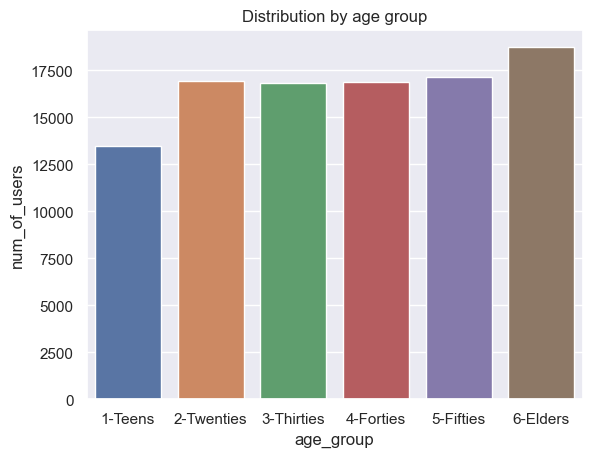

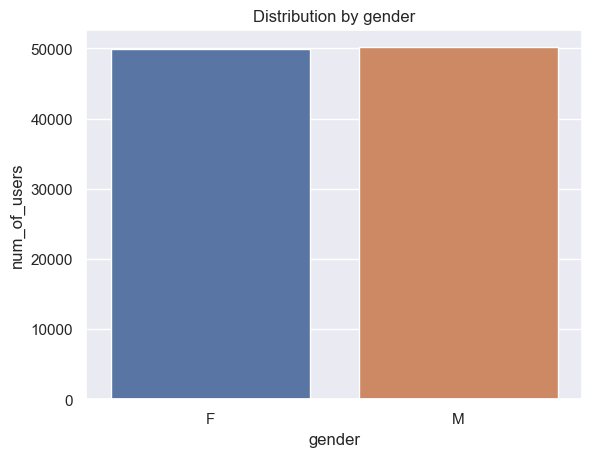

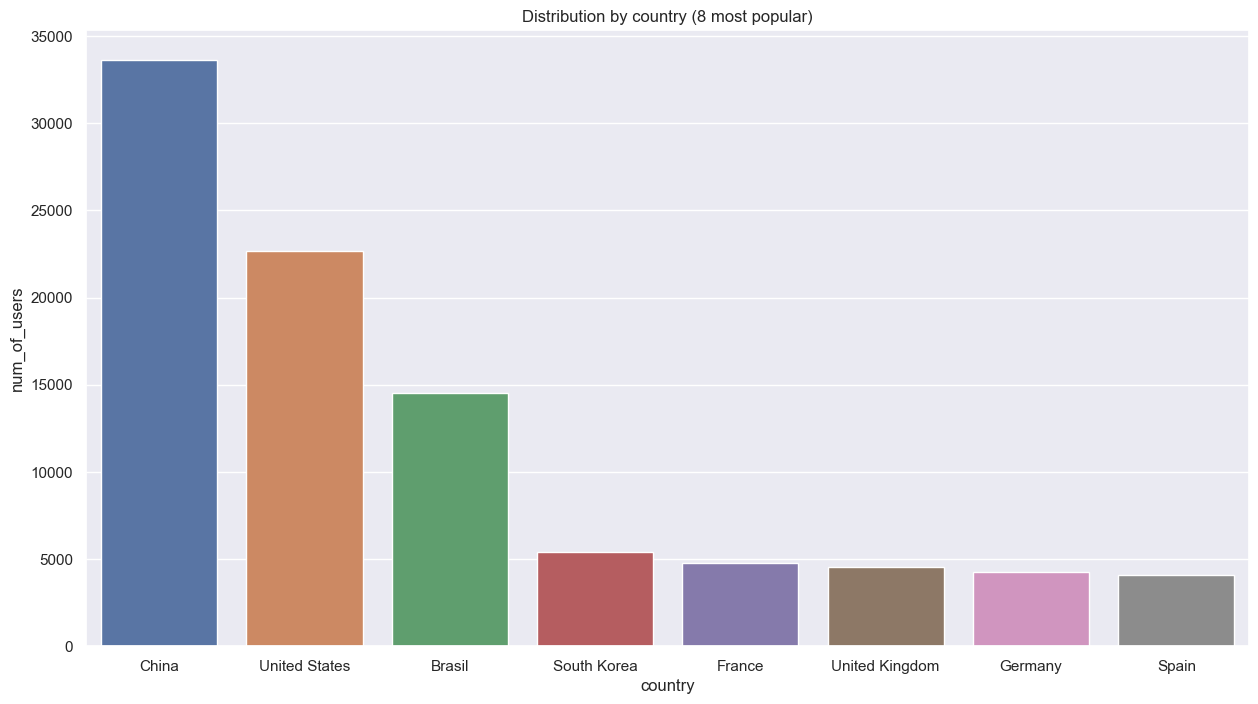

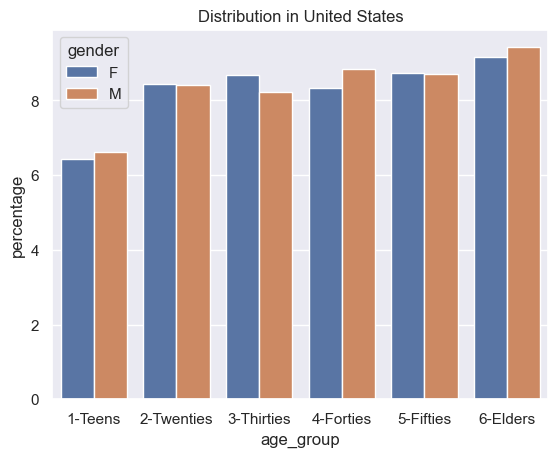

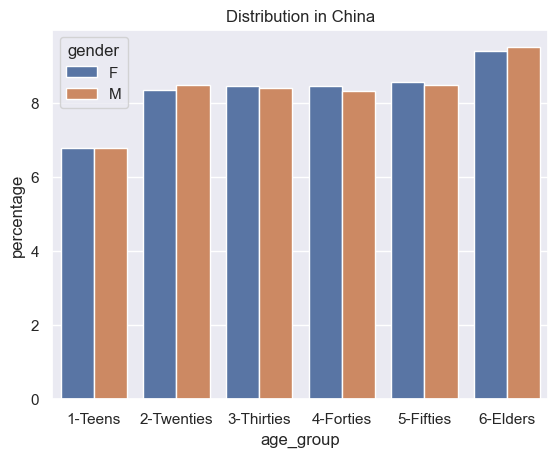

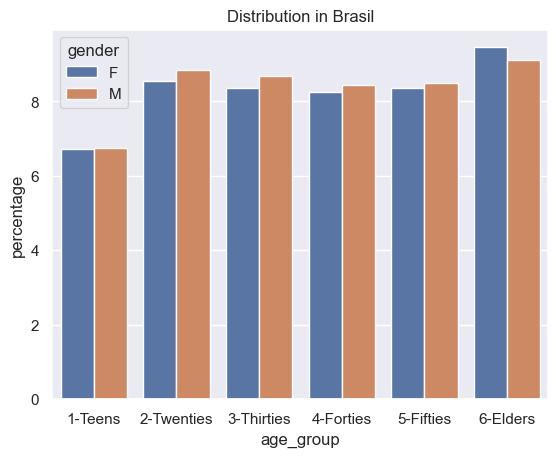

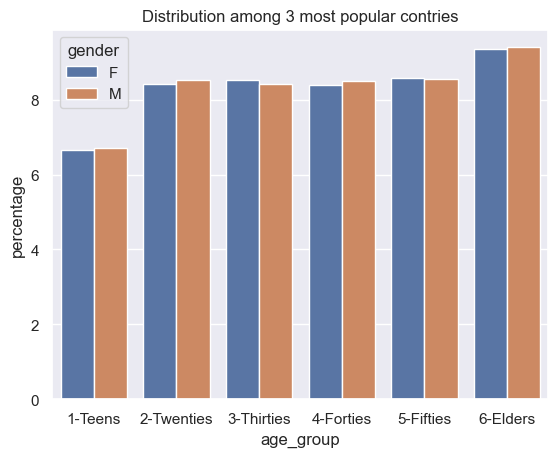

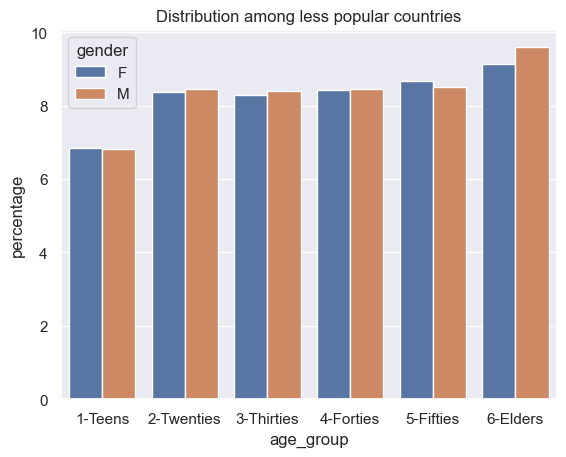

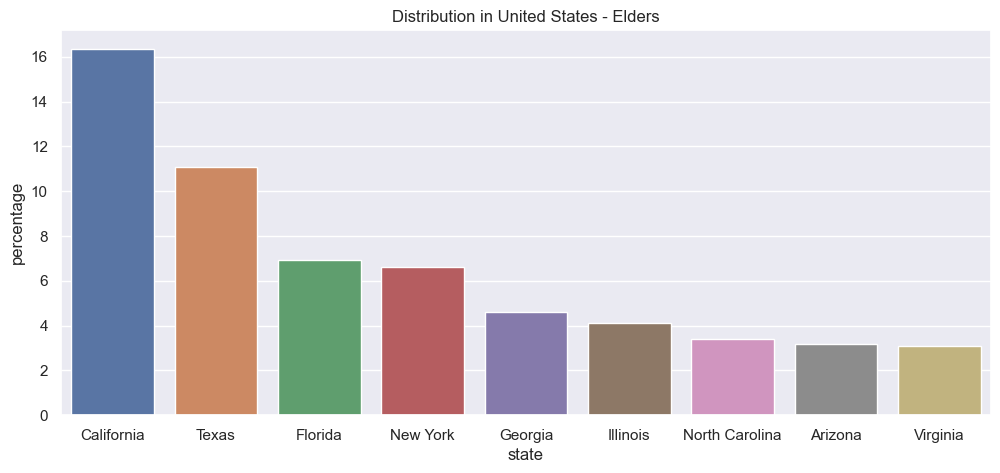

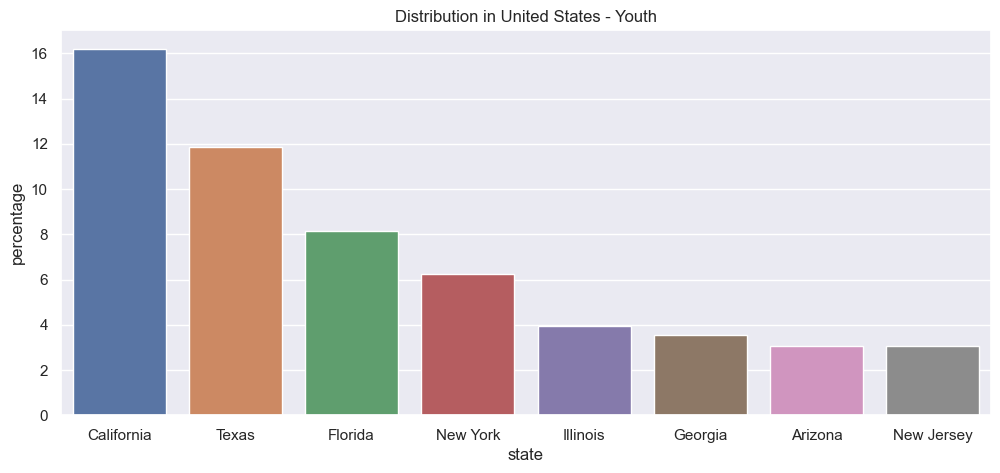

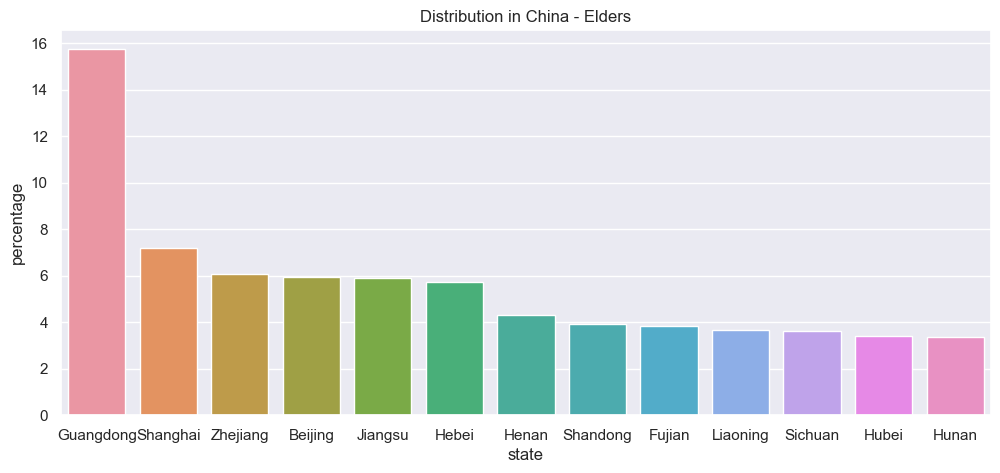

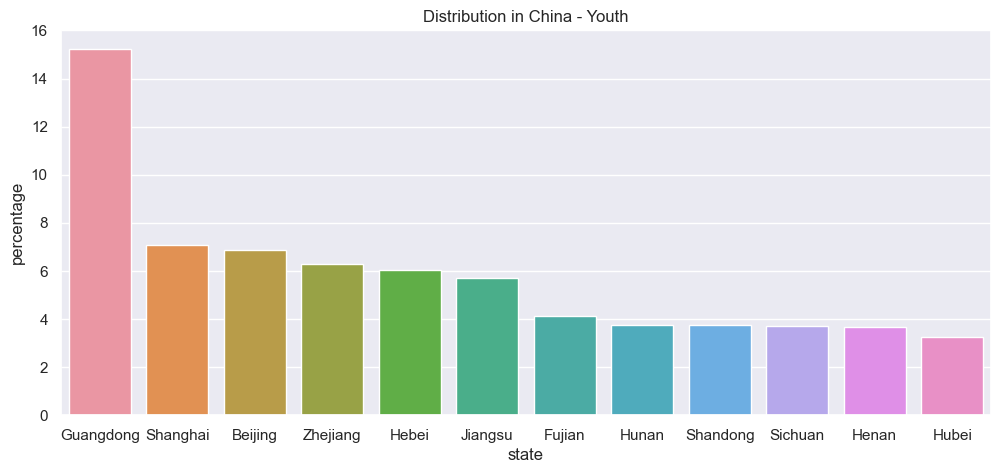

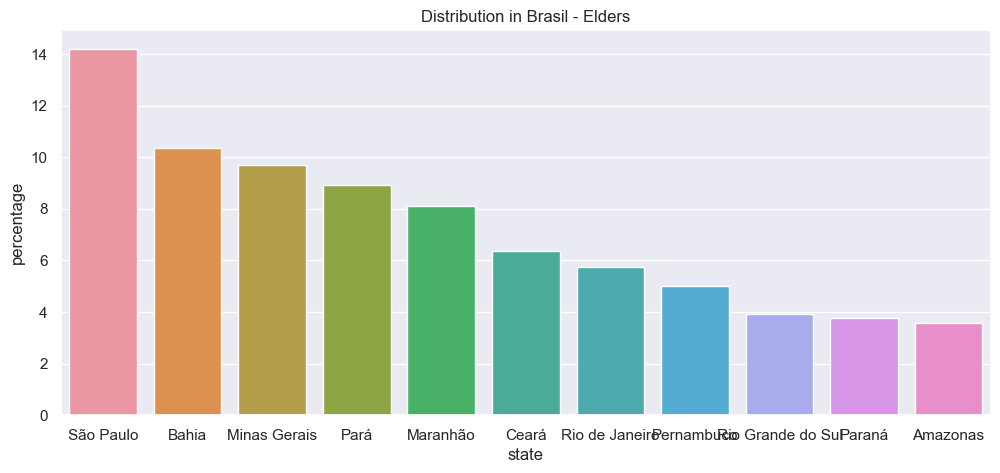

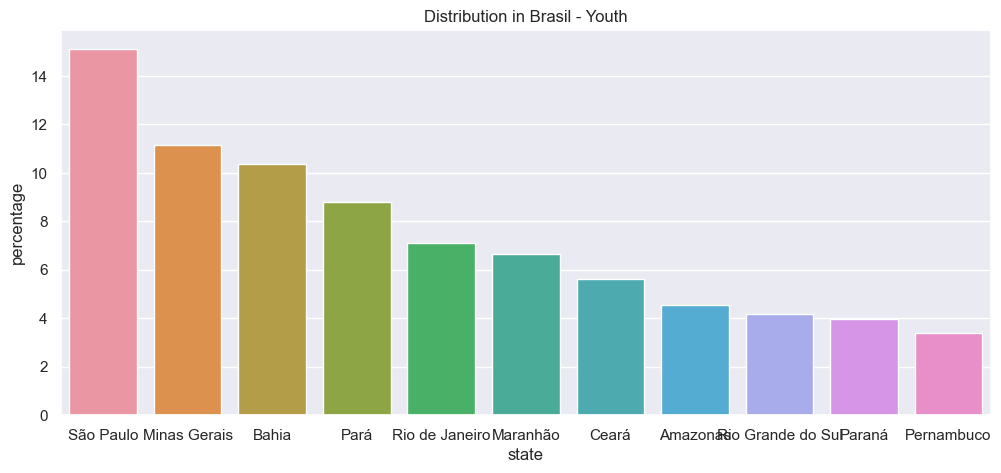

In [377]:
count_1=0

user_by_age_group_and_gender_count = users[["age_group","gender","user_id"]].groupby(["age_group","gender"]).count().sort_values(["age_group"], ascending=True)
user_by_age_group_and_gender_count["user_id"] = user_by_age_group_and_gender_count["user_id"]/1000 #percentage
user_by_age_group_and_gender_count.rename(columns={"user_id": "percentage"}, inplace=True)

user_by_age_group_count = users[["age_group","user_id"]].groupby(["age_group"],as_index=False).count().sort_values(["age_group"], ascending=True)
user_by_age_group_count.rename(columns={"user_id": "num_of_users"}, inplace=True)
count_1+=1
plt.figure(count_1)
x = sns.barplot(user_by_age_group_count, x="age_group", y="num_of_users")
x.set_title("Distribution by age group")

user_by_gender_count = users[["gender","user_id"]].groupby(["gender"],as_index=False).count().sort_values(["gender"], ascending=True)
user_by_gender_count.rename(columns={"user_id": "num_of_users"}, inplace=True)
count_1+=1
plt.figure(count_1)
x = sns.barplot(user_by_gender_count, x="gender", y="num_of_users")
x.set_title("Distribution by gender")

user_by_country_count0 = users[["country","user_id"]].groupby(["country"],as_index=False).count().sort_values(["user_id"], ascending=False)
user_by_country_count0.rename(columns={"user_id": "num_of_users"}, inplace=True)
count_1+=1
fig = plt.figure(count_1)
fig.set(figheight=8,figwidth=15)
x = sns.barplot(user_by_country_count0.head(8), x="country", y="num_of_users")
x.set_title("Distribution by country (8 most popular)")

# IN GENERAL THE DISTRIBUTION AMONG AGE GROUPS AND GENDERS IS SIMILAR, HAVING A STRICLY BIGGER AMOUNT FOR PEOPLE ABOVE 60YO

user_by_age_group_and_country_count = users[["age_group","country","user_id"]].groupby(["country","age_group"], as_index=False).count().sort_values(["country","age_group"], ascending=True)
user_by_age_group_and_country_count["user_id"] = user_by_age_group_and_country_count["user_id"]/1000 #percentage
user_by_age_group_and_gender_count.rename(columns={"user_id": "percentage"}, inplace=True)

# LIKE IT HAPPENED IN GENERAL TERMS, IF WE DIVIDE THE DATASET BY COUNTRY THE DISTRIBUTION IS SIMILAR IF WE TALK ABOUT AGE GROUP

user_by_country_gender_count = users[["country","gender","user_id"]].groupby(["country","gender"], as_index=False).count().sort_values(["country","gender"], ascending=True)
user_by_country_gender_count["user_id"] = user_by_country_gender_count["user_id"]/1000
user_by_country_gender_count.rename(columns={"user_id": "percentage"}, inplace=True)

# LIKE IT HAPPENED IN GENERAL TERMS, IF WE DIVIDE THE DATASET BY COUNTRY THE DISTRIBUTION IS SIMILAR IF WE TALK ABOUT GENDERS

user_by_country_count = users[["country","user_id"]].groupby(["country"]).count().sort_values(["user_id"], ascending=False)
user_by_country_count["user_id"] = user_by_country_count["user_id"]/1000
user_by_country_count.rename(columns={"user_id": "percentage"}, inplace=True)

# Study the 3 main countries
americans=users[users.country=="United States"]
chineses=users[users.country=="China"]
brazilians=users[users.country=="Brasil"]
three_most_countries=pd.concat([americans, chineses, brazilians])

#AMERICANS
age_groups_and_genders_us_count = americans[["age_group","gender","user_id"]].groupby(["age_group","gender"], as_index=False).count().sort_values(["age_group"], ascending=True)
age_groups_and_genders_us_count["user_id"] = age_groups_and_genders_us_count["user_id"]/americans["user_id"].count()*100
age_groups_and_genders_us_count.rename(columns={"user_id": "percentage"}, inplace=True)

count_1+=1
plt.figure(count_1)
x = sns.barplot(age_groups_and_genders_us_count, x="age_group", y="percentage", hue="gender")
x.set_title("Distribution in United States")

#CHINESES
age_groups_and_genders_ch_count = chineses[["age_group","gender","user_id"]].groupby(["age_group","gender"], as_index=False).count().sort_values(["age_group"], ascending=True)
age_groups_and_genders_ch_count["user_id"] = age_groups_and_genders_ch_count["user_id"]/chineses["user_id"].count()*100
age_groups_and_genders_ch_count.rename(columns={"user_id": "percentage"}, inplace=True)

count_1+=1
plt.figure(count_1)
x = sns.barplot(age_groups_and_genders_ch_count, x="age_group", y="percentage", hue="gender")
x.set_title("Distribution in China")

#BRAZILIANS
age_groups_and_genders_br_count = brazilians[["age_group","gender","user_id"]].groupby(["age_group","gender"], as_index=False).count().sort_values(["age_group"], ascending=True)
age_groups_and_genders_br_count["user_id"] = age_groups_and_genders_br_count["user_id"]/brazilians["user_id"].count()*100
age_groups_and_genders_br_count.rename(columns={"user_id": "percentage"}, inplace=True)

count_1+=1
plt.figure(count_1)
x = sns.barplot(age_groups_and_genders_br_count, x="age_group", y="percentage", hue="gender")
x.set_title("Distribution in Brasil")

age_groups_and_genders_3_count = three_most_countries[["age_group","gender","user_id"]].groupby(["age_group","gender"], as_index=False).count().sort_values(["age_group"], ascending=True)
age_groups_and_genders_3_count["user_id"] = age_groups_and_genders_3_count["user_id"]/three_most_countries["user_id"].count()*100
age_groups_and_genders_3_count.rename(columns={"user_id": "percentage"}, inplace=True)

count_1+=1
plt.figure(count_1)
x = sns.barplot(age_groups_and_genders_3_count, x="age_group", y="percentage", hue="gender")
x.set_title("Distribution among 3 most popular contries")

# Study all countries but the 3 most popular
less_popular_countries=users[(users.country!="United States") & (users.country!="China") & (users.country!="Brasil")]

age_groups_and_genders_less_count = less_popular_countries[["age_group","gender","user_id"]].groupby(["age_group","gender"], as_index=False).count().sort_values(["age_group"], ascending=True)
age_groups_and_genders_less_count["user_id"] = age_groups_and_genders_less_count["user_id"]/less_popular_countries["user_id"].count()*100
age_groups_and_genders_less_count.rename(columns={"user_id": "percentage"}, inplace=True)

count_1+=1
plt.figure(count_1)
x = sns.barplot(age_groups_and_genders_less_count, x="age_group", y="percentage", hue="gender")
x.set_title("Distribution among less popular countries")

## COMMENTS: The distribution is similar for all countries and the trend is to elder people be strictly more representative.

#Study by state
#ELDERS AMERICANS
americans_elders = americans[americans["age_group"]=="6-Elders"]
states_us_elders_count = americans_elders[["state","user_id"]].groupby(["state"], as_index=False).count().sort_values(["user_id"], ascending=False)
states_us_elders_count["user_id"] = states_us_elders_count["user_id"]/americans_elders["user_id"].count()*100
states_us_elders_count.rename(columns={"user_id": "percentage"}, inplace=True)

count_1+=1
fig = plt.figure(count_1)
fig.set(figheight=5,figwidth=12)
x = sns.barplot(states_us_elders_count[states_us_elders_count["percentage"]>=3], x="state", y="percentage")
x.set_title("Distribution in United States - Elders")

#YOUTH AMERICANS
americans_youth = americans[americans["age_group"]=="1-Teens"]
states_us_youth_count = americans_youth[["state","user_id"]].groupby(["state"], as_index=False).count().sort_values(["user_id"], ascending=False)
states_us_youth_count["user_id"] = states_us_youth_count["user_id"]/americans_youth["user_id"].count()*100
states_us_youth_count.rename(columns={"user_id": "percentage"}, inplace=True)

count_1+=1
fig = plt.figure(count_1)
fig.set(figheight=5,figwidth=12)
x = sns.barplot(states_us_youth_count[states_us_youth_count["percentage"]>=3], x="state", y="percentage")
x.set_title("Distribution in United States - Youth")

#ELDERS CHINESE
chineses_elders = chineses[chineses["age_group"]=="6-Elders"]
states_ch_elders_count = chineses_elders[["state","user_id"]].groupby(["state"], as_index=False).count().sort_values(["user_id"], ascending=False)
states_ch_elders_count["user_id"] = states_ch_elders_count["user_id"]/chineses_elders["user_id"].count()*100
states_ch_elders_count.rename(columns={"user_id": "percentage"}, inplace=True)

count_1+=1
fig = plt.figure(count_1)
fig.set(figheight=5,figwidth=12)
x = sns.barplot(states_ch_elders_count[states_ch_elders_count["percentage"]>=3], x="state", y="percentage")
x.set_title("Distribution in China - Elders")

#YOUTH CHINESE
chineses_youth = chineses[chineses["age_group"]=="1-Teens"]
states_ch_youth_count = chineses_youth[["state","user_id"]].groupby(["state"], as_index=False).count().sort_values(["user_id"], ascending=False)
states_ch_youth_count["user_id"] = states_ch_youth_count["user_id"]/chineses_youth["user_id"].count()*100
states_ch_youth_count.rename(columns={"user_id": "percentage"}, inplace=True)

count_1+=1
fig = plt.figure(count_1)
fig.set(figheight=5,figwidth=12)
x = sns.barplot(states_ch_youth_count[states_ch_youth_count["percentage"]>=3], x="state", y="percentage")
x.set_title("Distribution in China - Youth")

#ELDERS BRASILIAN
brazilians_elders = brazilians[brazilians["age_group"]=="6-Elders"]
states_br_elders_count = brazilians_elders[["state","user_id"]].groupby(["state"], as_index=False).count().sort_values(["user_id"], ascending=False)
states_br_elders_count["user_id"] = states_br_elders_count["user_id"]/brazilians_elders["user_id"].count()*100
states_br_elders_count.rename(columns={"user_id": "percentage"}, inplace=True)

count_1+=1
fig = plt.figure(count_1)
fig.set(figheight=5,figwidth=12)
x = sns.barplot(states_br_elders_count[states_br_elders_count["percentage"]>=3], x="state", y="percentage")
x.set_title("Distribution in Brasil - Elders")

#YOUTH BRASILIAN
brazilians_youth = brazilians[brazilians["age_group"]=="1-Teens"]
states_br_youth_count = brazilians_youth[["state","user_id"]].groupby(["state"], as_index=False).count().sort_values(["user_id"], ascending=False)
states_br_youth_count["user_id"] = states_br_youth_count["user_id"]/brazilians_youth["user_id"].count()*100
states_br_youth_count.rename(columns={"user_id": "percentage"}, inplace=True)

count_1+=1
fig = plt.figure(count_1)
fig.set(figheight=5,figwidth=12)
x = sns.barplot(states_br_youth_count[states_br_youth_count["percentage"]>=3], x="state", y="percentage")
x.set_title("Distribution in Brasil - Youth")



# 2. Which countries and age groups spend more money on ecommerce, considering absolute values?

Text(0.5, 1.0, 'Retail price by country and age group')

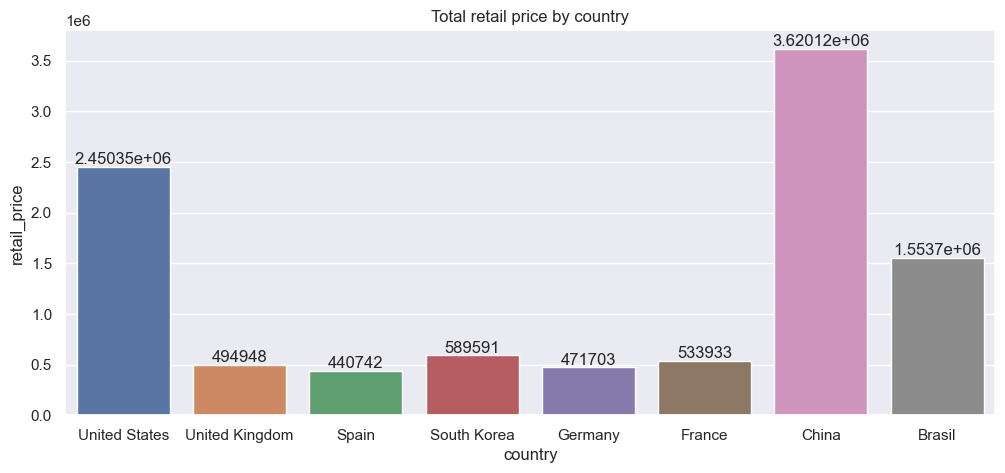

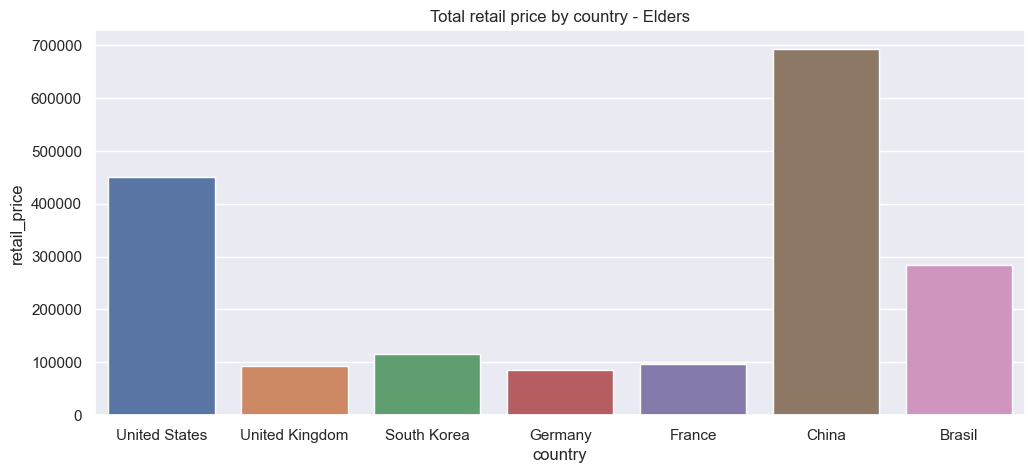

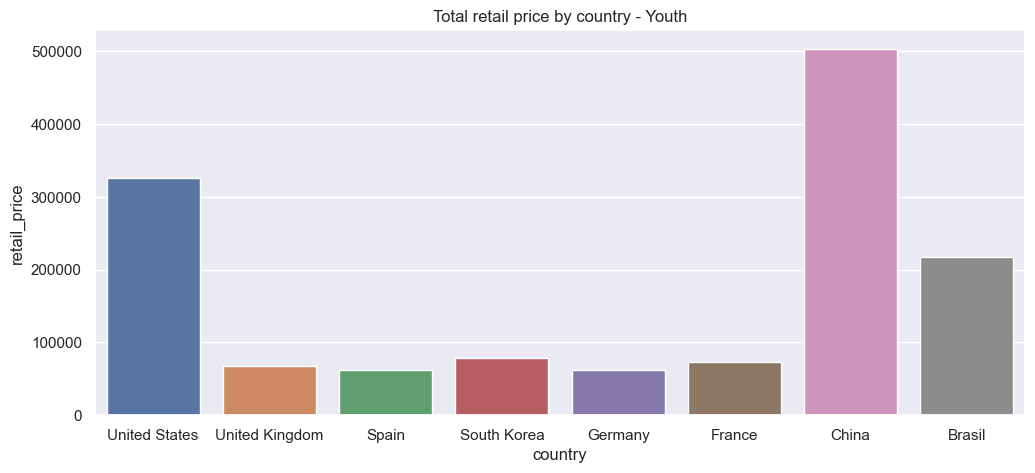

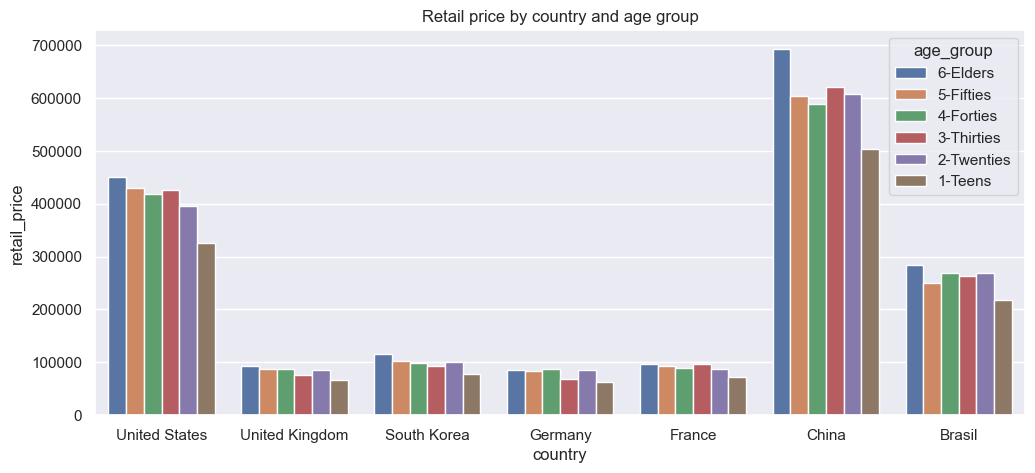

In [378]:
count_2 = 0

products_users["prd_order_id"] = products_users.index + 1
products_users_clean = pd.merge(products_users, users, on='user_id', how='inner')

products_users_clean = products_users_clean[["user_id","name_y","id","category","brand","retail_price","country","age_group","costumer_time","gender","prd_order_id","order_id"]]
products_users_clean.rename(columns={"name_y": "user_name"}, inplace=True)

products_by_user = products_users_clean[["user_id","country","user_name","retail_price","costumer_time","age_group","order_id"]].groupby(["user_id"],as_index=False).agg({'user_name': 'max' ,'country': 'max' ,'retail_price': 'sum', 'costumer_time':'max', 'age_group': 'max', 'order_id':'count'}).sort_values(["retail_price"], ascending=False)
products_by_user.rename(columns={"order_id": "num_of_products"}, inplace=True)

products_by_country = products_by_user[["country","retail_price","num_of_products"]].groupby(["country"],as_index=False).agg({'retail_price': 'sum', 'num_of_products': 'count'}).sort_values(["country"], ascending=False)

products_by_user_elders = products_by_user[products_by_user["age_group"]=="6-Elders"]
products_by_user_teens = products_by_user[products_by_user["age_group"]=="1-Teens"]
products_by_user_and_country_elders = products_by_user_elders[["country","retail_price","num_of_products"]].groupby(["country"],as_index=False).agg({'retail_price': 'sum', 'num_of_products': 'count'}).sort_values(["country"], ascending=False)
products_by_user_and_country_teens = products_by_user_teens[["country","retail_price","num_of_products"]].groupby(["country"],as_index=False).agg({'retail_price': 'sum', 'num_of_products': 'count'}).sort_values(["country"], ascending=False)

# Plot total retail_price of country with retail_price>=4% of total
count_2+=1
fig = plt.figure(count_2)
fig.set(figheight=5,figwidth=12)
x = sns.barplot(products_by_country[products_by_country["retail_price"]>=products_by_country["retail_price"].sum()*0.04], x="country", y="retail_price")
x.set_title("Total retail price by country")
for i in x.containers:
    x.bar_label(i,)

# Plot total retail_price of country with retail_price>=4% of total (Elders)
count_2+=1
fig = plt.figure(count_2)
fig.set(figheight=5,figwidth=12)
x = sns.barplot(products_by_user_and_country_elders[products_by_user_and_country_elders["retail_price"]>=products_by_user_and_country_elders["retail_price"].sum()*0.04], x="country", y="retail_price")
x.set_title("Total retail price by country - Elders")

# Plot total retail_price of country with retail_price>=4% of total (Youth)
count_2+=1
fig = plt.figure(count_2)
fig.set(figheight=5,figwidth=12)
x = sns.barplot(products_by_user_and_country_teens[products_by_user_and_country_teens["retail_price"]>=products_by_user_and_country_teens["retail_price"].sum()*0.04], x="country", y="retail_price")
x.set_title("Total retail price by country - Youth")

# Plot the seven countries that spend more money, divided by age group
incomes_users_by_contry_and_age_group = products_by_user[["country","age_group","retail_price","num_of_products"]].groupby(["country","age_group"],as_index=False).agg({'retail_price': 'sum', 'num_of_products': 'count'}).sort_values(["country","age_group"], ascending=False)

count_2+=1
fig = plt.figure(count_2)
fig.set(figheight=5,figwidth=12)
x = sns.barplot(incomes_users_by_contry_and_age_group[incomes_users_by_contry_and_age_group["country"].isin(["United States","China","Brasil","South Korea","United Kingdom","Germany","France"])], x="country", y="retail_price", hue="age_group")
x.set_title("Retail price by country and age group")

# Looking for the results we can easily see that China, USA and Brasil are the countries that spend more money in general and the age group is the elders in most of the countries.



# 3. Which countries and age groups spend more money on ecommerce, considering relative values?

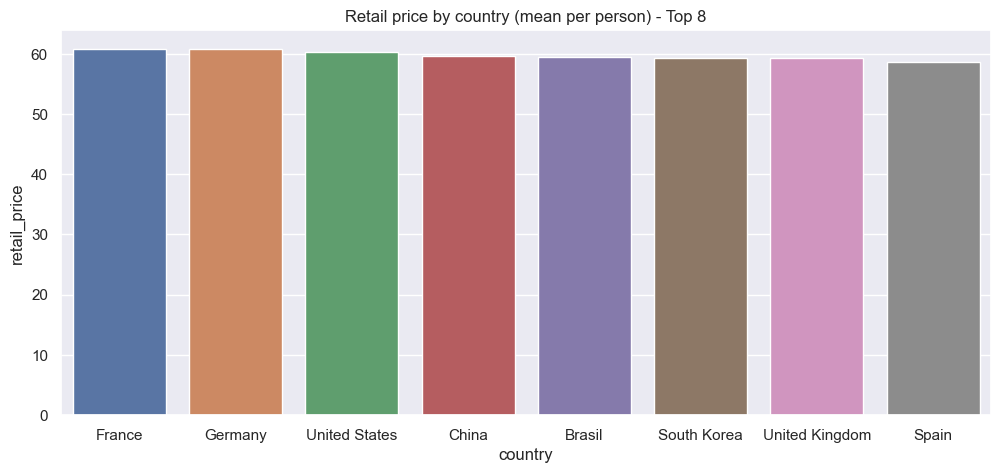

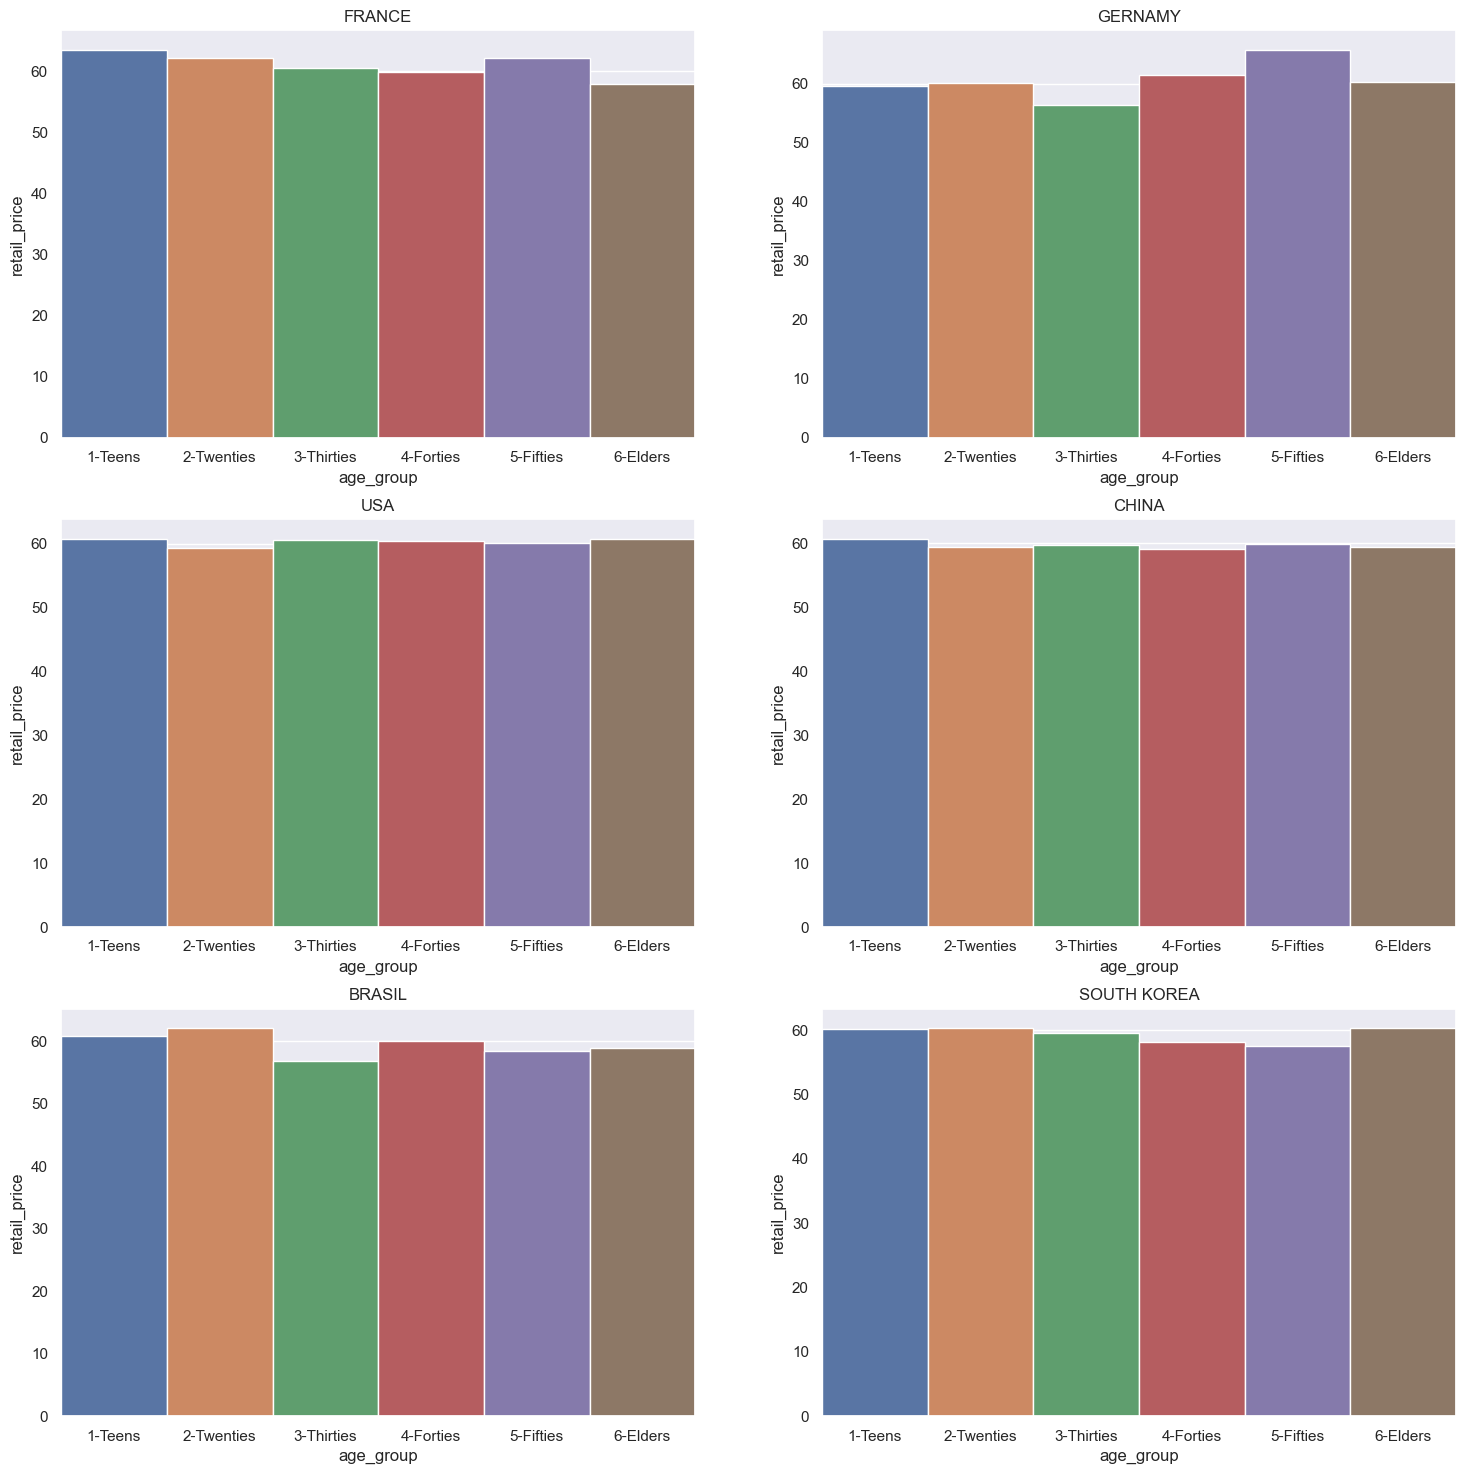

In [341]:
count_3 = 0

avg_retail_price_products_by_user = products_users_clean[["user_id","country","user_name","retail_price","order_id","costumer_time","age_group"]].groupby(["user_id"],as_index=False).agg({'user_name': 'max','country': 'max' ,'retail_price': 'mean', 'order_id': 'count', 'costumer_time':'max', 'age_group': 'max'}).sort_values(["retail_price"], ascending=False)
avg_retail_price_products_by_user.rename(columns={"order_id": "num_of_products"}, inplace=True)

avg_retail_price_products_by_country = avg_retail_price_products_by_user[["country","retail_price","num_of_products"]].groupby(["country"],as_index=False).agg({'retail_price': 'mean', 'num_of_products': 'sum'}).sort_values(["retail_price"], ascending=False)

#Plot the mean retail price per person for the country with more than 4% Total Population

count_3+=1
fig = plt.figure(count_3)
fig.set(figheight=5,figwidth=12)
x = sns.barplot(avg_retail_price_products_by_country[avg_retail_price_products_by_country["num_of_products"]>=avg_retail_price_products_by_country["num_of_products"].sum()*0.04], x="country", y="retail_price")
x.set_title("Retail price by country (mean per person) - Top 8")

#print(avg_incomes_users_relative)

avg_retail_price_products_by_user_fr = avg_retail_price_products_by_user[avg_retail_price_products_by_user["country"]=="France"][["age_group","retail_price","num_of_products"]].groupby(["age_group"],as_index=False).agg({'retail_price': 'mean', 'num_of_products': 'sum'}).sort_values(["age_group"], ascending=True)
avg_retail_price_products_by_user_ge = avg_retail_price_products_by_user[avg_retail_price_products_by_user["country"]=="Germany"][["age_group","retail_price","num_of_products"]].groupby(["age_group"],as_index=False).agg({'retail_price': 'mean', 'num_of_products': 'sum'}).sort_values(["age_group"], ascending=True)
avg_retail_price_products_by_user_us = avg_retail_price_products_by_user[avg_retail_price_products_by_user["country"]=="United States"][["age_group","retail_price","num_of_products"]].groupby(["age_group"],as_index=False).agg({'retail_price': 'mean', 'num_of_products': 'sum'}).sort_values(["age_group"], ascending=True)
avg_retail_price_products_by_user_ch = avg_retail_price_products_by_user[avg_retail_price_products_by_user["country"]=="China"][["age_group","retail_price","num_of_products"]].groupby(["age_group"],as_index=False).agg({'retail_price': 'mean', 'num_of_products': 'sum'}).sort_values(["age_group"], ascending=True)
avg_retail_price_products_by_user_br = avg_retail_price_products_by_user[avg_retail_price_products_by_user["country"]=="Brasil"][["age_group","retail_price","num_of_products"]].groupby(["age_group"],as_index=False).agg({'retail_price': 'mean', 'num_of_products': 'sum'}).sort_values(["age_group"], ascending=True)
avg_retail_price_products_by_user_sk = avg_retail_price_products_by_user[avg_retail_price_products_by_user["country"]=="South Korea"][["age_group","retail_price","num_of_products"]].groupby(["age_group"],as_index=False).agg({'retail_price': 'mean', 'num_of_products': 'sum'}).sort_values(["age_group"], ascending=True)

#set seaborn plotting aesthetics as default
sns.set()

#define plotting region (1 row, 2 columns)
fig, axes = plt.subplots(3, 2)
fig.set(figheight=18,figwidth=18)

#create boxplot in each subplot
sns.barplot(avg_retail_price_products_by_user_fr, x="age_group", y="retail_price", ax=axes[0,0], width=1).set_title("FRANCE")
sns.barplot(avg_retail_price_products_by_user_ge, x="age_group", y="retail_price", ax=axes[0,1], width=1).set_title("GERNAMY")
sns.barplot(avg_retail_price_products_by_user_us, x="age_group", y="retail_price", ax=axes[1,0], width=1).set_title("USA")
sns.barplot(avg_retail_price_products_by_user_ch, x="age_group", y="retail_price", ax=axes[1,1], width=1).set_title("CHINA")
sns.barplot(avg_retail_price_products_by_user_br, x="age_group", y="retail_price", ax=axes[2,0], width=1).set_title("BRASIL")
sns.barplot(avg_retail_price_products_by_user_sk, x="age_group", y="retail_price", ax=axes[2,1], width=1).set_title("SOUTH KOREA")
plt.show()

#Looking for the 6 more popular countries, we can see that the difference between age groups is low, but in average the money spend by person is strictly high on the youth


# 4. Which countries and genders spend more money on ecommerce?

Text(0.5, 1.0, 'Total retail price by country and gender')

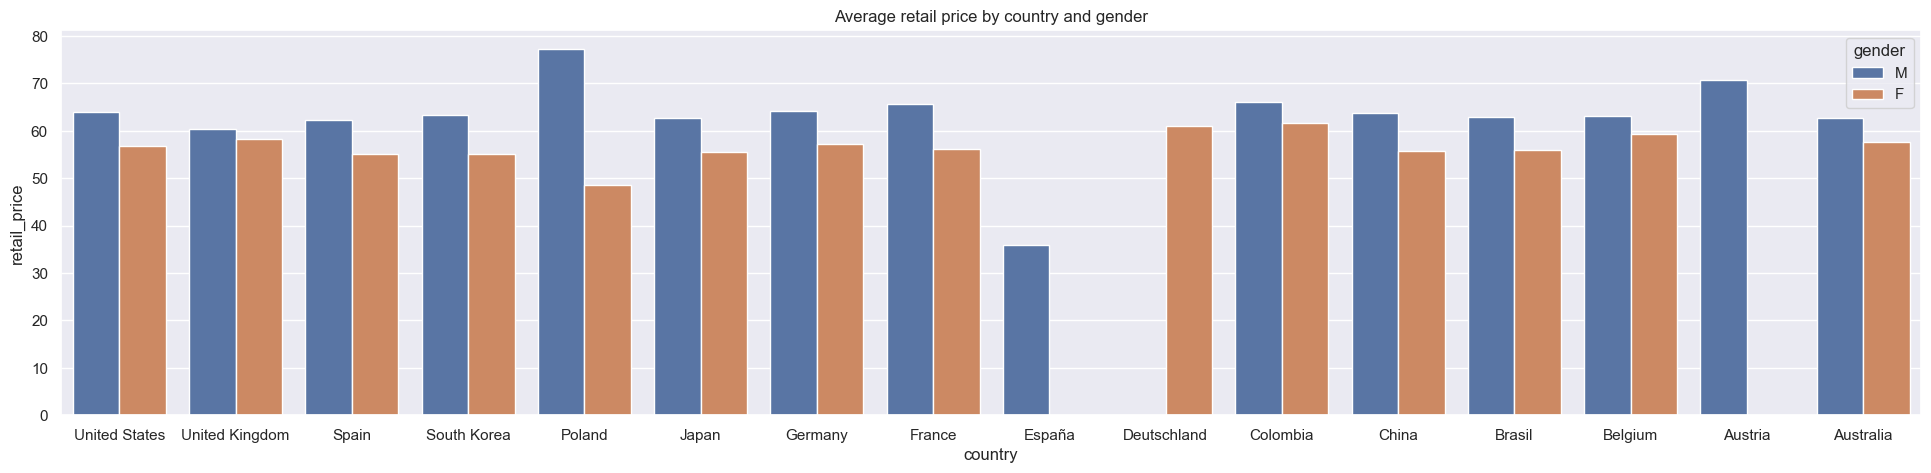

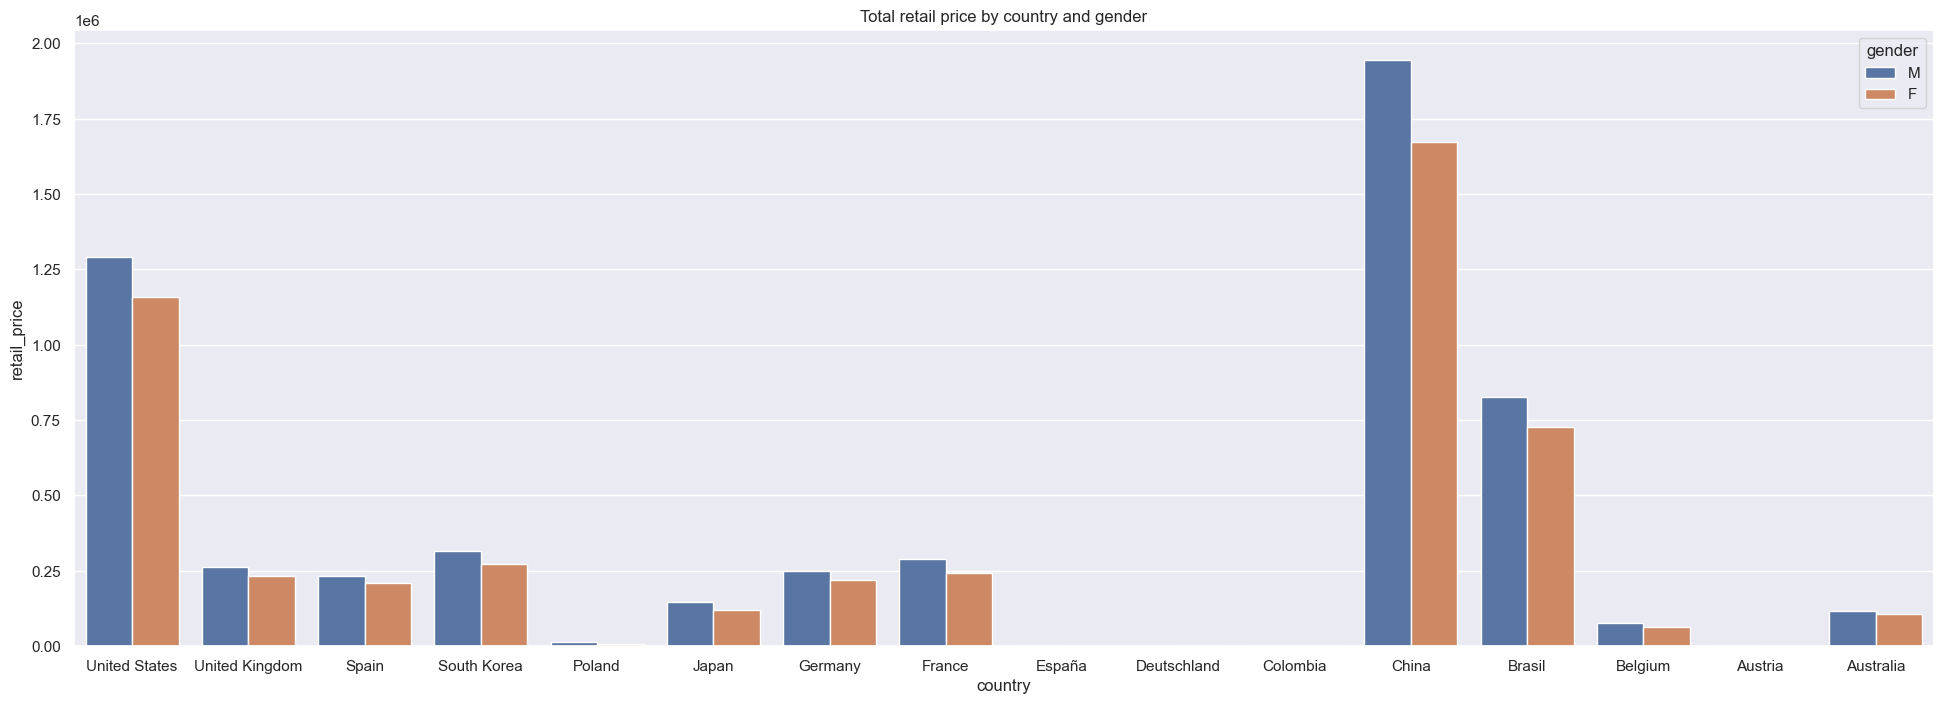

In [342]:
count_4 = 0

avg_retail_price_products_by_user_genders = products_users_clean[["user_id","country","retail_price","order_id","costumer_time","gender"]].groupby(["user_id"],as_index=False).agg({'country': 'max' ,'retail_price': 'mean', 'order_id': 'count', 'costumer_time':'max', 'gender': 'max'}).sort_values(["retail_price"], ascending=False)
avg_retail_price_products_by_country_and_gender = avg_retail_price_products_by_user_genders[["country","retail_price","order_id","gender"]].groupby(["country","gender"],as_index=False).agg({'retail_price': 'mean', 'order_id': 'sum'}).sort_values(["country","gender"], ascending=False)
avg_retail_price_products_by_country_and_gender.rename(columns={"order_id": "num_of_products"}, inplace=True)

count_4+=1
fig = plt.figure(count_4)
fig.set(figheight=5,figwidth=24)
x = sns.barplot(avg_retail_price_products_by_country_and_gender, x="country", y="retail_price",hue="gender")
x.set_title("Average retail price by country and gender")

sum_retail_price_products_by_user_genders = products_users_clean[["user_id","country","retail_price","order_id","costumer_time","gender"]].groupby(["user_id"],as_index=False).agg({'country': 'max' ,'retail_price': 'sum', 'order_id': 'count', 'costumer_time':'max', 'gender': 'max'}).sort_values(["retail_price"], ascending=False)
sum_retail_price_products_by_user_genders = sum_retail_price_products_by_user_genders[["country","retail_price","order_id","gender"]].groupby(["country","gender"],as_index=False).agg({'retail_price': 'sum', 'order_id': 'sum'}).sort_values(["country","gender"], ascending=False)
sum_retail_price_products_by_user_genders.rename(columns={"order_id": "num_of_products"}, inplace=True)

count_4+=1
fig = plt.figure(count_4)
fig.set(figheight=8,figwidth=24)
x = sns.barplot(sum_retail_price_products_by_user_genders, x="country", y="retail_price",hue="gender")
x.set_title("Total retail price by country and gender")


# 5. Which countries and age groups spend more money on ecommerce, for F and M?

Axes(0.125,0.11;0.775x0.77)


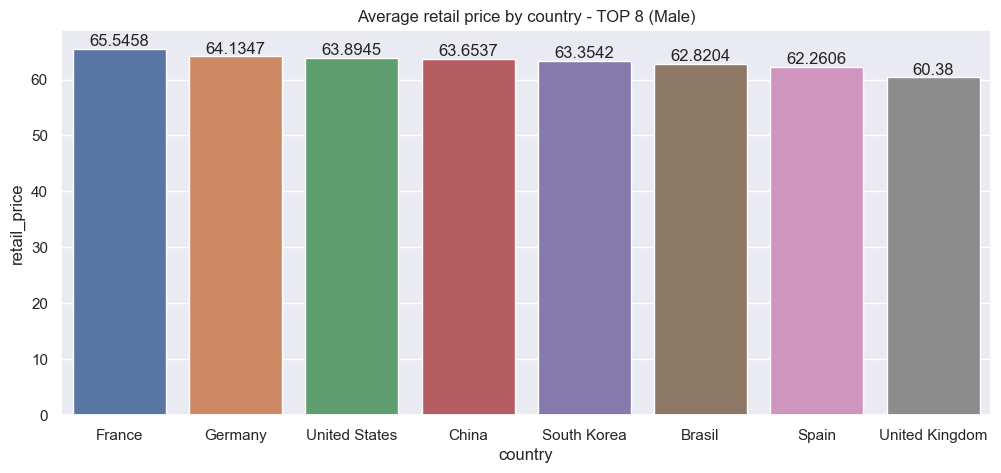

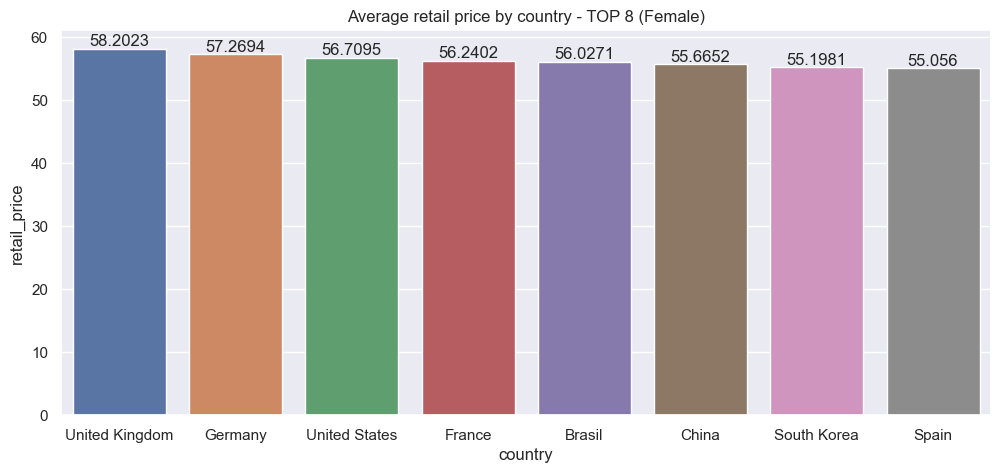

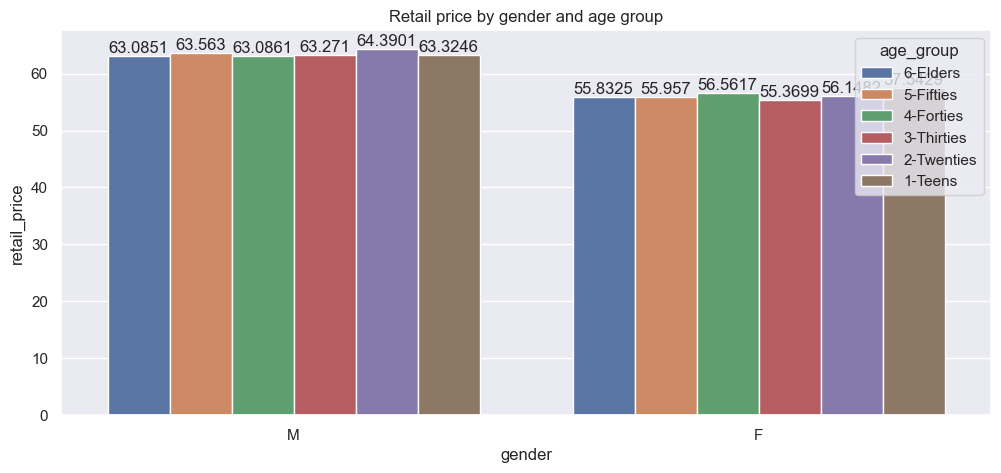

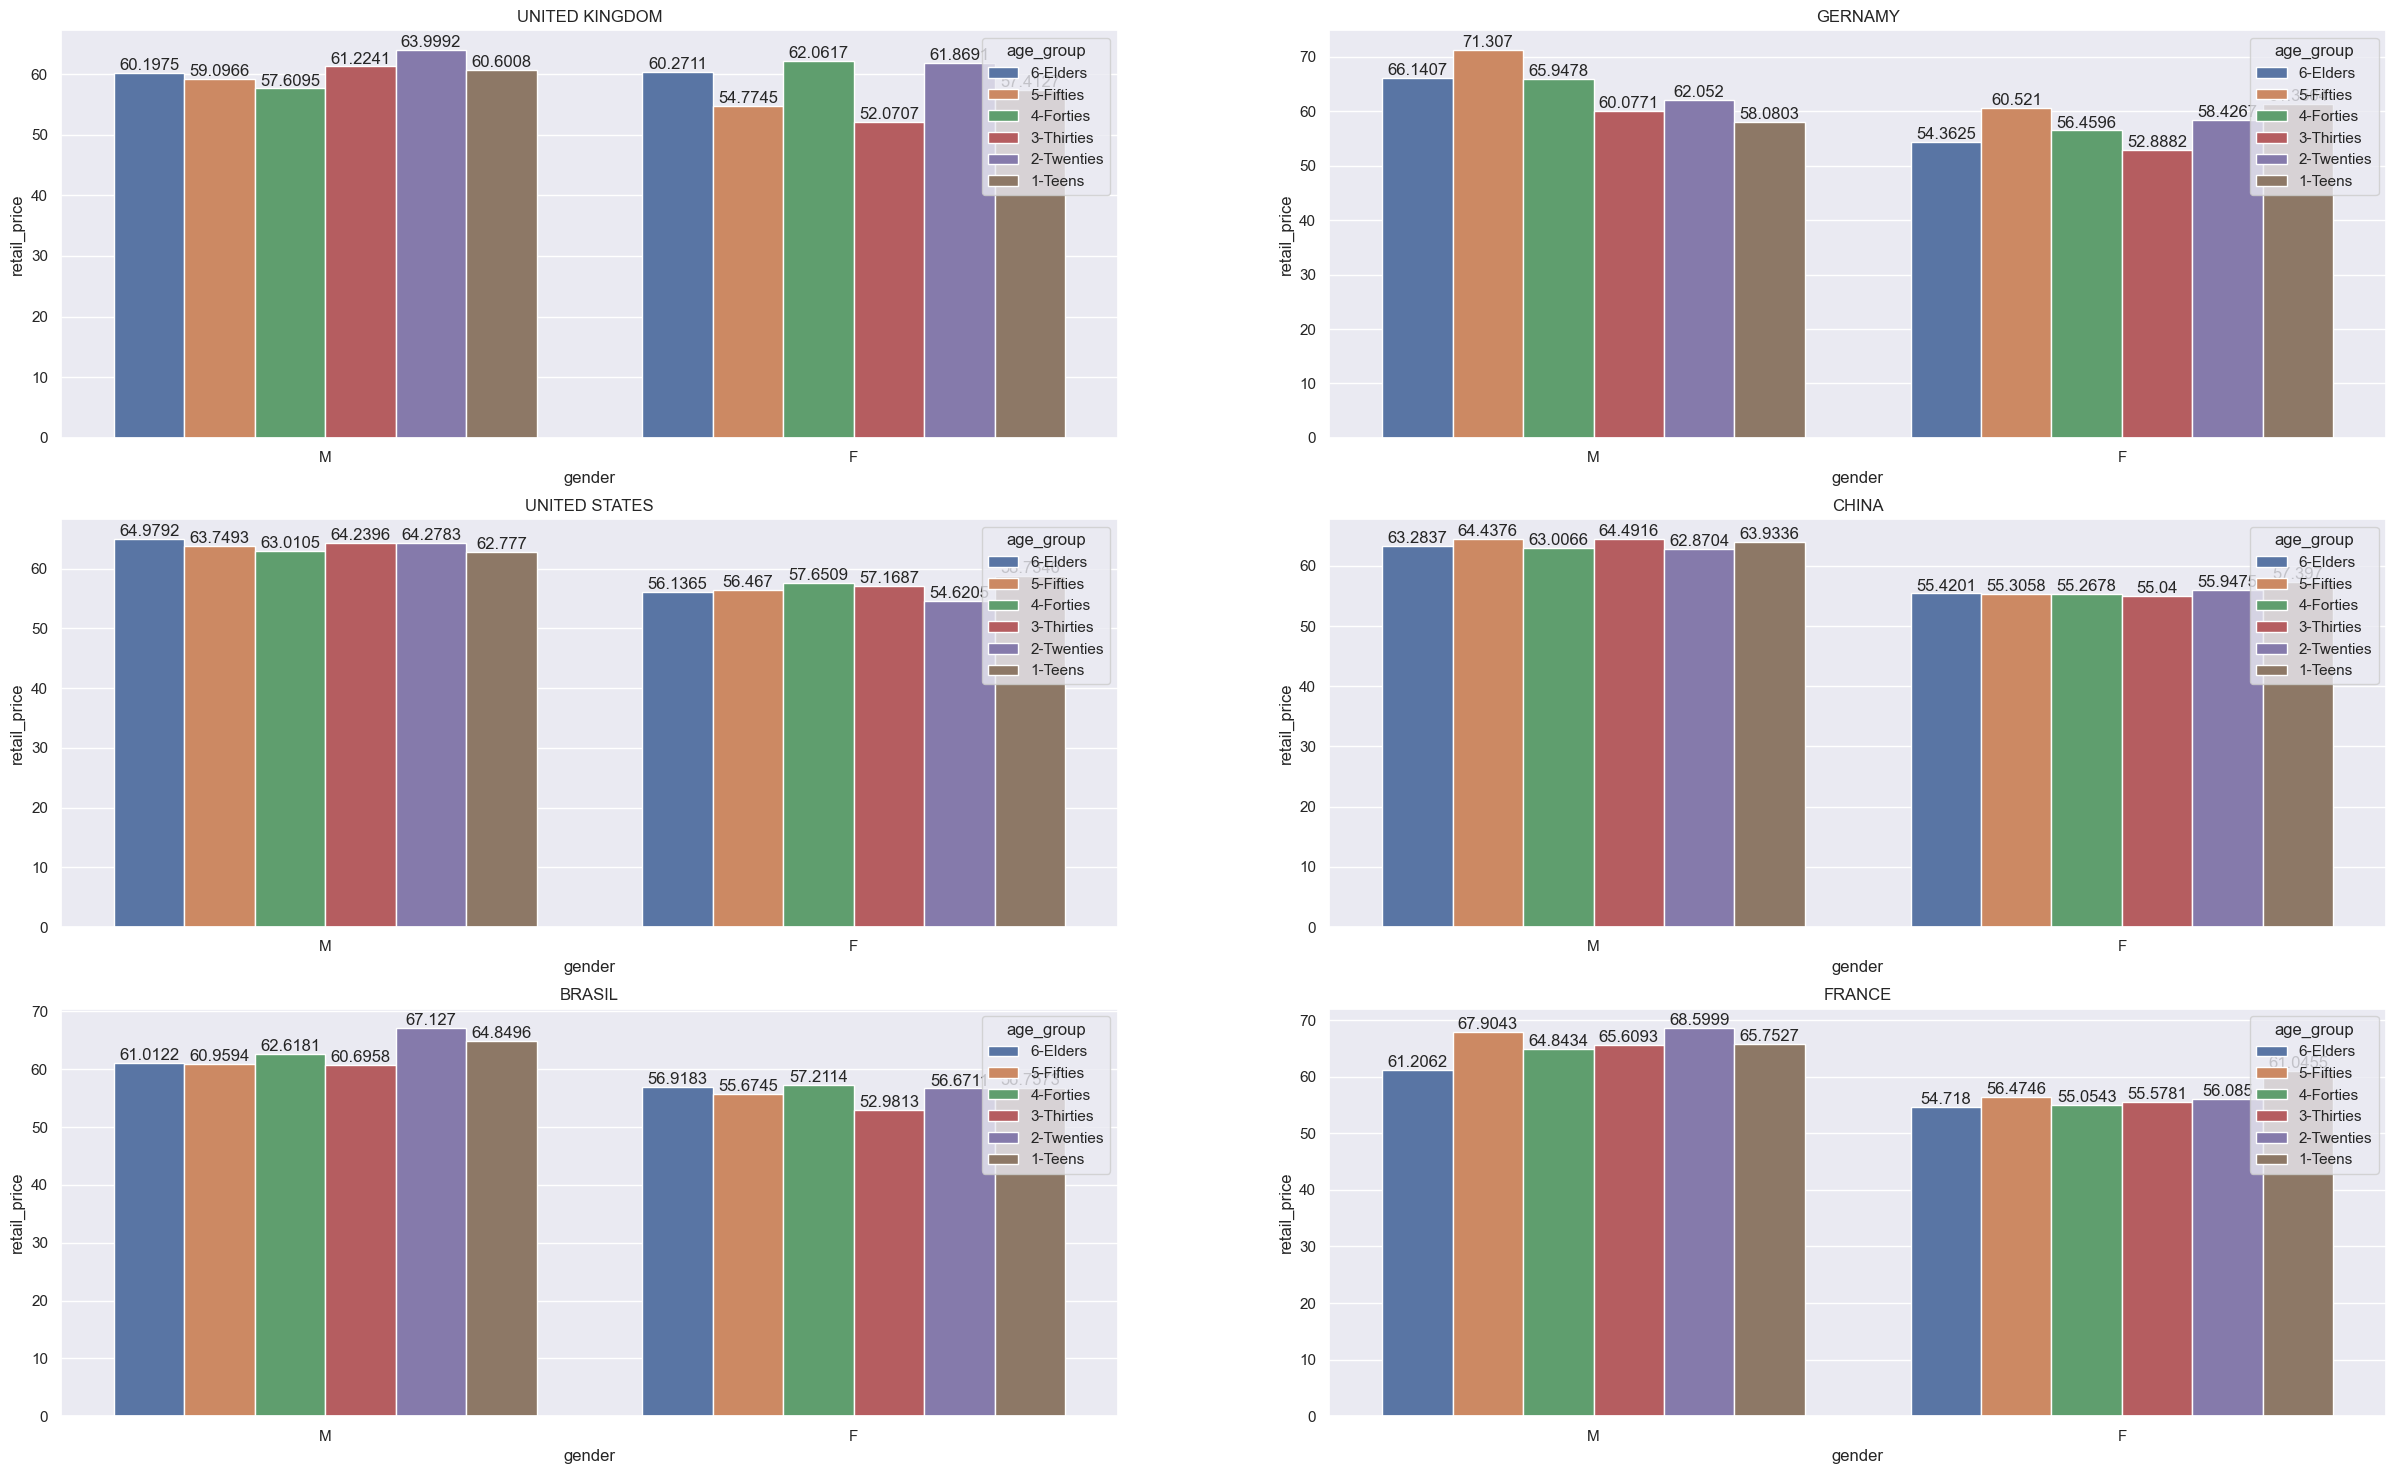

In [343]:
count_5 = 0

avg_retail_price_products_by_user_genders_and_age_group = products_users_clean[["user_id","country","retail_price","order_id","costumer_time","age_group","gender"]].groupby(["user_id"],as_index=False).agg({'country': 'max' ,'retail_price': 'mean', 'order_id': 'count', 'costumer_time':'max', 'age_group': 'max', 'gender': 'max'}).sort_values(["retail_price"], ascending=False)

avg_retail_price_products_by_user_genders_and_age_group_m = avg_retail_price_products_by_user_genders_and_age_group[avg_retail_price_products_by_user_genders_and_age_group["gender"]=="M"][["country","retail_price","order_id"]].groupby(["country"],as_index=False).agg({'retail_price': 'mean', 'order_id': 'count'}).sort_values(["retail_price"], ascending=False)
avg_retail_price_products_by_user_genders_and_age_group_m.rename(columns={"order_id": "num_of_products"}, inplace=True)
avg_retail_price_products_by_user_genders_and_age_group_f = avg_retail_price_products_by_user_genders_and_age_group[avg_retail_price_products_by_user_genders_and_age_group["gender"]=="F"][["country","retail_price","order_id"]].groupby(["country"],as_index=False).agg({'retail_price': 'mean', 'order_id': 'count'}).sort_values(["retail_price"], ascending=False)
avg_retail_price_products_by_user_genders_and_age_group_f.rename(columns={"order_id": "num_of_products"}, inplace=True)

#Plot the mean retail price per person for the country with more than 4% Total Population (Male)

count_5+=1
fig = plt.figure(count_5)
fig.set(figheight=5,figwidth=12)
x = sns.barplot(avg_retail_price_products_by_user_genders_and_age_group_m[avg_retail_price_products_by_user_genders_and_age_group_m["num_of_products"]>=avg_retail_price_products_by_user_genders_and_age_group_m["num_of_products"].sum()*0.04], x="country", y="retail_price")
x.set_title("Average retail price by country - TOP 8 (Male)")

for i in x.containers:
    x.bar_label(i,)

count_5+=1
fig = plt.figure(count_5)
fig.set(figheight=5,figwidth=12)
x = sns.barplot(avg_retail_price_products_by_user_genders_and_age_group_f[avg_retail_price_products_by_user_genders_and_age_group_f["num_of_products"]>=avg_retail_price_products_by_user_genders_and_age_group_f["num_of_products"].sum()*0.04], x="country", y="retail_price")
x.set_title("Average retail price by country - TOP 8 (Female)")

for i in x.containers:
    x.bar_label(i,)

# Retail price by gender and age group
avg_retail_price_products_by_genders_and_age_group = avg_retail_price_products_by_user_genders_and_age_group[["gender","age_group","retail_price","order_id"]].groupby(["gender","age_group"],as_index=False).agg({'retail_price': 'mean', 'order_id': 'count'}).sort_values(["gender","age_group"], ascending=False)
avg_retail_price_products_by_genders_and_age_group.rename(columns={"order_id": "num_of_products"}, inplace=True)

count_5+=1
fig = plt.figure(count_5)
fig.set(figheight=5,figwidth=12)
x = sns.barplot(avg_retail_price_products_by_genders_and_age_group, x="gender", y="retail_price", hue="age_group")
x.set_title("Retail price by gender and age group")
print(x)
for i in x.containers:
    x.bar_label(i,)

#set seaborn plotting aesthetics as default
sns.set()

#define plotting region (1 row, 2 columns)
fig, axes = plt.subplots(3, 2)
fig.set(figheight=18,figwidth=30)

avg_retail_price_products_by_country_genders_and_age_group = avg_retail_price_products_by_user_genders_and_age_group[["country","retail_price","order_id","age_group","gender"]].groupby(["country","age_group","gender"],as_index=False).agg({'retail_price': 'mean', 'order_id': 'count'}).sort_values(["country","age_group","gender"], ascending=False)
avg_retail_price_products_by_country_genders_and_age_group.rename(columns={"order_id": "num_of_products"}, inplace=True)

#create boxplot in each subplot
x1 = sns.barplot(avg_retail_price_products_by_country_genders_and_age_group[avg_retail_price_products_by_country_genders_and_age_group.country=="United Kingdom"], x="gender", y="retail_price", hue="age_group", ax=axes[0,0], width=0.8)
x1.set_title("UNITED KINGDOM")

for i in x1.containers:
    x1.bar_label(i,)
x2 = sns.barplot(avg_retail_price_products_by_country_genders_and_age_group[avg_retail_price_products_by_country_genders_and_age_group.country=="Germany"], x="gender", y="retail_price", hue="age_group", ax=axes[0,1], width=0.8)
x2.set_title("GERNAMY")
for i in x2.containers:
    x2.bar_label(i,)
x3 = sns.barplot(avg_retail_price_products_by_country_genders_and_age_group[avg_retail_price_products_by_country_genders_and_age_group.country=="United States"], x="gender", y="retail_price", hue="age_group", ax=axes[1,0], width=0.8)
x3.set_title("UNITED STATES")
for i in x3.containers:
    x3.bar_label(i,)
x4 = sns.barplot(avg_retail_price_products_by_country_genders_and_age_group[avg_retail_price_products_by_country_genders_and_age_group.country=="China"], x="gender", y="retail_price", hue="age_group", ax=axes[1,1], width=0.8)
x4.set_title("CHINA")
for i in x4.containers:
    x4.bar_label(i,)
x5 = sns.barplot(avg_retail_price_products_by_country_genders_and_age_group[avg_retail_price_products_by_country_genders_and_age_group.country=="Brasil"], x="gender", y="retail_price", hue="age_group", ax=axes[2,0], width=0.8)
x5.set_title("BRASIL")
for i in x5.containers:
    x5.bar_label(i,)
x6 = sns.barplot(avg_retail_price_products_by_country_genders_and_age_group[avg_retail_price_products_by_country_genders_and_age_group.country=="France"], x="gender", y="retail_price", hue="age_group", ax=axes[2,1], width=0.8)
x6.set_title("FRANCE")
for i in x6.containers:
    x6.bar_label(i,)
plt.show()

# 6. Which countries and age groups have more orders on ecommerce, for F and M?

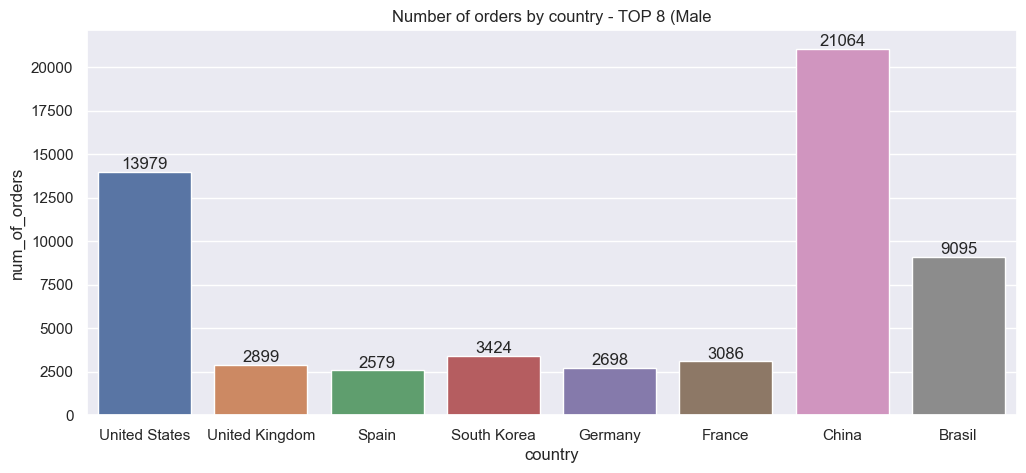

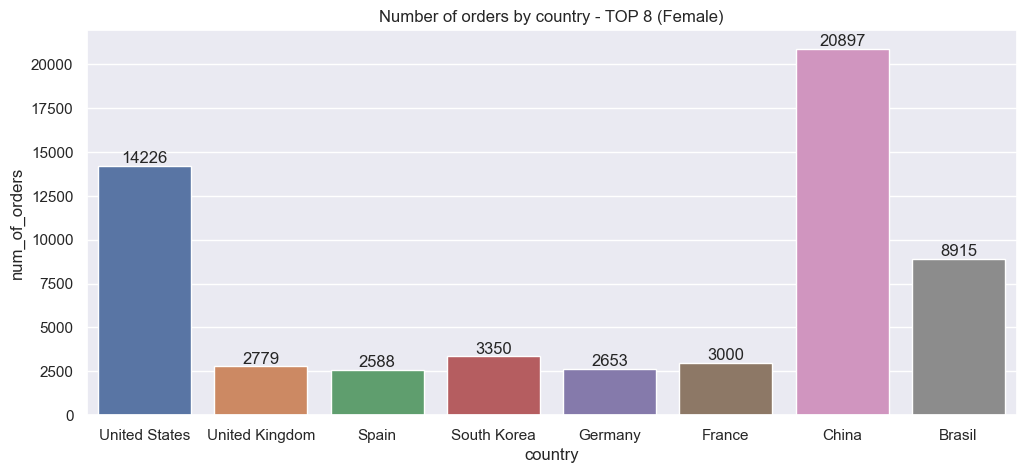

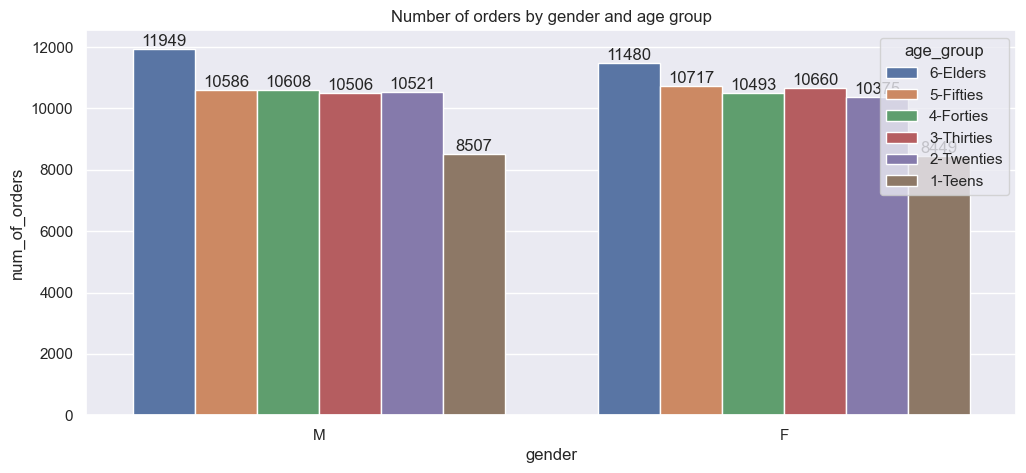

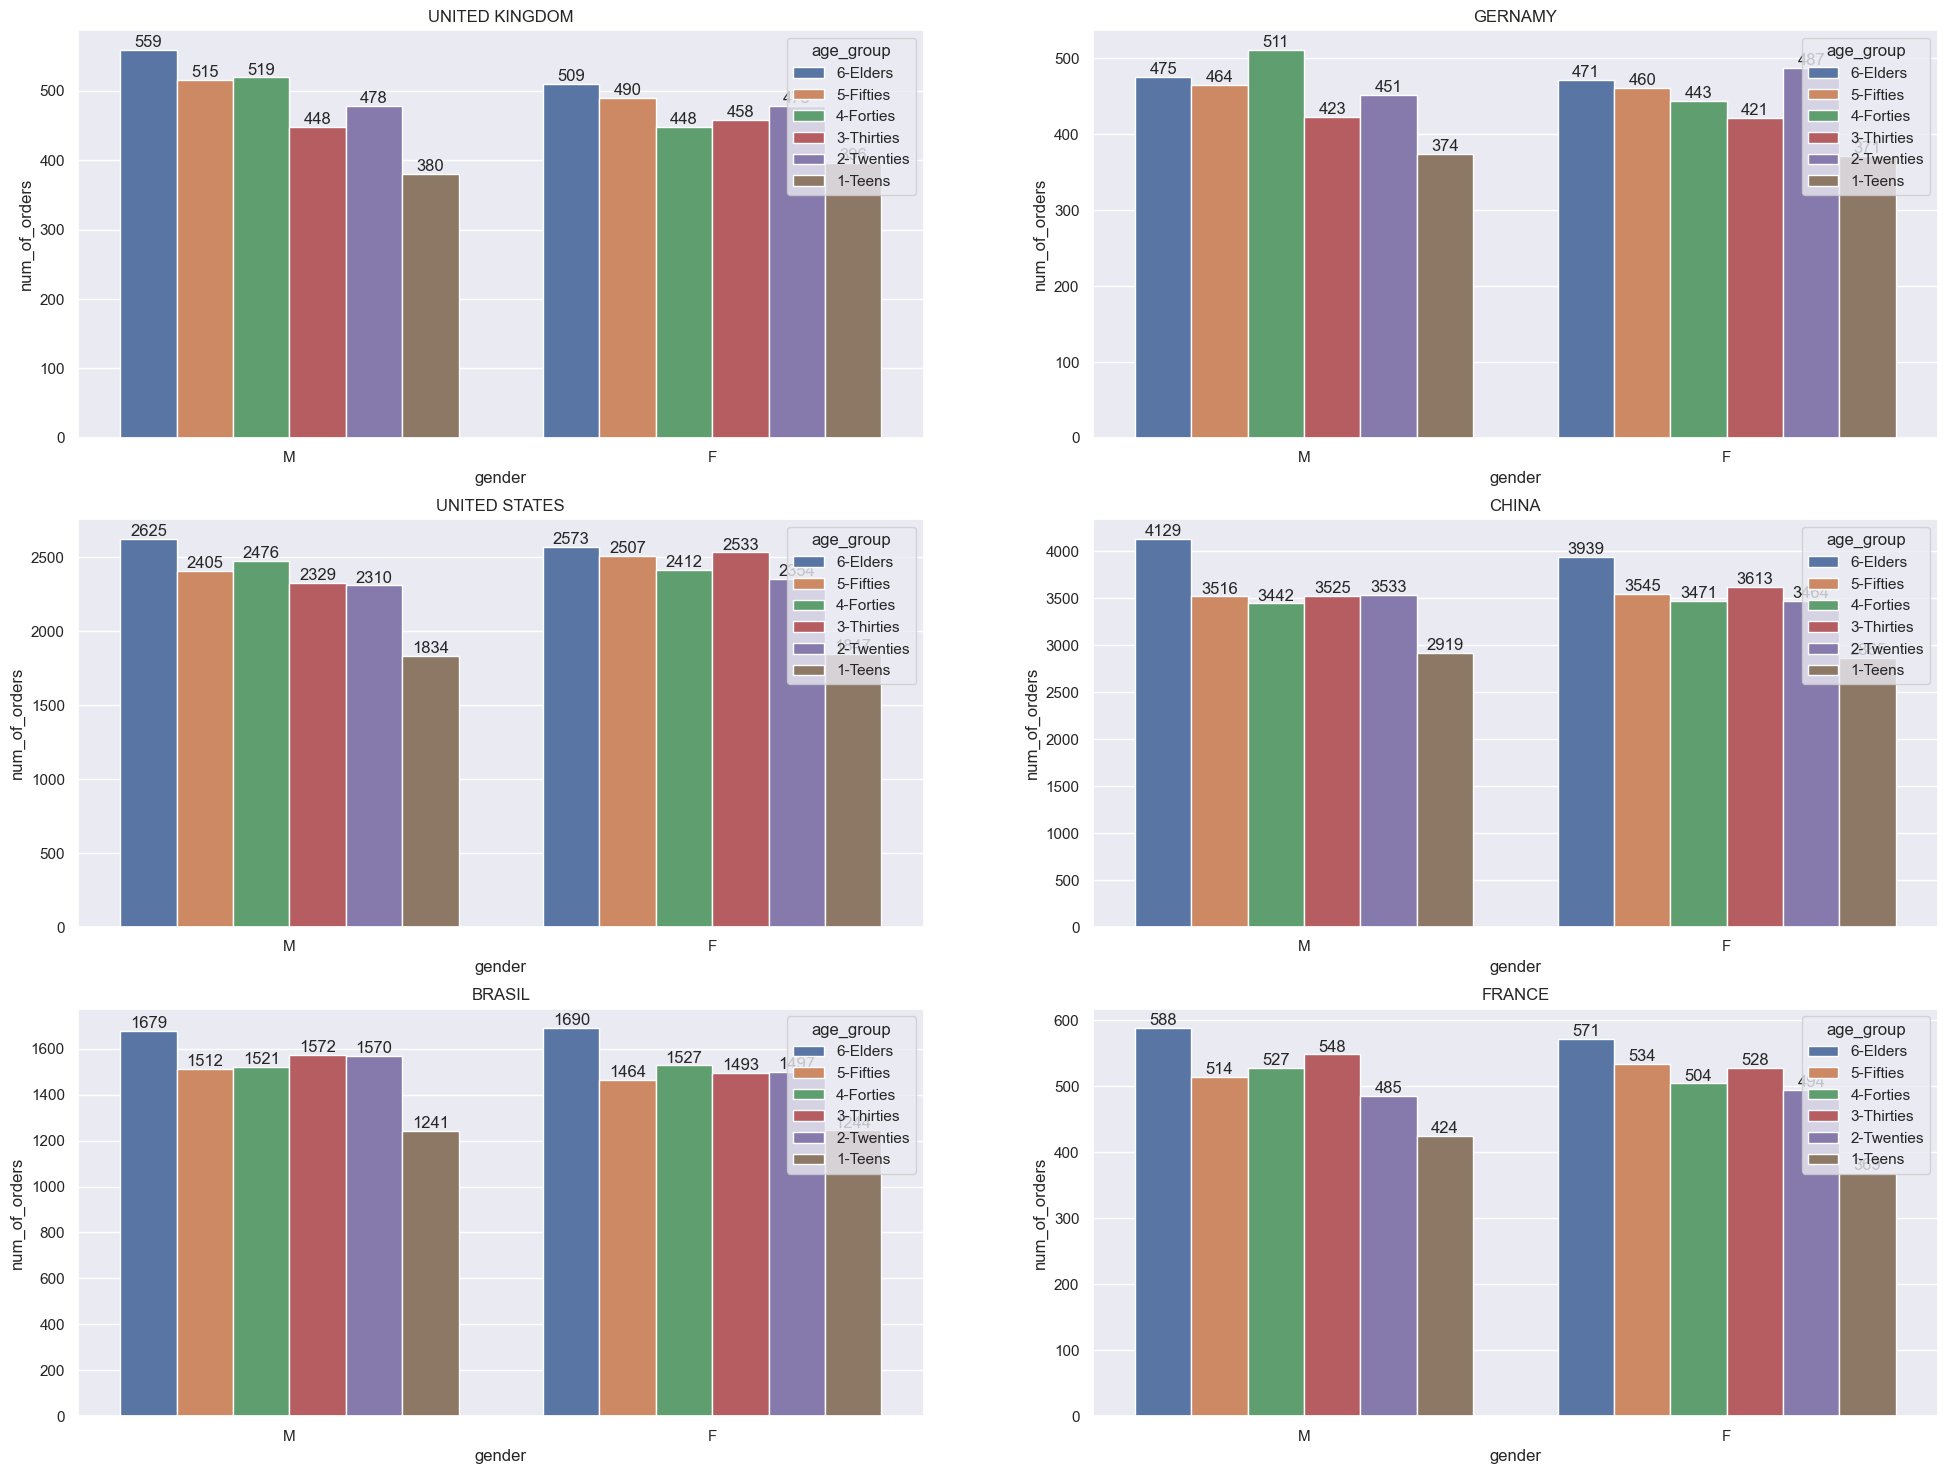

In [345]:
count_6 = 0

orders_users_clean = pd.merge(orders_users, users, on='user_id', how='inner')
orders_users_clean = orders_users_clean[["order_id","user_id","order_created_at","num_of_item","gender_x","state","city","country","costumer_time","user_created_at","age_group"]]
orders_users_clean["order_created_at"] = pd.to_datetime(orders_users_clean["order_created_at"])
orders_users_clean["order_created_at"] = pd.to_datetime(orders_users_clean["order_created_at"].dt.strftime('%m/%d/%Y'))
orders_users_clean.rename(columns={"gender_x": "gender"}, inplace=True)

sum_orders_products_by_user = orders_users_clean[["order_id","user_id","num_of_item","gender","country","costumer_time","user_created_at",
                                                    "age_group"]].groupby(["user_id"],as_index=False).agg({'order_id': 'count' ,'num_of_item': 'sum', 'gender': 'max', 
                                                    'country':'max', 'age_group': 'max', 'costumer_time': 'max', 'costumer_time': 'max'}).sort_values(["user_id"], ascending=False)
sum_orders_products_by_user.rename(columns={"order_id": "num_of_orders"}, inplace=True)

sum_orders_products_by_user_m = sum_orders_products_by_user[sum_orders_products_by_user["gender"]=="M"][["country","num_of_orders"]].groupby(["country"],as_index=False).agg({'num_of_orders': 'sum'}).sort_values(["country"], ascending=False)
sum_orders_products_by_user_f = sum_orders_products_by_user[sum_orders_products_by_user["gender"]=="F"][["country","num_of_orders"]].groupby(["country"],as_index=False).agg({'num_of_orders': 'sum'}).sort_values(["country"], ascending=False)

#Plot the total number of orders for the country with more than 4% Total Population (Male)

count_6+=1
fig = plt.figure(count_6)
fig.set(figheight=5,figwidth=12)
x = sns.barplot(sum_orders_products_by_user_m[sum_orders_products_by_user_m["num_of_orders"]>=sum_orders_products_by_user_m["num_of_orders"].sum()*0.04], x="country", y="num_of_orders")
x.set_title("Number of orders by country - TOP 8 (Male")
for i in x.containers:
    x.bar_label(i,)

count_6+=1
fig = plt.figure(count_6)
fig.set(figheight=5,figwidth=12)
x = sns.barplot(sum_orders_products_by_user_f[sum_orders_products_by_user_f["num_of_orders"]>=sum_orders_products_by_user_f["num_of_orders"].sum()*0.04], x="country", y="num_of_orders")
x.set_title("Number of orders by country - TOP 8 (Female)")

for i in x.containers:
    x.bar_label(i,)

# Number of orders by gender and age group
sum_orders_products_by_gender_and_orders = sum_orders_products_by_user[["gender","age_group","num_of_orders"]].groupby(["gender","age_group"],as_index=False).agg({'num_of_orders': 'sum'}).sort_values(["gender","age_group"], ascending=False)

count_6+=1
fig = plt.figure(count_6)
fig.set(figheight=5,figwidth=12)
x = sns.barplot(sum_orders_products_by_gender_and_orders, x="gender", y="num_of_orders", hue="age_group")
x.set_title("Number of orders by gender and age group")

for i in x.containers:
    x.bar_label(i,)

#set seaborn plotting aesthetics as default
sns.set()

#define plotting region (1 row, 2 columns)
fig, axes = plt.subplots(3, 2)
fig.set(figheight=18,figwidth=24)

sum_orders_products_by_genders_and_age_group = sum_orders_products_by_user[["gender","age_group","num_of_orders","country"]].groupby(["country","gender","age_group"],as_index=False).agg({'num_of_orders': 'sum'}).sort_values(["gender","age_group"], ascending=False)

#create boxplot in each subplot
x1 = sns.barplot(sum_orders_products_by_genders_and_age_group[sum_orders_products_by_genders_and_age_group.country=="United Kingdom"], x="gender", y="num_of_orders", hue="age_group", ax=axes[0,0], width=0.8)
x1.set_title("UNITED KINGDOM")
for i in x1.containers:
    x1.bar_label(i,)
x2 = sns.barplot(sum_orders_products_by_genders_and_age_group[sum_orders_products_by_genders_and_age_group.country=="Germany"], x="gender", y="num_of_orders", hue="age_group", ax=axes[0,1], width=0.8)
x2.set_title("GERNAMY")
for i in x2.containers:
    x2.bar_label(i,)
x3 = sns.barplot(sum_orders_products_by_genders_and_age_group[sum_orders_products_by_genders_and_age_group.country=="United States"], x="gender", y="num_of_orders", hue="age_group", ax=axes[1,0], width=0.8)
x3.set_title("UNITED STATES")
for i in x3.containers:
    x3.bar_label(i,)
x4 = sns.barplot(sum_orders_products_by_genders_and_age_group[sum_orders_products_by_genders_and_age_group.country=="China"], x="gender", y="num_of_orders", hue="age_group", ax=axes[1,1], width=0.8)
x4.set_title("CHINA")
for i in x4.containers:
    x4.bar_label(i,)
x5 = sns.barplot(sum_orders_products_by_genders_and_age_group[sum_orders_products_by_genders_and_age_group.country=="Brasil"], x="gender", y="num_of_orders", hue="age_group", ax=axes[2,0], width=0.8)
x5.set_title("BRASIL")
for i in x5.containers:
    x5.bar_label(i,)
x6 = sns.barplot(sum_orders_products_by_genders_and_age_group[sum_orders_products_by_genders_and_age_group.country=="France"], x="gender", y="num_of_orders", hue="age_group", ax=axes[2,1], width=0.8)
x6.set_title("FRANCE")
for i in x6.containers:
    x6.bar_label(i,)
plt.show()



# 7. How the products are distributed among gender and age groups?

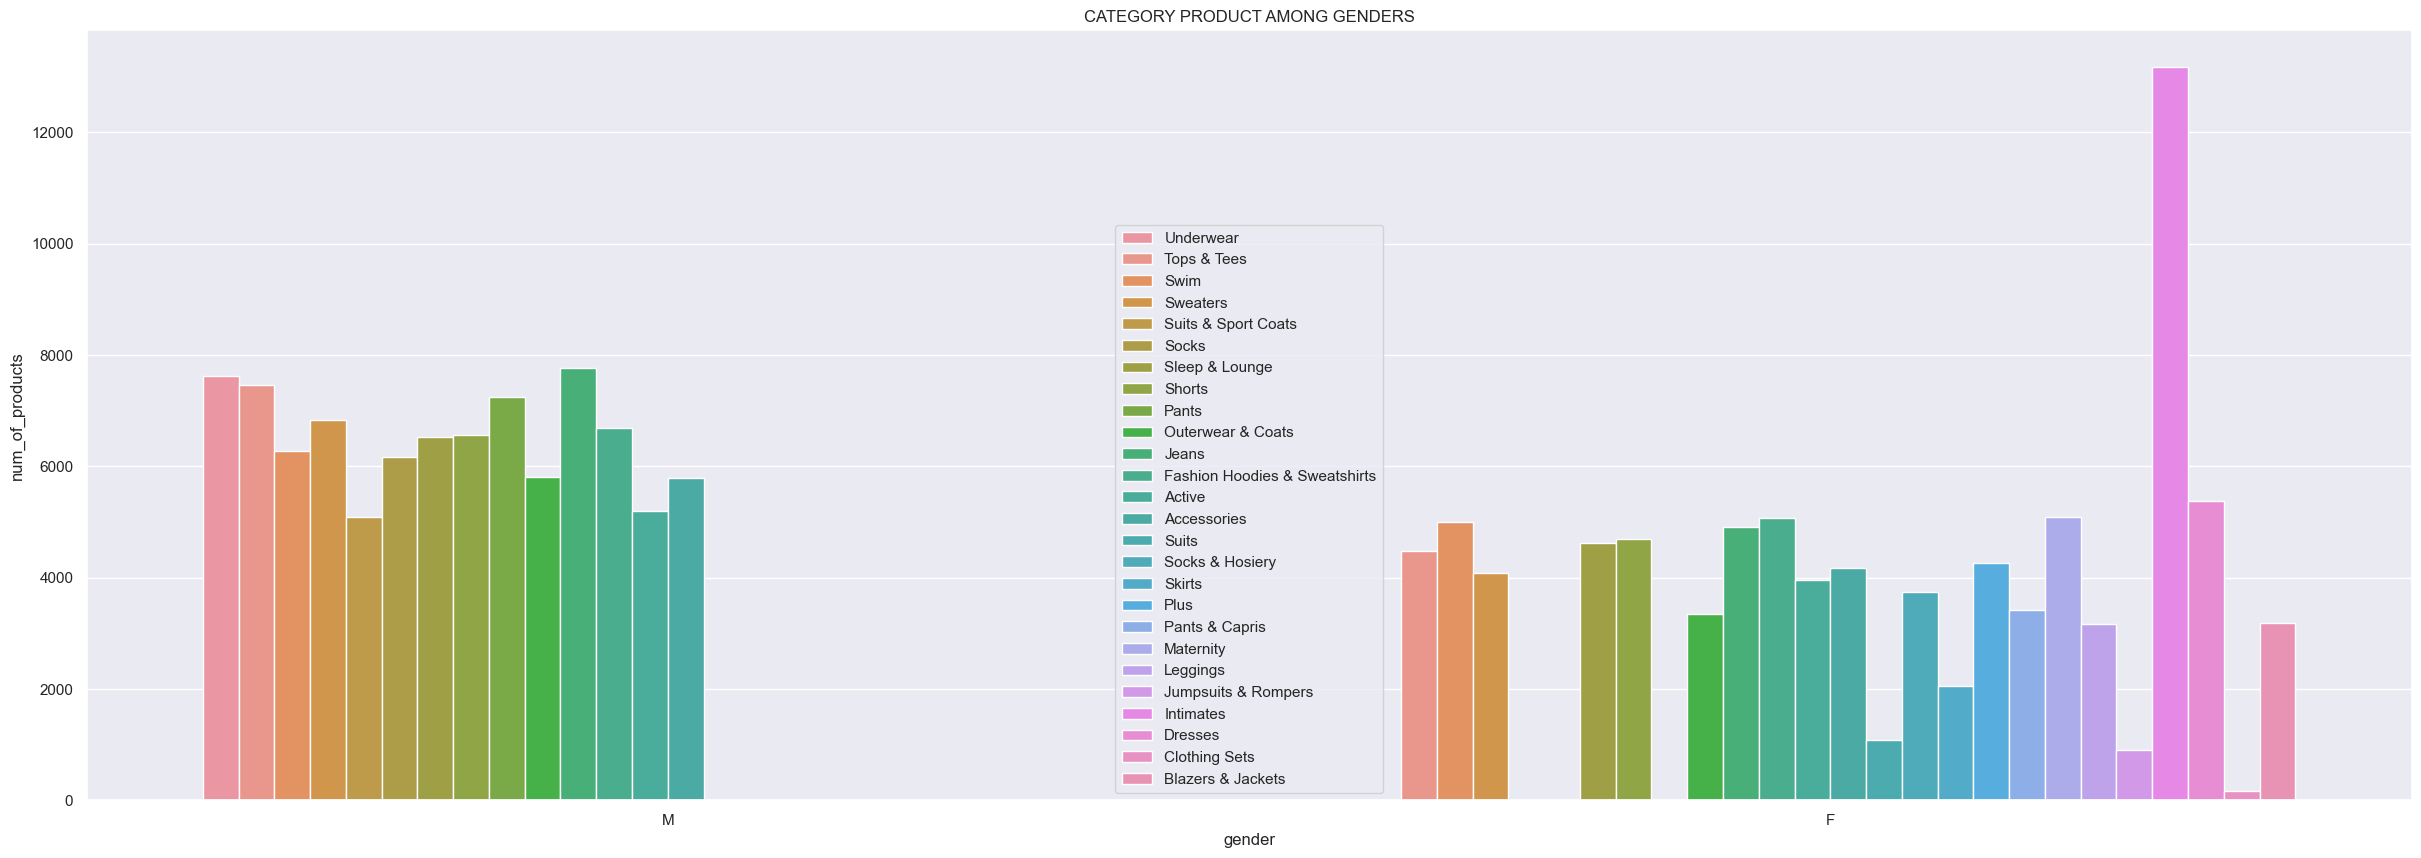

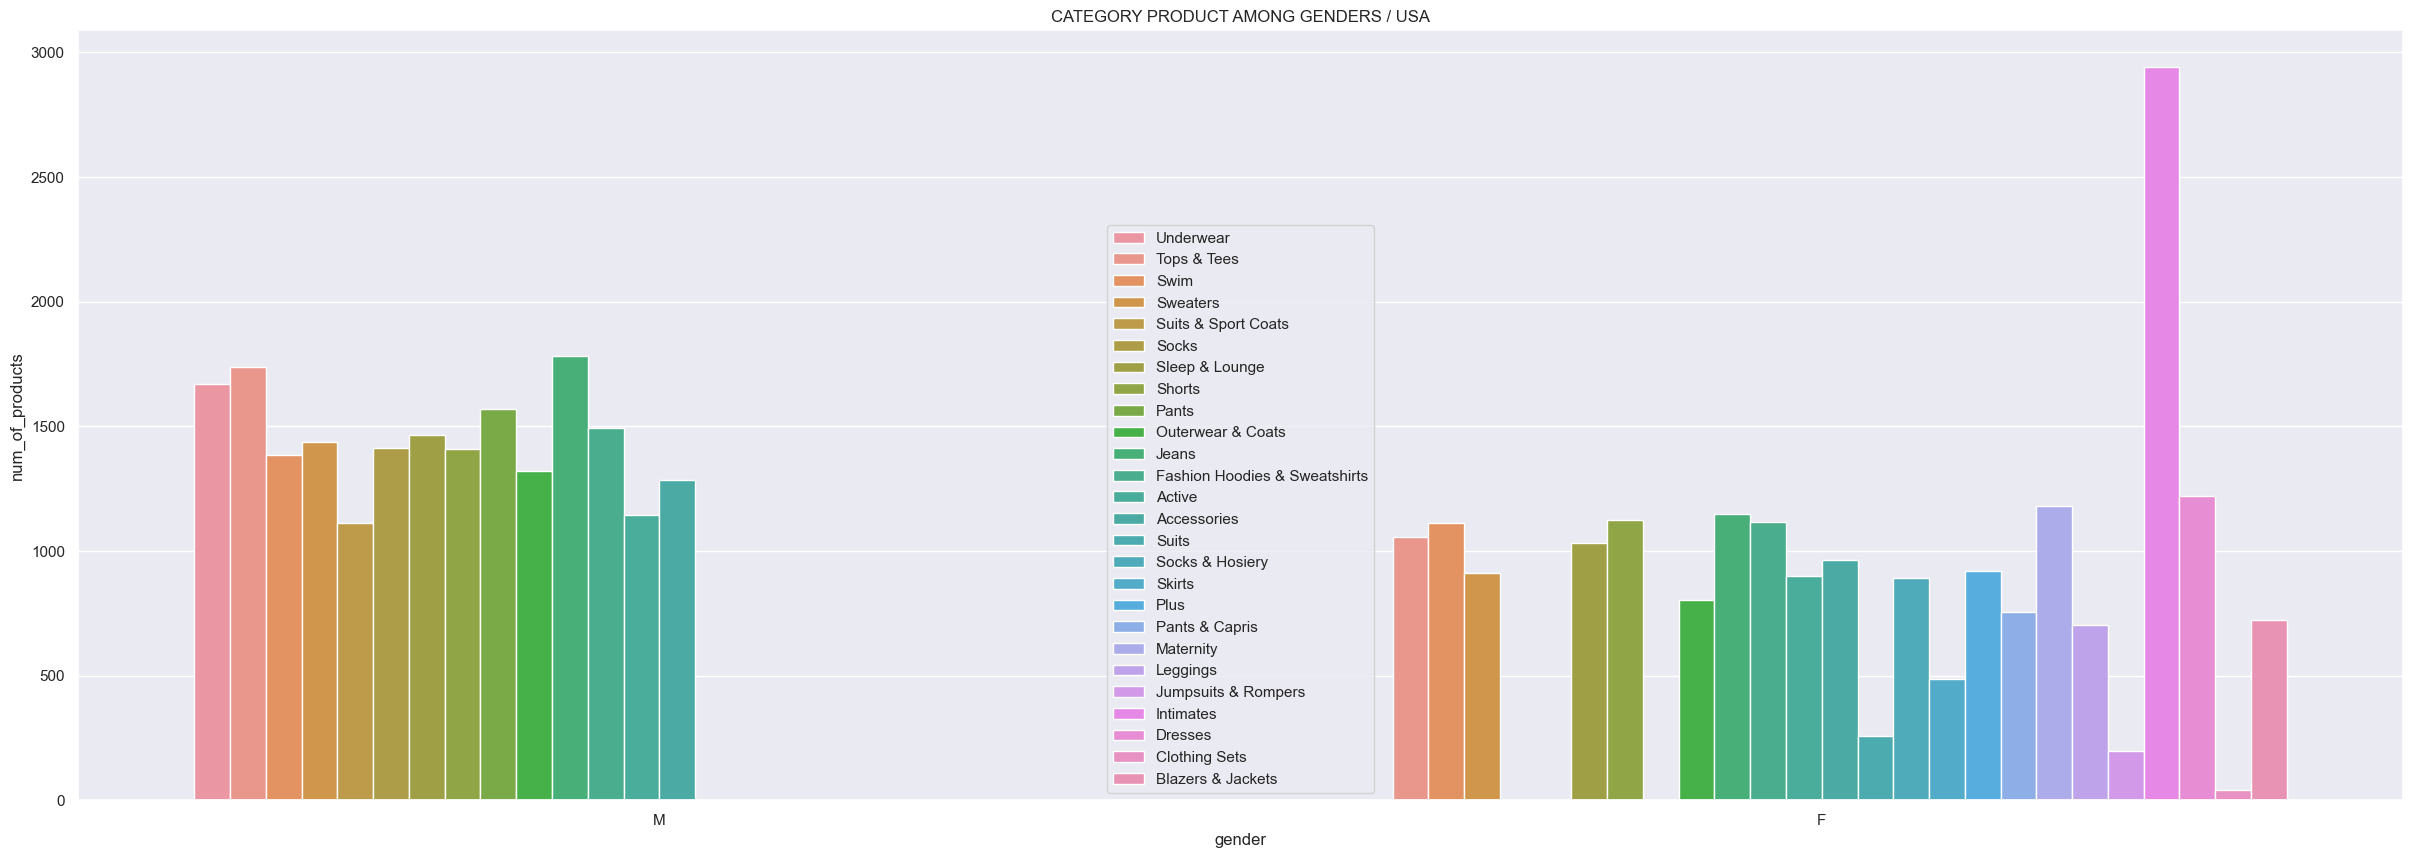

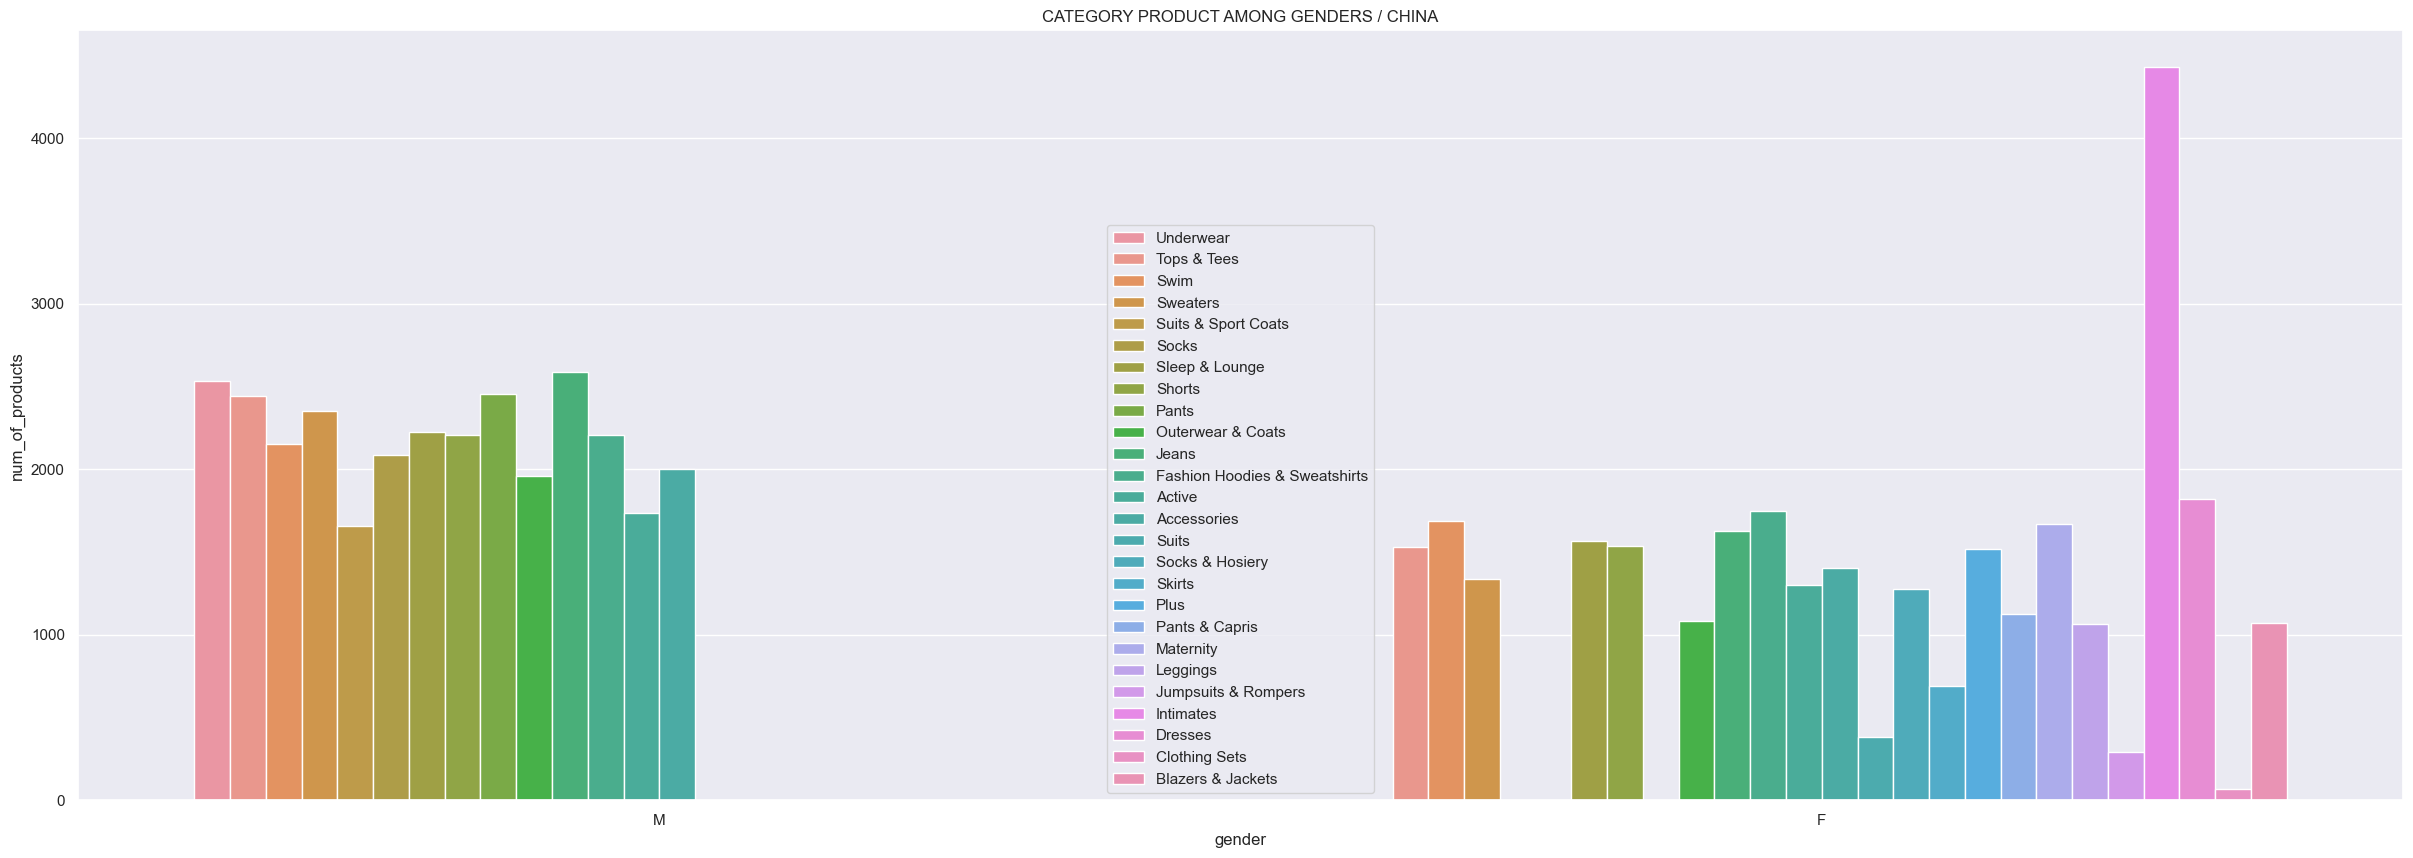

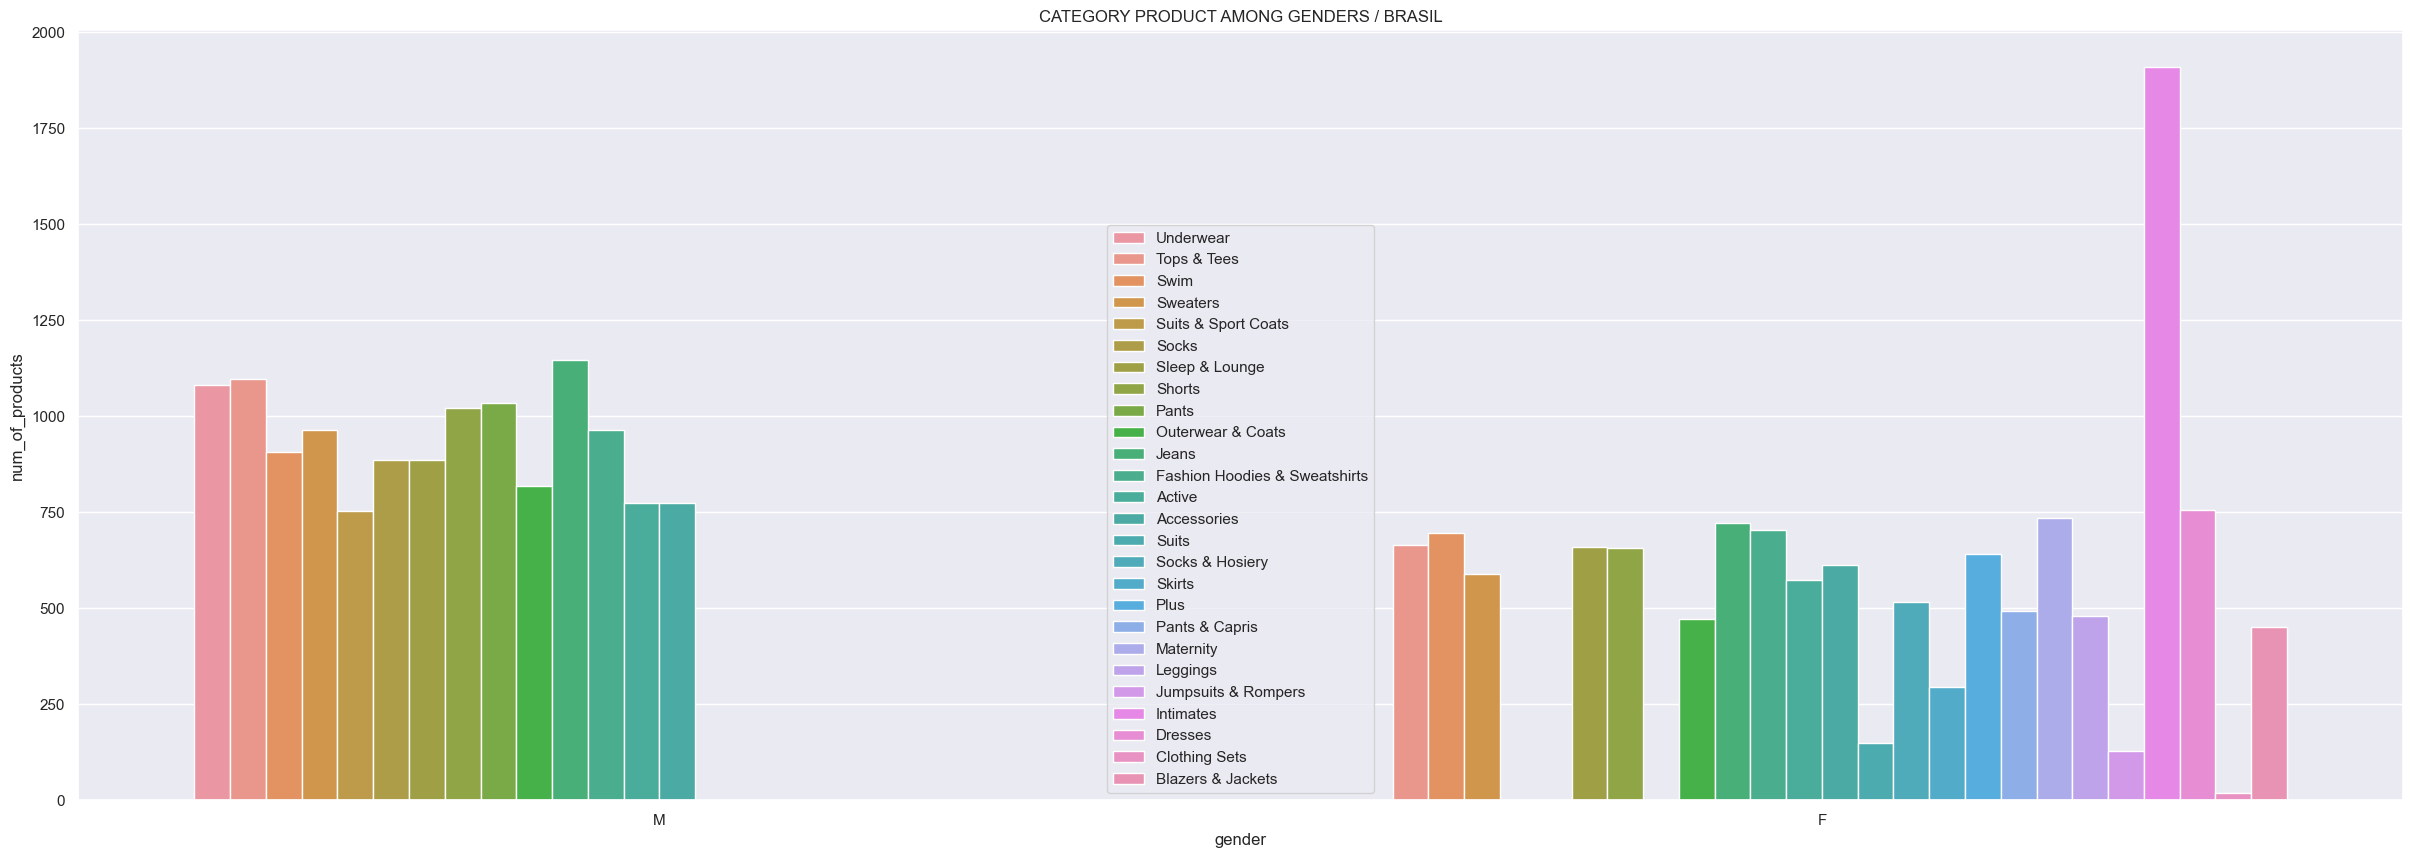

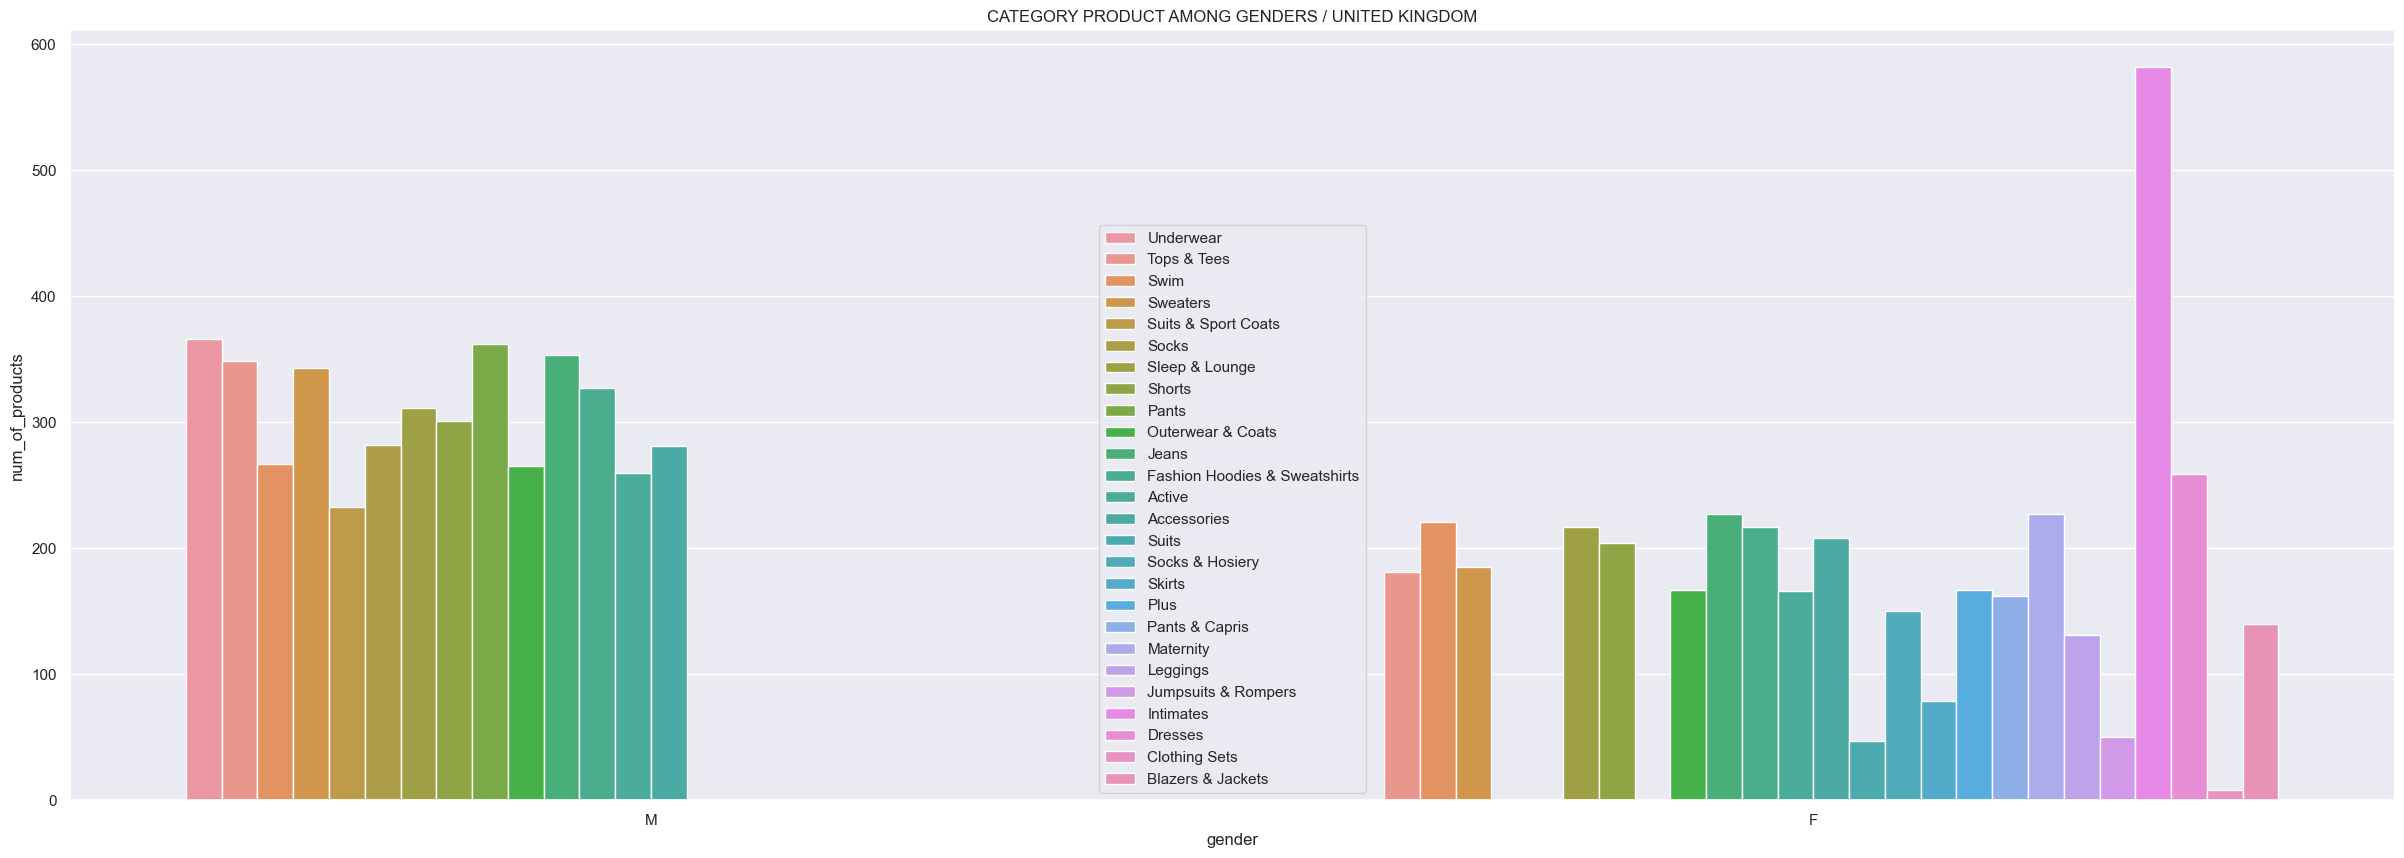

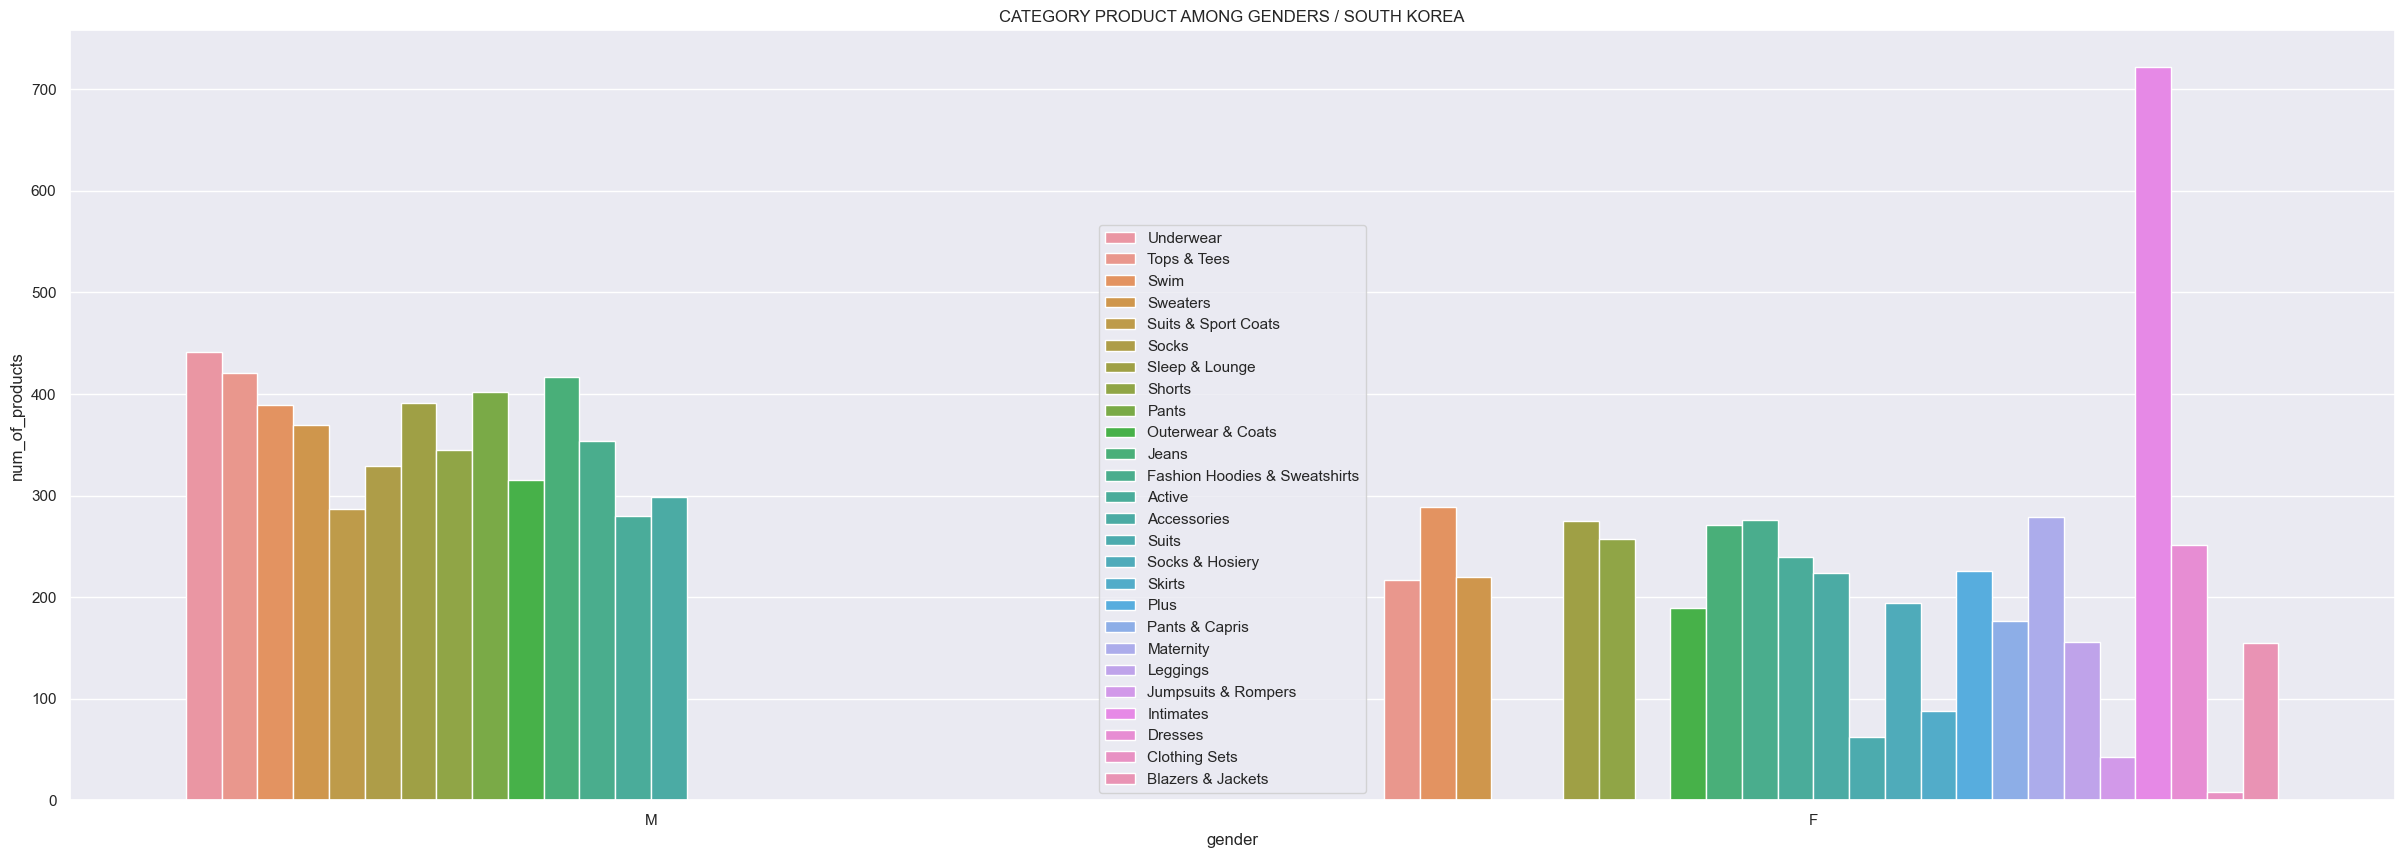

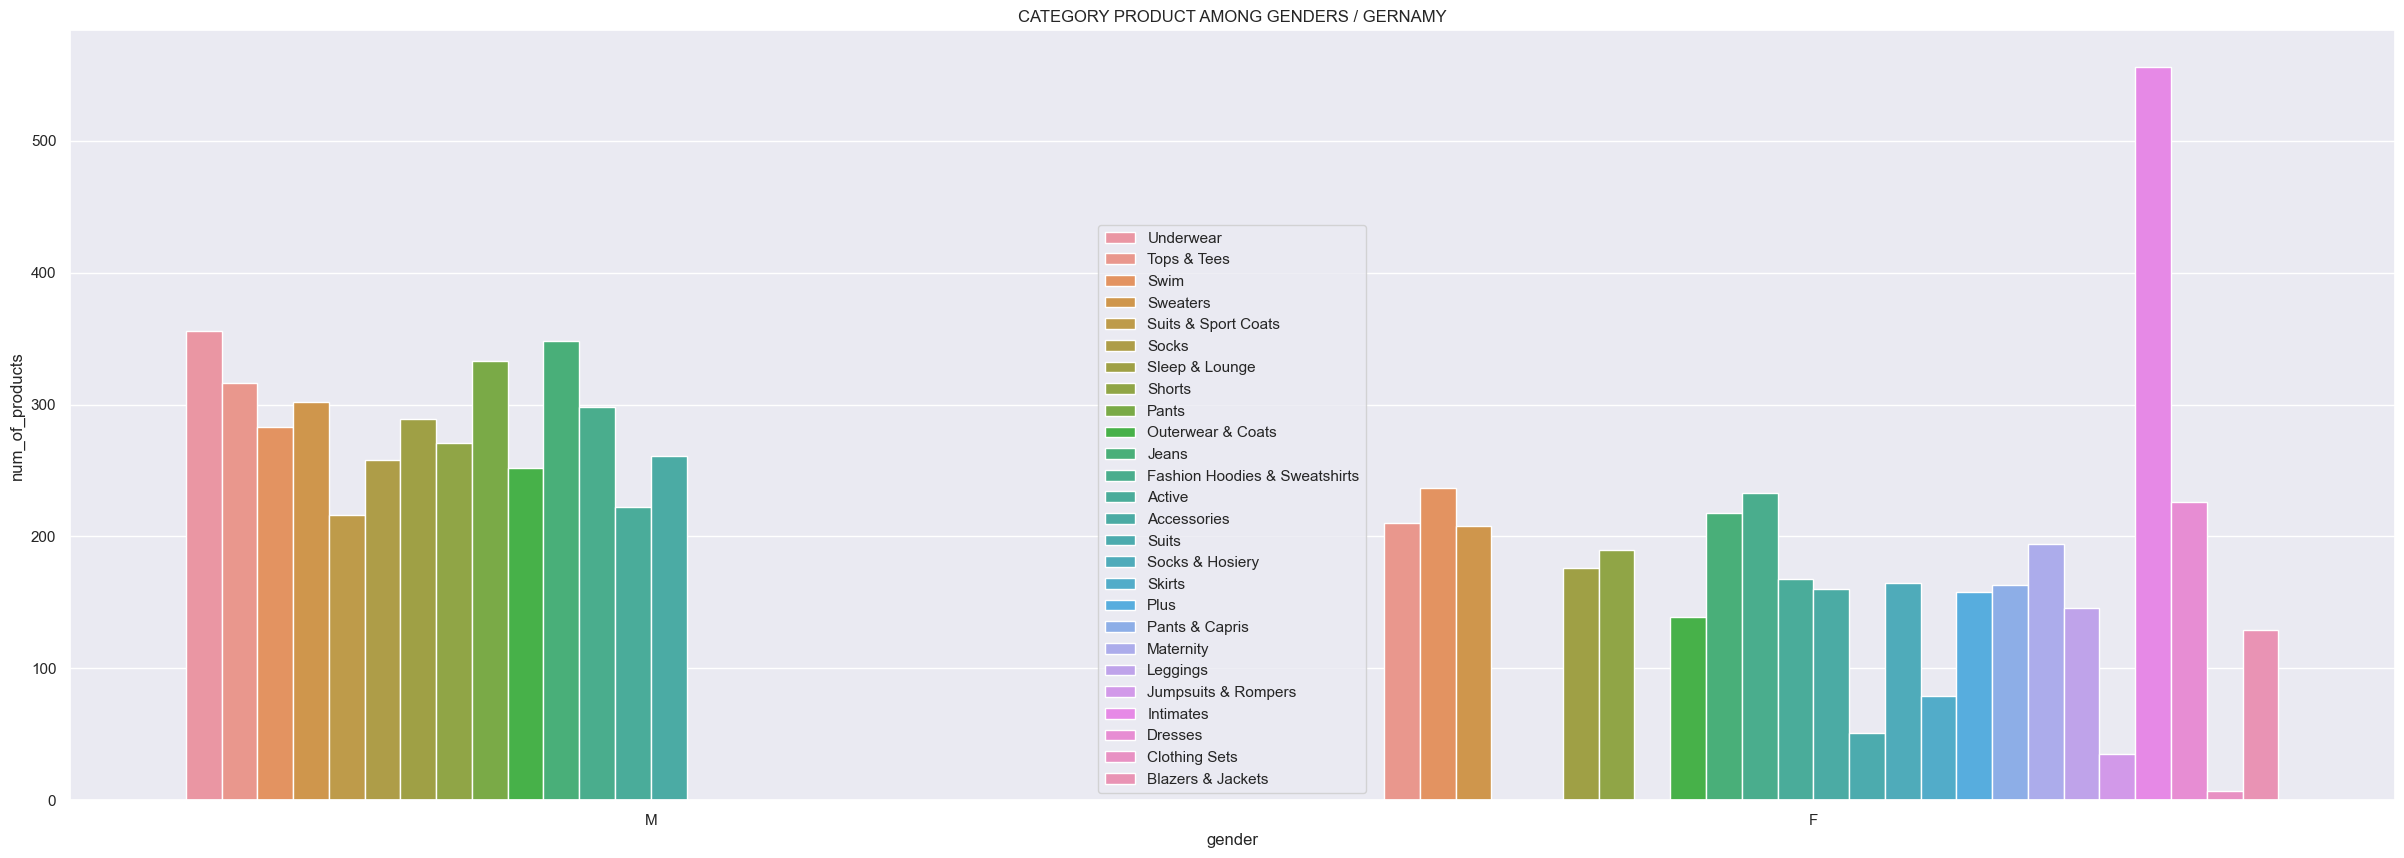

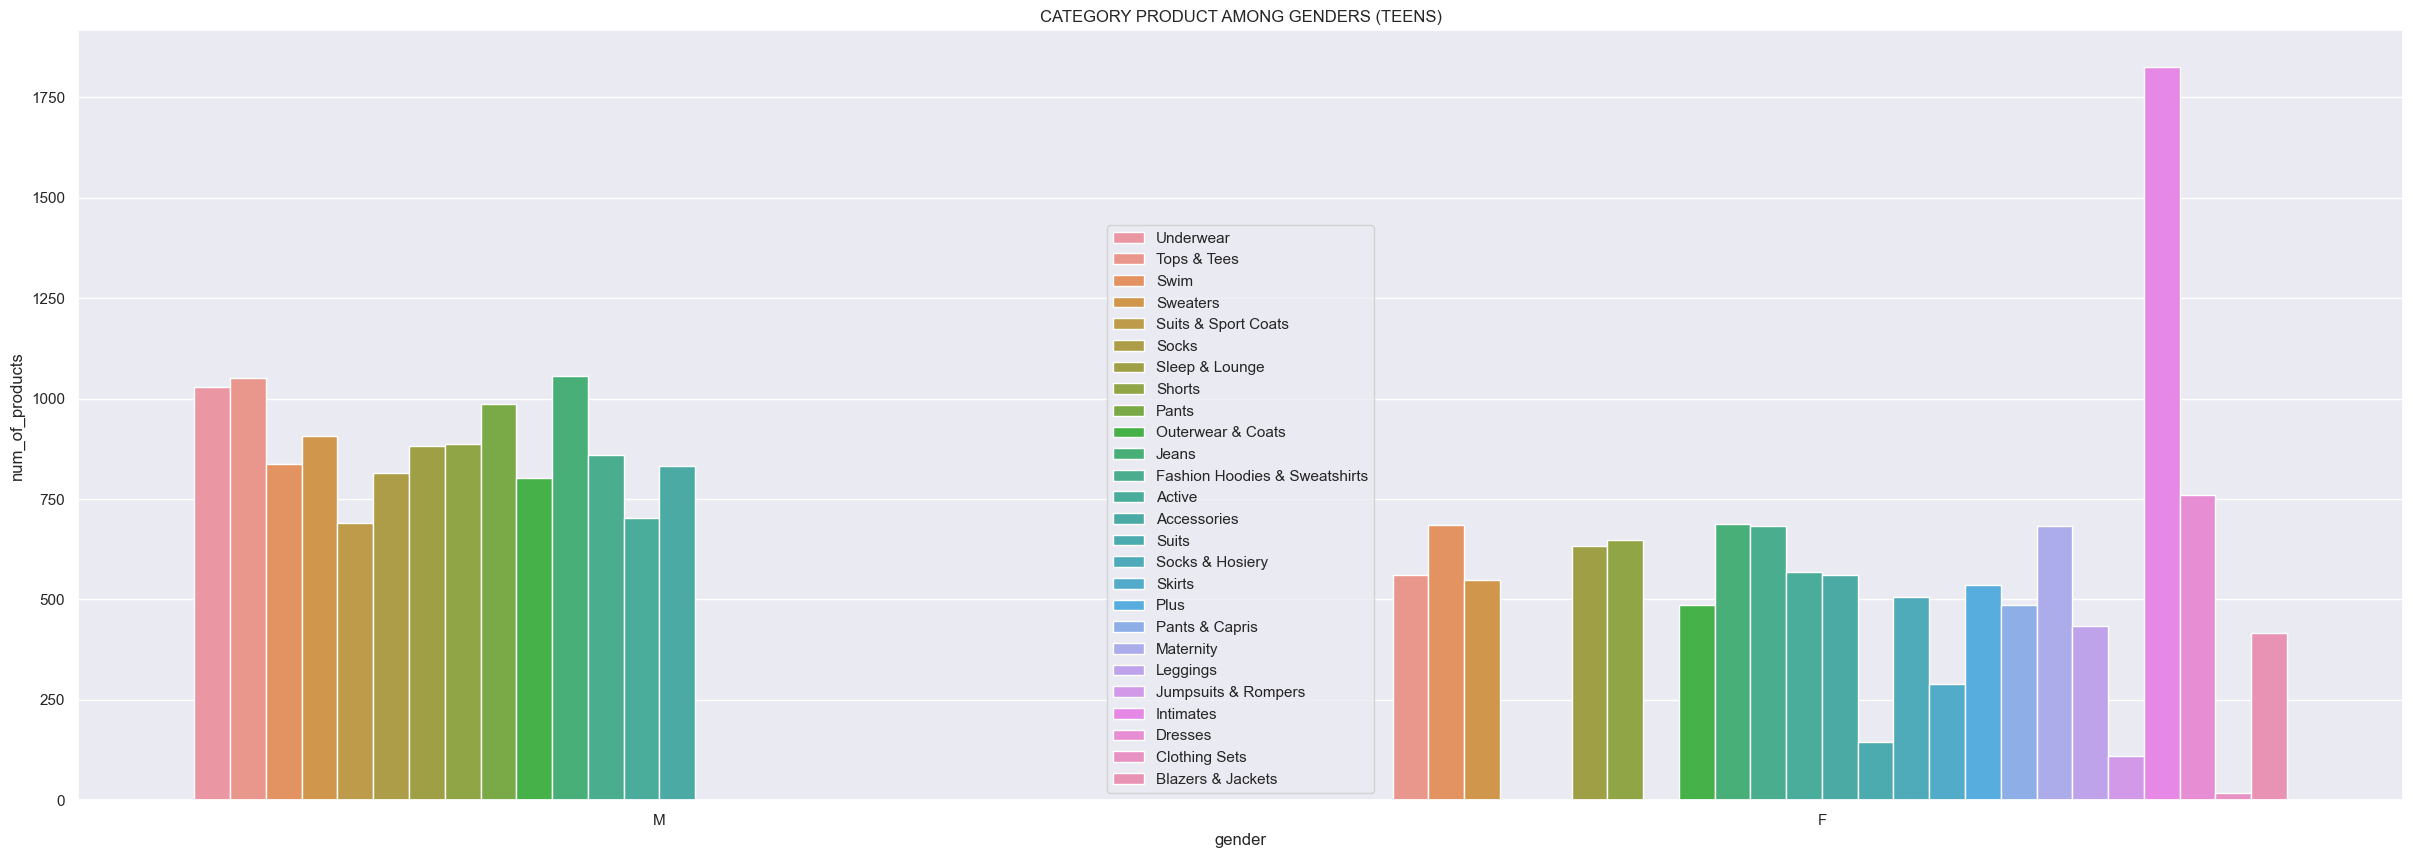

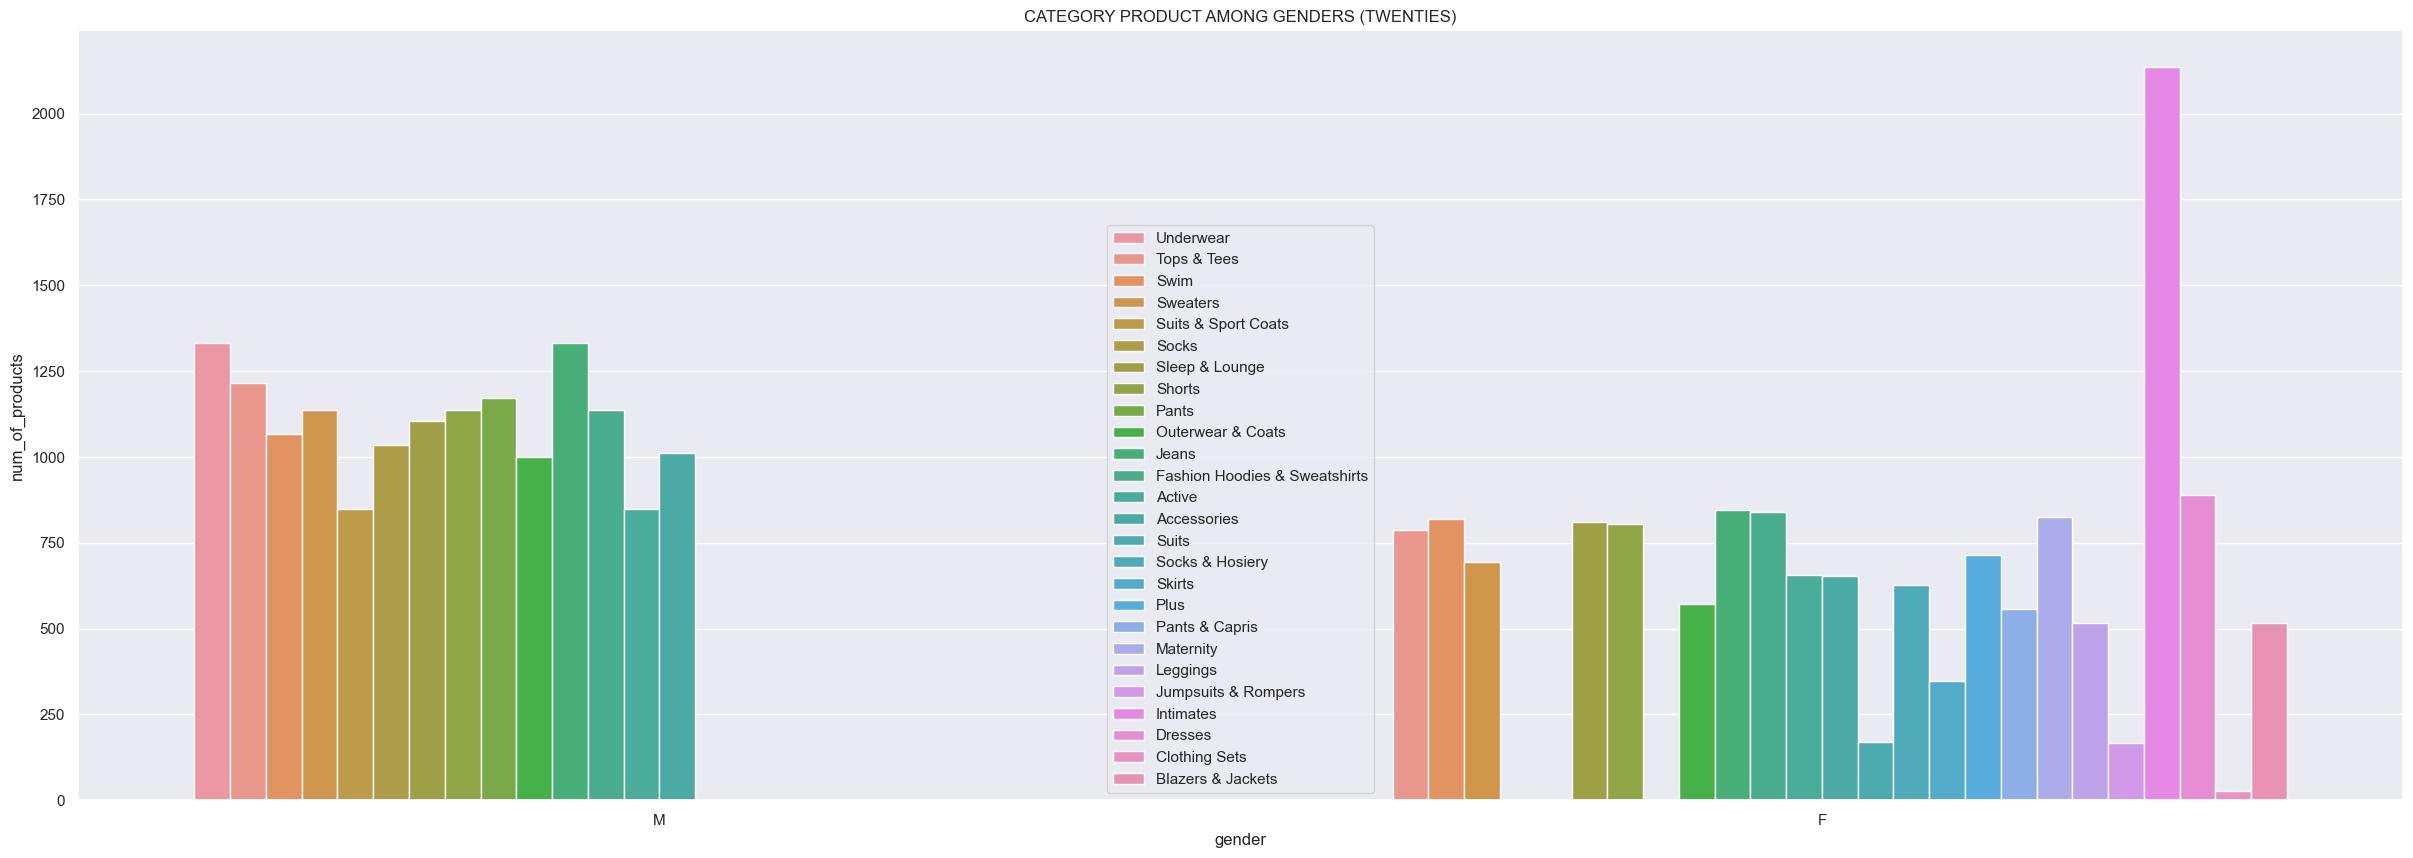

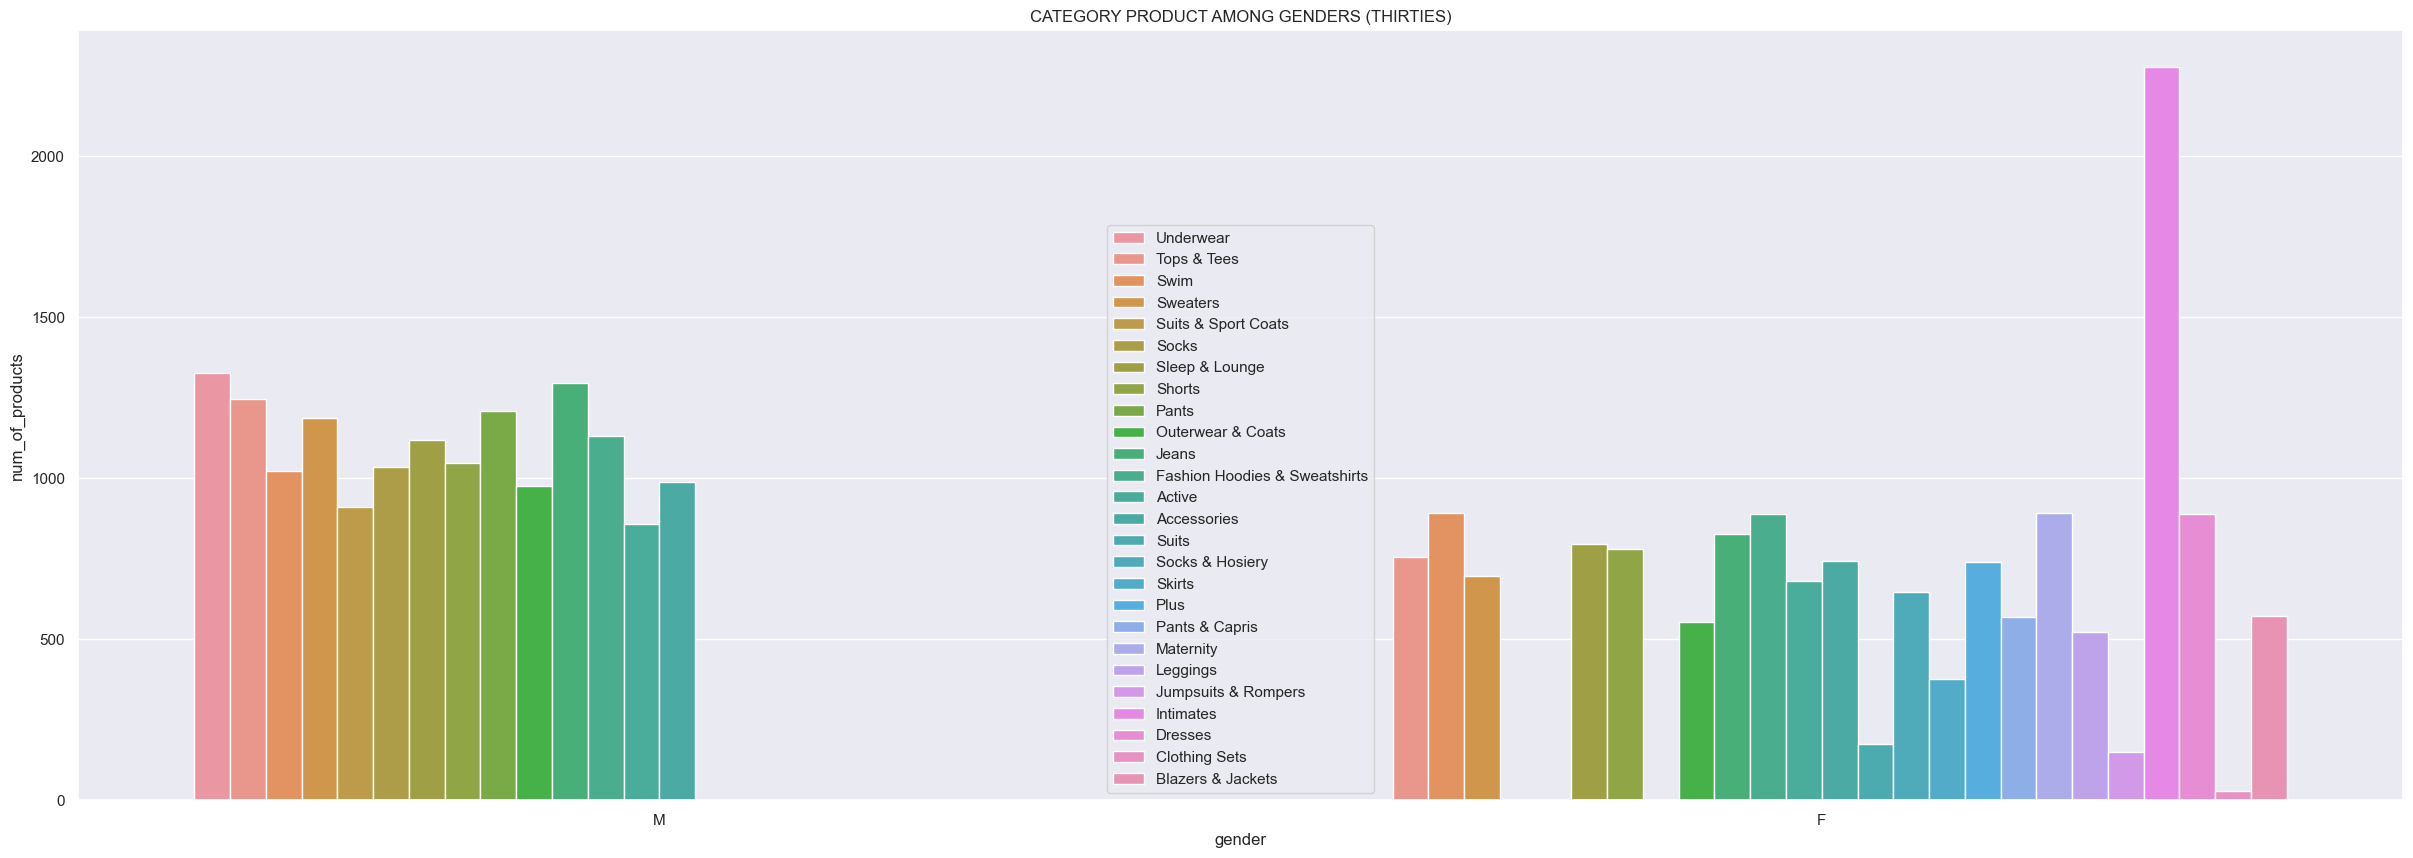

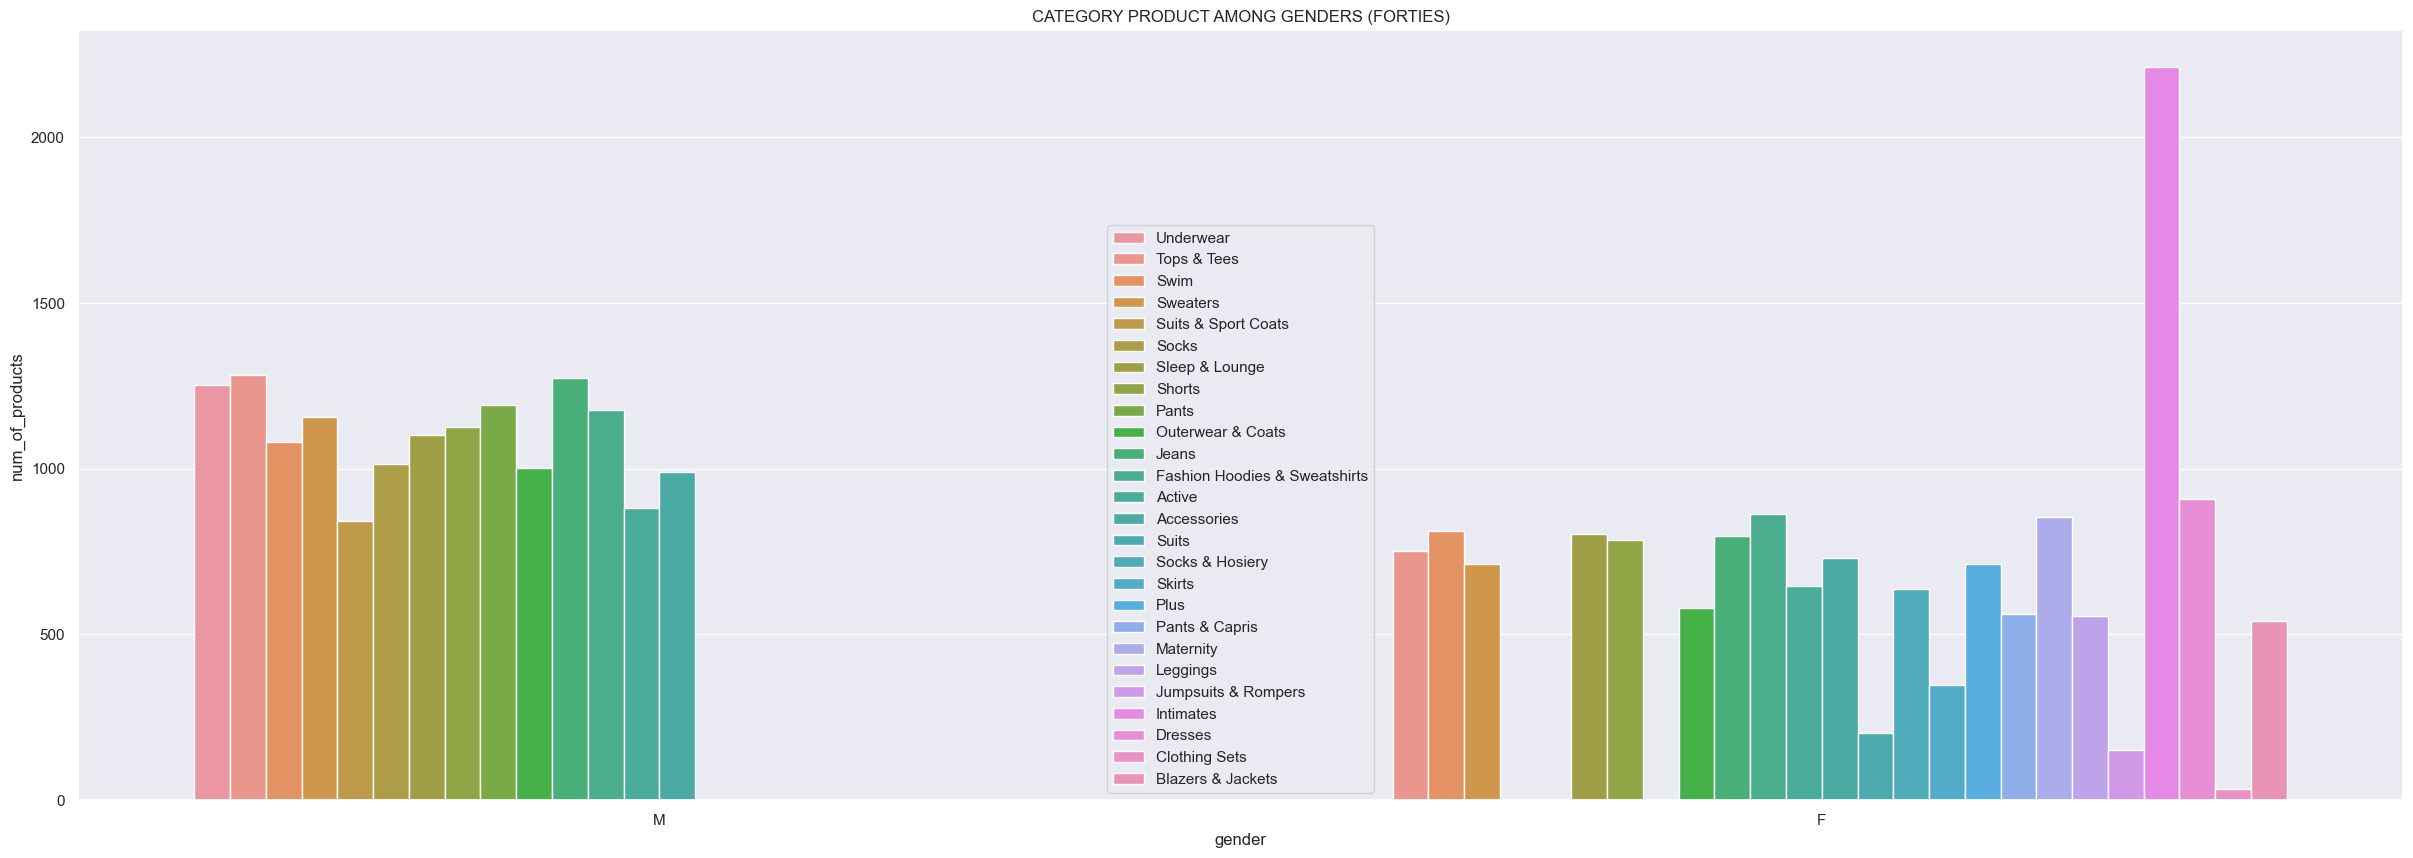

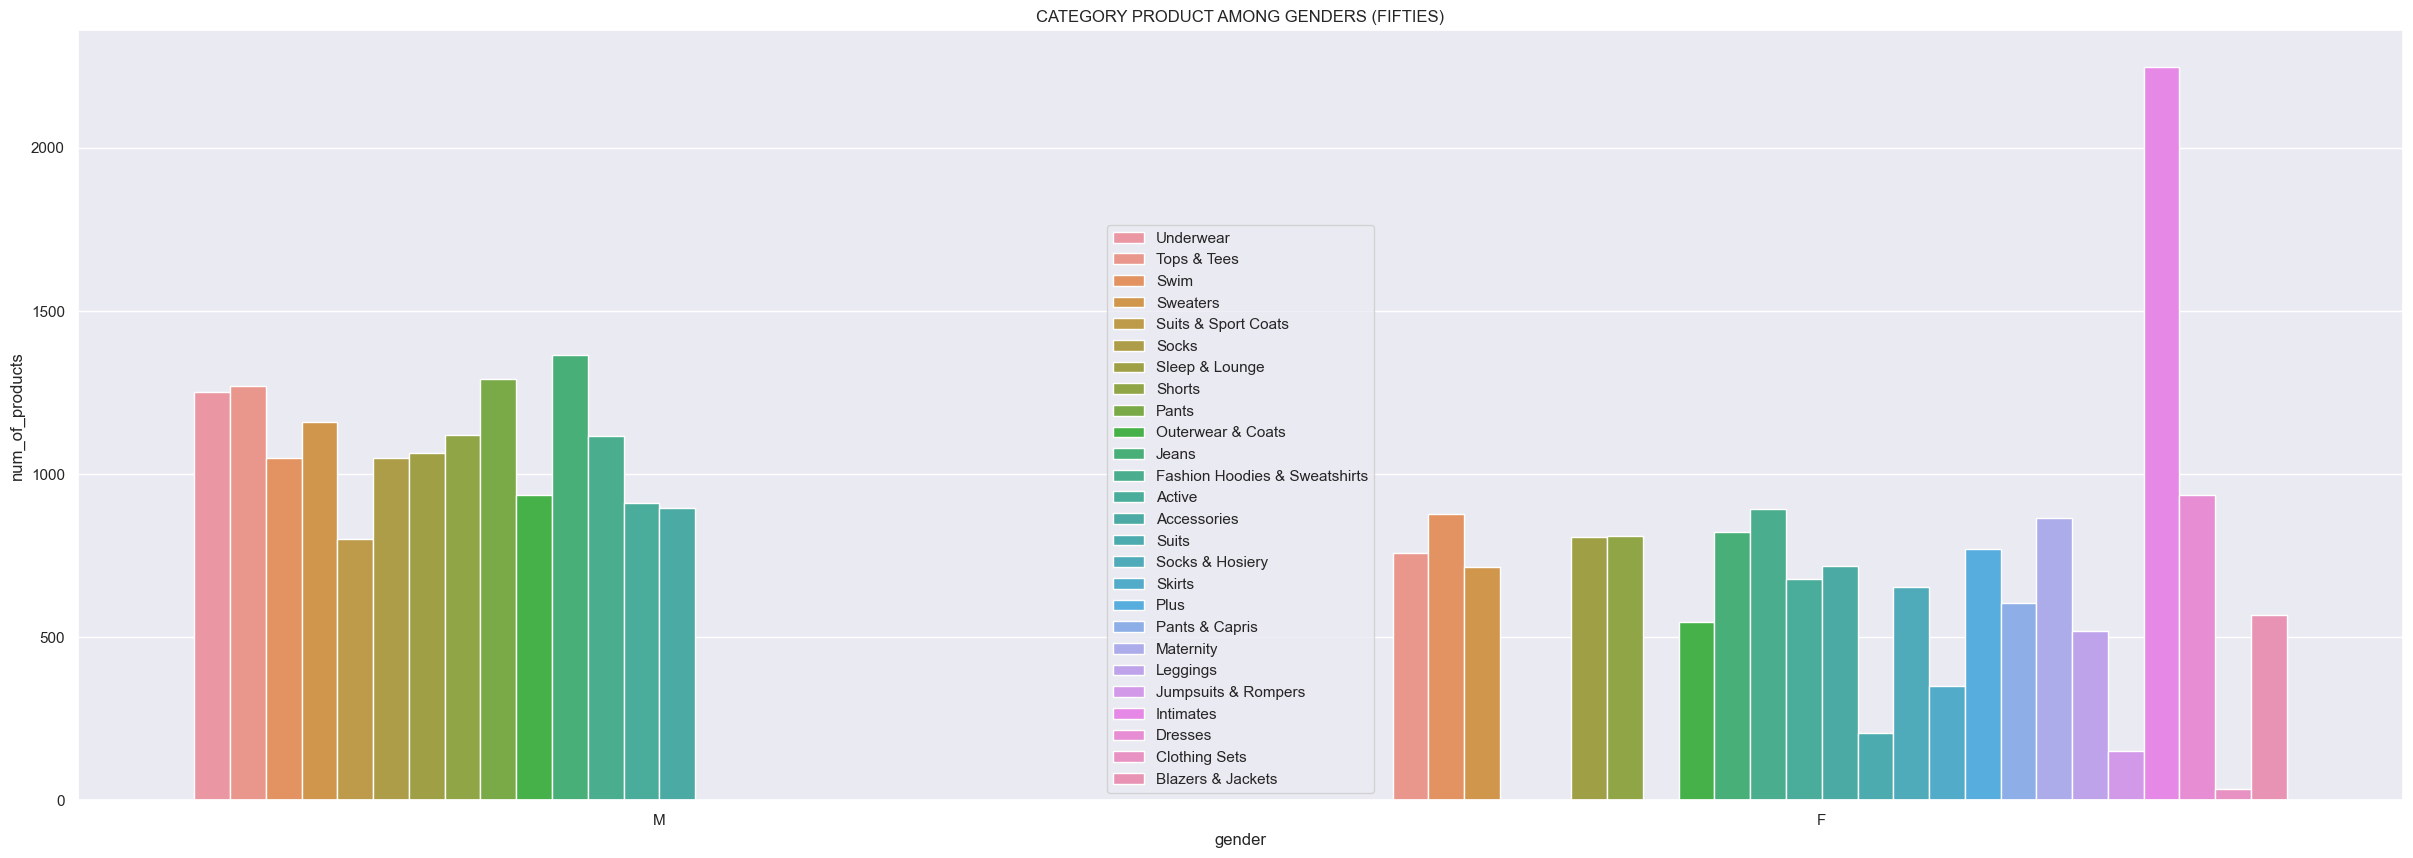

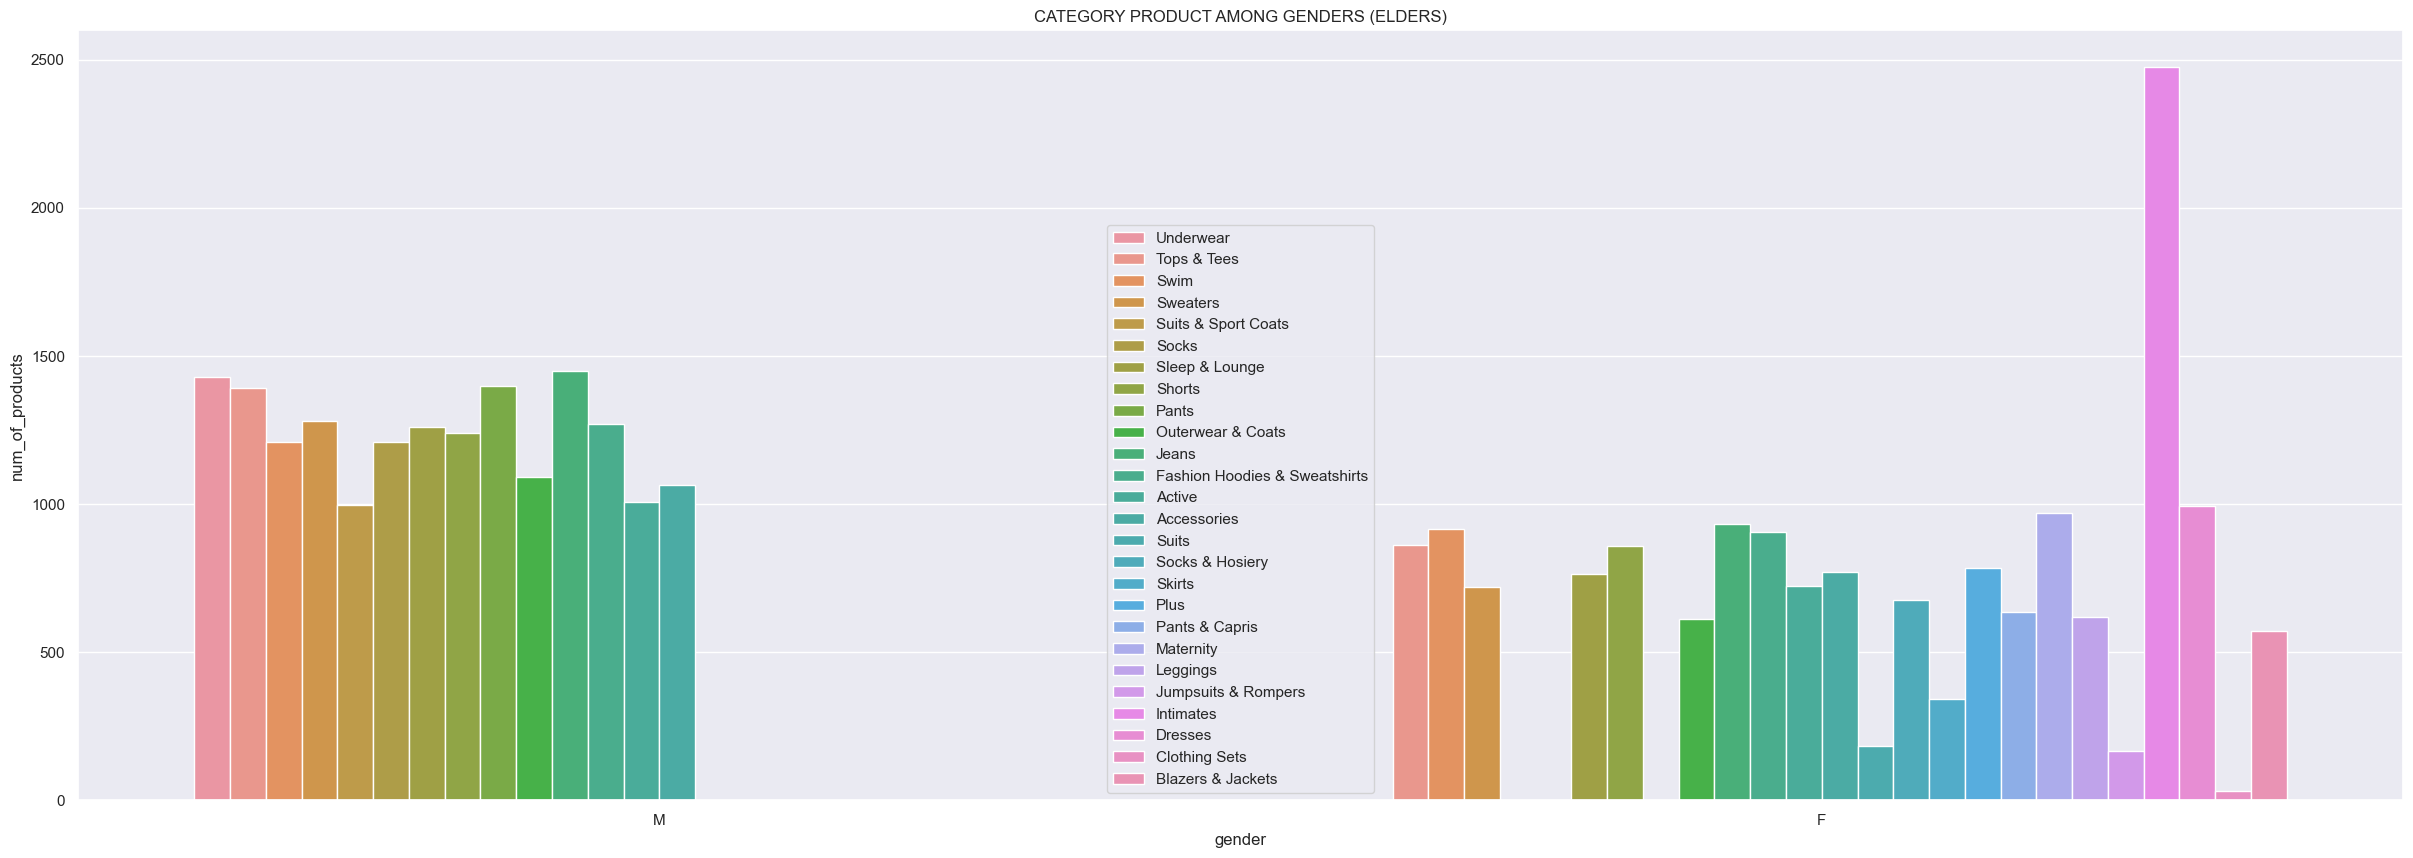

In [347]:
count_7 = 0

products_among_genders = products_users_clean[["gender","category","prd_order_id"]].groupby(["gender","category"],as_index=False).agg({'prd_order_id': 'count'}).sort_values(["gender","category"], ascending=False)
products_among_genders.rename(columns={"prd_order_id": "num_of_products"}, inplace=True)

products_among_genders_us = products_users_clean[products_users_clean.country=="United States"][["gender","category","prd_order_id"]].groupby(["gender","category"],as_index=False).agg({'prd_order_id': 'count'}).sort_values(["gender","category"], ascending=False)
products_among_genders_ch = products_users_clean[products_users_clean.country=="China"][["gender","category","prd_order_id"]].groupby(["gender","category"],as_index=False).agg({'prd_order_id': 'count'}).sort_values(["gender","category"], ascending=False)
products_among_genders_br = products_users_clean[products_users_clean.country=="Brasil"][["gender","category","prd_order_id"]].groupby(["gender","category"],as_index=False).agg({'prd_order_id': 'count'}).sort_values(["gender","category"], ascending=False)
products_among_genders_uk = products_users_clean[products_users_clean.country=="United Kingdom"][["gender","category","prd_order_id"]].groupby(["gender","category"],as_index=False).agg({'prd_order_id': 'count'}).sort_values(["gender","category"], ascending=False)
products_among_genders_sk = products_users_clean[products_users_clean.country=="South Korea"][["gender","category","prd_order_id"]].groupby(["gender","category"],as_index=False).agg({'prd_order_id': 'count'}).sort_values(["gender","category"], ascending=False)
products_among_genders_ge = products_users_clean[products_users_clean.country=="Germany"][["gender","category","prd_order_id"]].groupby(["gender","category"],as_index=False).agg({'prd_order_id': 'count'}).sort_values(["gender","category"], ascending=False)
products_among_genders_us.rename(columns={"prd_order_id": "num_of_products"}, inplace=True)
products_among_genders_ch.rename(columns={"prd_order_id": "num_of_products"}, inplace=True)
products_among_genders_br.rename(columns={"prd_order_id": "num_of_products"}, inplace=True)
products_among_genders_uk.rename(columns={"prd_order_id": "num_of_products"}, inplace=True)
products_among_genders_sk.rename(columns={"prd_order_id": "num_of_products"}, inplace=True)
products_among_genders_ge.rename(columns={"prd_order_id": "num_of_products"}, inplace=True)

count_7+=1
fig = plt.figure(count_7)
fig.set(figheight=10,figwidth=30)
x = sns.barplot(products_among_genders, x="gender", y="num_of_products", hue="category")
x.set_title("CATEGORY PRODUCT AMONG GENDERS")
plt.legend(loc='lower center')

# USA
count_7+=1
fig = plt.figure(count_7)
fig.set(figheight=10,figwidth=30)
x = sns.barplot(products_among_genders_us, x="gender", y="num_of_products", hue="category")
x.set_title("CATEGORY PRODUCT AMONG GENDERS / USA")
plt.legend(loc='lower center')

# CHINA
count_7+=1
fig = plt.figure(count_7)
fig.set(figheight=10,figwidth=30)
x = sns.barplot(products_among_genders_ch, x="gender", y="num_of_products", hue="category")
x.set_title("CATEGORY PRODUCT AMONG GENDERS / CHINA")
plt.legend(loc='lower center')

# BRASIL
count_7+=1
fig = plt.figure(count_7)
fig.set(figheight=10,figwidth=30)
x = sns.barplot(products_among_genders_br, x="gender", y="num_of_products", hue="category")
x.set_title("CATEGORY PRODUCT AMONG GENDERS / BRASIL")
plt.legend(loc='lower center')

# UNITED KINGDOM
count_7+=1
fig = plt.figure(count_7)
fig.set(figheight=10,figwidth=30)
x = sns.barplot(products_among_genders_uk, x="gender", y="num_of_products", hue="category")
x.set_title("CATEGORY PRODUCT AMONG GENDERS / UNITED KINGDOM")
plt.legend(loc='lower center')

# SOUTH KOREA
count_7+=1
fig = plt.figure(count_7)
fig.set(figheight=10,figwidth=30)
x = sns.barplot(products_among_genders_sk, x="gender", y="num_of_products", hue="category")
x.set_title("CATEGORY PRODUCT AMONG GENDERS / SOUTH KOREA")
plt.legend(loc='lower center')

# GERNAMY
count_7+=1
fig = plt.figure(count_7)
fig.set(figheight=10,figwidth=30)
x = sns.barplot(products_among_genders_ge, x="gender", y="num_of_products", hue="category")
x.set_title("CATEGORY PRODUCT AMONG GENDERS / GERNAMY")
plt.legend(loc='lower center')

# COMMENT: here we can easily see a pattern. Men trand to but products on the first 16 categories and women are the only who buy skirts, plus, pants, maternity leggings,... They clearly buy a lot of intimates

# TEENS
products_among_genders_teens = products_users_clean[products_users_clean.age_group=="1-Teens"][["gender","category","prd_order_id"]].groupby(["gender","category"],as_index=False).agg({'prd_order_id': 'count'}).sort_values(["gender","category"], ascending=False)
products_among_genders_teens.rename(columns={"prd_order_id": "num_of_products"}, inplace=True)

count_7+=1
fig = plt.figure(count_7)
fig.set(figheight=10,figwidth=30)
x = sns.barplot(products_among_genders_teens, x="gender", y="num_of_products", hue="category")
x.set_title("CATEGORY PRODUCT AMONG GENDERS (TEENS)")
plt.legend(loc='lower center')

# TWENTIES
products_among_genders_twenties = products_users_clean[products_users_clean.age_group=="2-Twenties"][["gender","category","prd_order_id"]].groupby(["gender","category"],as_index=False).agg({'prd_order_id': 'count'}).sort_values(["gender","category"], ascending=False)
products_among_genders_twenties.rename(columns={"prd_order_id": "num_of_products"}, inplace=True)

count_7+=1
fig = plt.figure(count_7)
fig.set(figheight=10,figwidth=30)
x = sns.barplot(products_among_genders_twenties, x="gender", y="num_of_products", hue="category")
x.set_title("CATEGORY PRODUCT AMONG GENDERS (TWENTIES)")
plt.legend(loc='lower center')

# THIRSTIES
products_among_genders_thirties = products_users_clean[products_users_clean.age_group=="3-Thirties"][["gender","category","prd_order_id"]].groupby(["gender","category"],as_index=False).agg({'prd_order_id': 'count'}).sort_values(["gender","category"], ascending=False)
products_among_genders_thirties.rename(columns={"prd_order_id": "num_of_products"}, inplace=True)

count_7+=1
fig = plt.figure(count_7)
fig.set(figheight=10,figwidth=30)
x = sns.barplot(products_among_genders_thirties, x="gender", y="num_of_products", hue="category")
x.set_title("CATEGORY PRODUCT AMONG GENDERS (THIRTIES)")
plt.legend(loc='lower center')

# FORTIES
products_among_genders_forties = products_users_clean[products_users_clean.age_group=="4-Forties"][["gender","category","prd_order_id"]].groupby(["gender","category"],as_index=False).agg({'prd_order_id': 'count'}).sort_values(["gender","category"], ascending=False)
products_among_genders_forties.rename(columns={"prd_order_id": "num_of_products"}, inplace=True)

count_7+=1
fig = plt.figure(count_7)
fig.set(figheight=10,figwidth=30)
x = sns.barplot(products_among_genders_forties, x="gender", y="num_of_products", hue="category")
x.set_title("CATEGORY PRODUCT AMONG GENDERS (FORTIES)")
plt.legend(loc='lower center')

# FIFTIES
products_among_genders_fifties = products_users_clean[products_users_clean.age_group=="5-Fifties"][["gender","category","prd_order_id"]].groupby(["gender","category"],as_index=False).agg({'prd_order_id': 'count'}).sort_values(["gender","category"], ascending=False)
products_among_genders_fifties.rename(columns={"prd_order_id": "num_of_products"}, inplace=True)

count_7+=1
fig = plt.figure(count_7)
fig.set(figheight=10,figwidth=30)
x = sns.barplot(products_among_genders_fifties, x="gender", y="num_of_products", hue="category")
x.set_title("CATEGORY PRODUCT AMONG GENDERS (FIFTIES)")
plt.legend(loc='lower center')

# ELDERS
products_among_genders_elders = products_users_clean[products_users_clean.age_group=="6-Elders"][["gender","category","prd_order_id"]].groupby(["gender","category"],as_index=False).agg({'prd_order_id': 'count'}).sort_values(["gender","category"], ascending=False)
products_among_genders_elders.rename(columns={"prd_order_id": "num_of_products"}, inplace=True)

count_7+=1
fig = plt.figure(count_7)
fig.set(figheight=10,figwidth=30)
x = sns.barplot(products_among_genders_elders, x="gender", y="num_of_products", hue="category")
x.set_title("CATEGORY PRODUCT AMONG GENDERS (ELDERS)")
plt.legend(loc='lower center')


# 8. How much money it was spend on each group of products, among male and female clients, and the main nationlities?

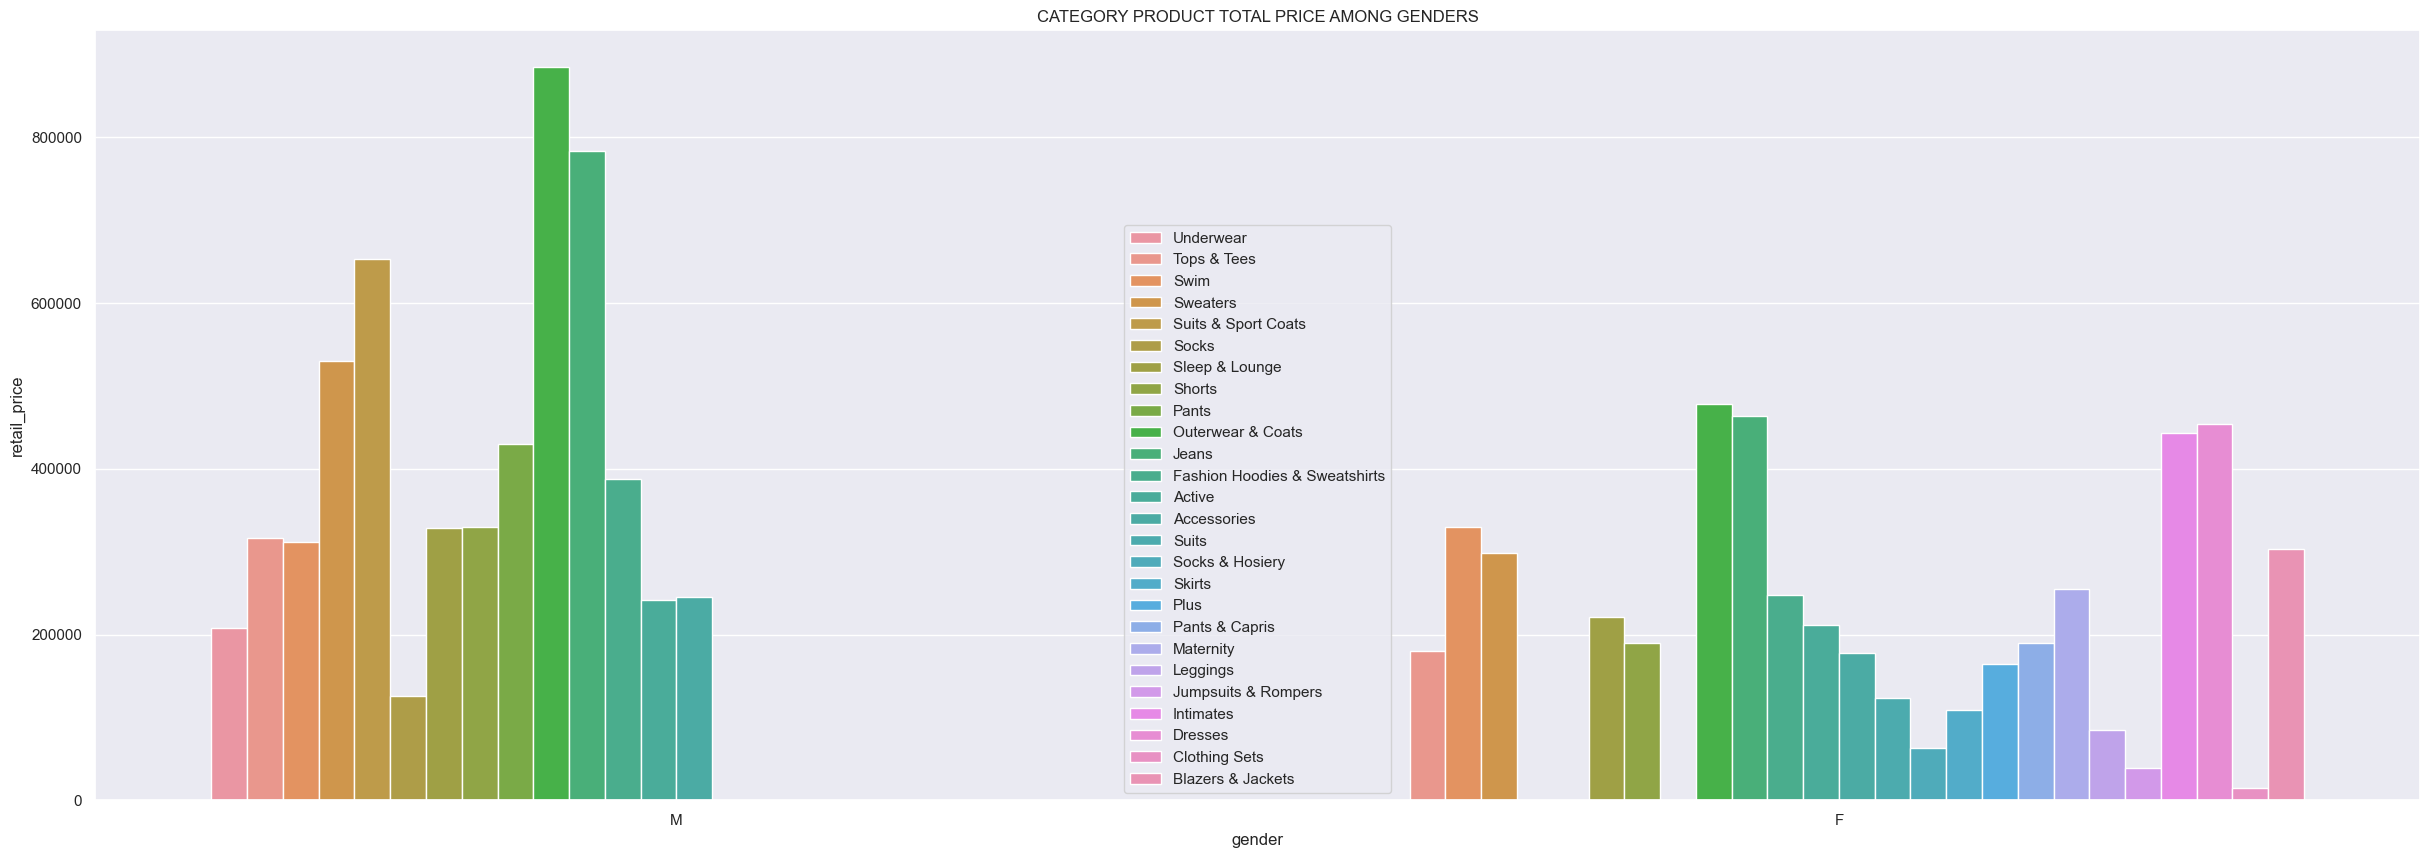

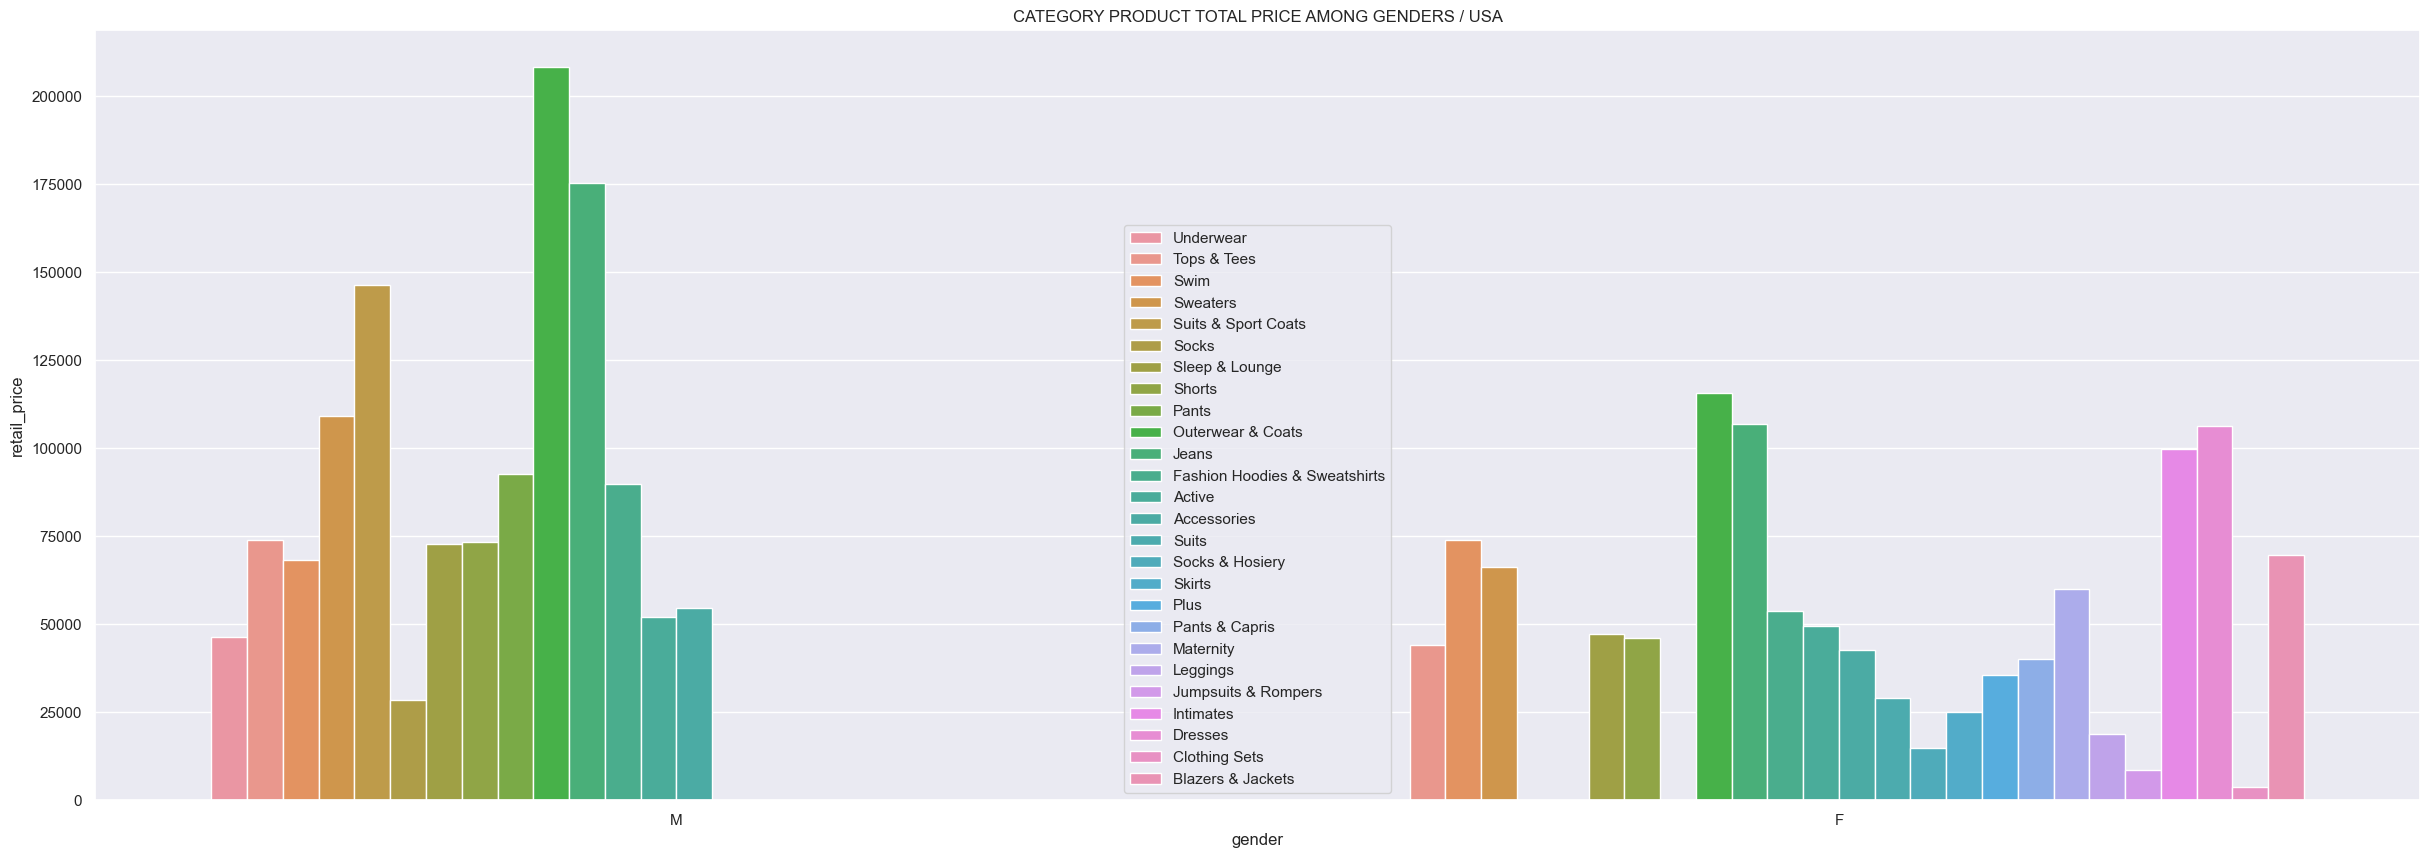

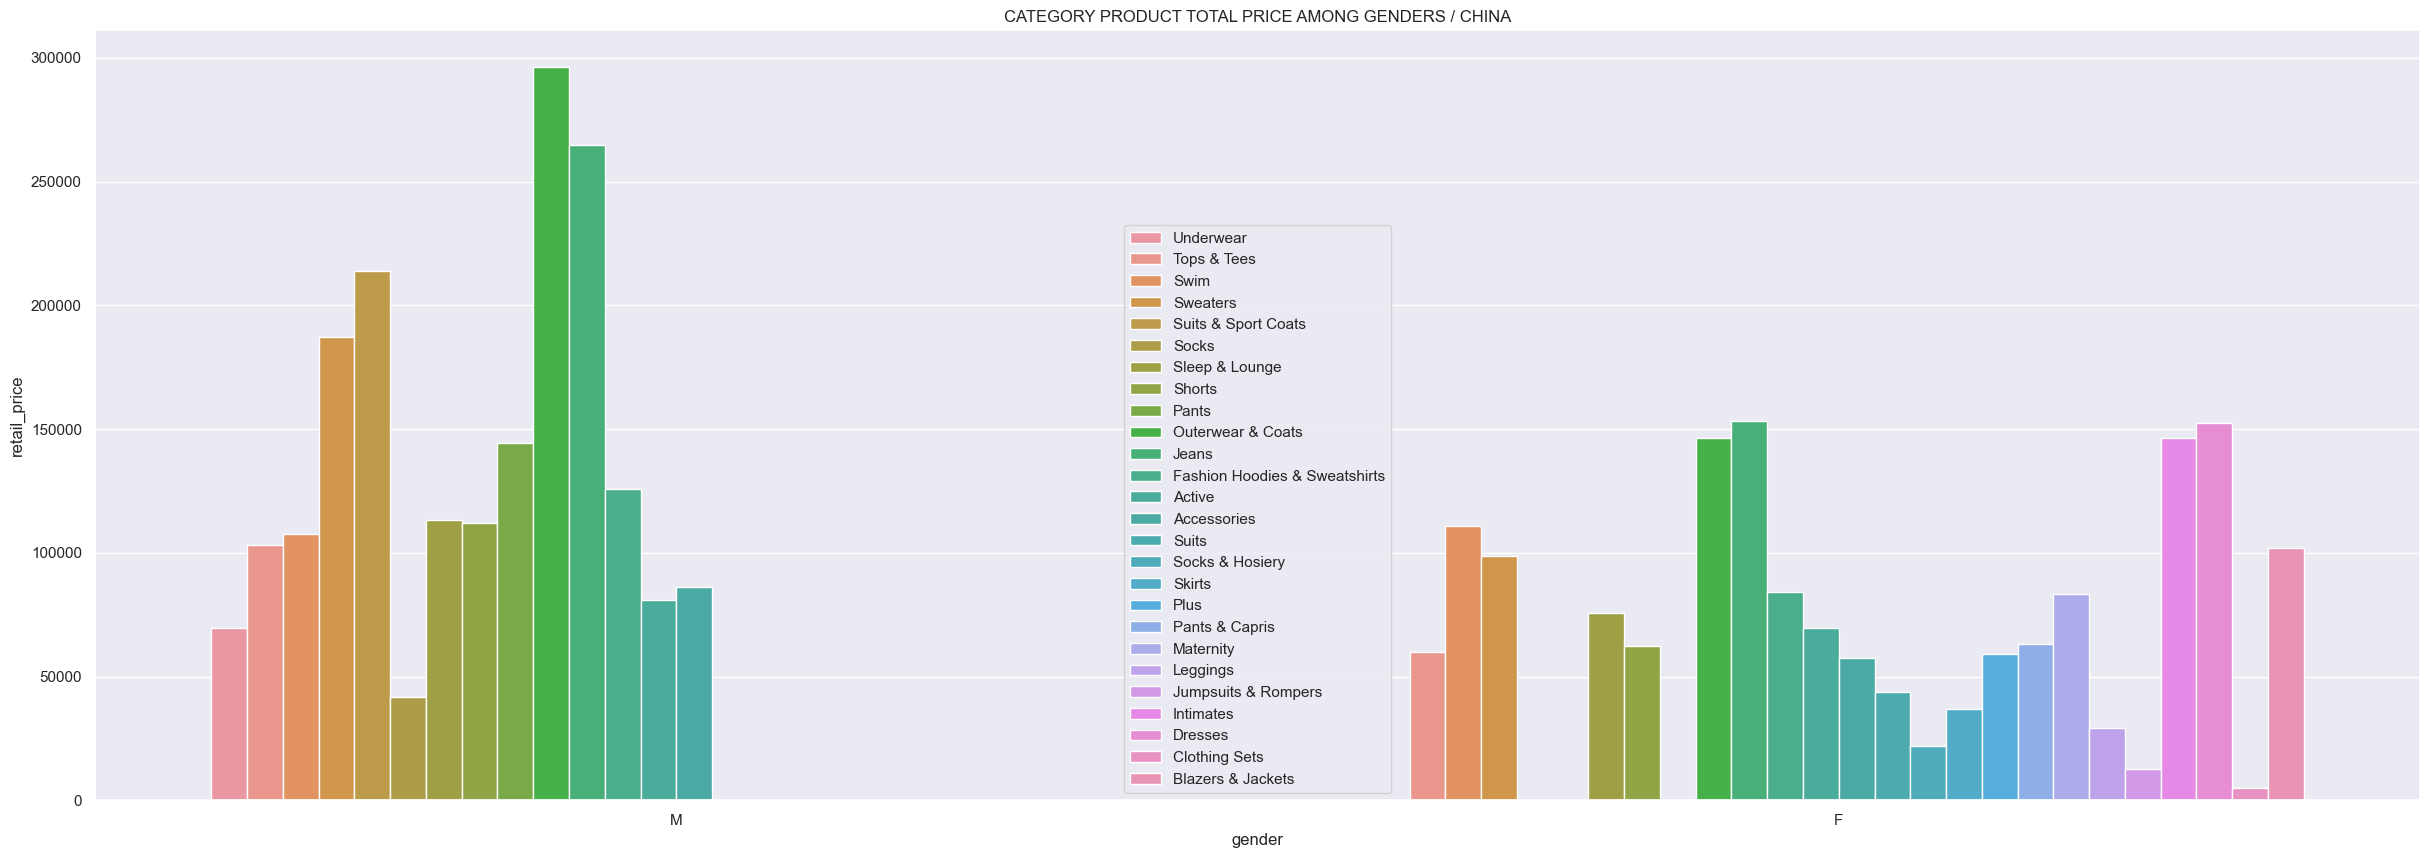

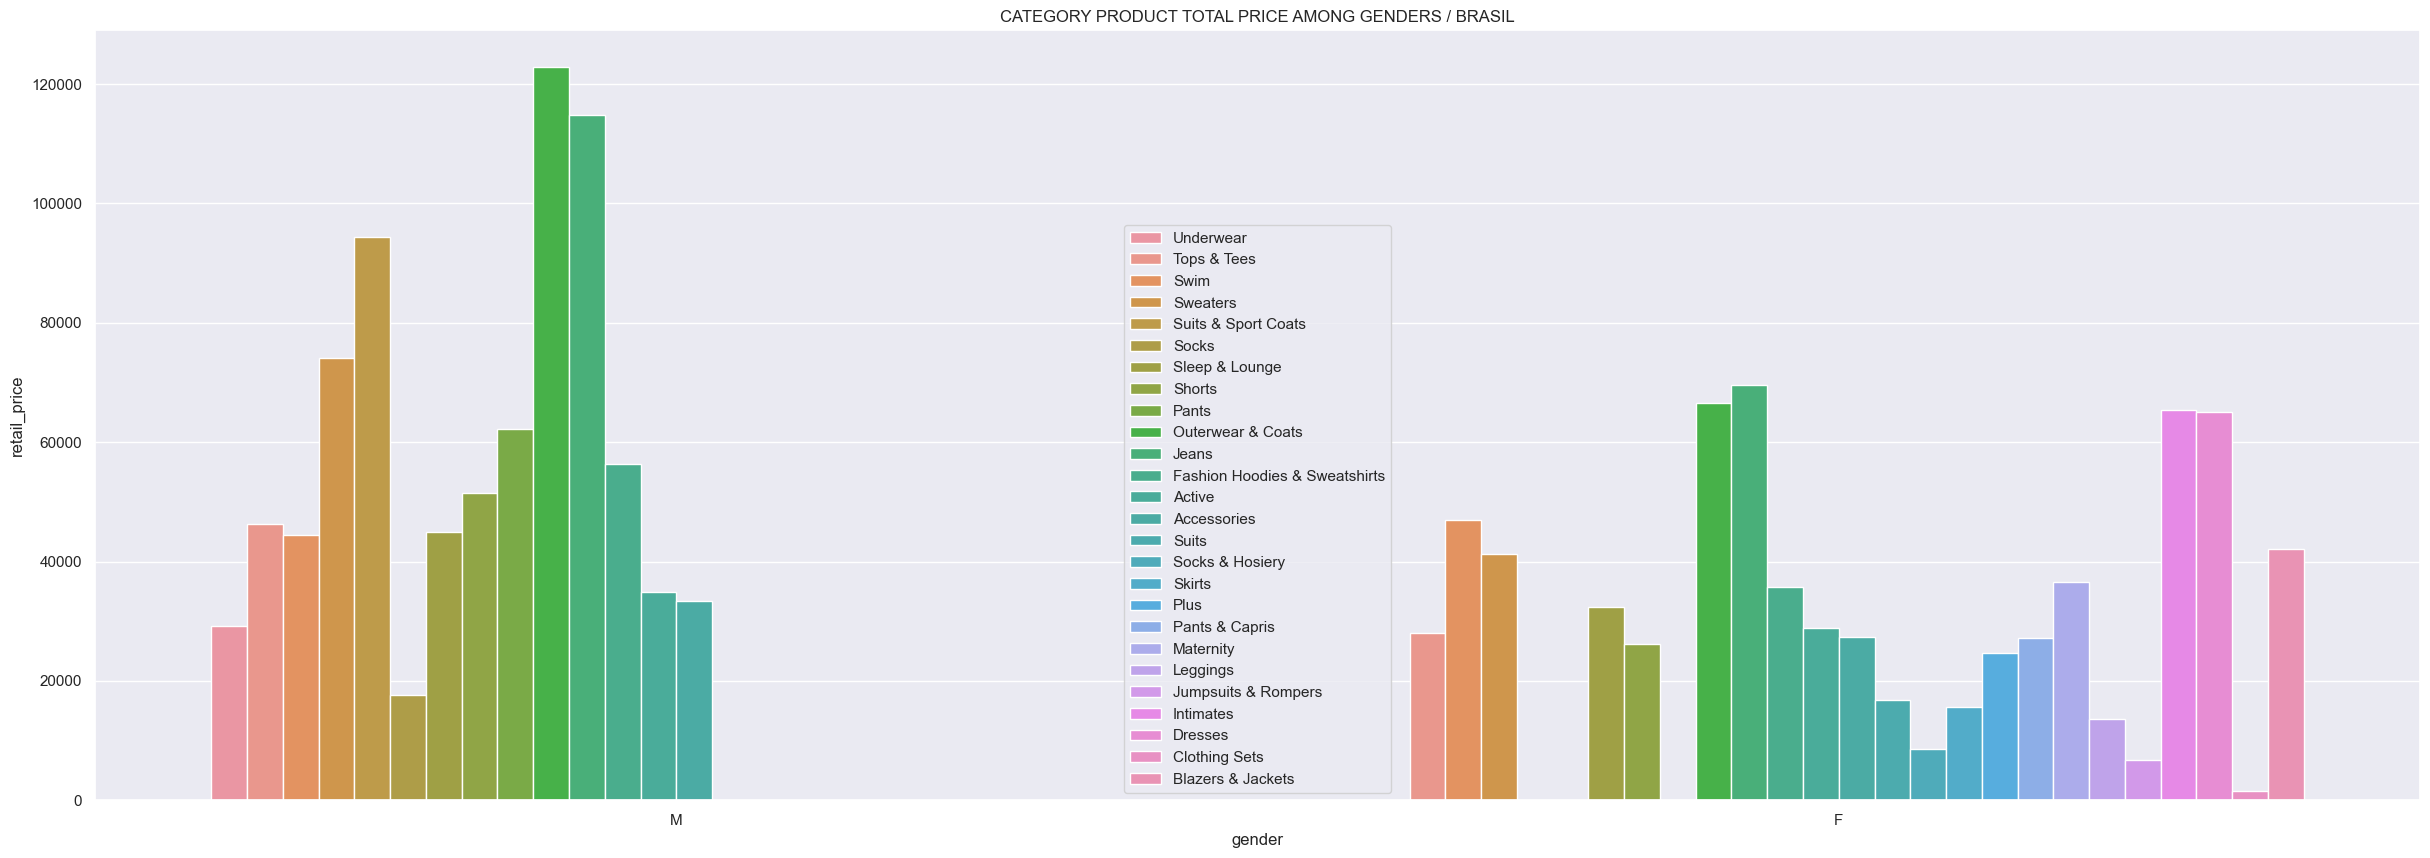

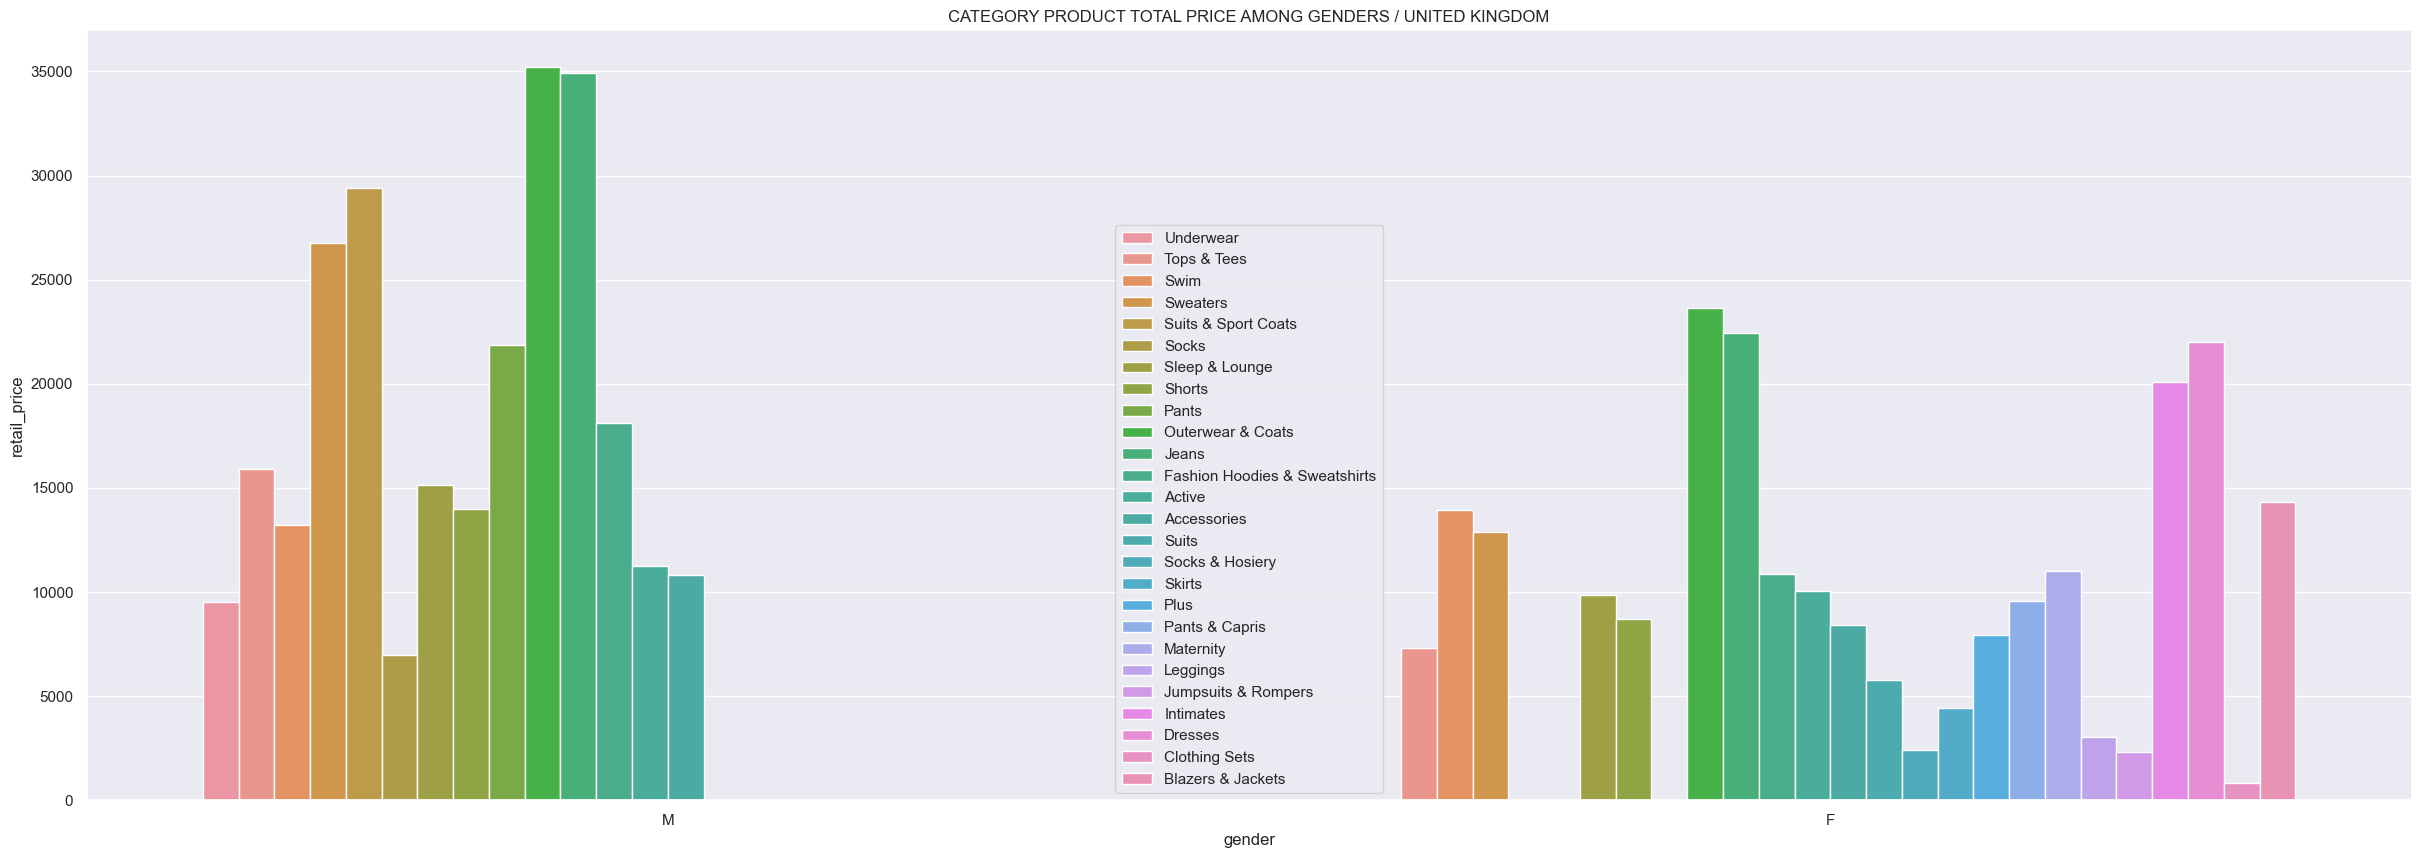

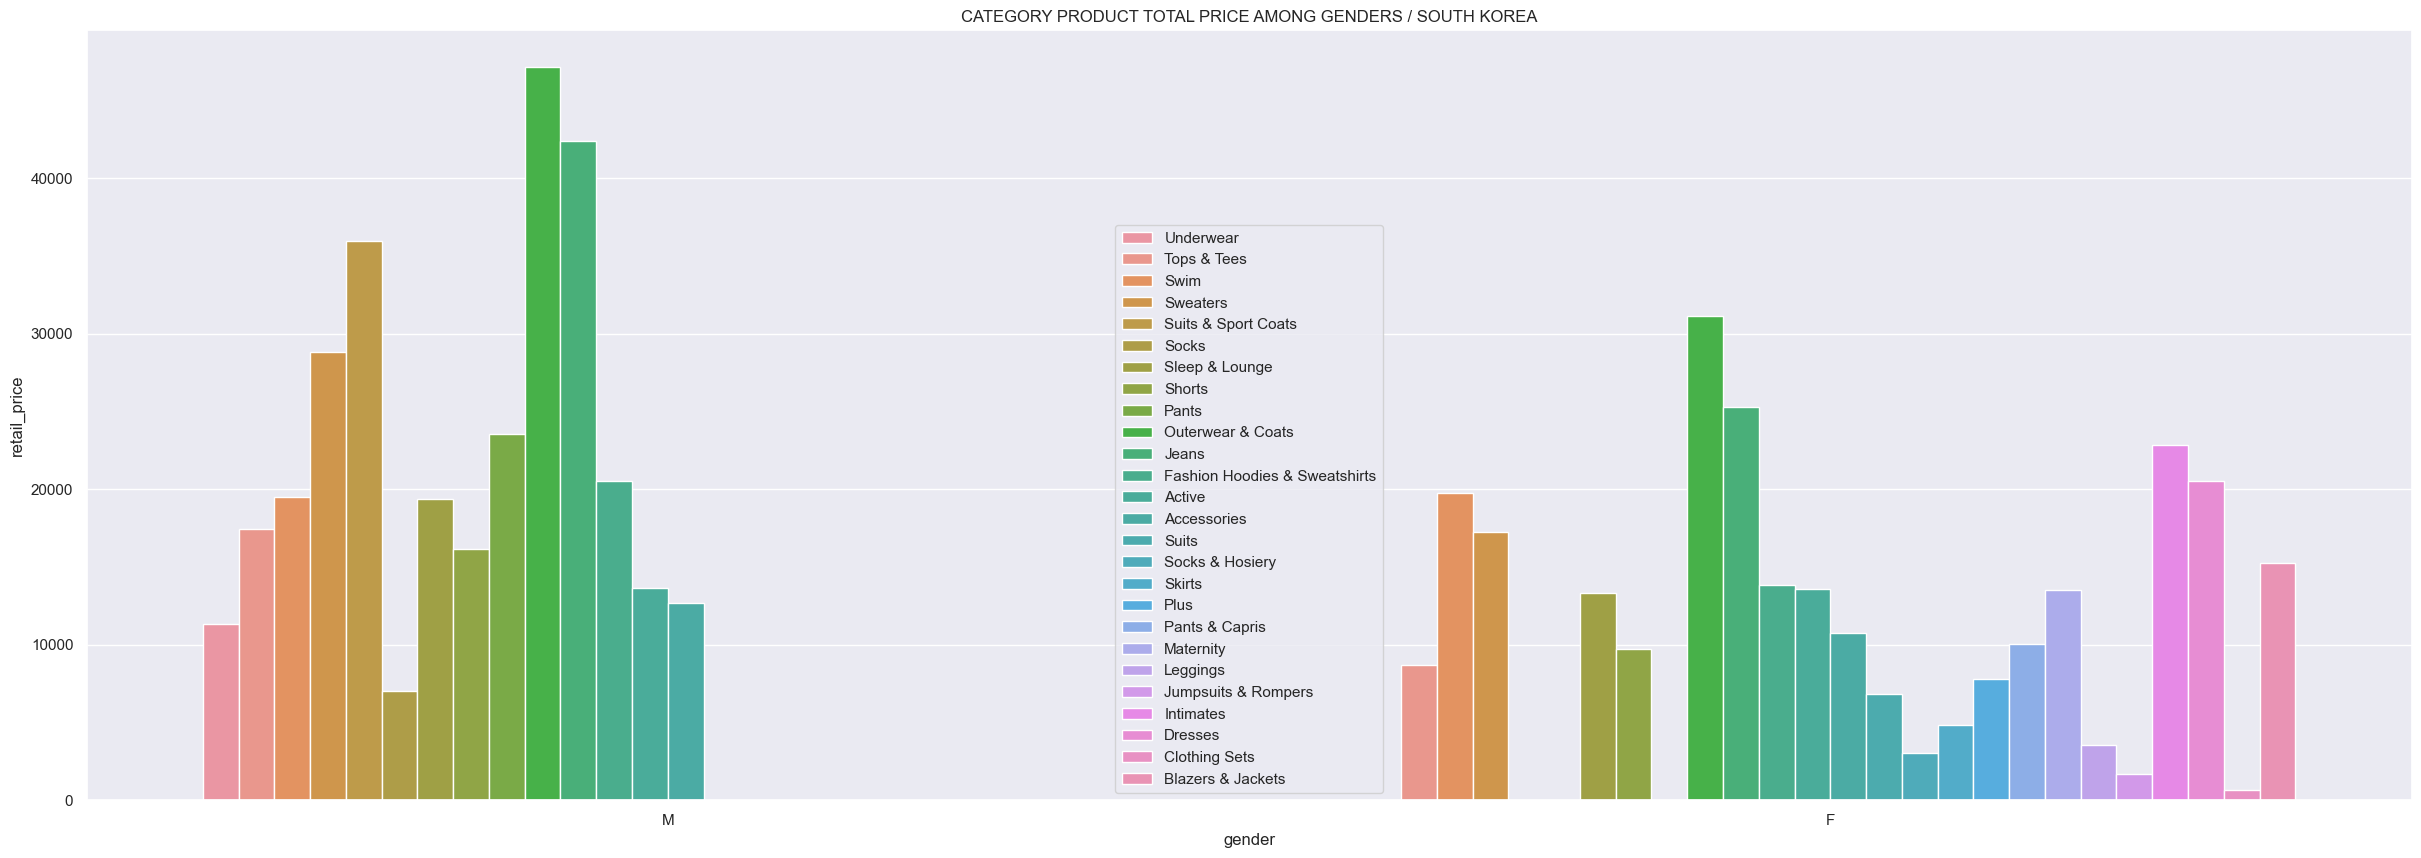

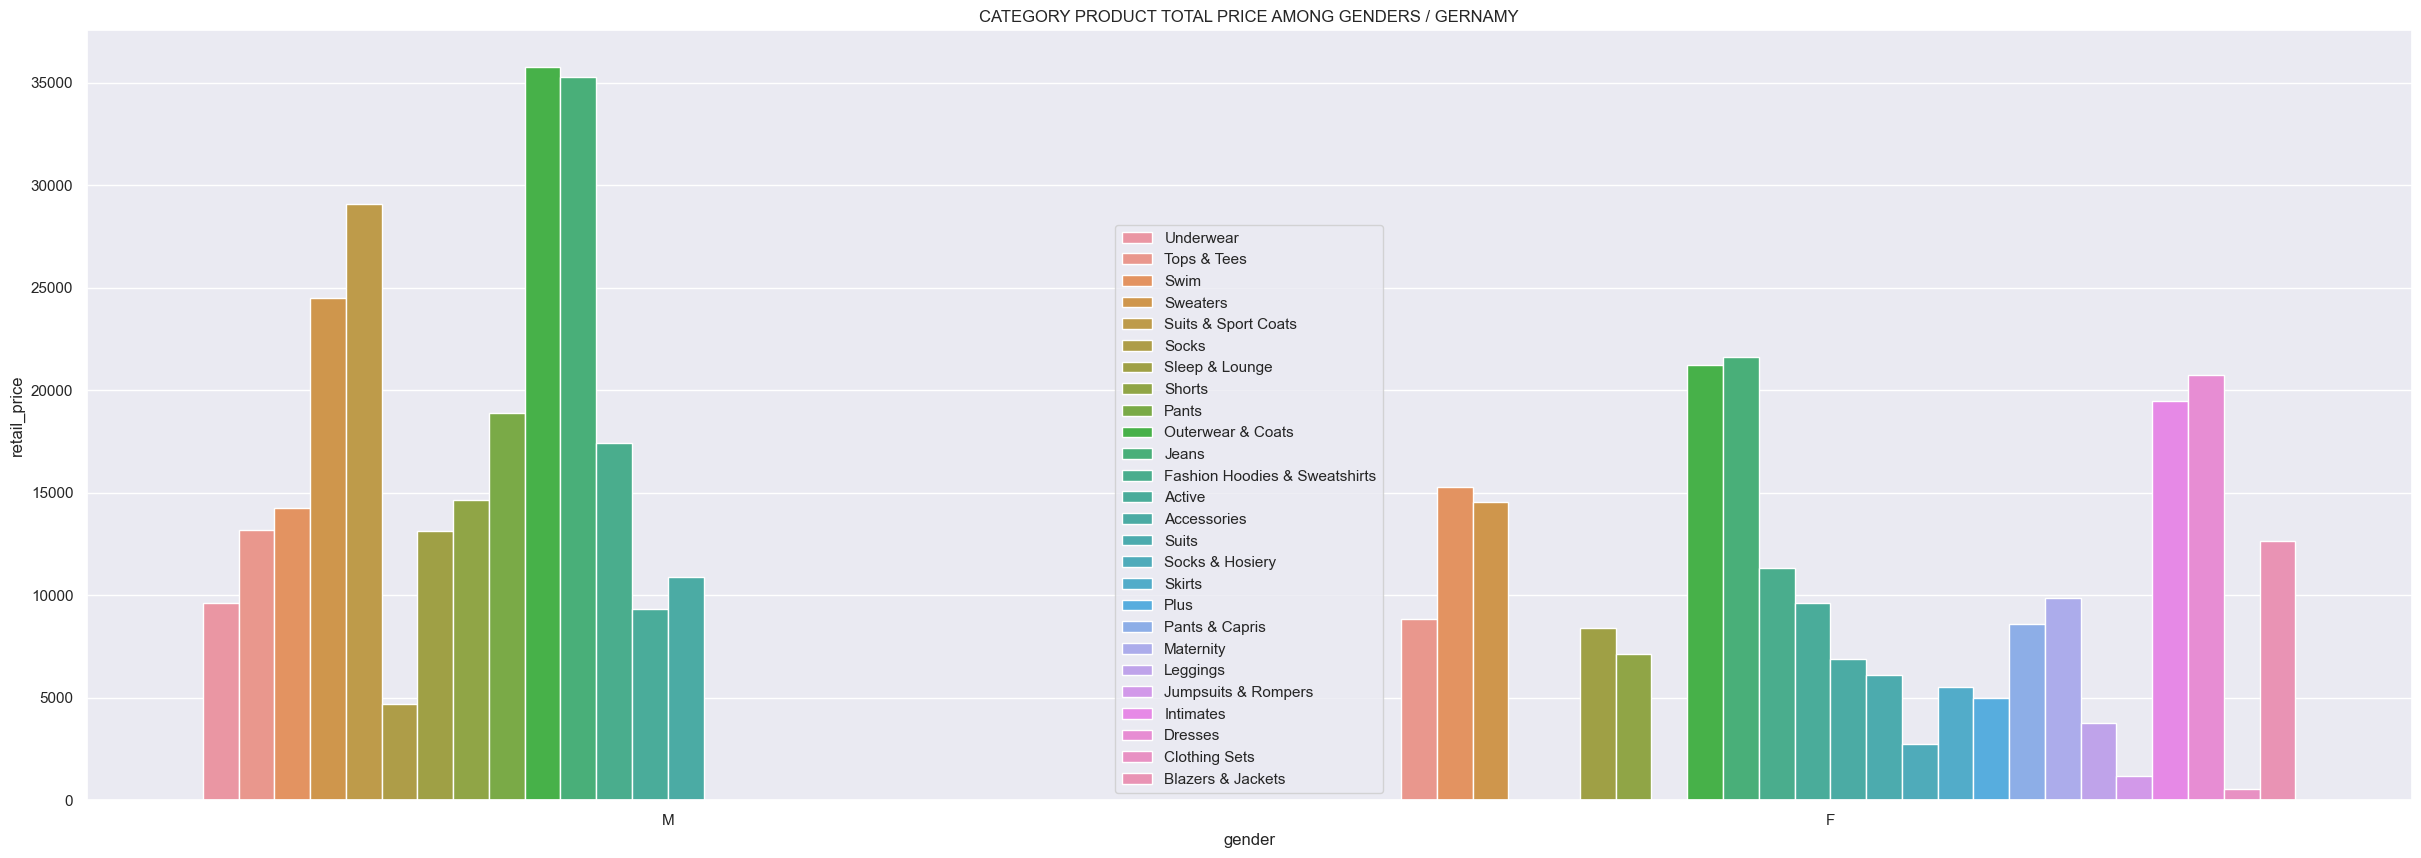

In [349]:
count_8 = 0

products_price_among_genders = products_users_clean[["gender","category","retail_price"]].groupby(["gender","category"],as_index=False).agg({'retail_price': 'sum'}).sort_values(["gender","category"], ascending=False)
products_price_among_genders_us = products_users_clean[products_users_clean.country=="United States"][["gender","category","retail_price"]].groupby(["gender","category"],as_index=False).agg({'retail_price': 'sum'}).sort_values(["gender","category"], ascending=False)
products_price_among_genders_ch = products_users_clean[products_users_clean.country=="China"][["gender","category","retail_price"]].groupby(["gender","category"],as_index=False).agg({'retail_price': 'sum'}).sort_values(["gender","category"], ascending=False)
products_price_among_genders_br = products_users_clean[products_users_clean.country=="Brasil"][["gender","category","retail_price"]].groupby(["gender","category"],as_index=False).agg({'retail_price': 'sum'}).sort_values(["gender","category"], ascending=False)
products_price_among_genders_uk = products_users_clean[products_users_clean.country=="United Kingdom"][["gender","category","retail_price"]].groupby(["gender","category"],as_index=False).agg({'retail_price': 'sum'}).sort_values(["gender","category"], ascending=False)
products_price_among_genders_sk = products_users_clean[products_users_clean.country=="South Korea"][["gender","category","retail_price"]].groupby(["gender","category"],as_index=False).agg({'retail_price': 'sum'}).sort_values(["gender","category"], ascending=False)
products_price_among_genders_ge = products_users_clean[products_users_clean.country=="Germany"][["gender","category","retail_price"]].groupby(["gender","category"],as_index=False).agg({'retail_price': 'sum'}).sort_values(["gender","category"], ascending=False)

count_8+=1
fig = plt.figure(count_8)
fig.set(figheight=10,figwidth=30)
x = sns.barplot(products_price_among_genders, x="gender", y="retail_price", hue="category")
x.set_title("CATEGORY PRODUCT TOTAL PRICE AMONG GENDERS")
plt.legend(loc='lower center')

# USA
count_8+=1
fig = plt.figure(count_8)
fig.set(figheight=10,figwidth=30)
x = sns.barplot(products_price_among_genders_us, x="gender", y="retail_price", hue="category")
x.set_title("CATEGORY PRODUCT TOTAL PRICE AMONG GENDERS / USA")
plt.legend(loc='lower center')

# CHINA
count_8+=1
fig = plt.figure(count_8)
fig.set(figheight=10,figwidth=30)
x = sns.barplot(products_price_among_genders_ch, x="gender", y="retail_price", hue="category")
x.set_title("CATEGORY PRODUCT TOTAL PRICE AMONG GENDERS / CHINA")
plt.legend(loc='lower center')

# BRASIL
count_8+=1
fig = plt.figure(count_8)
fig.set(figheight=10,figwidth=30)
x = sns.barplot(products_price_among_genders_br, x="gender", y="retail_price", hue="category")
x.set_title("CATEGORY PRODUCT TOTAL PRICE AMONG GENDERS / BRASIL")
plt.legend(loc='lower center')

# UNITED KINGDOM
count_8+=1
fig = plt.figure(count_8)
fig.set(figheight=10,figwidth=30)
x = sns.barplot(products_price_among_genders_uk, x="gender", y="retail_price", hue="category")
x.set_title("CATEGORY PRODUCT TOTAL PRICE AMONG GENDERS / UNITED KINGDOM")
plt.legend(loc='lower center')

# SOUTH KOREA
count_8+=1
fig = plt.figure(count_8)
fig.set(figheight=10,figwidth=30)
x = sns.barplot(products_price_among_genders_sk, x="gender", y="retail_price", hue="category")
x.set_title("CATEGORY PRODUCT TOTAL PRICE AMONG GENDERS / SOUTH KOREA")
plt.legend(loc='lower center')

# GERNAMY
count_8+=1
fig = plt.figure(count_8)
fig.set(figheight=10,figwidth=30)
x = sns.barplot(products_price_among_genders_ge, x="gender", y="retail_price", hue="category")
x.set_title("CATEGORY PRODUCT TOTAL PRICE AMONG GENDERS / GERNAMY")
plt.legend(loc='lower center')

# Countries dont have effect on the distribution


# 9. Study of 2 groups: (F+ Intimates / Dresses / Pants / Outerwear & Coats) and (M+ Underwear / Suits & Sport Coats / Jeans / Outerwear & Coats)?

(76, 4)
(77, 4)


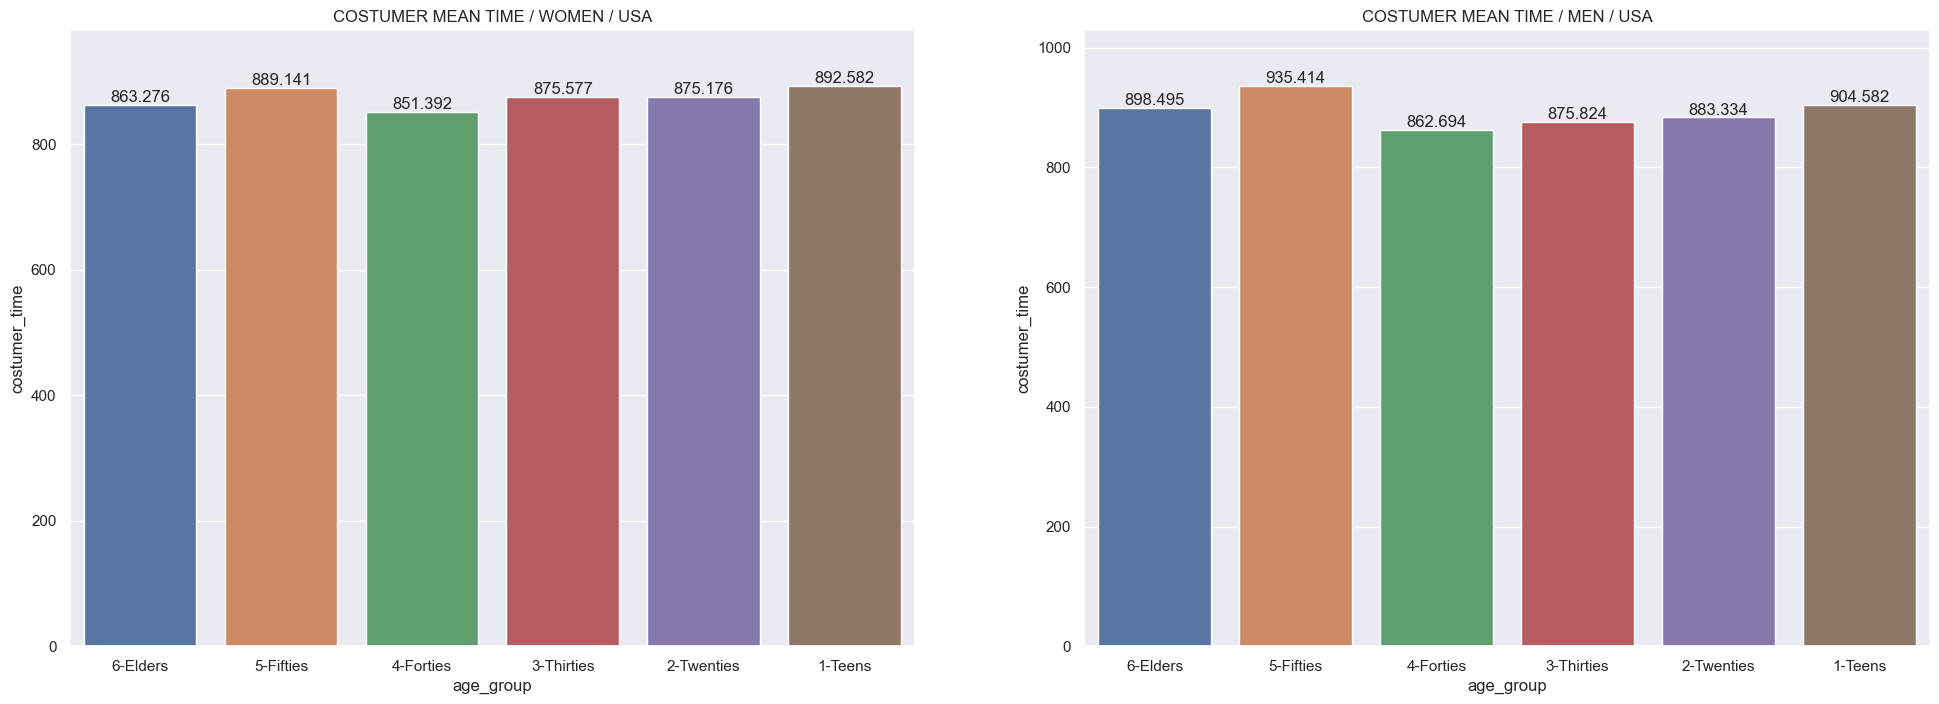

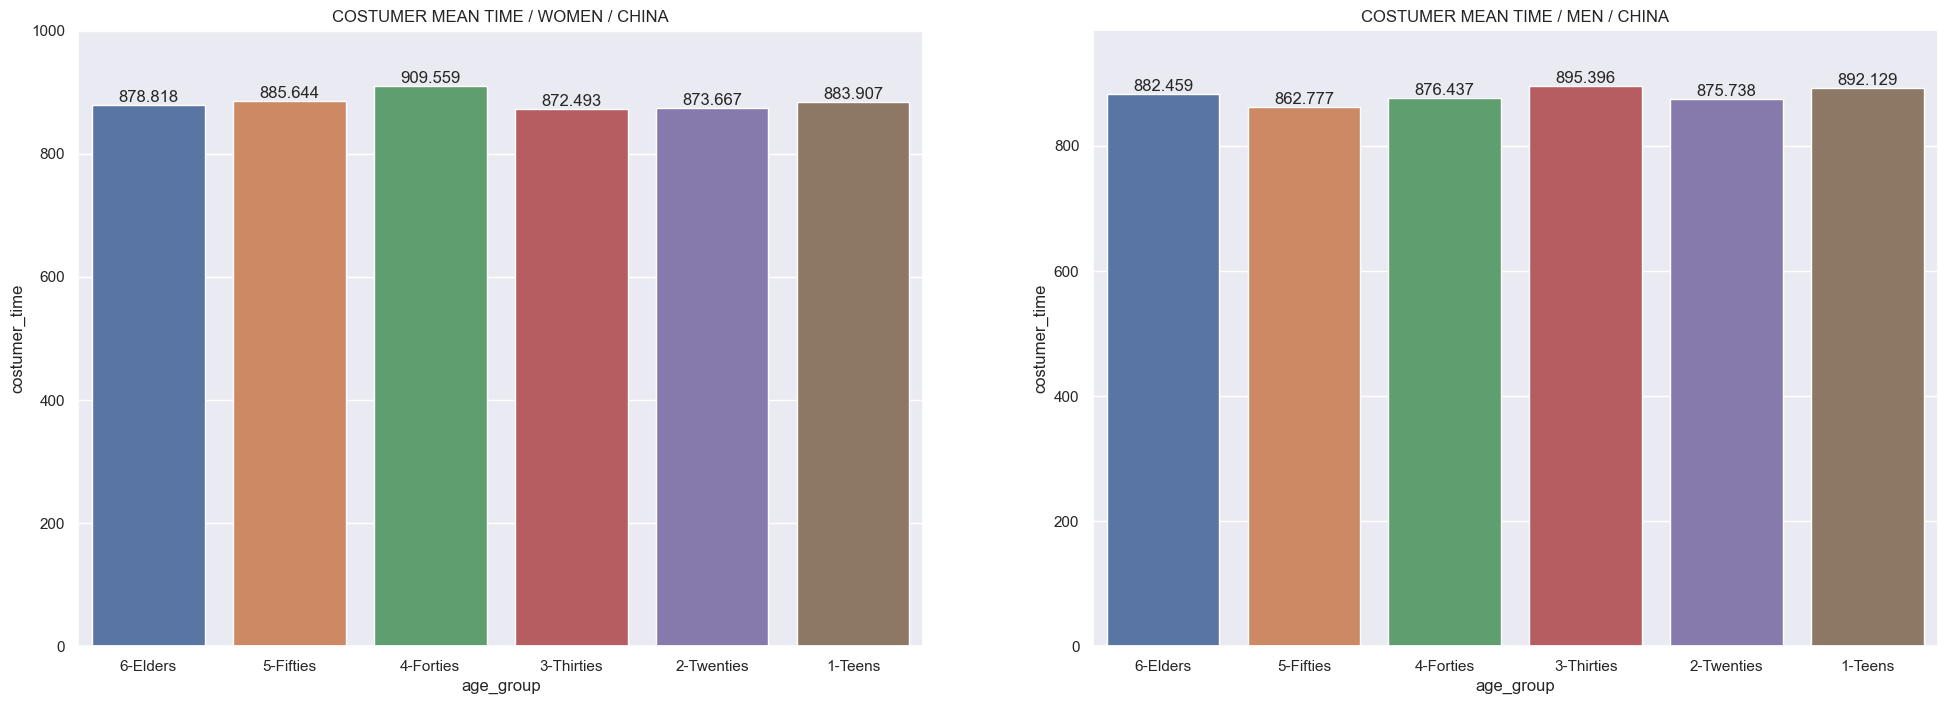

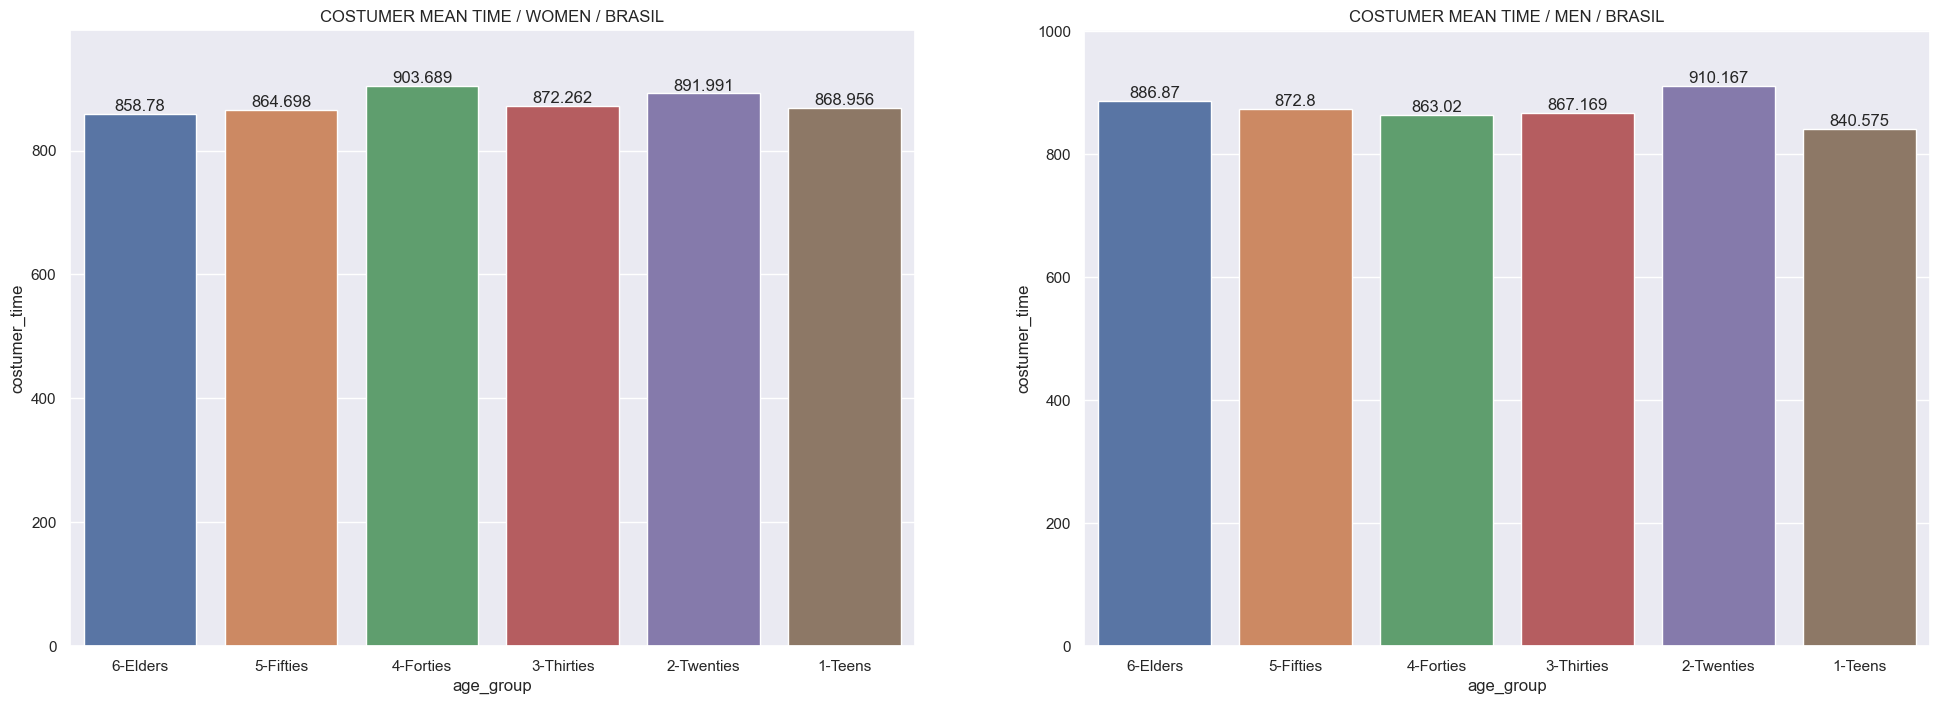

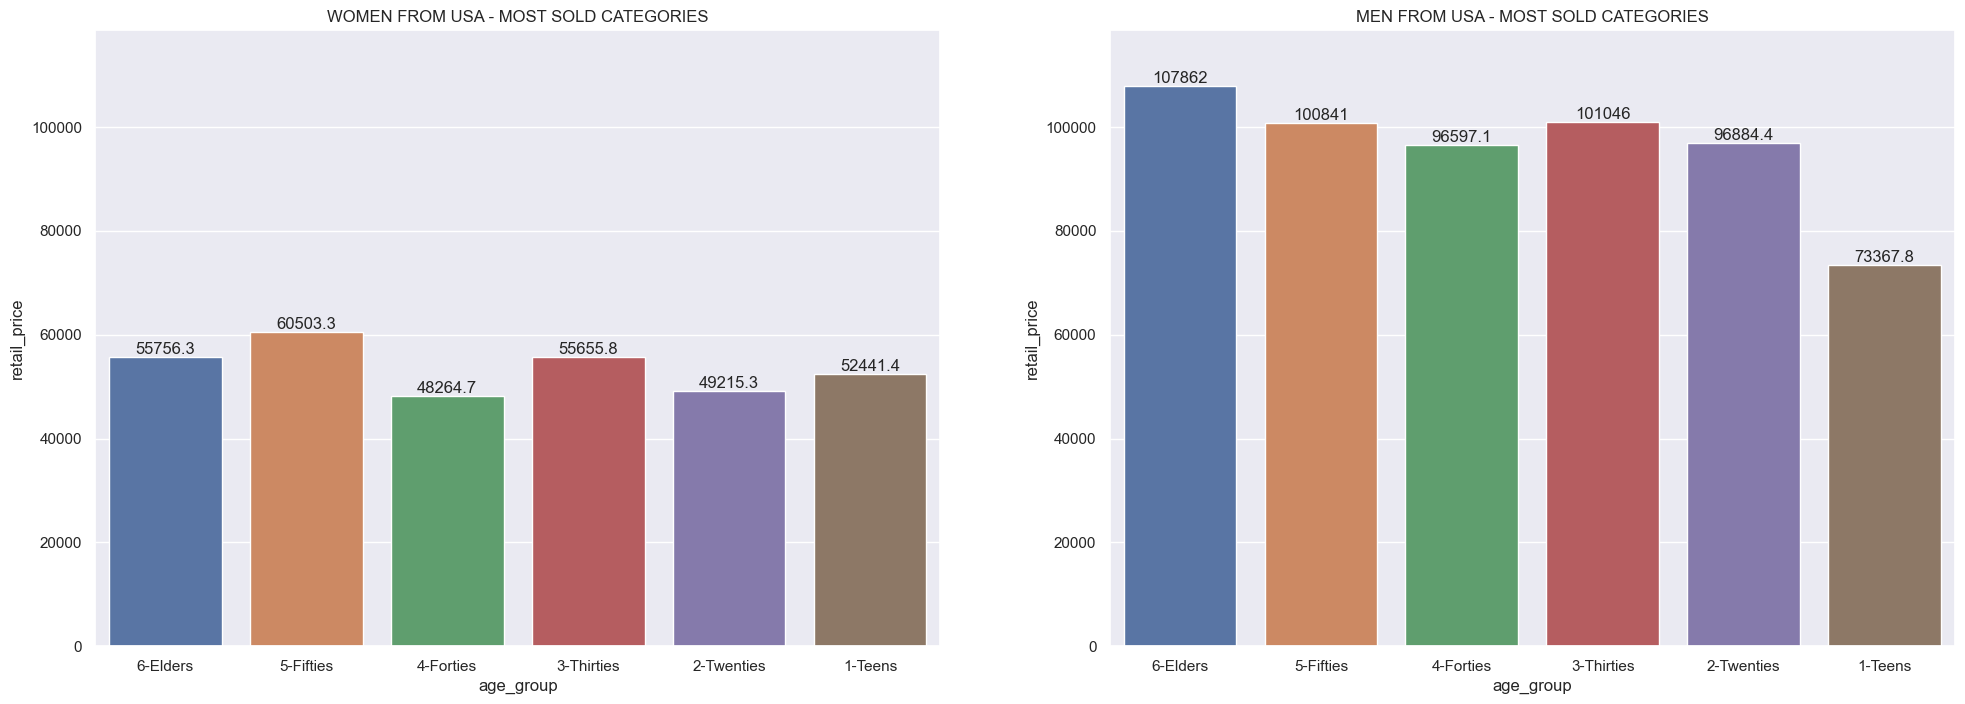

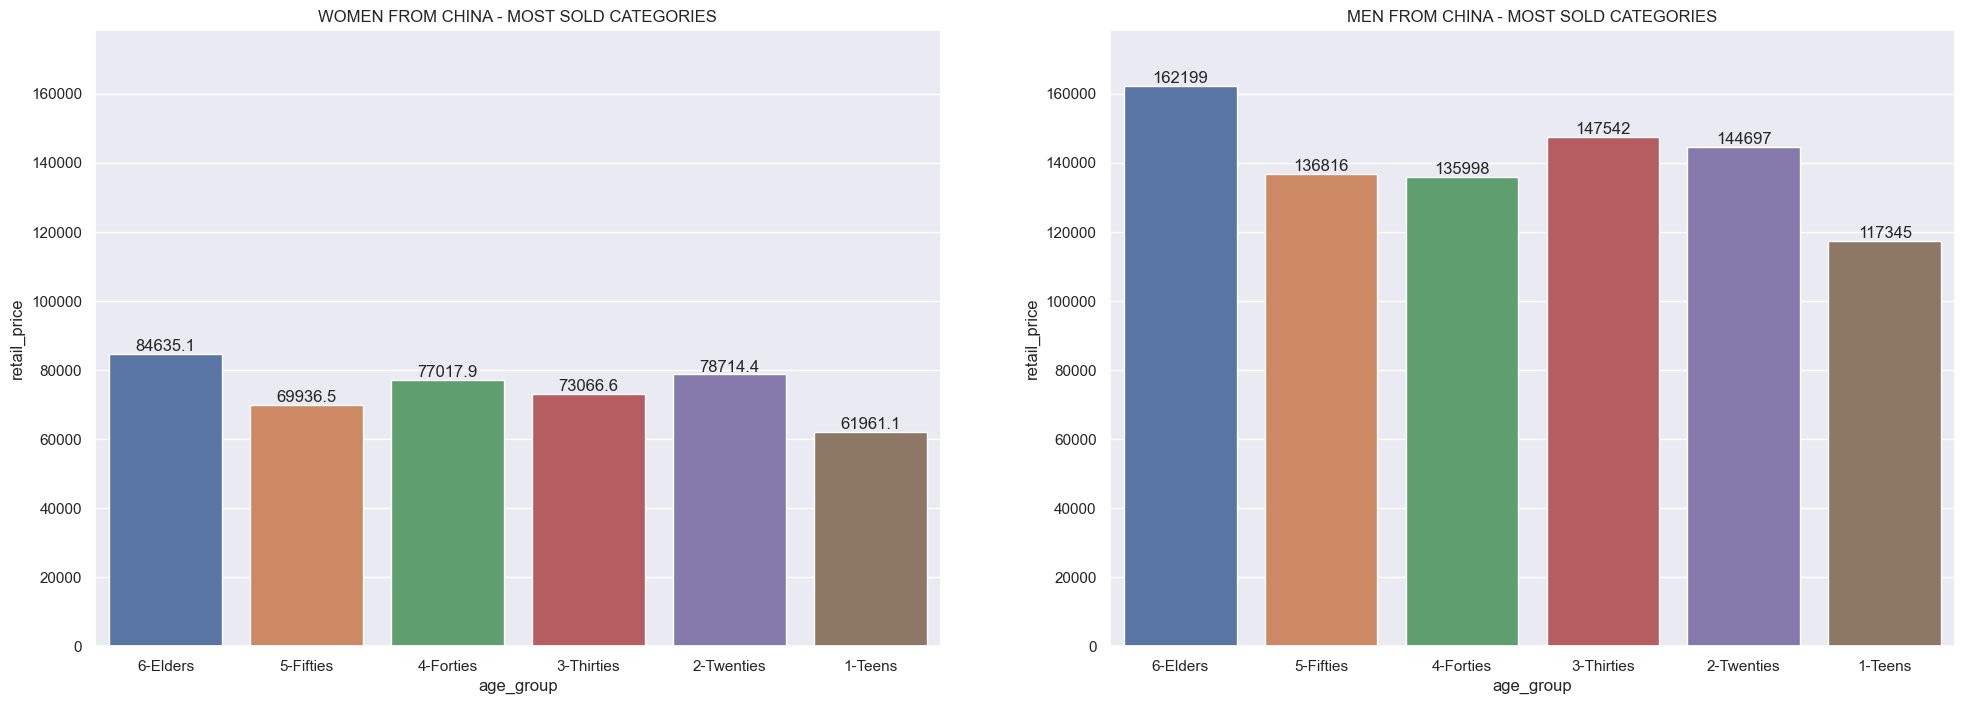

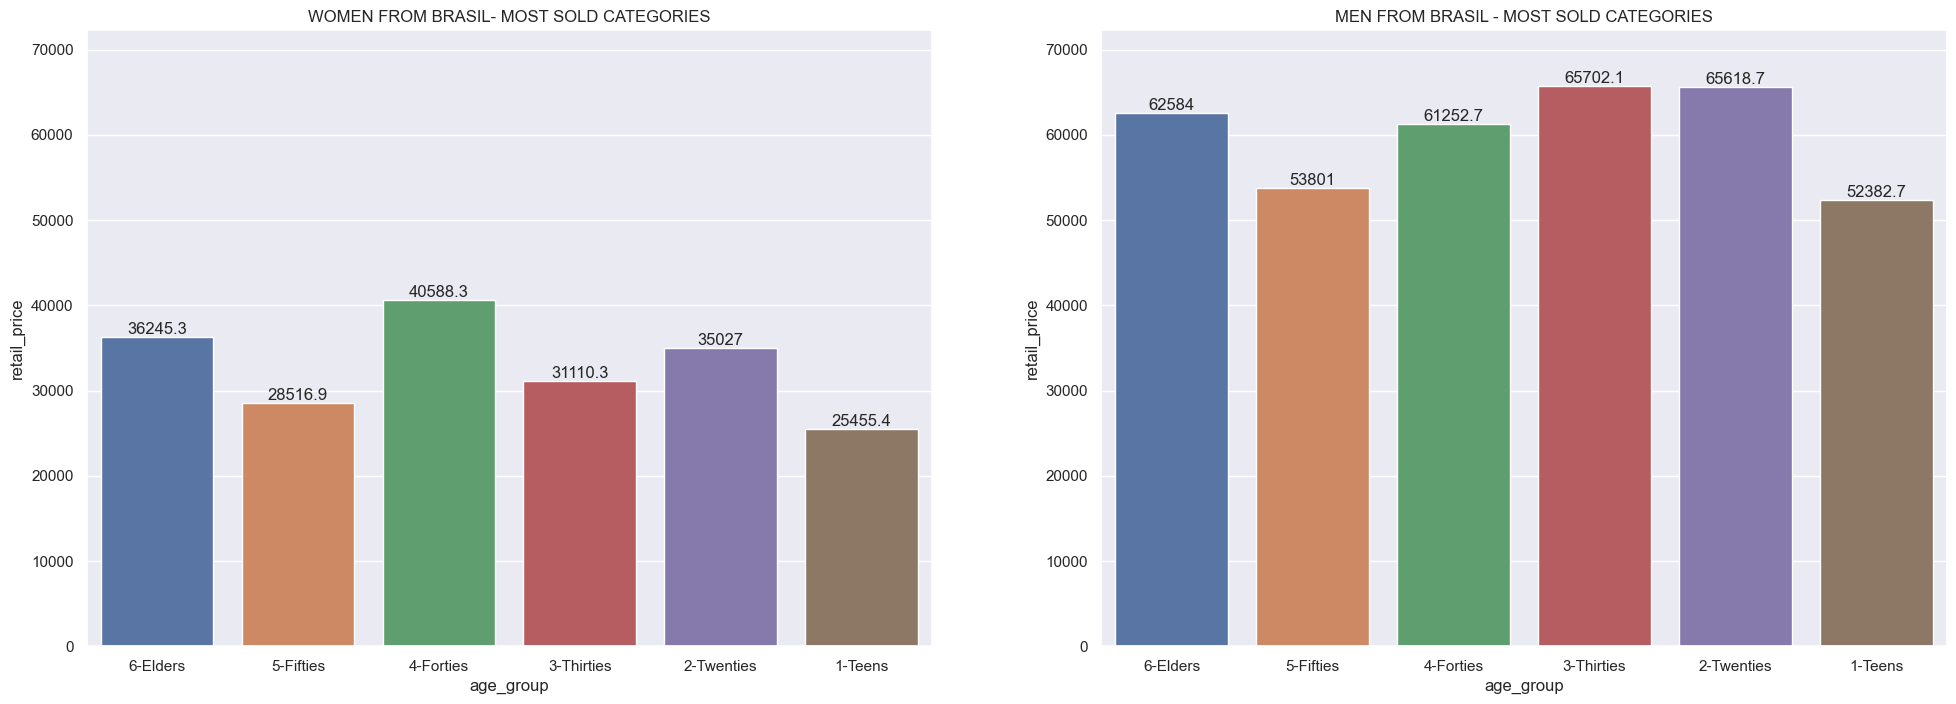

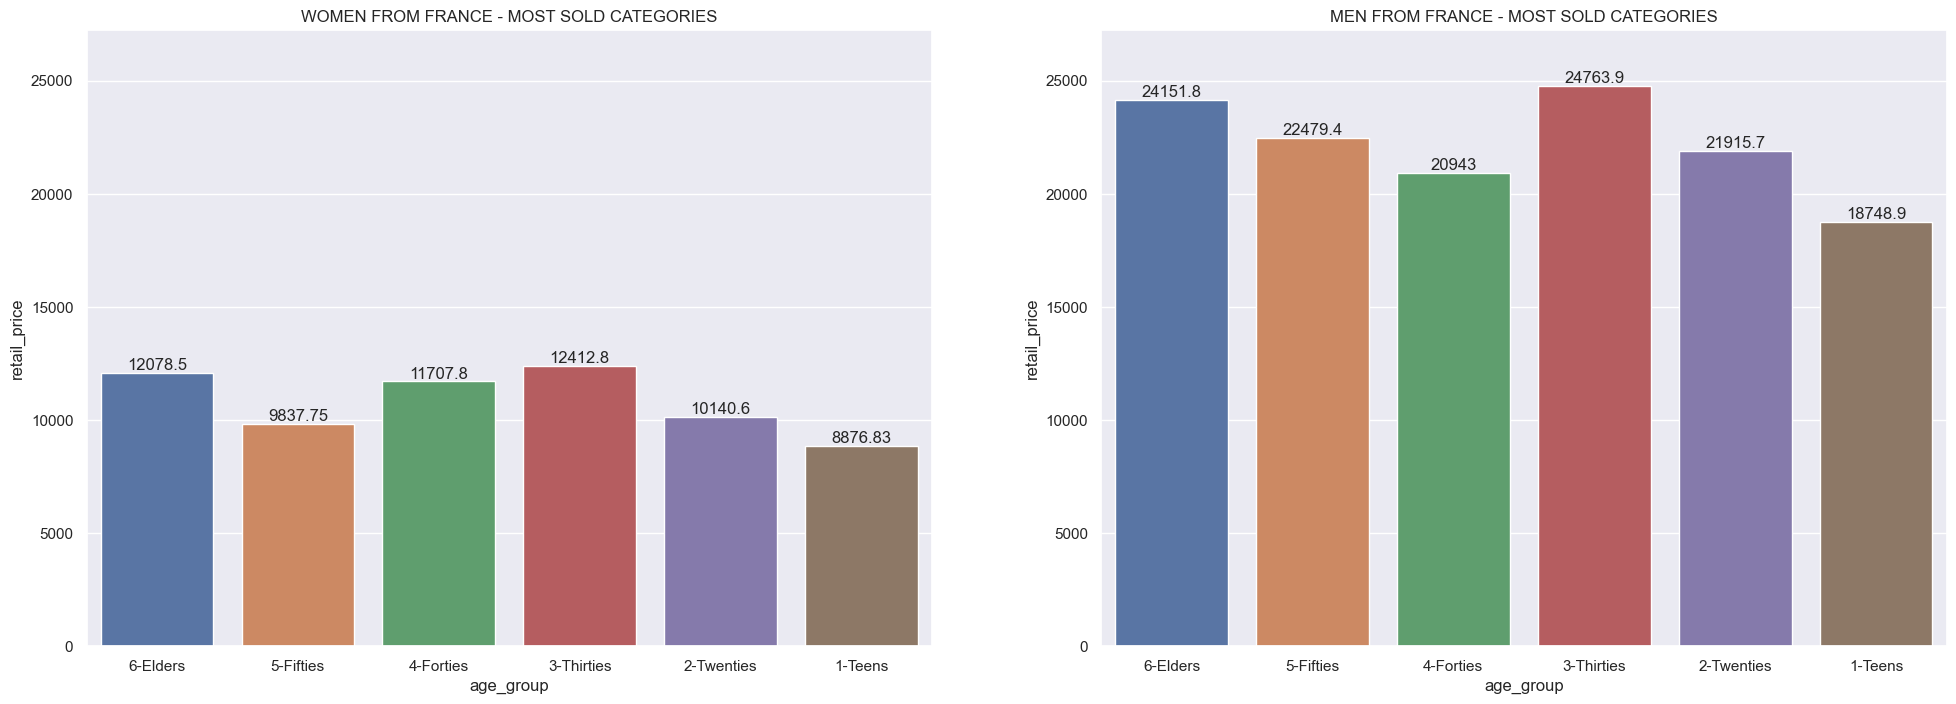

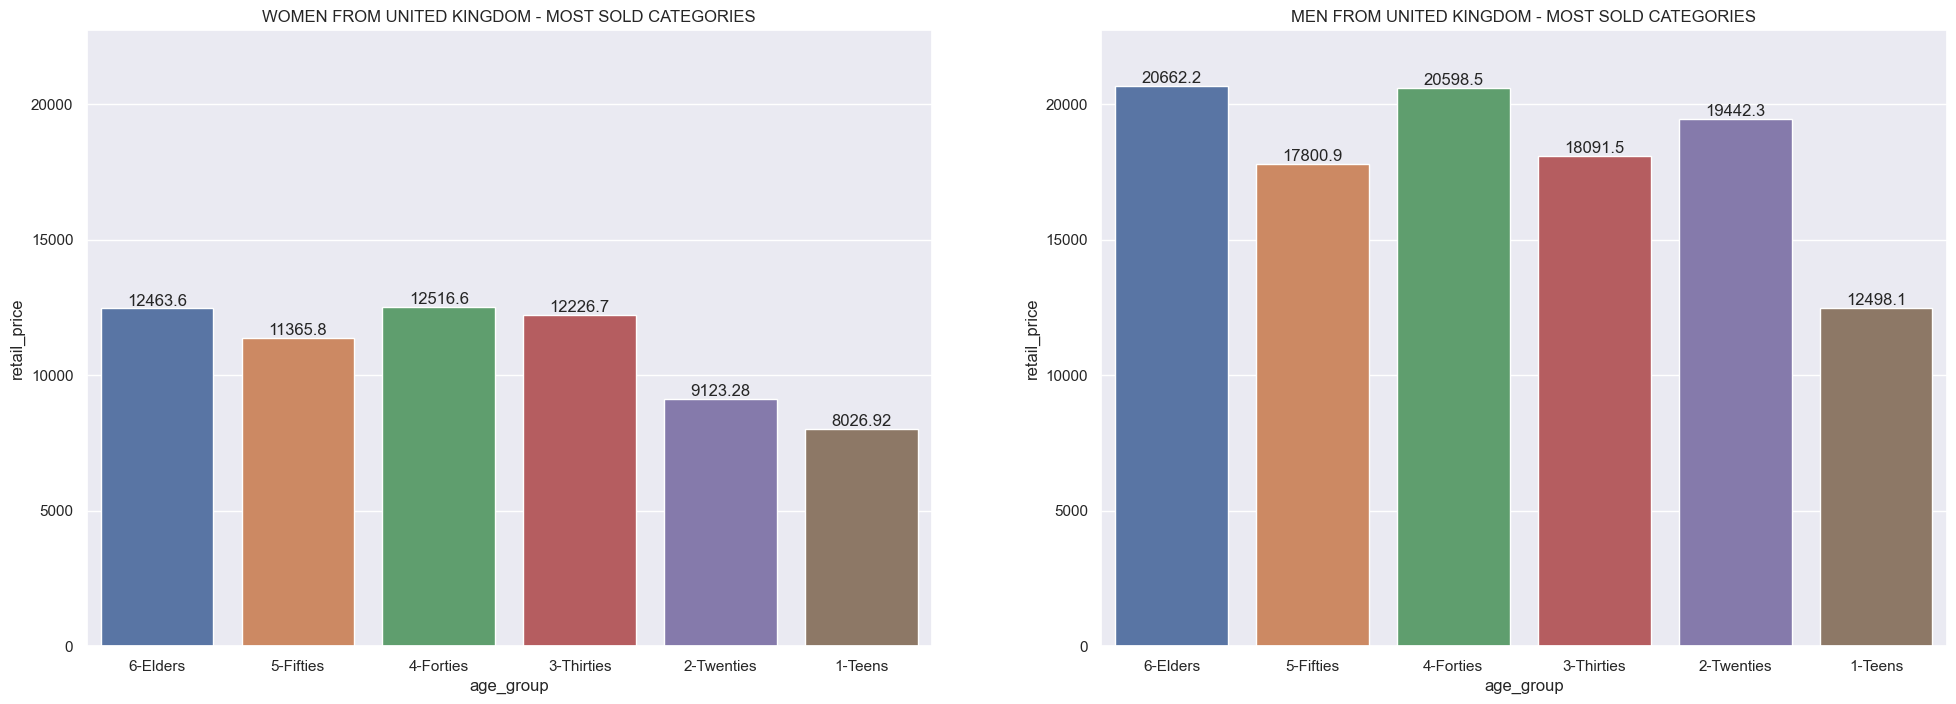

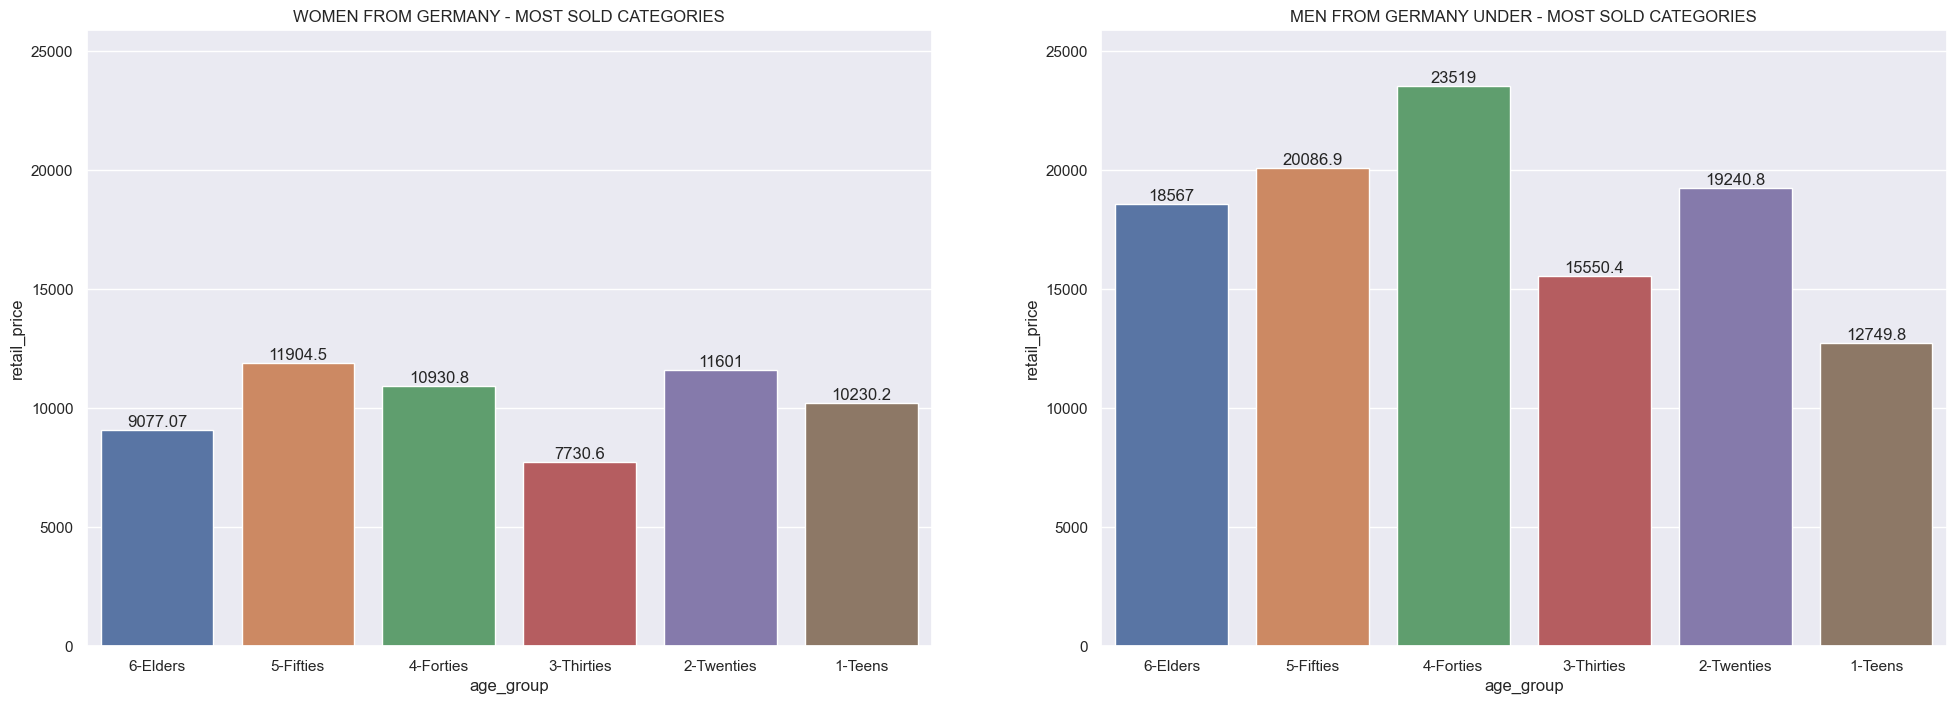

In [351]:
count_9 = 0

products_price_among_specific_group_f = products_users_clean[(products_users_clean.gender=="F") & (products_users_clean.category.isin(["Intimates","Dresses","Pants","Outerwear & Coats"]))][["country","age_group","retail_price","costumer_time"]].groupby(["country","age_group"],as_index=False).agg({'retail_price': 'sum', 'costumer_time': 'mean'}).sort_values(["country","age_group"], ascending=False)
products_price_among_specific_group_m = products_users_clean[(products_users_clean.gender=="M") & (products_users_clean.category.isin(["Underwear","Suits & Sport Coats","Jeans","Outerwear & Coats"]))][["country","age_group","retail_price","costumer_time"]].groupby(["country","age_group"],as_index=False).agg({'retail_price': 'sum', 'costumer_time': 'mean'}).sort_values(["country","age_group"], ascending=False)

print(products_price_among_specific_group_f.shape)
print(products_price_among_specific_group_m.shape)

#set seaborn plotting aesthetics as default
sns.set()

# USA - AVG TIME COSTUMER
fig, axes = plt.subplots(1, 2)
fig.set(figheight=8,figwidth=24)

#create boxplot in each subplot
x1 = sns.barplot(products_price_among_specific_group_f[products_price_among_specific_group_f.country=="United States"], x="age_group", y="costumer_time", ax=axes[0], width=0.8)
x1.set_title("COSTUMER MEAN TIME / WOMEN / USA")
x1.set_ylim(0, products_price_among_specific_group_f[products_price_among_specific_group_f.country=="United States"]["costumer_time"].max()*1.1)
for i in x1.containers:
    x1.bar_label(i,)
x2 = sns.barplot(products_price_among_specific_group_m[products_price_among_specific_group_m.country=="United States"], x="age_group", y="costumer_time", ax=axes[1], width=0.8)
x2.set_title("COSTUMER MEAN TIME / MEN / USA")
x2.set_ylim(0, products_price_among_specific_group_m[products_price_among_specific_group_m.country=="United States"]["costumer_time"].max()*1.1)
for i in x2.containers:
    x2.bar_label(i,)

# CHINA - AVG TIME COSTUMER
fig, axes = plt.subplots(1, 2)
fig.set(figheight=8,figwidth=24)

#create boxplot in each subplot
x1 = sns.barplot(products_price_among_specific_group_f[products_price_among_specific_group_f.country=="China"], x="age_group", y="costumer_time", ax=axes[0], width=0.8)
x1.set_title("COSTUMER MEAN TIME / WOMEN / CHINA")
x1.set_ylim(0, products_price_among_specific_group_f[products_price_among_specific_group_f.country=="China"]["costumer_time"].max()*1.1)
for i in x1.containers:
    x1.bar_label(i,)
x2 = sns.barplot(products_price_among_specific_group_m[products_price_among_specific_group_m.country=="China"], x="age_group", y="costumer_time", ax=axes[1], width=0.8)
x2.set_title("COSTUMER MEAN TIME / MEN / CHINA")
x2.set_ylim(0, products_price_among_specific_group_m[products_price_among_specific_group_m.country=="China"]["costumer_time"].max()*1.1)
for i in x2.containers:
    x2.bar_label(i,)

# BRASIL - AVG TIME COSTUMER
fig, axes = plt.subplots(1, 2)
fig.set(figheight=8,figwidth=24)

#create boxplot in each subplot
x1 = sns.barplot(products_price_among_specific_group_f[products_price_among_specific_group_f.country=="Brasil"], x="age_group", y="costumer_time", ax=axes[0], width=0.8)
x1.set_title("COSTUMER MEAN TIME / WOMEN / BRASIL")
x1.set_ylim(0, products_price_among_specific_group_f[products_price_among_specific_group_f.country=="Brasil"]["costumer_time"].max()*1.1)
for i in x1.containers:
    x1.bar_label(i,)
x2 = sns.barplot(products_price_among_specific_group_m[products_price_among_specific_group_m.country=="Brasil"], x="age_group", y="costumer_time", ax=axes[1], width=0.8)
x2.set_title("COSTUMER MEAN TIME / MEN / BRASIL")
x2.set_ylim(0, products_price_among_specific_group_m[products_price_among_specific_group_m.country=="Brasil"]["costumer_time"].max()*1.1)
for i in x2.containers:
    x2.bar_label(i,)

# USA
fig, axes = plt.subplots(1, 2)
fig.set(figheight=8,figwidth=24)

#create boxplot in each subplot
x1 = sns.barplot(products_price_among_specific_group_f[products_price_among_specific_group_f.country=="United States"], x="age_group", y="retail_price", ax=axes[0], width=0.8)
x1.set_title("WOMEN FROM USA - MOST SOLD CATEGORIES")
x1.set_ylim(0, products_price_among_specific_group_m[products_price_among_specific_group_m.country=="United States"]["retail_price"].max()*1.1)
for i in x1.containers:
    x1.bar_label(i,)
x2 = sns.barplot(products_price_among_specific_group_m[products_price_among_specific_group_m.country=="United States"], x="age_group", y="retail_price", ax=axes[1], width=0.8)
x2.set_title("MEN FROM USA - MOST SOLD CATEGORIES")
x2.set_ylim(0, products_price_among_specific_group_m[products_price_among_specific_group_m.country=="United States"]["retail_price"].max()*1.1)
for i in x2.containers:
    x2.bar_label(i,)

plt.show()

# CHINA
fig, axes = plt.subplots(1, 2)
fig.set(figheight=8,figwidth=24)

#create boxplot in each subplot
x1 = sns.barplot(products_price_among_specific_group_f[products_price_among_specific_group_f.country=="China"], x="age_group", y="retail_price", ax=axes[0], width=0.8)
x1.set_title("WOMEN FROM CHINA - MOST SOLD CATEGORIES")
x1.set_ylim(0, products_price_among_specific_group_m[products_price_among_specific_group_m.country=="China"]["retail_price"].max()*1.1)
for i in x1.containers:
    x1.bar_label(i,)
x2 = sns.barplot(products_price_among_specific_group_m[products_price_among_specific_group_m.country=="China"], x="age_group", y="retail_price", ax=axes[1], width=0.8)
x2.set_title("MEN FROM CHINA - MOST SOLD CATEGORIES")
x2.set_ylim(0, products_price_among_specific_group_m[products_price_among_specific_group_m.country=="China"]["retail_price"].max()*1.1)
for i in x2.containers:
    x2.bar_label(i,)

plt.show()

# BRASIL
fig, axes = plt.subplots(1, 2)
fig.set(figheight=8,figwidth=24)

#create boxplot in each subplot
x1 = sns.barplot(products_price_among_specific_group_f[products_price_among_specific_group_f.country=="Brasil"], x="age_group", y="retail_price", ax=axes[0], width=0.8)
x1.set_title("WOMEN FROM BRASIL- MOST SOLD CATEGORIES")
x1.set_ylim(0, products_price_among_specific_group_m[products_price_among_specific_group_m.country=="Brasil"]["retail_price"].max()*1.1)
for i in x1.containers:
    x1.bar_label(i,)
x2 = sns.barplot(products_price_among_specific_group_m[products_price_among_specific_group_m.country=="Brasil"], x="age_group", y="retail_price", ax=axes[1], width=0.8)
x2.set_title("MEN FROM BRASIL - MOST SOLD CATEGORIES")
x2.set_ylim(0, products_price_among_specific_group_m[products_price_among_specific_group_m.country=="Brasil"]["retail_price"].max()*1.1)
for i in x2.containers:
    x2.bar_label(i,)

plt.show()

# FRANCE
fig, axes = plt.subplots(1, 2)
fig.set(figheight=8,figwidth=24)

#create boxplot in each subplot
x1 = sns.barplot(products_price_among_specific_group_f[products_price_among_specific_group_f.country=="France"], x="age_group", y="retail_price", ax=axes[0], width=0.8)
x1.set_title("WOMEN FROM FRANCE - MOST SOLD CATEGORIES")
x1.set_ylim(0, products_price_among_specific_group_m[products_price_among_specific_group_m.country=="France"]["retail_price"].max()*1.1)
for i in x1.containers:
    x1.bar_label(i,)
x2 = sns.barplot(products_price_among_specific_group_m[products_price_among_specific_group_m.country=="France"], x="age_group", y="retail_price", ax=axes[1], width=0.8)
x2.set_title("MEN FROM FRANCE - MOST SOLD CATEGORIES")
x2.set_ylim(0, products_price_among_specific_group_m[products_price_among_specific_group_m.country=="France"]["retail_price"].max()*1.1)
for i in x2.containers:
    x2.bar_label(i,)

plt.show()

# UNITED KINGDOM
fig, axes = plt.subplots(1, 2)
fig.set(figheight=8,figwidth=24)

#create boxplot in each subplot
x1 = sns.barplot(products_price_among_specific_group_f[products_price_among_specific_group_f.country=="United Kingdom"], x="age_group", y="retail_price", ax=axes[0], width=0.8)
x1.set_title("WOMEN FROM UNITED KINGDOM - MOST SOLD CATEGORIES")
x1.set_ylim(0, products_price_among_specific_group_m[products_price_among_specific_group_m.country=="United Kingdom"]["retail_price"].max()*1.1)
for i in x1.containers:
    x1.bar_label(i,)
x2 = sns.barplot(products_price_among_specific_group_m[products_price_among_specific_group_m.country=="United Kingdom"], x="age_group", y="retail_price", ax=axes[1], width=0.8)
x2.set_title("MEN FROM UNITED KINGDOM - MOST SOLD CATEGORIES")
x2.set_ylim(0, products_price_among_specific_group_m[products_price_among_specific_group_m.country=="United Kingdom"]["retail_price"].max()*1.1)
for i in x2.containers:
    x2.bar_label(i,)

plt.show()

# GERMANY
fig, axes = plt.subplots(1, 2)
fig.set(figheight=8,figwidth=24)

#create boxplot in each subplot
x1 = sns.barplot(products_price_among_specific_group_f[products_price_among_specific_group_f.country=="Germany"], x="age_group", y="retail_price", ax=axes[0], width=0.8)
x1.set_title("WOMEN FROM GERMANY - MOST SOLD CATEGORIES")
x1.set_ylim(0, products_price_among_specific_group_m[products_price_among_specific_group_m.country=="Germany"]["retail_price"].max()*1.1)
for i in x1.containers:
    x1.bar_label(i,)
x2 = sns.barplot(products_price_among_specific_group_m[products_price_among_specific_group_m.country=="Germany"], x="age_group", y="retail_price", ax=axes[1], width=0.8)
x2.set_title("MEN FROM GERMANY UNDER - MOST SOLD CATEGORIES")
x2.set_ylim(0, products_price_among_specific_group_m[products_price_among_specific_group_m.country=="Germany"]["retail_price"].max()*1.1)
for i in x2.containers:
    x2.bar_label(i,)

plt.show()


# 10. Brands in USA, BRASIL and CHINA - total price and 3 most popular brand on each country?

     country                    brand  retail_price
4609   China             Calvin Klein  67841.210100
6553   China            True Religion  65870.559940
4853   China                   Diesel  65027.069977
4625   China                 Carhartt  60423.689619
4215   China        7 For All Mankind  53856.400192
...      ...                      ...           ...
5977   China  Plastics Made in U.S.A.      3.980000
6660   China                Wayfayrer      3.000000
4973   China                Extenders      1.750000
5657   China              Made in USA      0.980000
6790   China                  marshal      0.060000

[2618 rows x 3 columns]
     country                 brand  retail_price
3966  Brasil         True Religion  28911.579935
2287  Brasil          Calvin Klein  27747.980060
1945  Brasil     7 For All Mankind  25725.370071
2497  Brasil                Diesel  25328.789955
2302  Brasil              Carhartt  22518.919866
...      ...                   ...           ...
3443  Br

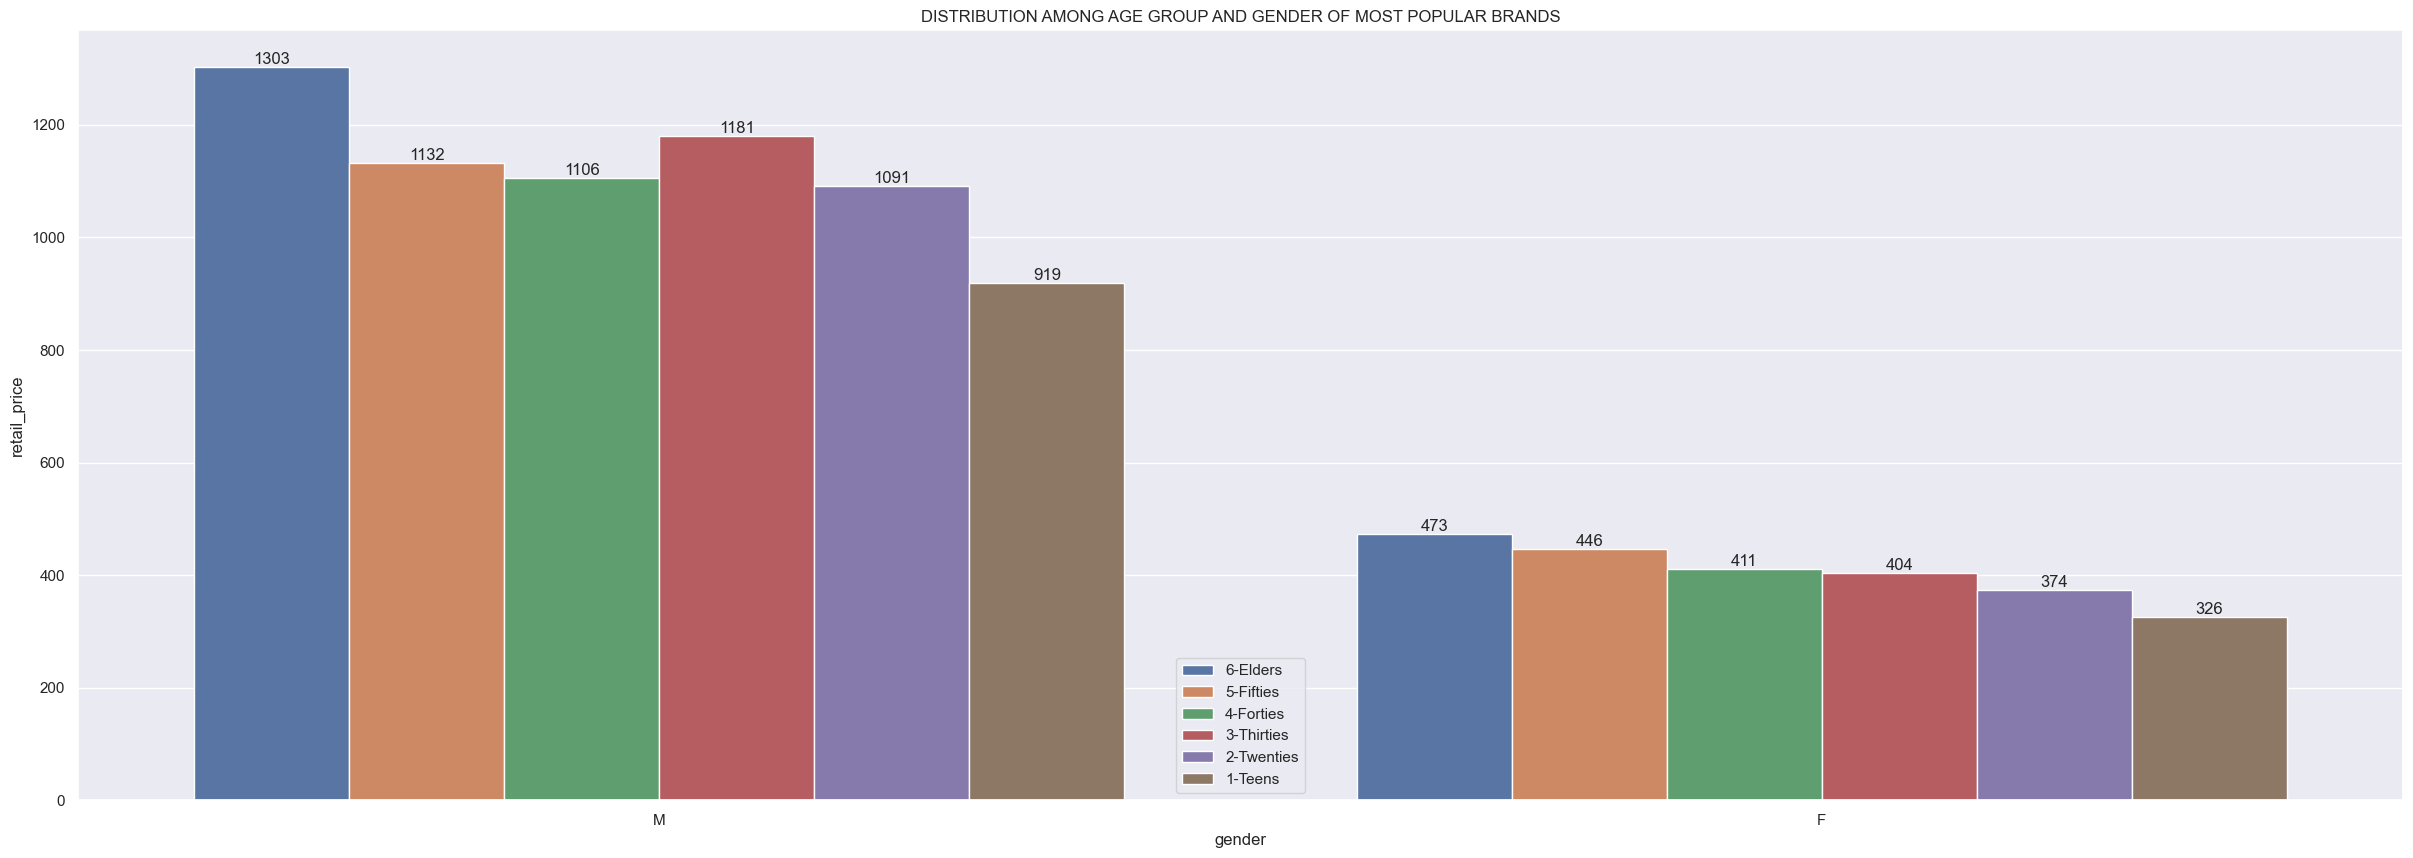

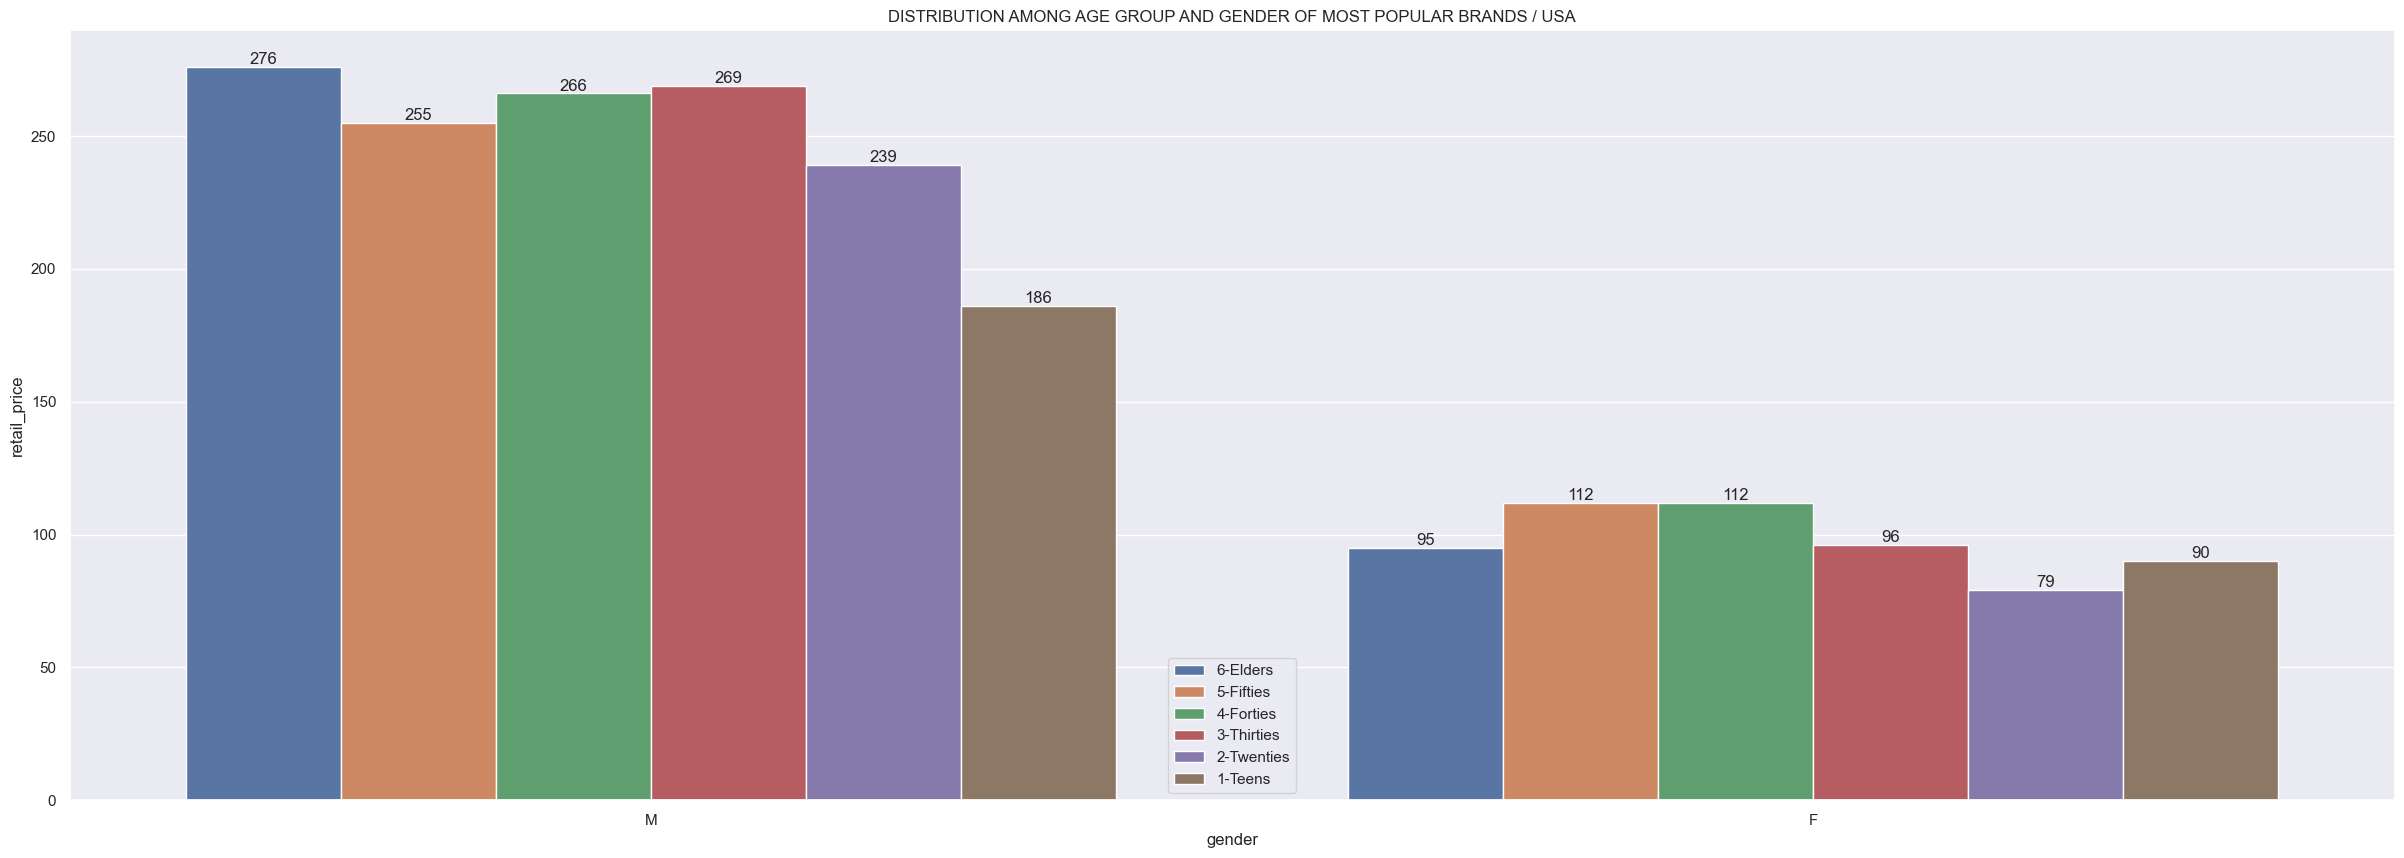

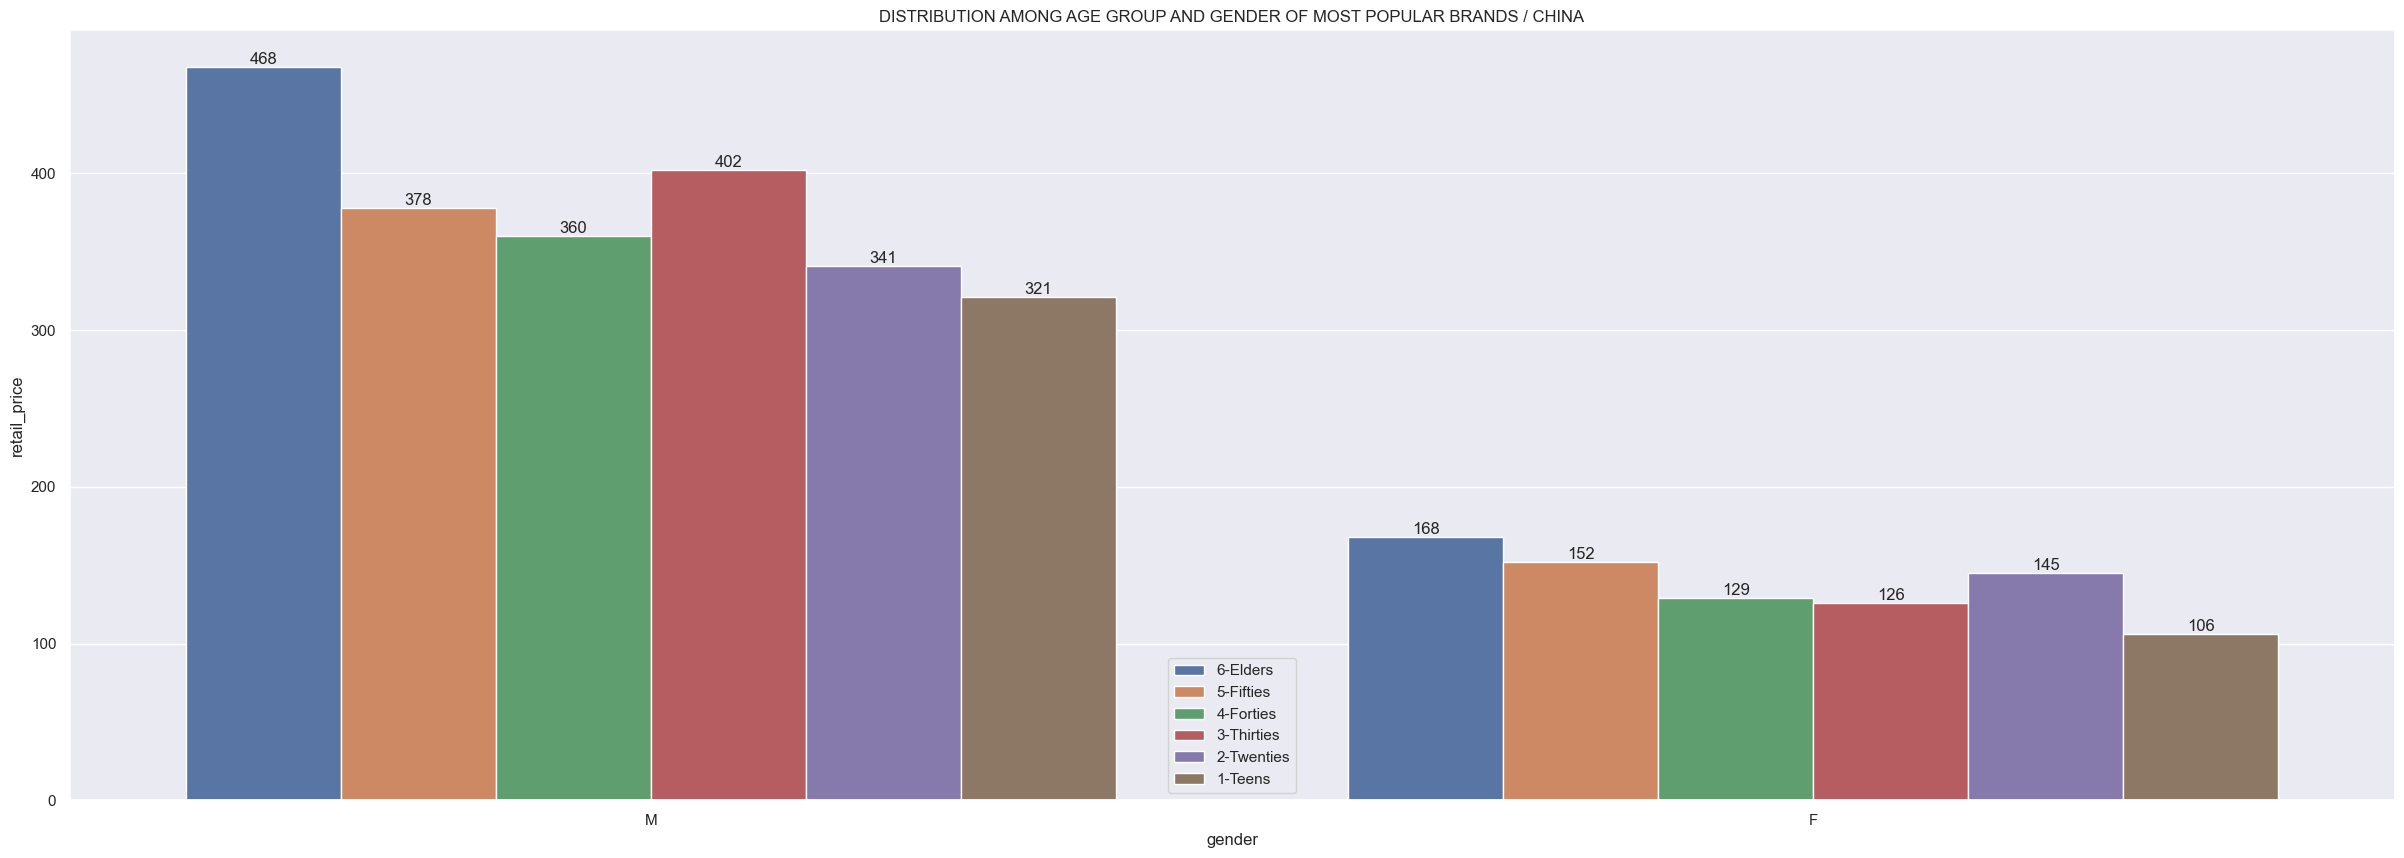

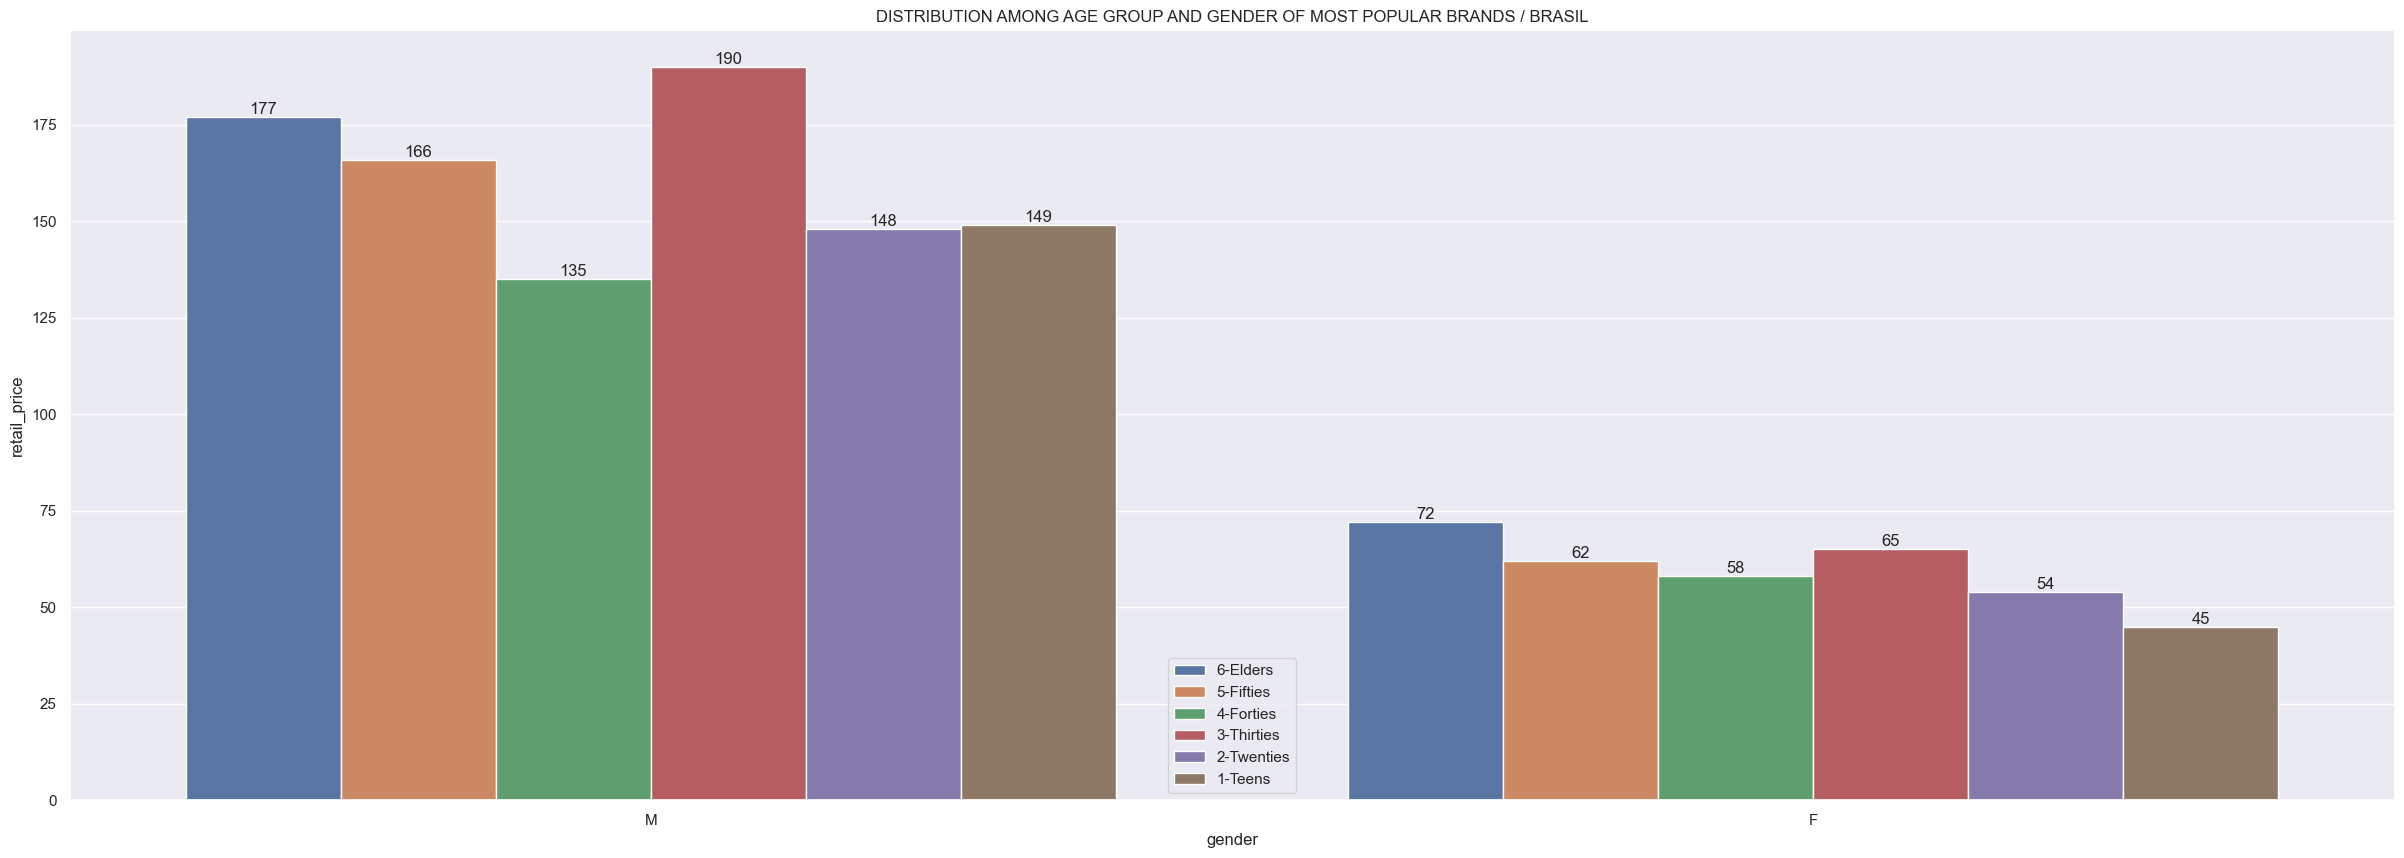

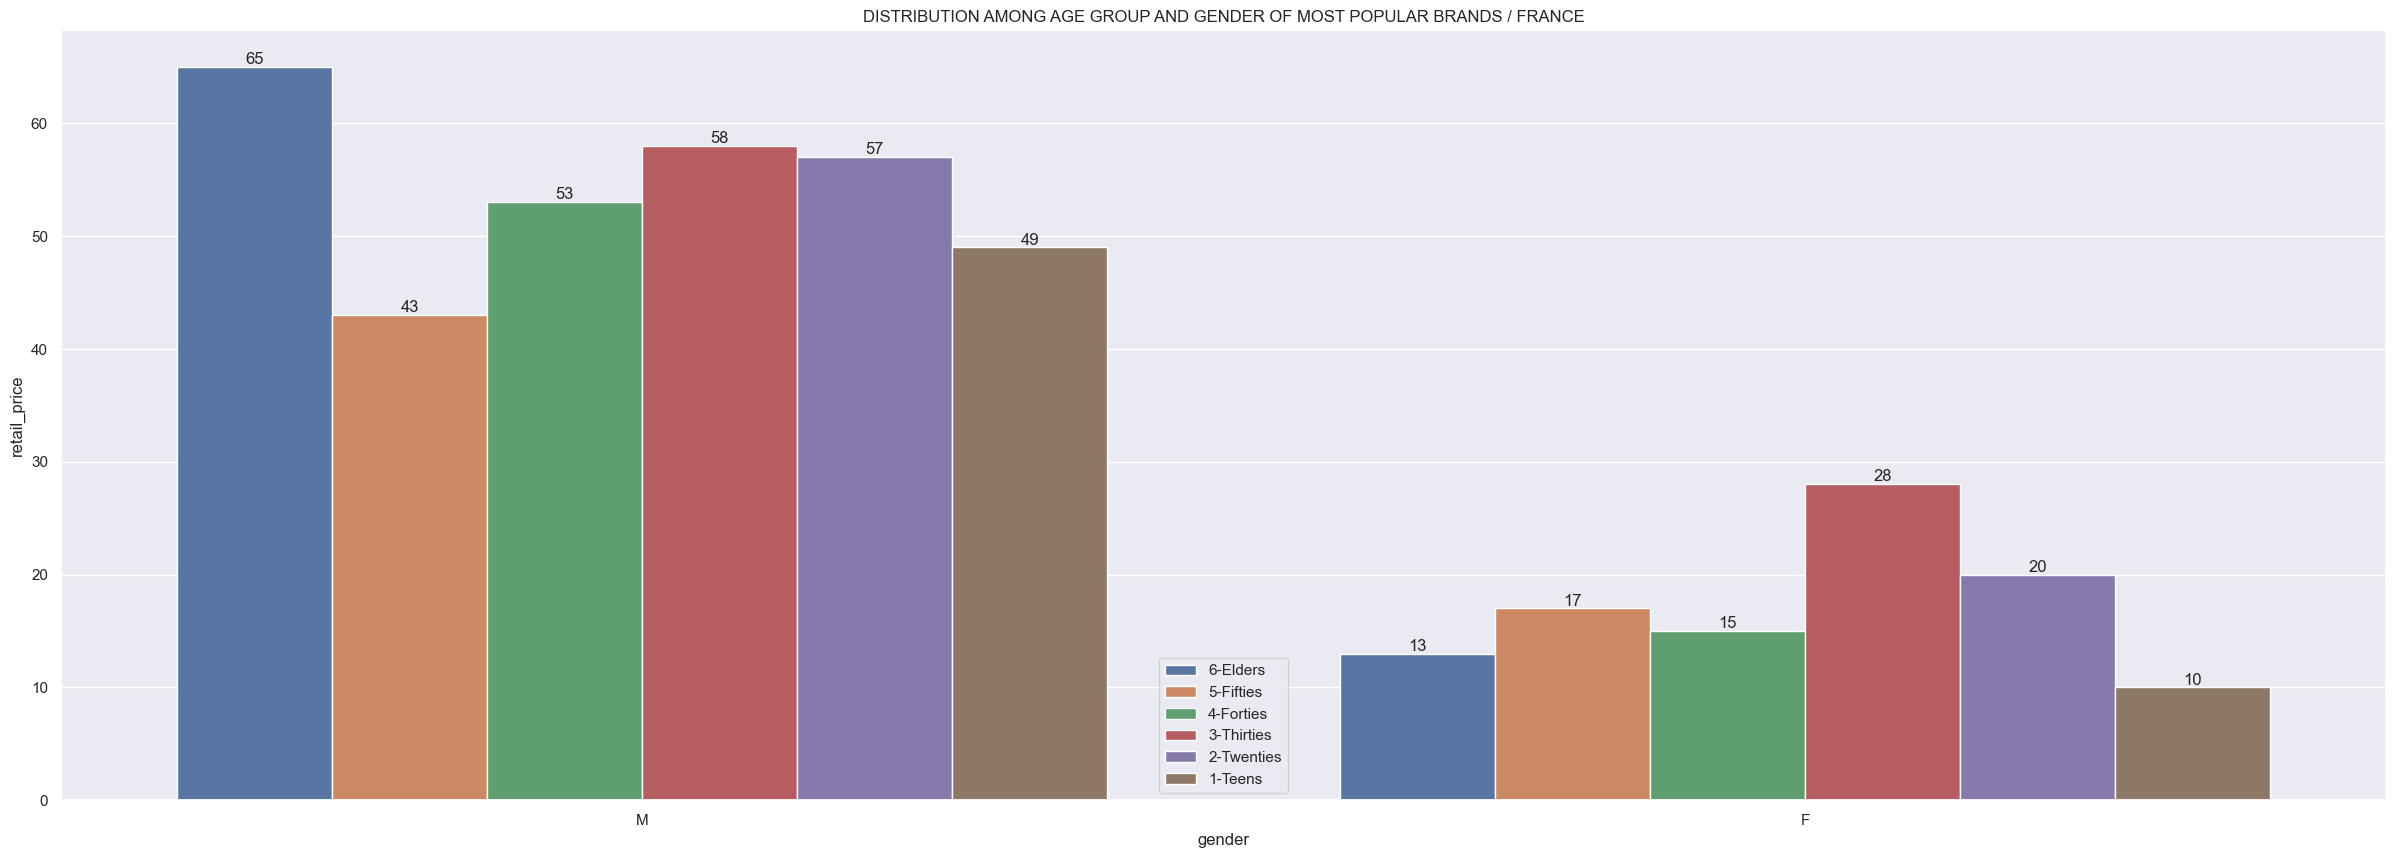

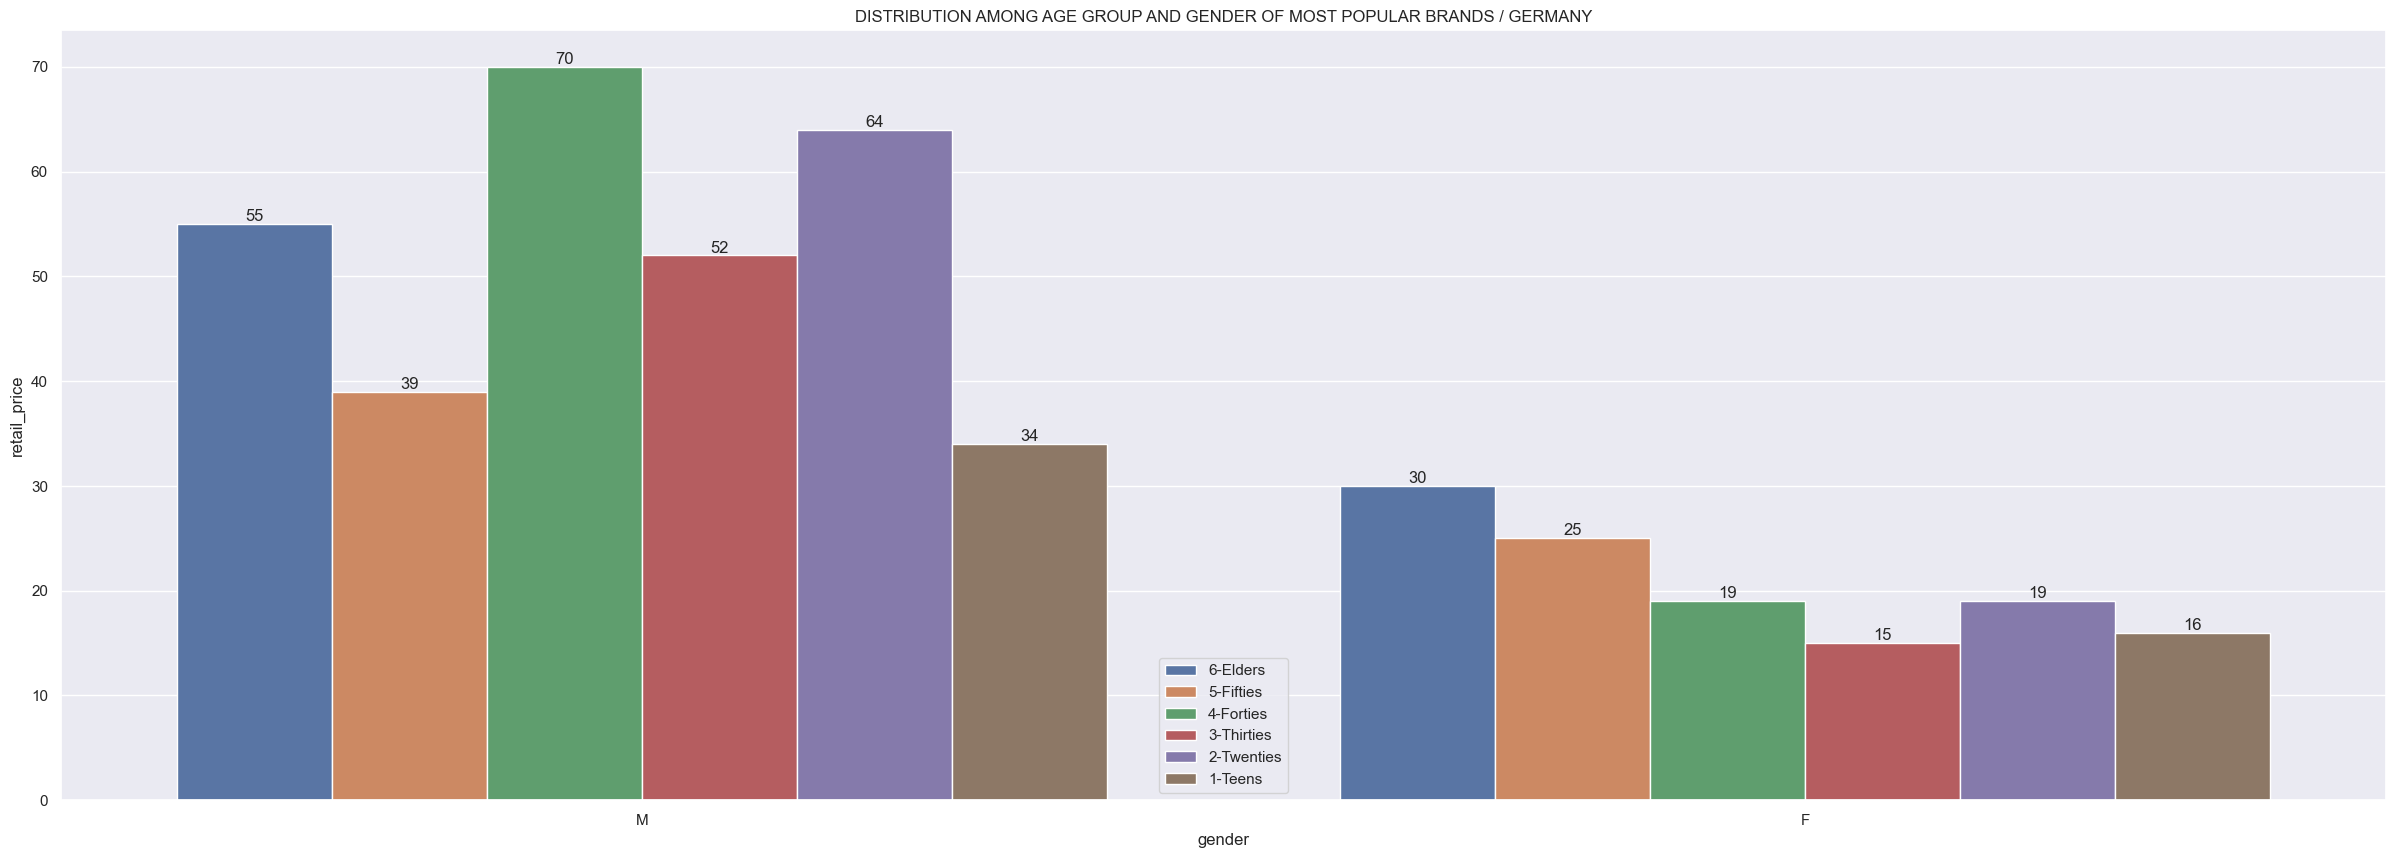

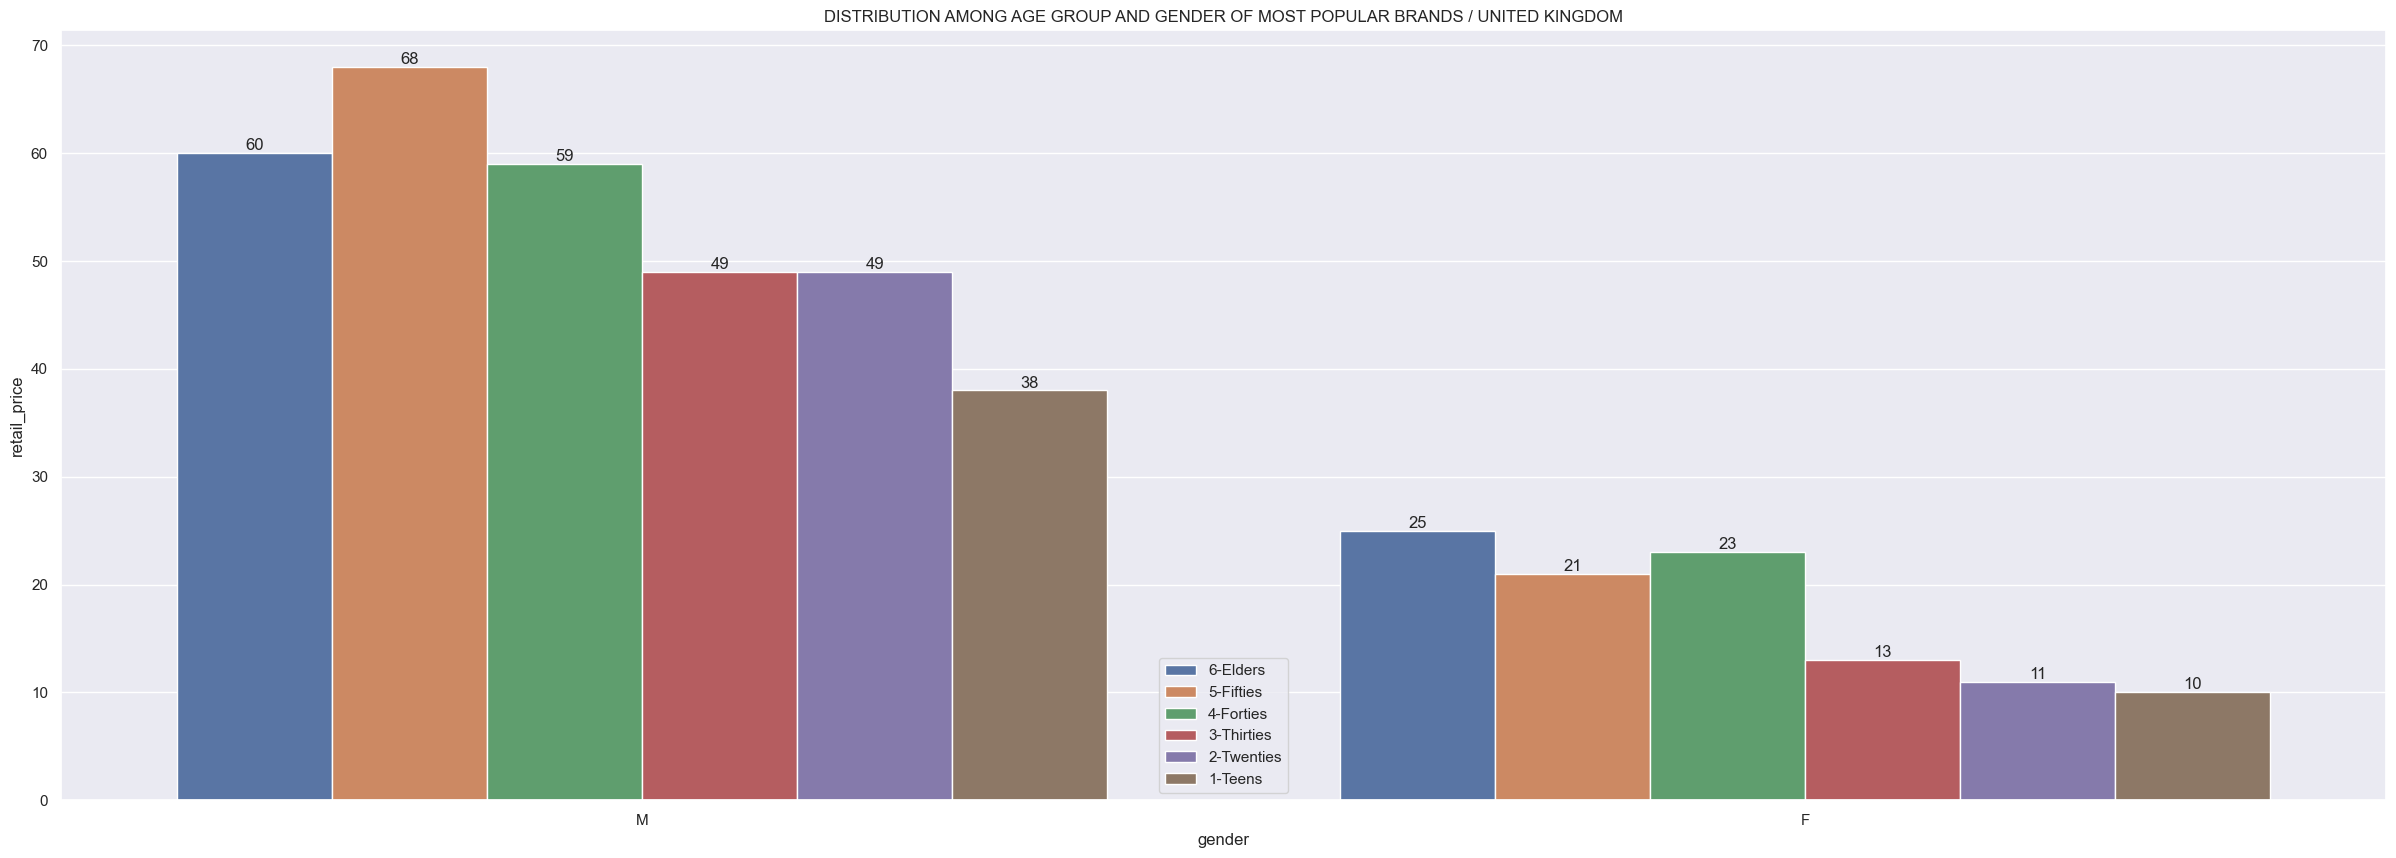

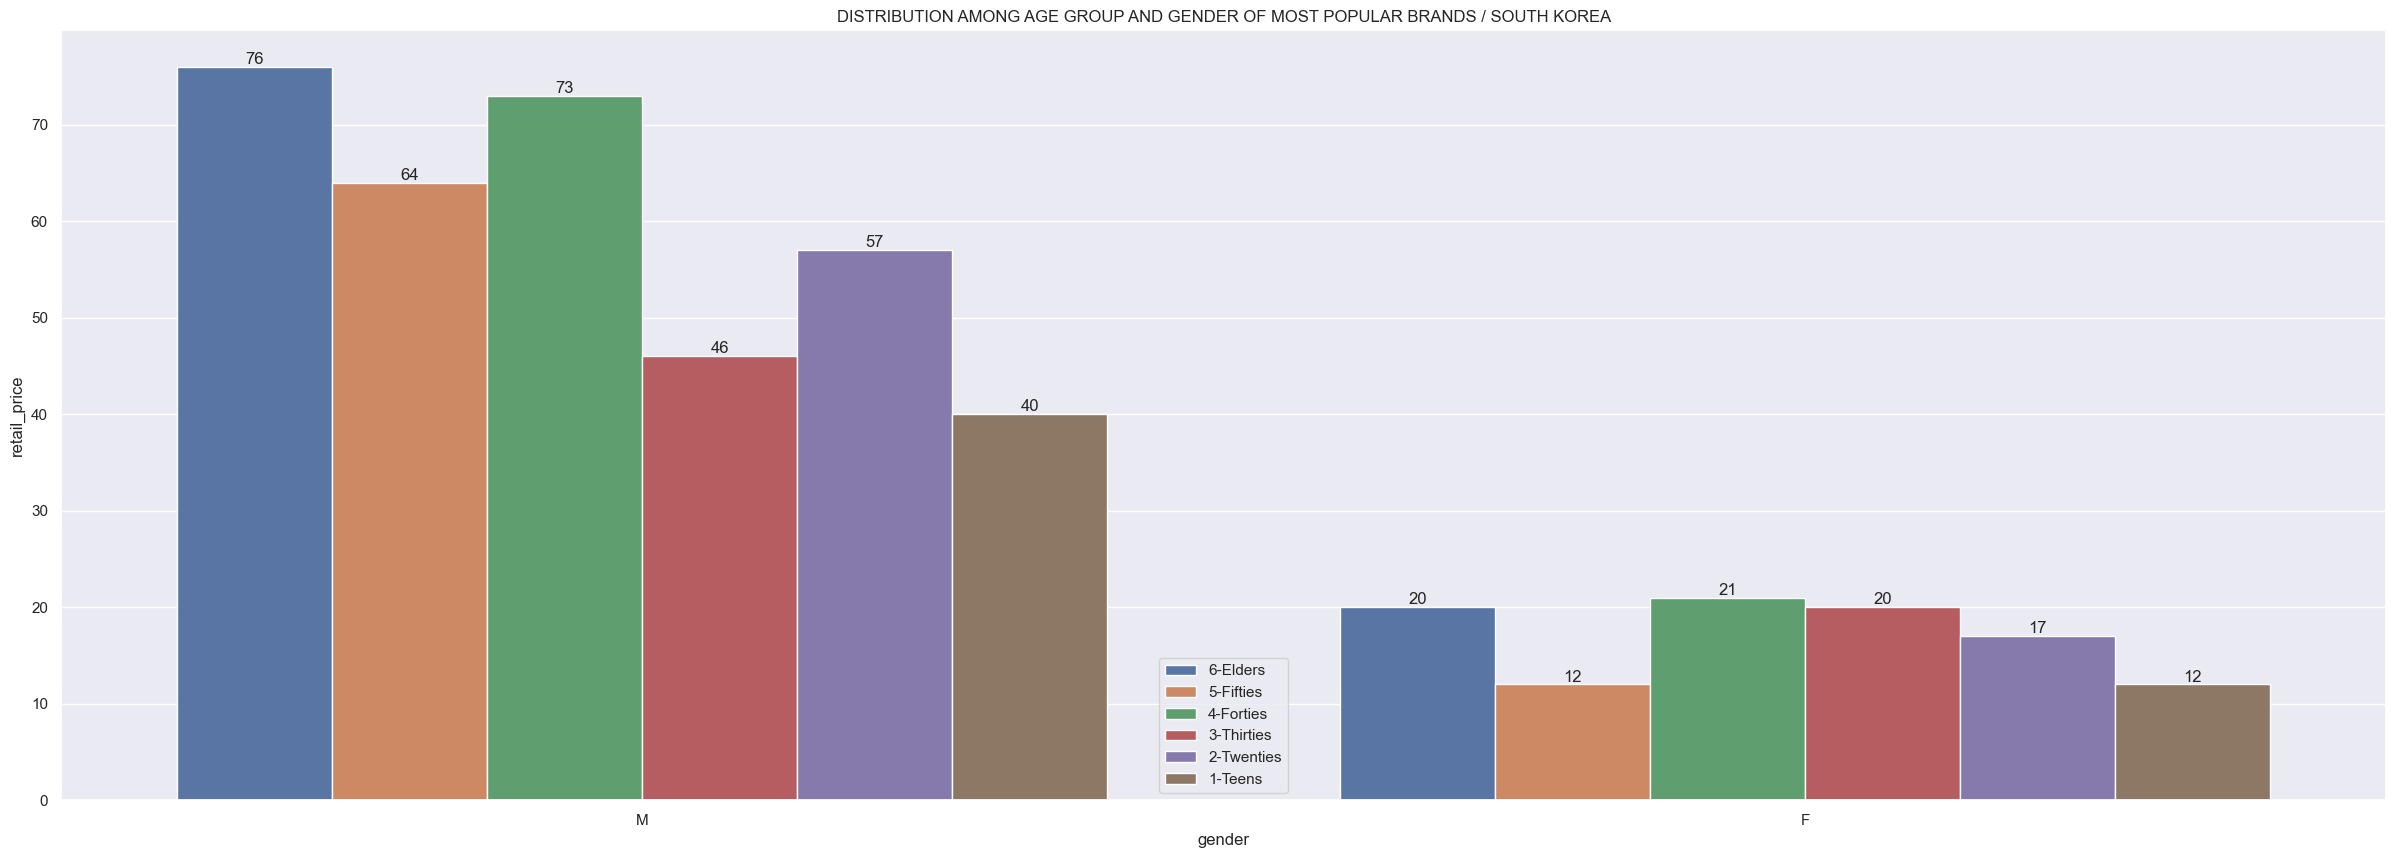

In [381]:
count_10 = 0

country_brand_retail_price = products_users_clean[["country","brand","retail_price"]].groupby(["country","brand"],as_index=False).agg({'retail_price': 'sum'}).sort_values(["country","retail_price"], ascending=False)

print(country_brand_retail_price[country_brand_retail_price["country"]=="China"])
print(country_brand_retail_price[country_brand_retail_price["country"]=="Brasil"])
print(country_brand_retail_price[country_brand_retail_price["country"]=="France"])
print(country_brand_retail_price[country_brand_retail_price["country"]=="Germany"])
print(country_brand_retail_price[country_brand_retail_price["country"]=="United Kingdom"])

# USA: Calvin Klein 46106.91, Carhartt 44481.32, Diesel 41965.20
# CHINA: Calvin Klein 67841.21, True Religion 65870.56, Diesel  65027.07
# BRASIL: True Religion  28911.58, Calvin Klein 27747.98, 7 For All Mankind 25725.37
# FRANCE: 7 For All Mankind 9634.13, Diesel 9255.42,  Carhartt 9006.45
# GERMANY: Calvin Klein 9865.88, Diesel 9799.60, True Religion 8521.74
# UNITED KINGDOM: Calvin Klein  10649.82, Diesel 9291.67, 7 For All Mankind 7491.18

country_retail_popular_brands = products_users_clean[products_users_clean.brand.isin(["Calvin Klein","Diesel","Carhartt","True Religion","7 For All Mankind"])][["gender","age_group","retail_price"]].groupby(["gender","age_group"],as_index=False).agg({'retail_price': 'count'}).sort_values(["gender","age_group"], ascending=False)
country_retail_popular_brands_us = products_users_clean[(products_users_clean.country=="United States")&(products_users_clean.brand.isin(["Calvin Klein","Diesel","Carhartt","True Religion","7 For All Mankind"]))][["gender","age_group","retail_price"]].groupby(["gender","age_group"],as_index=False).agg({'retail_price': 'count'}).sort_values(["gender","age_group"], ascending=False)
country_retail_popular_brands_ch = products_users_clean[(products_users_clean.country=="China")&(products_users_clean.brand.isin(["Calvin Klein","Diesel","Carhartt","True Religion","7 For All Mankind"]))][["gender","age_group","retail_price"]].groupby(["gender","age_group"],as_index=False).agg({'retail_price': 'count'}).sort_values(["gender","age_group"], ascending=False)
country_retail_popular_brands_br = products_users_clean[(products_users_clean.country=="Brasil")&(products_users_clean.brand.isin(["Calvin Klein","Diesel","Carhartt","True Religion","7 For All Mankind"]))][["gender","age_group","retail_price"]].groupby(["gender","age_group"],as_index=False).agg({'retail_price': 'count'}).sort_values(["gender","age_group"], ascending=False)
country_retail_popular_brands_fr = products_users_clean[(products_users_clean.country=="France")&(products_users_clean.brand.isin(["Calvin Klein","Diesel","Carhartt","True Religion","7 For All Mankind"]))][["gender","age_group","retail_price"]].groupby(["gender","age_group"],as_index=False).agg({'retail_price': 'count'}).sort_values(["gender","age_group"], ascending=False)
country_retail_popular_brands_ge = products_users_clean[(products_users_clean.country=="Germany")&(products_users_clean.brand.isin(["Calvin Klein","Diesel","Carhartt","True Religion","7 For All Mankind"]))][["gender","age_group","retail_price"]].groupby(["gender","age_group"],as_index=False).agg({'retail_price': 'count'}).sort_values(["gender","age_group"], ascending=False)
country_retail_popular_brands_uk = products_users_clean[(products_users_clean.country=="United Kingdom")&(products_users_clean.brand.isin(["Calvin Klein","Diesel","Carhartt","True Religion","7 For All Mankind"]))][["gender","age_group","retail_price"]].groupby(["gender","age_group"],as_index=False).agg({'retail_price': 'count'}).sort_values(["gender","age_group"], ascending=False)
country_retail_popular_brands_sk = products_users_clean[(products_users_clean.country=="South Korea")&(products_users_clean.brand.isin(["Calvin Klein","Diesel","Carhartt","True Religion","7 For All Mankind"]))][["gender","age_group","retail_price"]].groupby(["gender","age_group"],as_index=False).agg({'retail_price': 'count'}).sort_values(["gender","age_group"], ascending=False)

# ALL COUNTRIES
count_10+=1
fig = plt.figure(count_10)
fig.set(figheight=10,figwidth=30)
x = sns.barplot(country_retail_popular_brands, x="gender", y="retail_price", hue="age_group")
x.set_title("DISTRIBUTION AMONG AGE GROUP AND GENDER OF MOST POPULAR BRANDS")
plt.legend(loc='lower center')
for i in x.containers:
    x.bar_label(i,)

# USA
count_10+=1
fig = plt.figure(count_10)
fig.set(figheight=10,figwidth=30)
x = sns.barplot(country_retail_popular_brands_us, x="gender", y="retail_price", hue="age_group")
x.set_title("DISTRIBUTION AMONG AGE GROUP AND GENDER OF MOST POPULAR BRANDS / USA")
plt.legend(loc='lower center')
for i in x.containers:
    x.bar_label(i,)

# CHINA
count_10+=1
fig = plt.figure(count_10)
fig.set(figheight=10,figwidth=30)
x = sns.barplot(country_retail_popular_brands_ch, x="gender", y="retail_price", hue="age_group")
x.set_title("DISTRIBUTION AMONG AGE GROUP AND GENDER OF MOST POPULAR BRANDS / CHINA")
plt.legend(loc='lower center')
for i in x.containers:
    x.bar_label(i,)

# BRASIL
count_10+=1
fig = plt.figure(count_10)
fig.set(figheight=10,figwidth=30)
x = sns.barplot(country_retail_popular_brands_br, x="gender", y="retail_price", hue="age_group")
x.set_title("DISTRIBUTION AMONG AGE GROUP AND GENDER OF MOST POPULAR BRANDS / BRASIL")
plt.legend(loc='lower center')
for i in x.containers:
    x.bar_label(i,)

# FRANCE
count_10+=1
fig = plt.figure(count_10)
fig.set(figheight=10,figwidth=30)
x = sns.barplot(country_retail_popular_brands_fr, x="gender", y="retail_price", hue="age_group")
x.set_title("DISTRIBUTION AMONG AGE GROUP AND GENDER OF MOST POPULAR BRANDS / FRANCE")
plt.legend(loc='lower center')
for i in x.containers:
    x.bar_label(i,)

# GERMANY
count_10+=1
fig = plt.figure(count_10)
fig.set(figheight=10,figwidth=30)
x = sns.barplot(country_retail_popular_brands_ge, x="gender", y="retail_price", hue="age_group")
x.set_title("DISTRIBUTION AMONG AGE GROUP AND GENDER OF MOST POPULAR BRANDS / GERMANY")
plt.legend(loc='lower center')
for i in x.containers:
    x.bar_label(i,)

# UNITED KINGDOM
count_10+=1
fig = plt.figure(count_10)
fig.set(figheight=10,figwidth=30)
x = sns.barplot(country_retail_popular_brands_uk, x="gender", y="retail_price", hue="age_group")
x.set_title("DISTRIBUTION AMONG AGE GROUP AND GENDER OF MOST POPULAR BRANDS / UNITED KINGDOM")
plt.legend(loc='lower center')
for i in x.containers:
    x.bar_label(i,)

# SOUTH KOREA
count_10+=1
fig = plt.figure(count_10)
fig.set(figheight=10,figwidth=30)
x = sns.barplot(country_retail_popular_brands_sk, x="gender", y="retail_price", hue="age_group")
x.set_title("DISTRIBUTION AMONG AGE GROUP AND GENDER OF MOST POPULAR BRANDS / SOUTH KOREA")
plt.legend(loc='lower center')
for i in x.containers:
    x.bar_label(i,)


# 11. 1000 most worth clients and 1000 top in terms of orders and 1000 in terms of time.

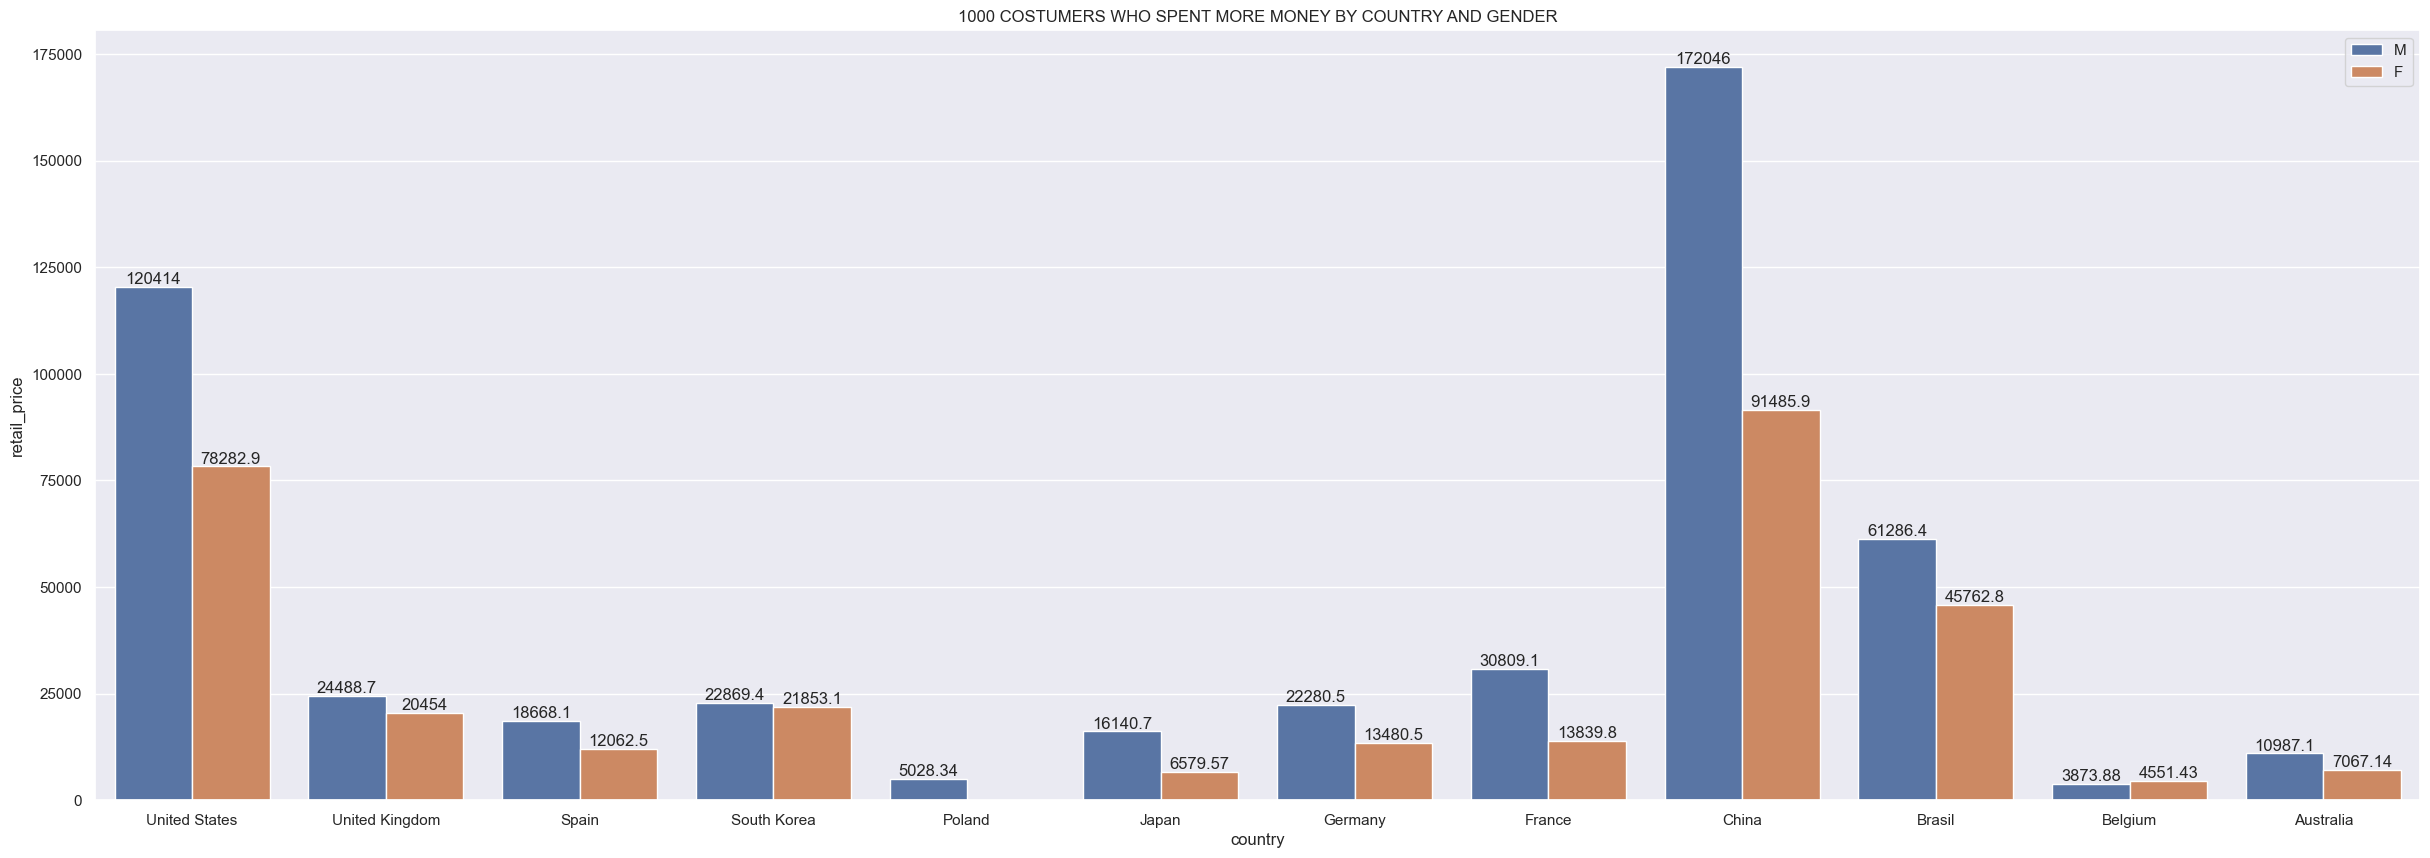

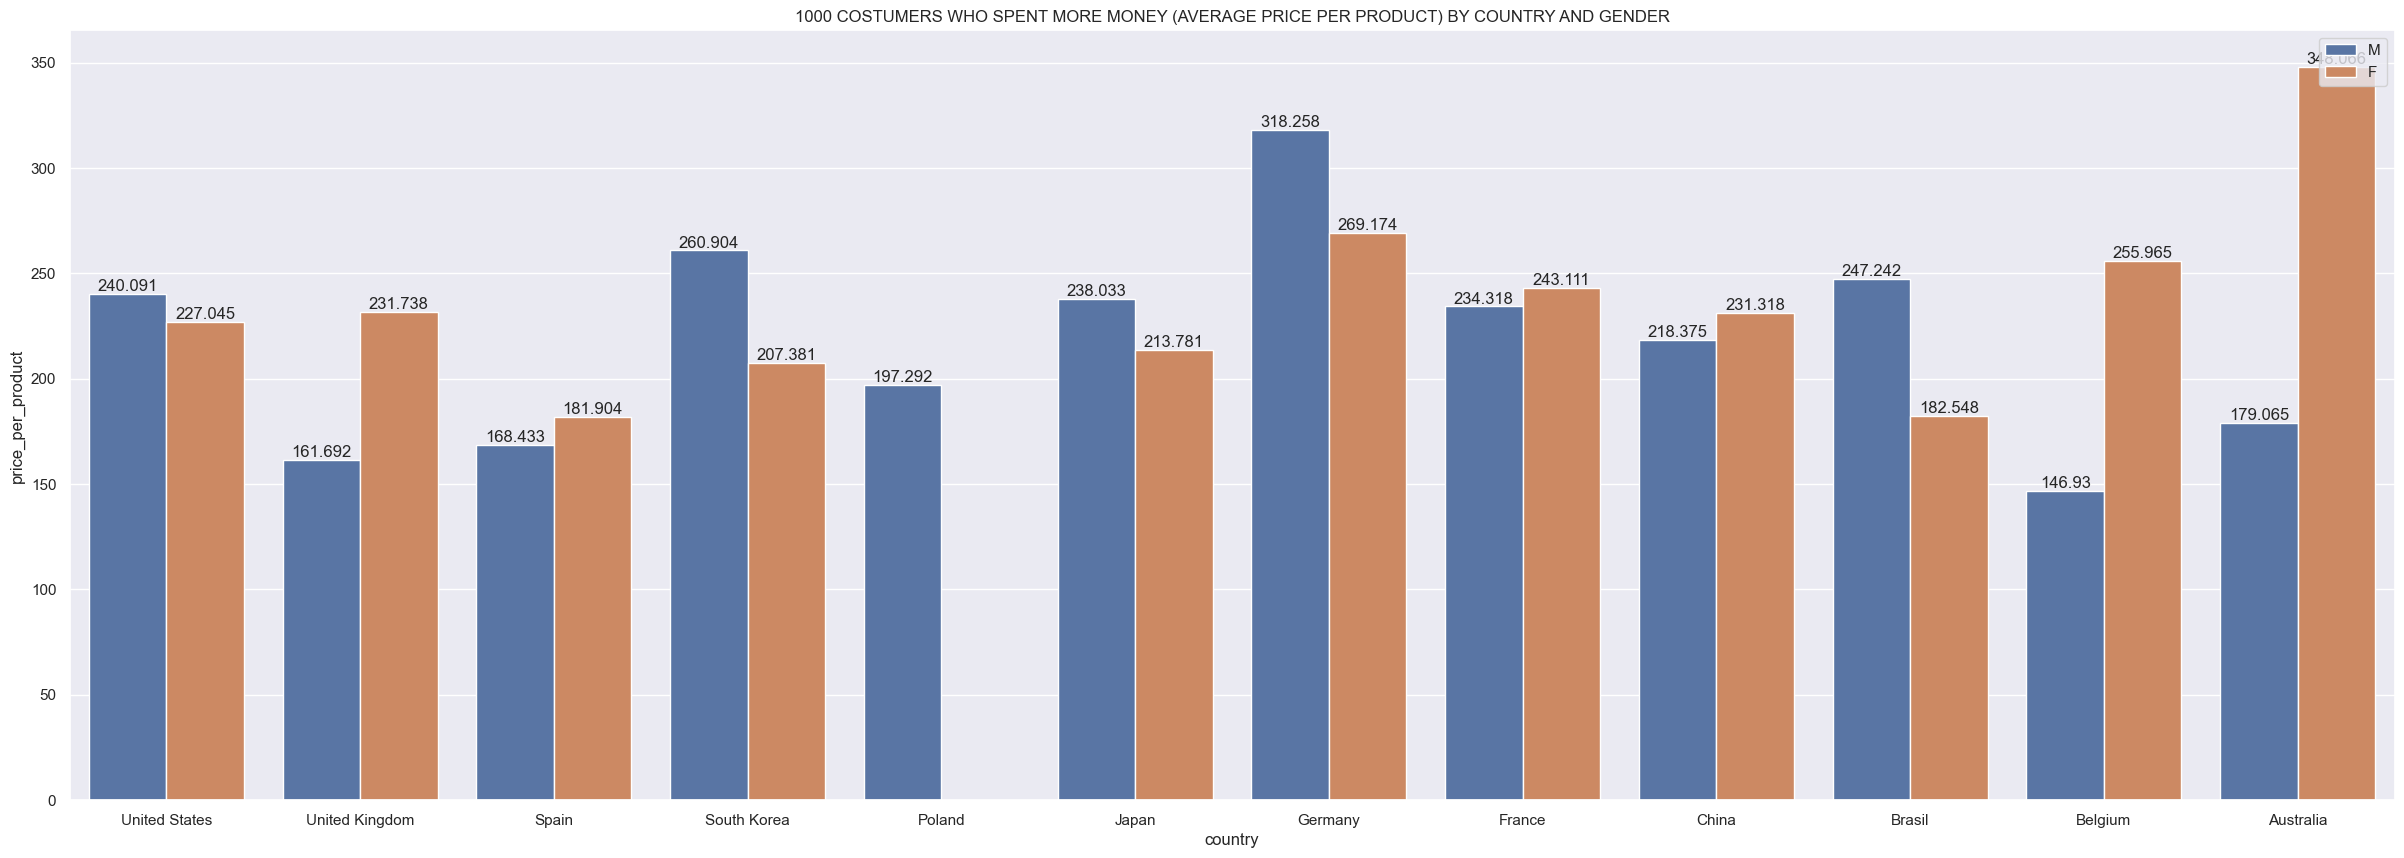

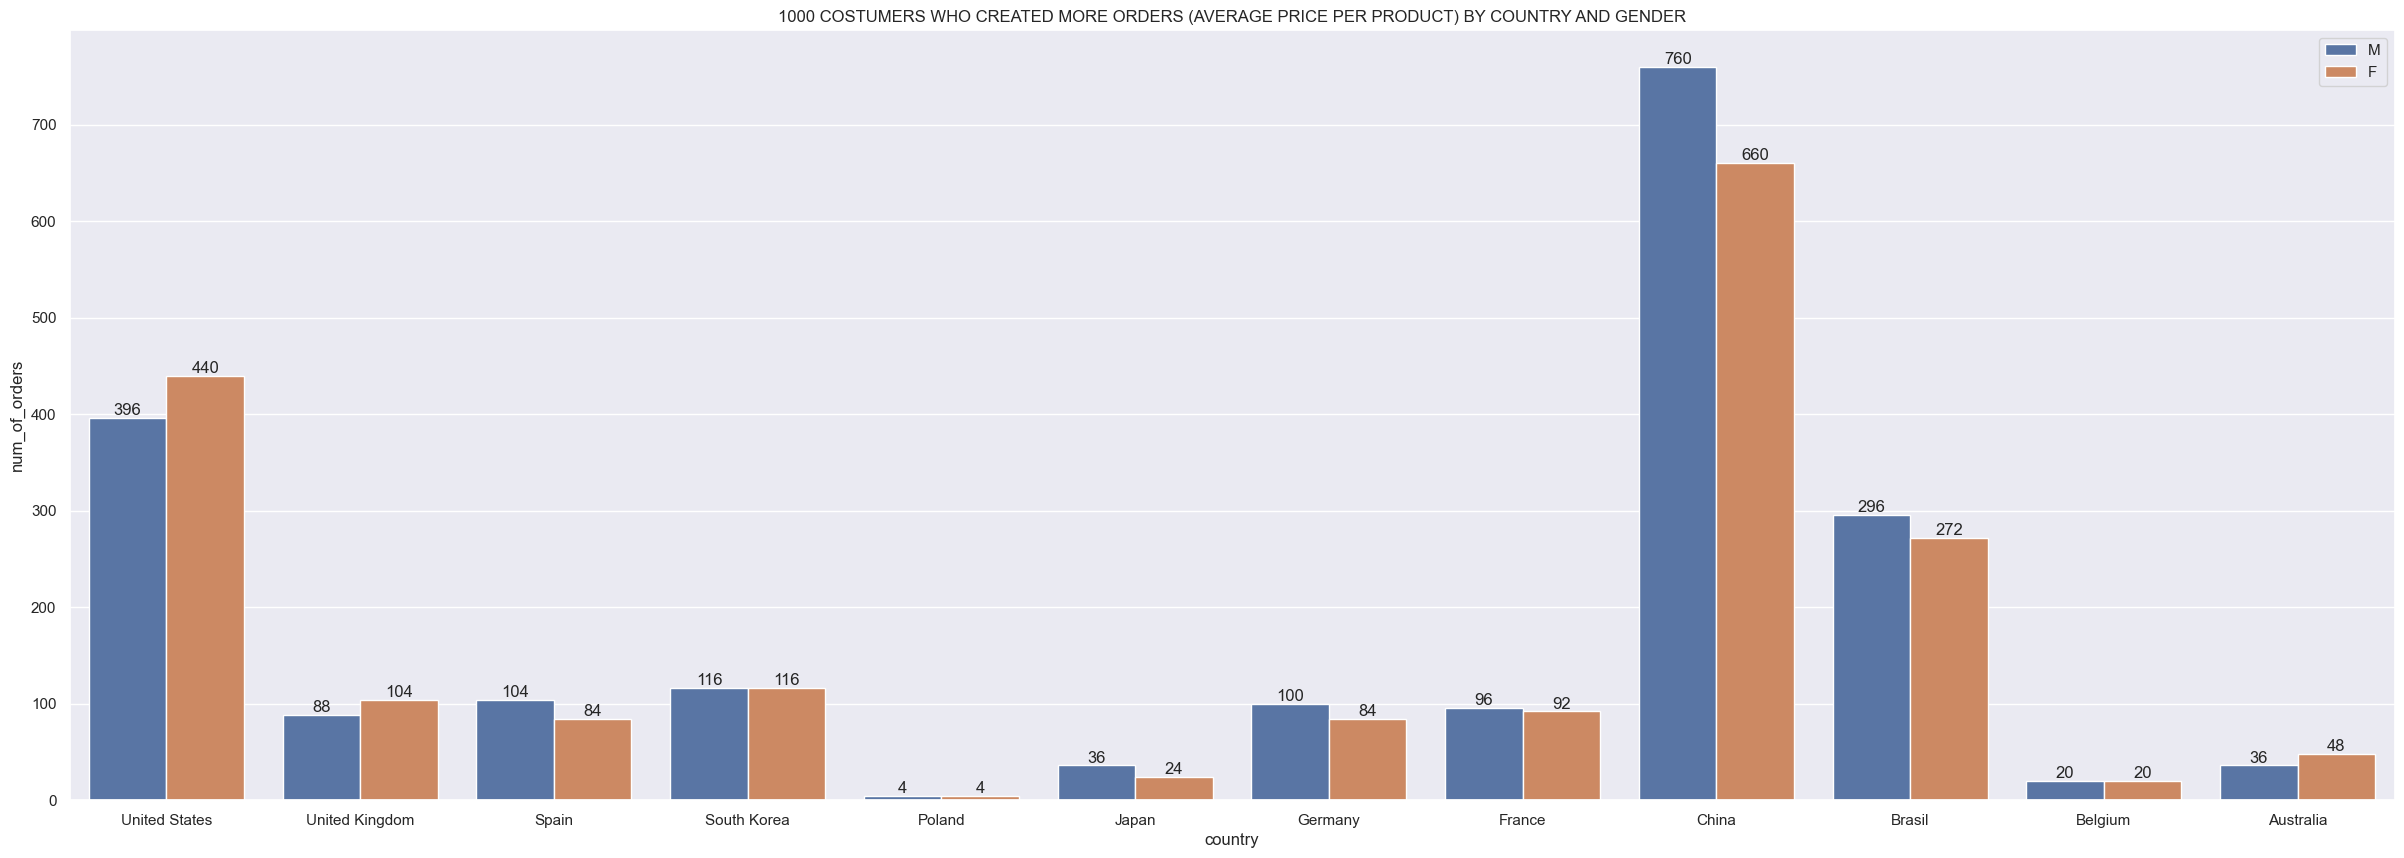

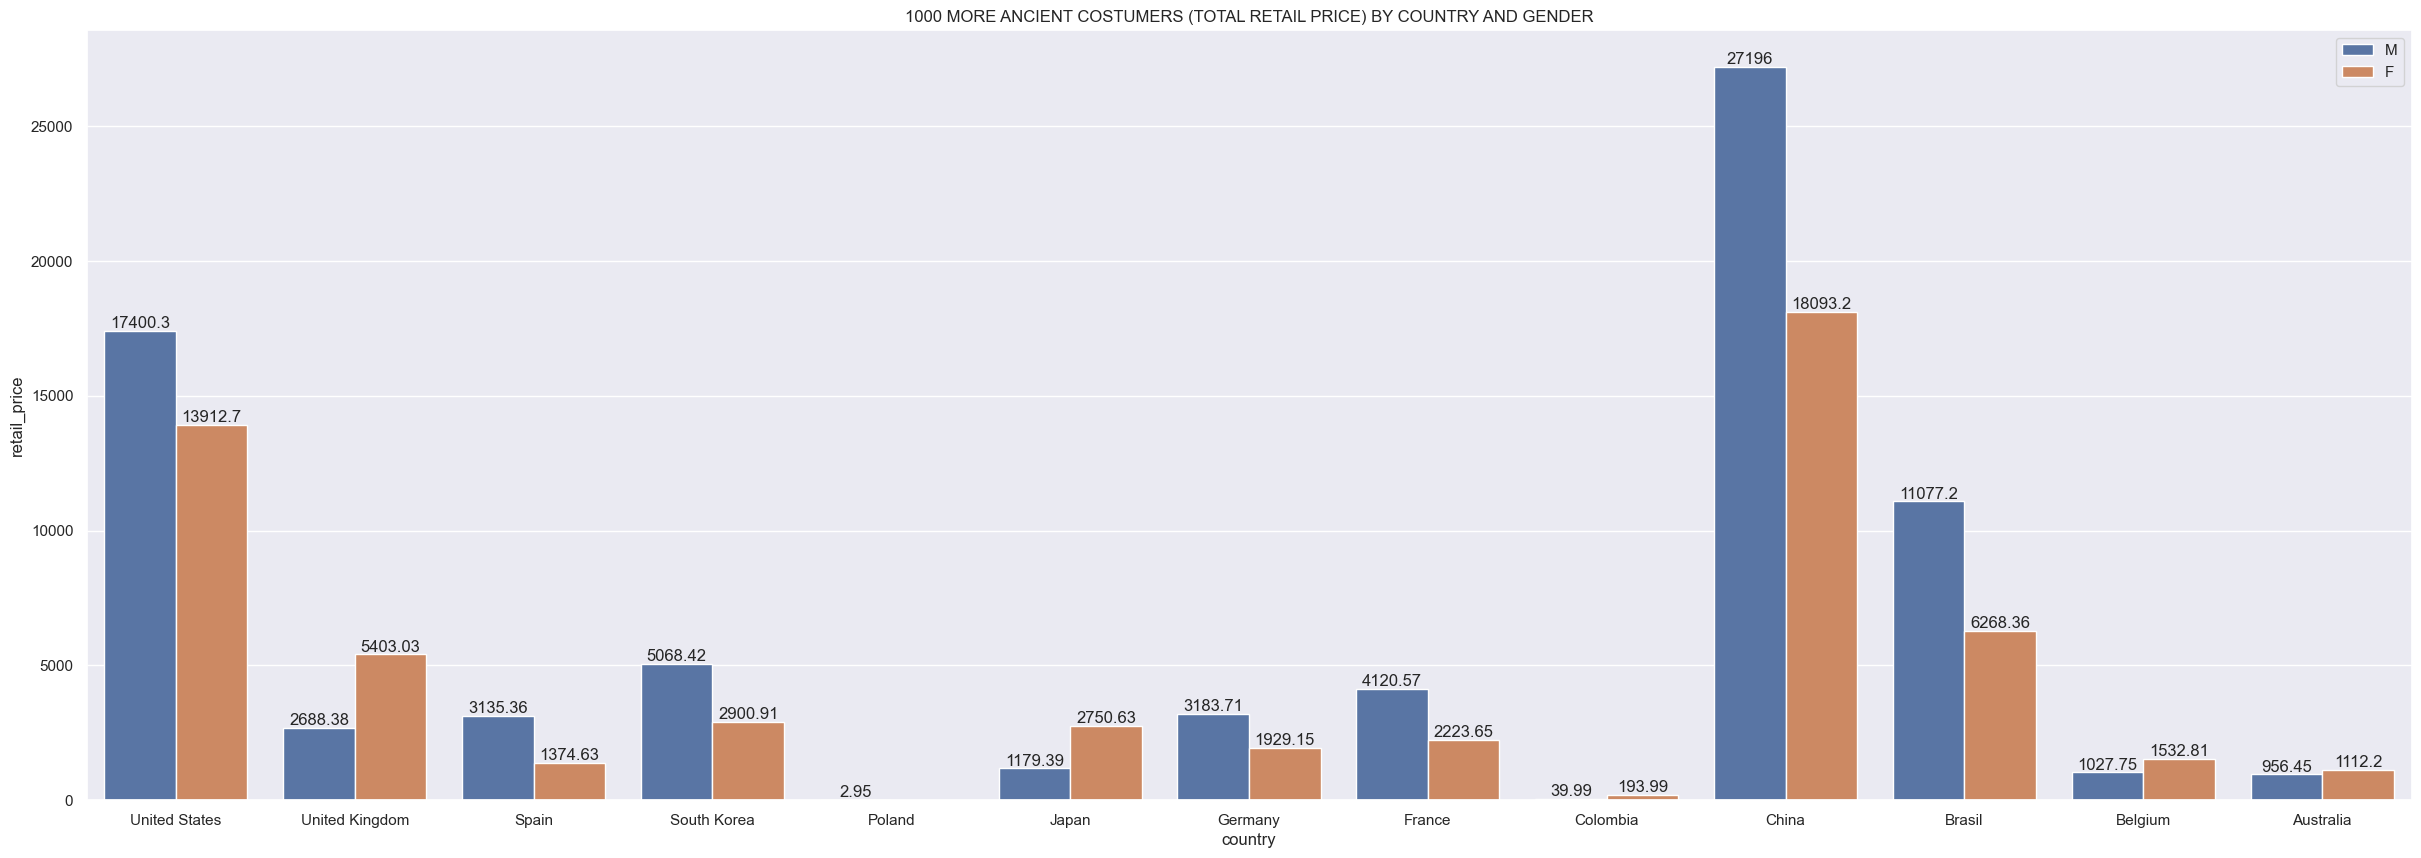

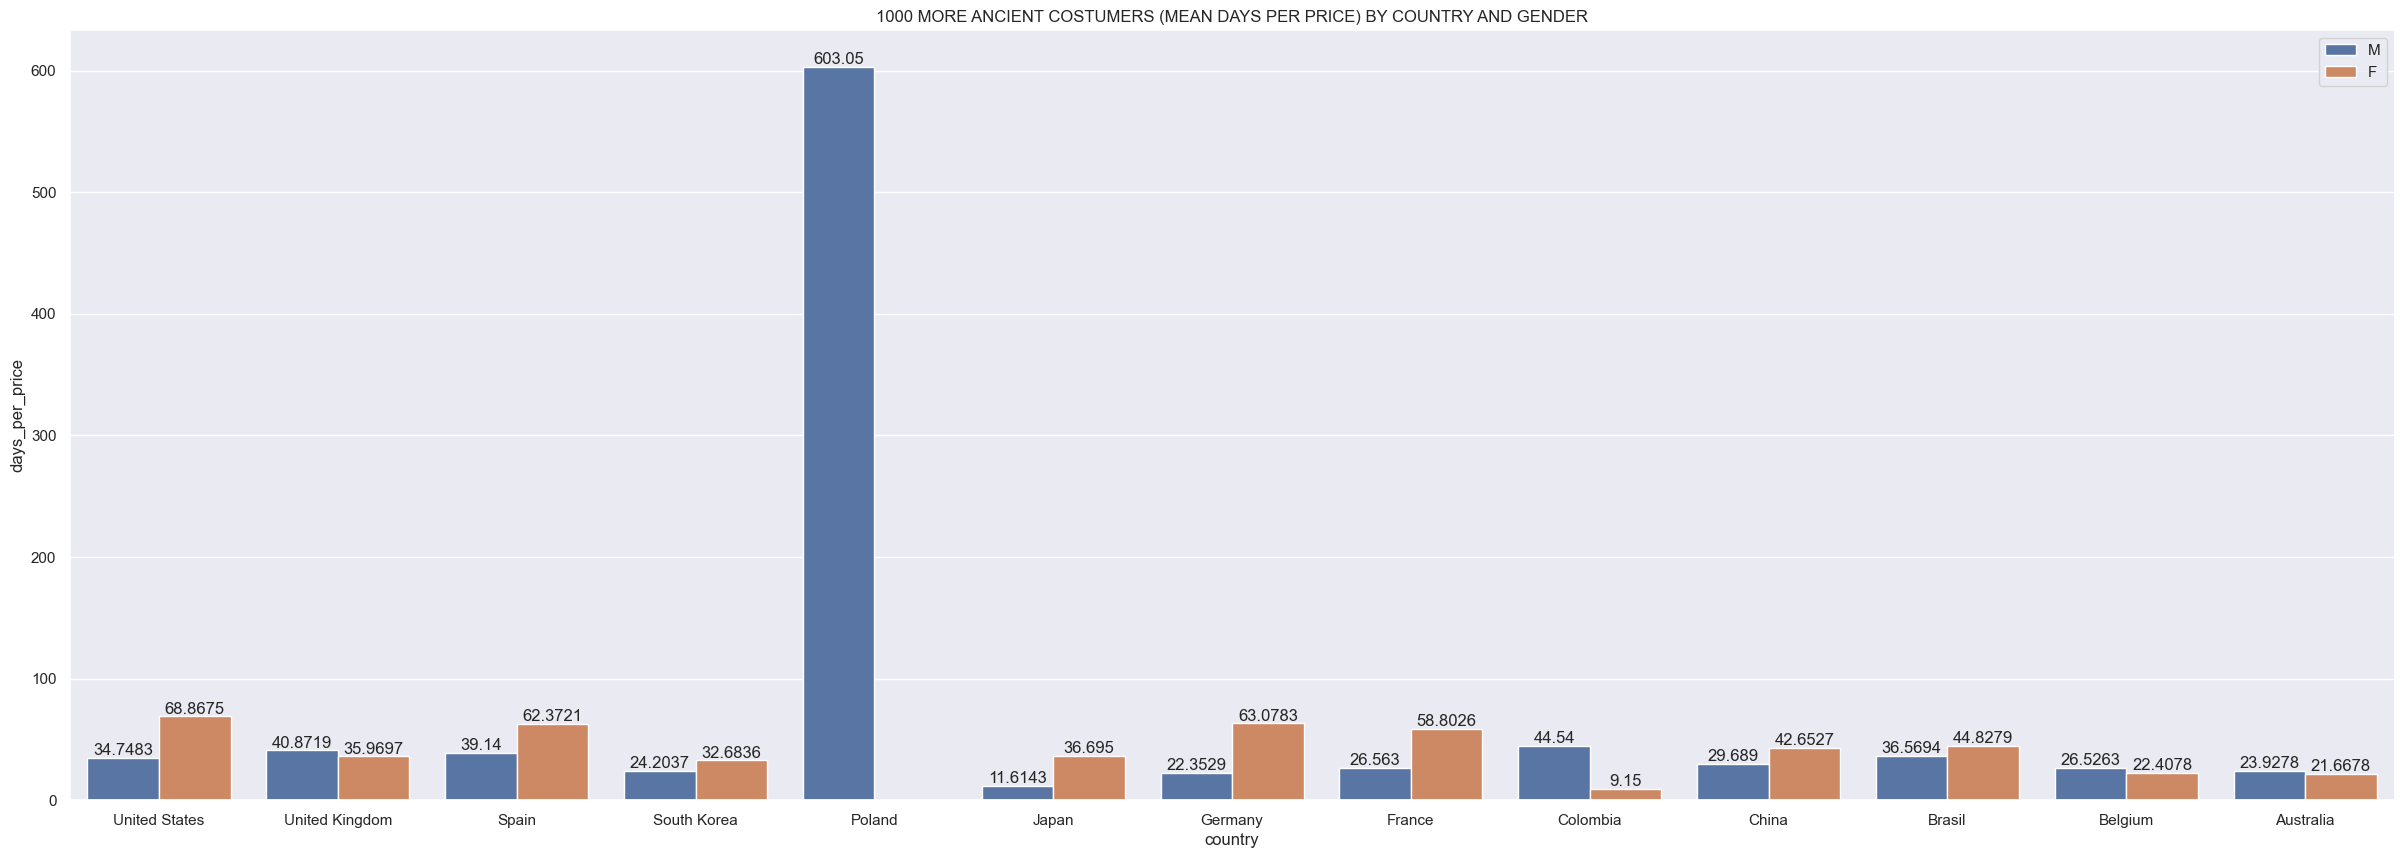

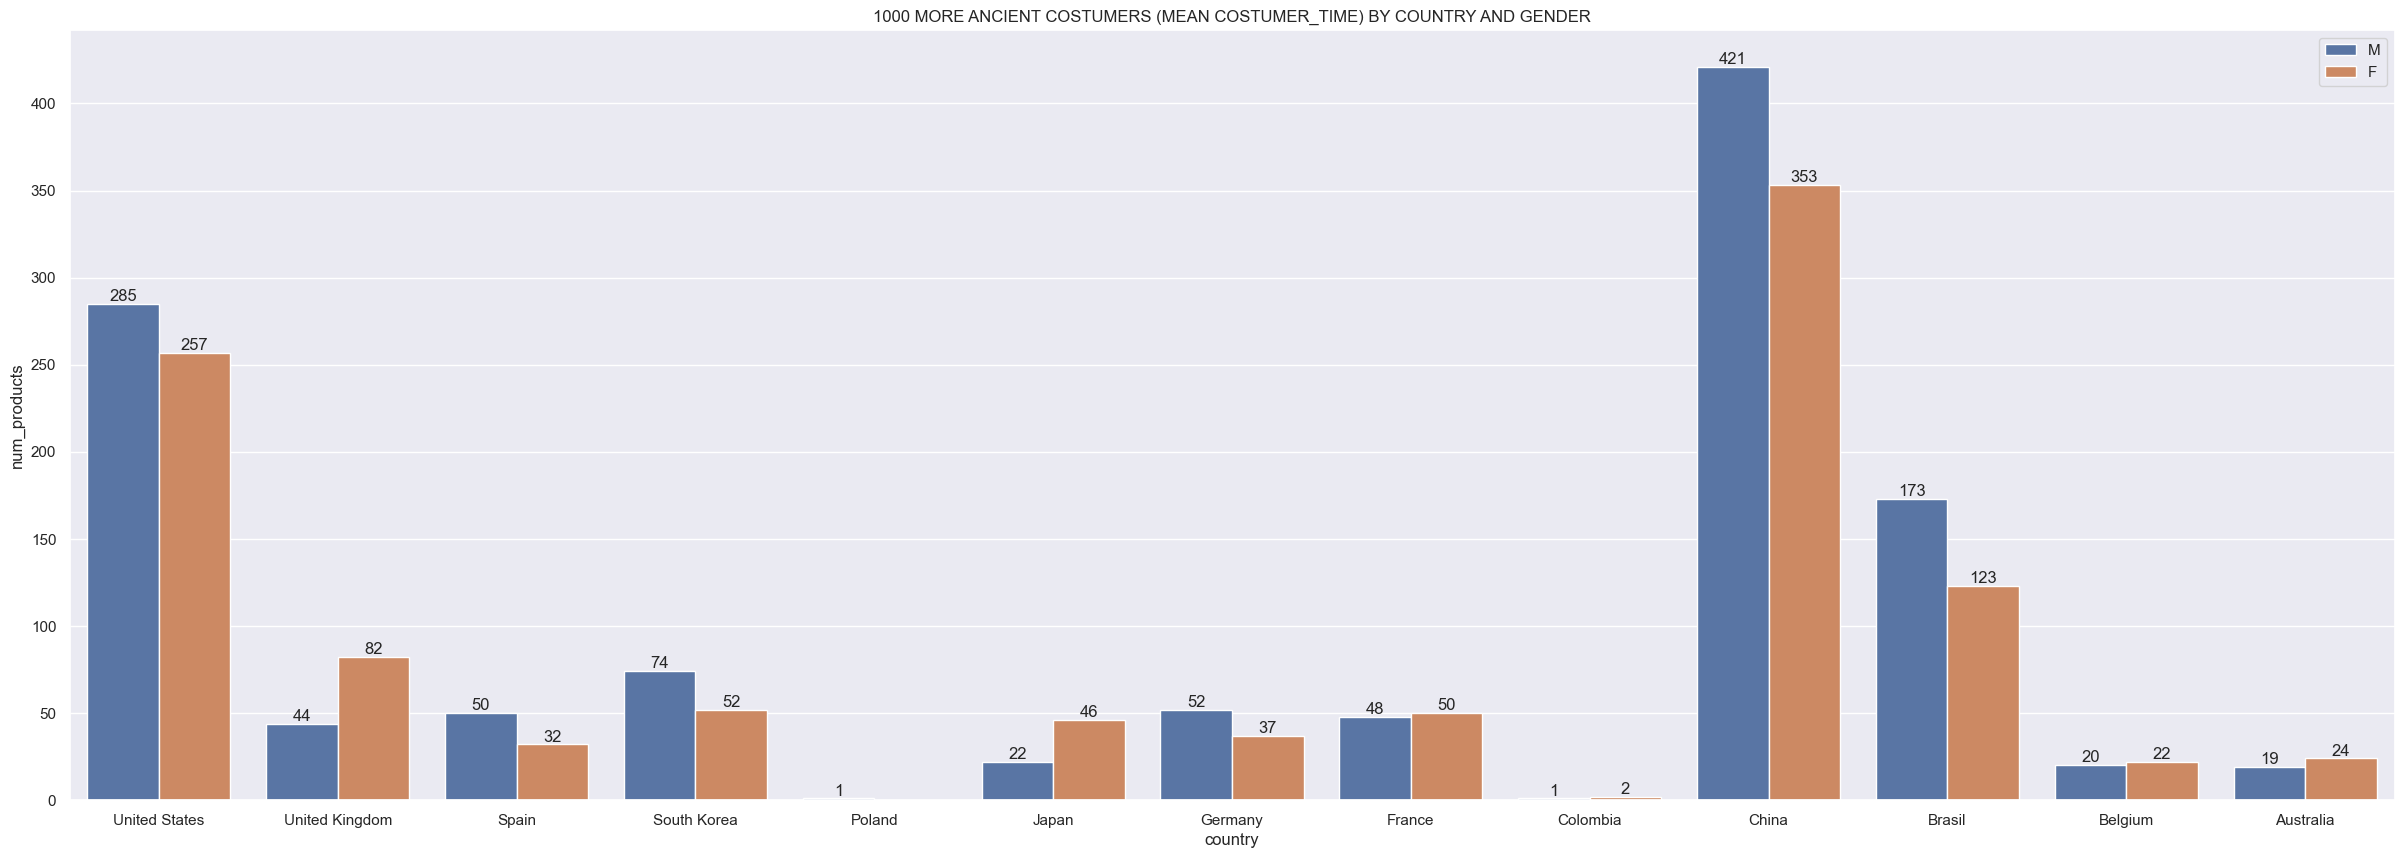

In [354]:
count_11 = 0

orders_item_users_clean = pd.merge(orders_users_clean, products_users, on='order_id', how='inner')
orders_item_users_clean = orders_item_users_clean[["order_id","user_id_x","num_of_item","order_created_at","gender","user_created_at","age_group","category","brand","costumer_time","country","retail_price"]]
orders_item_users_clean.rename(columns={"user_id_x": "user_id"}, inplace=True)

data_11 = orders_item_users_clean[["user_id","country","retail_price","order_id","costumer_time","age_group","gender"]].groupby(["user_id"],as_index=False).agg({'country': 'max' ,'retail_price': 'sum', 'order_id': 'count', 
                                          'costumer_time':'max', 'age_group': 'max', 'gender':'max'}).sort_values(["retail_price"], ascending=False)
data_11.rename(columns={"order_id": "num_products"}, inplace=True)
clients_retail_price_1000=data_11.head(1000)
clients_retail_price_1000["price_per_product"] = round(clients_retail_price_1000["retail_price"] / clients_retail_price_1000["num_products"], 2)
clients_retail_price_1000["days_per_price"] = round(clients_retail_price_1000["costumer_time"] / clients_retail_price_1000["retail_price"], 2)

data_11_ = sum_orders_products_by_user.sort_values(["num_of_orders"], ascending=False)
clients_orders_1000=data_11_.head(1000)

data_11 = data_11.sort_values(["costumer_time"], ascending=False)
clients_time_1000=data_11.head(1000)
clients_time_1000["days_per_price"] = round(clients_time_1000["costumer_time"] / clients_time_1000["retail_price"], 2)

clients_retail_price_1000_by_country_and_gender_price = clients_retail_price_1000[["country","retail_price","gender"]].groupby(["country","gender"],as_index=False).agg({'retail_price': 'sum'}).sort_values(["country","gender","retail_price"], ascending=False)
clients_retail_price_1000_by_country_and_gender_price_per_orders = clients_retail_price_1000[["country","price_per_product","gender"]].groupby(["country","gender"],as_index=False).agg({'price_per_product': 'mean'}).sort_values(["country","gender","price_per_product"], ascending=False)

# ALL COUNTRIES
count_11+=1
fig = plt.figure(count_11)
fig.set(figheight=10,figwidth=30)
x = sns.barplot(clients_retail_price_1000_by_country_and_gender_price, x="country", y="retail_price", hue="gender")
x.set_title("1000 COSTUMERS WHO SPENT MORE MONEY BY COUNTRY AND GENDER")
plt.legend(loc='upper right')
for i in x.containers:
    x.bar_label(i,)

count_11+=1
fig = plt.figure(count_11)
fig.set(figheight=10,figwidth=30)
x = sns.barplot(clients_retail_price_1000_by_country_and_gender_price_per_orders, x="country", y="price_per_product", hue="gender")
x.set_title("1000 COSTUMERS WHO SPENT MORE MONEY (AVERAGE PRICE PER PRODUCT) BY COUNTRY AND GENDER")
plt.legend(loc='upper right')
for i in x.containers:
    x.bar_label(i,)

clients_orders_1000_by_country_and_gender_price = clients_orders_1000[["country","num_of_orders","gender"]].groupby(["country","gender"],as_index=False).agg({'num_of_orders': 'sum'}).sort_values(["country","gender","num_of_orders"], ascending=False)

# ALL COUNTRIES
count_11+=1
fig = plt.figure(count_11)
fig.set(figheight=10,figwidth=30)
x = sns.barplot(clients_orders_1000_by_country_and_gender_price, x="country", y="num_of_orders", hue="gender")
x.set_title("1000 COSTUMERS WHO CREATED MORE ORDERS (AVERAGE PRICE PER PRODUCT) BY COUNTRY AND GENDER")
plt.legend(loc='upper right')
for i in x.containers:
    x.bar_label(i,)

clients_time_1000_by_country_and_gender_price = clients_time_1000[["country","retail_price","gender"]].groupby(["country","gender"],as_index=False).agg({'retail_price': 'sum'}).sort_values(["country","gender","retail_price"], ascending=False)
clients_time_1000_by_country_and_gender_days_per_price = clients_time_1000[["country","days_per_price","gender"]].groupby(["country","gender"],as_index=False).agg({'days_per_price': 'mean'}).sort_values(["country","gender","days_per_price"], ascending=False)
clients_time_1000_by_country_and_gender_costumer_time = clients_time_1000[["country","num_products","gender"]].groupby(["country","gender"],as_index=False).agg({'num_products': 'sum'}).sort_values(["country","gender","num_products"], ascending=False)

# ALL COUNTRIES
count_11+=1
fig = plt.figure(count_11)
fig.set(figheight=10,figwidth=30)
x = sns.barplot(clients_time_1000_by_country_and_gender_price, x="country", y="retail_price", hue="gender")
x.set_title("1000 MORE ANCIENT COSTUMERS (TOTAL RETAIL PRICE) BY COUNTRY AND GENDER")
plt.legend(loc='upper right')
for i in x.containers:
    x.bar_label(i,)

count_11+=1
fig = plt.figure(count_11)
fig.set(figheight=10,figwidth=30)
x = sns.barplot(clients_time_1000_by_country_and_gender_days_per_price, x="country", y="days_per_price", hue="gender")
x.set_title("1000 MORE ANCIENT COSTUMERS (MEAN DAYS PER PRICE) BY COUNTRY AND GENDER")
plt.legend(loc='upper right')
for i in x.containers:
    x.bar_label(i,)

count_11+=1
fig = plt.figure(count_11)
fig.set(figheight=10,figwidth=30)
x = sns.barplot(clients_time_1000_by_country_and_gender_costumer_time, x="country", y="num_products", hue="gender")
x.set_title("1000 MORE ANCIENT COSTUMERS (MEAN COSTUMER_TIME) BY COUNTRY AND GENDER")
plt.legend(loc='upper right')
for i in x.containers:
    x.bar_label(i,)



# 12. Clients over time.

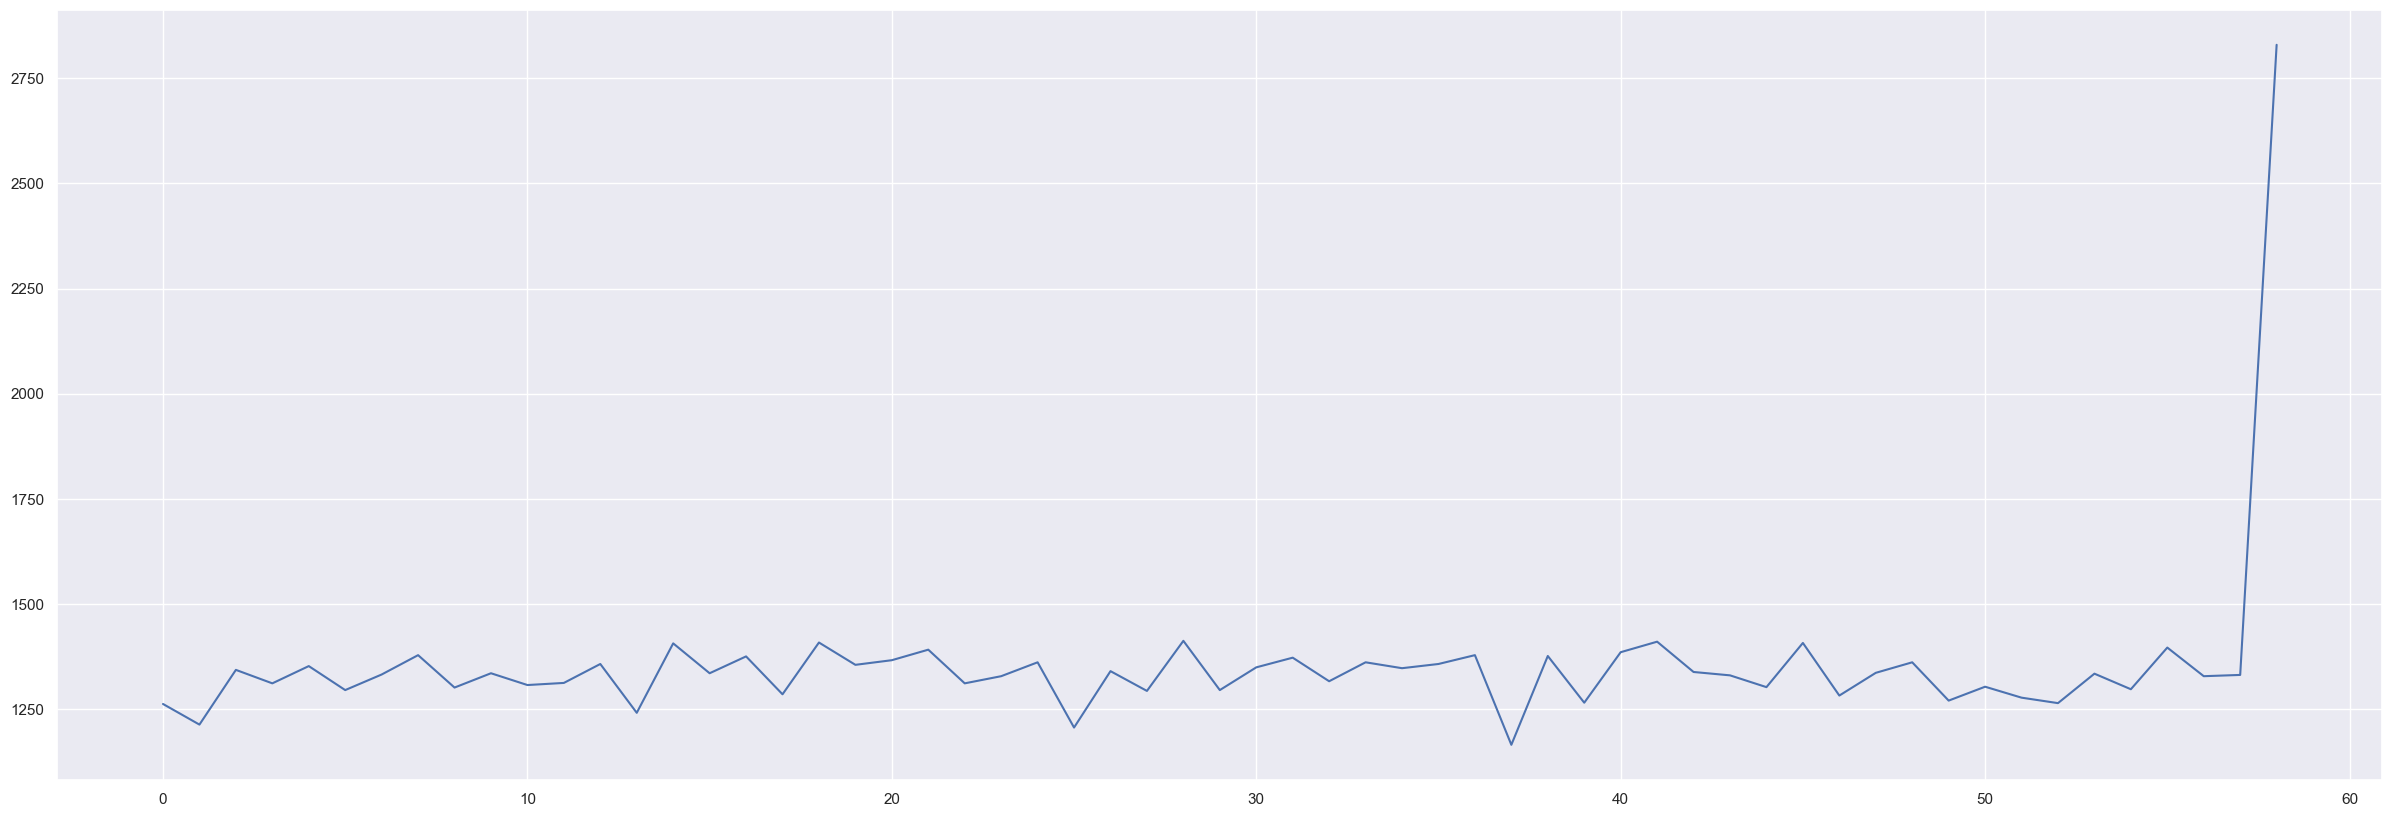

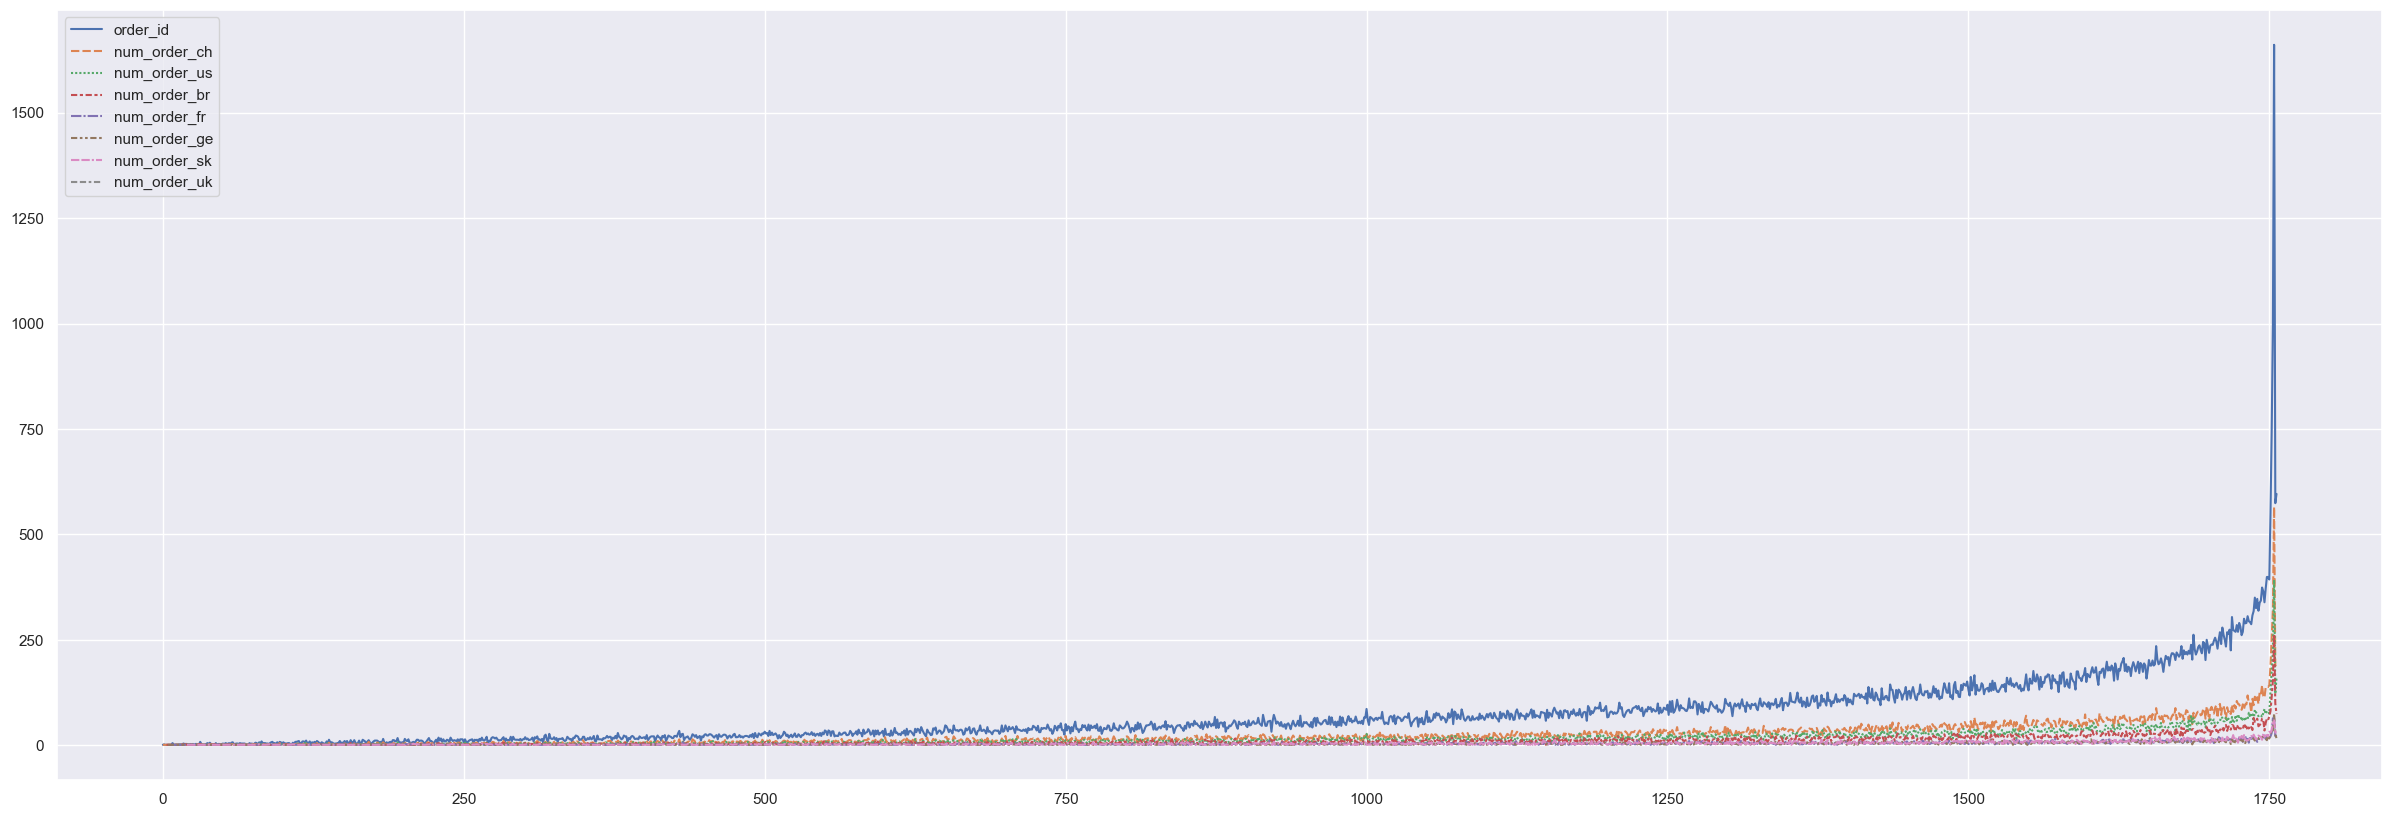

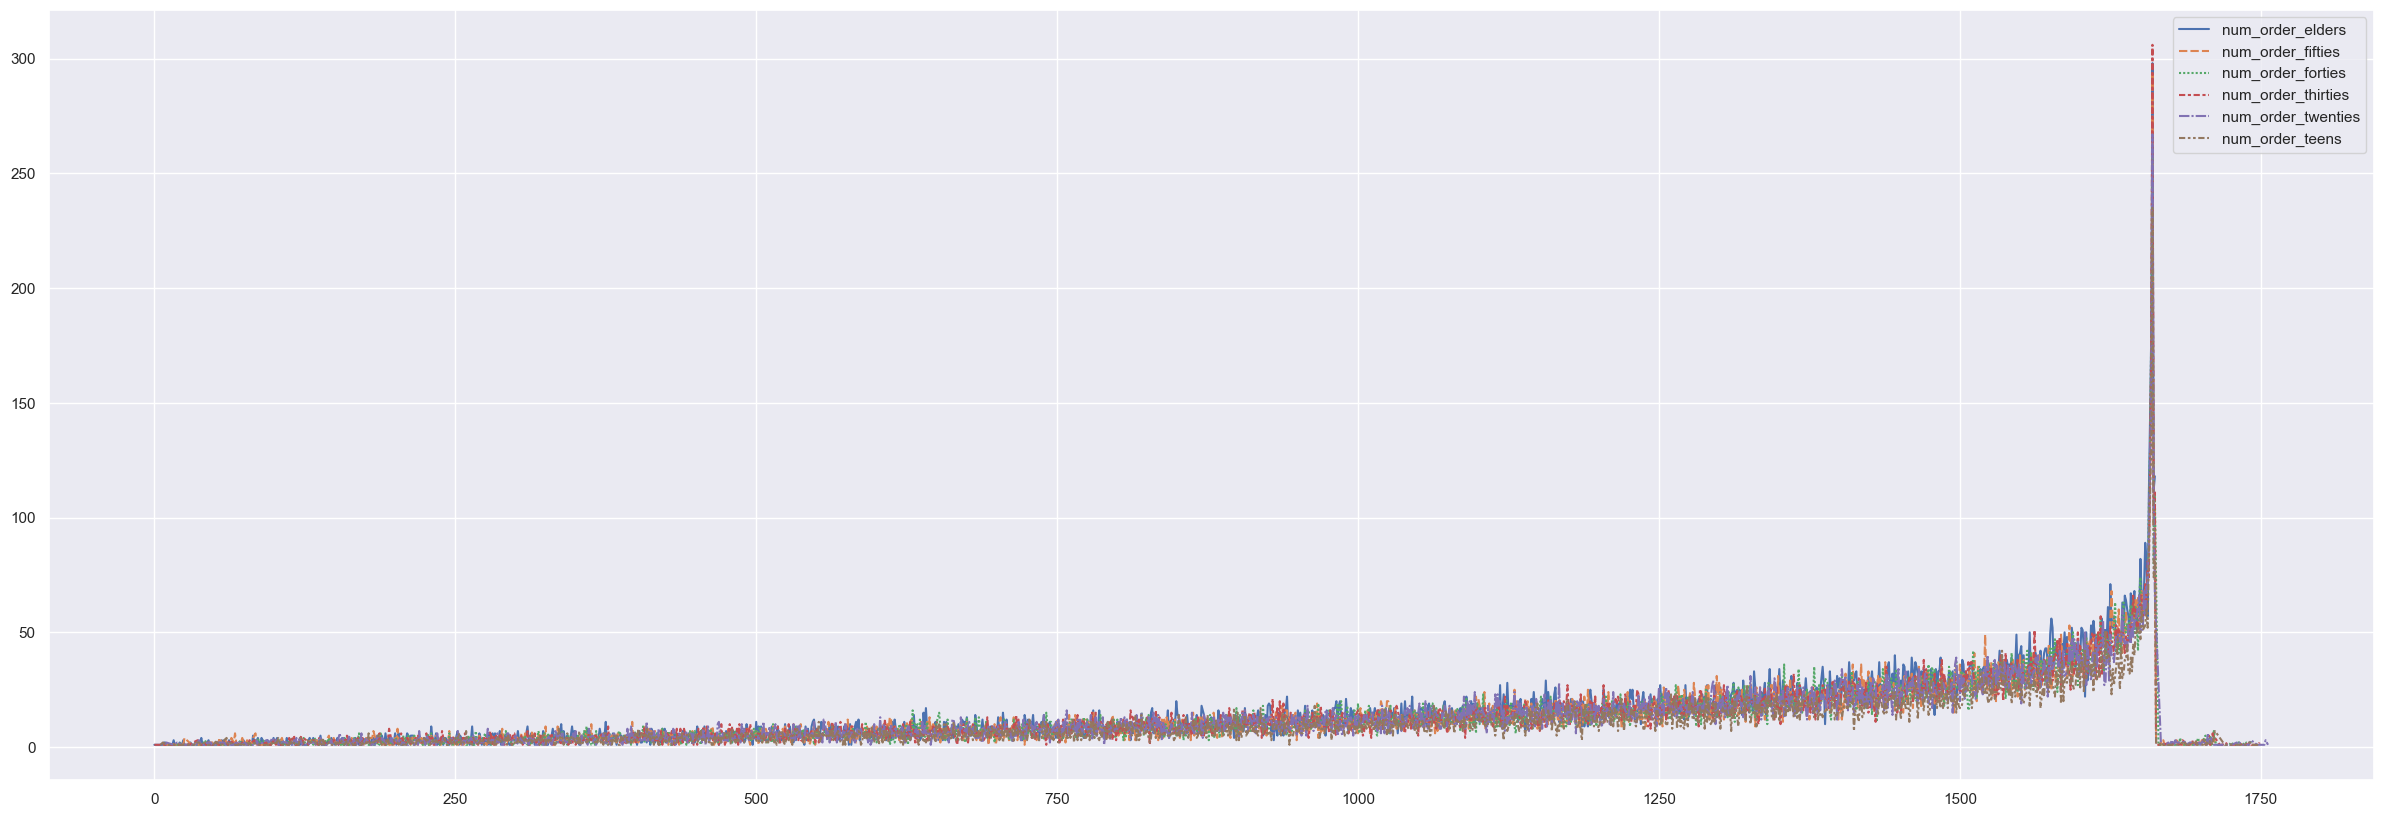

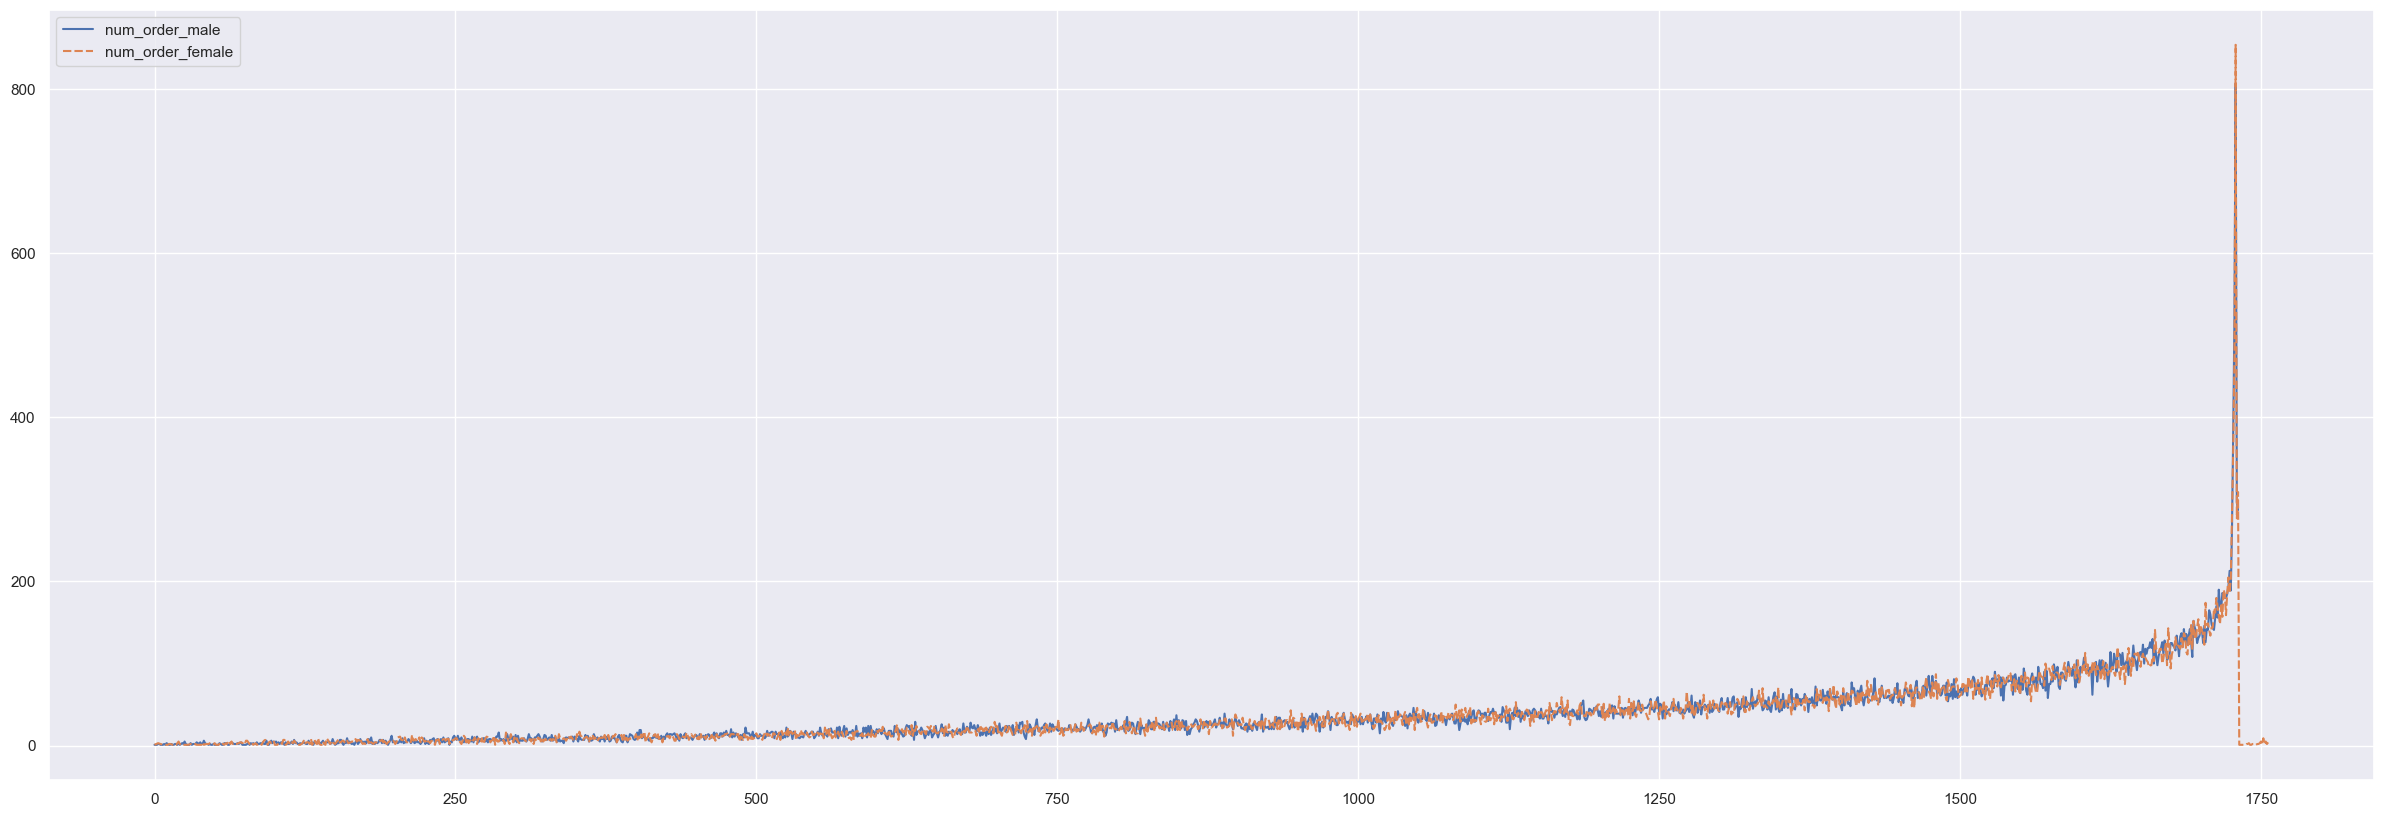

In [366]:
count_12 = 0

times_by_user = orders_users_clean[["order_id","user_id","num_of_item","gender","country","costumer_time","user_created_at",
                                                    "age_group","order_created_at"]].groupby(["user_id"],as_index=False).agg({'order_id': 'count' ,'num_of_item': 'sum', 'gender': 'max', 
                                                    'country':'max', 'age_group': 'max', 'user_created_at': 'max', 'order_created_at': 'min'}).sort_values(["user_created_at"], ascending=False)
times_by_user["first_order_after"]=times_by_user["order_created_at"]-times_by_user["user_created_at"]

#times_by_user.to_csv('clients_over_time.csv')

times_by_user["user_date_month"] = times_by_user["user_created_at"].dt.strftime('%Y/%m')

clients_over_time = times_by_user[["user_id","user_created_at"]].groupby(["user_created_at"],as_index=False).agg({'user_id': 'count'}).sort_values(["user_created_at"], ascending=True)
clients_over_time_month = times_by_user[["user_id","user_date_month"]].groupby(["user_date_month"],as_index=False).agg({'user_id': 'count'}).sort_values(["user_date_month"], ascending=True)
clients_over_time_month.set_index("user_date_month")
clients_over_time_month.rename(columns={"user_id": "num_orders"}, inplace=True)

times_by_order = orders_users_clean[["order_id","user_id","gender","country","costumer_time",
                                                    "age_group","order_created_at"]].groupby(["order_id"],as_index=False).agg({'user_id': 'max', 'gender': 'max', 
                                                'country':'max', 'age_group': 'max', 'order_created_at': 'max'}).sort_values(["user_id"], ascending=False)

times_by_order["order_date_month"] = times_by_order["order_created_at"]#.dt.strftime('%Y/%m')

orders_over_time = times_by_order[["order_id","order_created_at"]].groupby(["order_created_at"],as_index=False).agg({'order_id': 'count'}).sort_values(["order_created_at"], ascending=True)
orders_over_time_month = times_by_order[["order_id","order_date_month"]].groupby(["order_date_month"],as_index=False).agg({'order_id': 'count'}).sort_values(["order_date_month"], ascending=True)

#CHINA
times_by_order_ch = times_by_order[times_by_order["country"]=="China"]
orders_over_time_month_ch = times_by_order_ch[["order_id","order_date_month"]].groupby(["order_date_month"],as_index=False).agg({'order_id': 'count'}).sort_values(["order_date_month"], ascending=True)
orders_over_time_month_ch.rename(columns={"order_id": "num_order_ch"}, inplace=True)

#USA
times_by_order_us = times_by_order[times_by_order["country"]=="United States"]
orders_over_time_month_us = times_by_order_us[["order_id","order_date_month"]].groupby(["order_date_month"],as_index=False).agg({'order_id': 'count'}).sort_values(["order_date_month"], ascending=True)
orders_over_time_month_us.rename(columns={"order_id": "num_order_us"}, inplace=True)

#BRASIL
times_by_order_br = times_by_order[times_by_order["country"]=="Brasil"]
orders_over_time_month_br = times_by_order_br[["order_id","order_date_month"]].groupby(["order_date_month"],as_index=False).agg({'order_id': 'count'}).sort_values(["order_date_month"], ascending=True)
orders_over_time_month_br.rename(columns={"order_id": "num_order_br"}, inplace=True)

#UNITED KINGDOM
times_by_order_uk = times_by_order[times_by_order["country"]=="United Kindgom"]
orders_over_time_month_uk = times_by_order_uk[["order_id","order_date_month"]].groupby(["order_date_month"],as_index=False).agg({'order_id': 'count'}).sort_values(["order_date_month"], ascending=True)
orders_over_time_month_uk.rename(columns={"order_id": "num_order_uk"}, inplace=True)

#FRANCE
times_by_order_fr = times_by_order[times_by_order["country"]=="France"]
orders_over_time_month_fr = times_by_order_fr[["order_id","order_date_month"]].groupby(["order_date_month"],as_index=False).agg({'order_id': 'count'}).sort_values(["order_date_month"], ascending=True)
orders_over_time_month_fr.rename(columns={"order_id": "num_order_fr"}, inplace=True)

#GERMANY
times_by_order_ge = times_by_order[times_by_order["country"]=="Germany"]
orders_over_time_month_ge = times_by_order_ge[["order_id","order_date_month"]].groupby(["order_date_month"],as_index=False).agg({'order_id': 'count'}).sort_values(["order_date_month"], ascending=True)
orders_over_time_month_ge.rename(columns={"order_id": "num_order_ge"}, inplace=True)

#SOUTH KOREA
times_by_order_sk = times_by_order[times_by_order["country"]=="South Korea"]
orders_over_time_month_sk = times_by_order_sk[["order_id","order_date_month"]].groupby(["order_date_month"],as_index=False).agg({'order_id': 'count'}).sort_values(["order_date_month"], ascending=True)
orders_over_time_month_sk.rename(columns={"order_id": "num_order_sk"}, inplace=True)

orders_over_time_month_all = pd.merge(orders_over_time_month, orders_over_time_month_ch, on='order_date_month', how='outer')
orders_over_time_month_all = pd.merge(orders_over_time_month_all, orders_over_time_month_us, on='order_date_month', how='outer')
orders_over_time_month_all = pd.merge(orders_over_time_month_all, orders_over_time_month_br, on='order_date_month', how='outer')
orders_over_time_month_all = pd.merge(orders_over_time_month_all, orders_over_time_month_fr, on='order_date_month', how='outer')
orders_over_time_month_all = pd.merge(orders_over_time_month_all, orders_over_time_month_ge, on='order_date_month', how='outer')
orders_over_time_month_all = pd.merge(orders_over_time_month_all, orders_over_time_month_sk, on='order_date_month', how='outer')
orders_over_time_month_all = pd.merge(orders_over_time_month_all, orders_over_time_month_uk, on='order_date_month', how='outer')
orders_over_time_month_all.set_index("order_date_month")

#orders_over_time_month_all.to_csv("orders_over_time_month_all_countries.csv")

count_12+=1
fig = plt.figure(count_12)
fig.set(figheight=10,figwidth=30)
plt.plot(clients_over_time_month.index, clients_over_time_month["num_orders"])

count_12+=1
fig = plt.figure(count_12)
fig.set(figheight=10,figwidth=30)
ax = sns.lineplot(data = orders_over_time_month_all)

#ELDERS
times_by_order_elders = times_by_order[times_by_order["age_group"]=="6-Elders"]
orders_over_time_month_elders = times_by_order_elders[["order_id","order_date_month"]].groupby(["order_date_month"],as_index=False).agg({'order_id': 'count'}).sort_values(["order_date_month"], ascending=True)
orders_over_time_month_elders.rename(columns={"order_id": "num_order_elders"}, inplace=True)

#FIFTIES
times_by_order_fifties = times_by_order[times_by_order["age_group"]=="5-Fifties"]
orders_over_time_month_fifties = times_by_order_fifties[["order_id","order_date_month"]].groupby(["order_date_month"],as_index=False).agg({'order_id': 'count'}).sort_values(["order_date_month"], ascending=True)
orders_over_time_month_fifties.rename(columns={"order_id": "num_order_fifties"}, inplace=True)

#FORTIES
times_by_order_forties = times_by_order[times_by_order["age_group"]=="4-Forties"]
orders_over_time_month_forties = times_by_order_forties[["order_id","order_date_month"]].groupby(["order_date_month"],as_index=False).agg({'order_id': 'count'}).sort_values(["order_date_month"], ascending=True)
orders_over_time_month_forties.rename(columns={"order_id": "num_order_forties"}, inplace=True)

#THIRTIES
times_by_order_thirties = times_by_order[times_by_order["age_group"]=="3-Thirties"]
orders_over_time_month_thirties = times_by_order_thirties[["order_id","order_date_month"]].groupby(["order_date_month"],as_index=False).agg({'order_id': 'count'}).sort_values(["order_date_month"], ascending=True)
orders_over_time_month_thirties.rename(columns={"order_id": "num_order_thirties"}, inplace=True)

#TWENTIES
times_by_order_twenties = times_by_order[times_by_order["age_group"]=="2-Twenties"]
orders_over_time_month_twenties= times_by_order_twenties[["order_id","order_date_month"]].groupby(["order_date_month"],as_index=False).agg({'order_id': 'count'}).sort_values(["order_date_month"], ascending=True)
orders_over_time_month_twenties.rename(columns={"order_id": "num_order_twenties"}, inplace=True)

#TEENS
times_by_order_teens = times_by_order[times_by_order["age_group"]=="1-Teens"]
orders_over_time_month_teens = times_by_order_teens[["order_id","order_date_month"]].groupby(["order_date_month"],as_index=False).agg({'order_id': 'count'}).sort_values(["order_date_month"], ascending=True)
orders_over_time_month_teens.rename(columns={"order_id": "num_order_teens"}, inplace=True)

orders_over_time_month_all_groups = pd.merge(orders_over_time_month_elders, orders_over_time_month_fifties, on='order_date_month', how='outer')
orders_over_time_month_all_groups = pd.merge(orders_over_time_month_all_groups, orders_over_time_month_forties, on='order_date_month', how='outer')
orders_over_time_month_all_groups = pd.merge(orders_over_time_month_all_groups, orders_over_time_month_thirties, on='order_date_month', how='outer')
orders_over_time_month_all_groups = pd.merge(orders_over_time_month_all_groups, orders_over_time_month_twenties, on='order_date_month', how='outer')
orders_over_time_month_all_groups = pd.merge(orders_over_time_month_all_groups, orders_over_time_month_teens, on='order_date_month', how='outer')
orders_over_time_month_all_groups.set_index("order_date_month")

#orders_over_time_month_all_groups.to_csv("orders_over_time_month_all_groups.csv")

count_12+=1
fig = plt.figure(count_12)
fig.set(figheight=10,figwidth=30)
ax = sns.lineplot(data = orders_over_time_month_all_groups)

#MALE
times_by_order_male = times_by_order[times_by_order["gender"]=="M"]
orders_over_time_month_male = times_by_order_male[["order_id","order_date_month"]].groupby(["order_date_month"],as_index=False).agg({'order_id': 'count'}).sort_values(["order_date_month"], ascending=True)
orders_over_time_month_male.rename(columns={"order_id": "num_order_male"}, inplace=True)

#FEMALE
times_by_order_female = times_by_order[times_by_order["gender"]=="F"]
orders_over_time_month_female = times_by_order_female[["order_id","order_date_month"]].groupby(["order_date_month"],as_index=False).agg({'order_id': 'count'}).sort_values(["order_date_month"], ascending=True)
orders_over_time_month_female.rename(columns={"order_id": "num_order_female"}, inplace=True)

orders_over_time_month_all_genders = pd.merge(orders_over_time_month_male, orders_over_time_month_female, on='order_date_month', how='outer')
orders_over_time_month_all_genders.set_index("order_date_month")

count_12+=1
fig = plt.figure(count_12)
fig.set(figheight=10,figwidth=30)
ax = sns.lineplot(data = orders_over_time_month_all_genders)


# 13. Model.

In [383]:
count_13 = 0

products_users_clean = pd.merge(products_users, users, on='user_id', how='inner')

products_users_clean = products_users_clean[["user_id","name_y","id","category","brand","retail_price","country","age","costumer_time","gender","order_id"]]
products_users_clean.rename(columns={"name_y": "user_name"}, inplace=True)

data_model = products_users_clean[["user_id","user_name","retail_price","age","costumer_time","gender","country","order_id"]].groupby(["user_id"],as_index=False).agg({'user_name': 'max','retail_price': 'sum','age': 'max','costumer_time': 'max','gender': 'max','country': 'max','order_id': 'count'}).sort_values(["user_id"], ascending=False)
data_model.rename(columns={"order_id": "num_of_products"}, inplace=True)

conditions = [data_model["gender"]=="M", data_model["gender"]=="F"]
genders = [0,1]
data_model["gender_bin"] = np.select(conditions, genders)

data_model_num = data_model[["retail_price","costumer_time","age","gender_bin","num_of_products"]][data_model["country"]=="France"]

print(data_model_num.corr())

data_model_female_category = products_users_clean[(products_users_clean.gender=="F") & (products_users_clean.category.isin(["Intimates","Dresses","Pants","Outerwear & Coats"]))][["user_id","user_name","retail_price","age","costumer_time","gender","country","order_id"]].groupby(["user_id"],as_index=False).agg({'user_name': 'max','retail_price': 'sum','age': 'max','costumer_time': 'max','gender': 'max','country': 'max','order_id': 'count'}).sort_values(["user_id"], ascending=False)
data_model_male_category = products_users_clean[(products_users_clean.gender=="M") & (products_users_clean.category.isin(["Underwear","Suits & Sport Coats","Jeans","Outerwear & Coats"]))][["user_id","user_name","retail_price","age","costumer_time","gender","country","order_id"]].groupby(["user_id"],as_index=False).agg({'user_name': 'max','retail_price': 'sum','age': 'max','costumer_time': 'max','gender': 'max','country': 'max','order_id': 'count'}).sort_values(["user_id"], ascending=False)
conditions = [data_model_female_category["gender"]=="M", data_model_female_category["gender"]=="F"]
data_model_female_category["gender_bin"] = np.select(conditions, genders)
conditions = [data_model_male_category["gender"]=="M", data_model_male_category["gender"]=="F"]
data_model_male_category["gender_bin"] = np.select(conditions, genders)
data_model_female_category.rename(columns={"order_id": "num_of_products"}, inplace=True)
data_model_male_category.rename(columns={"order_id": "num_of_products"}, inplace=True)

data_model_num_female = data_model_female_category[["retail_price","costumer_time","age","gender_bin","num_of_products"]]
data_model_num_male = data_model_male_category[["retail_price","costumer_time","age","gender_bin","num_of_products"]]

print("FEMALE" , data_model_num_female.corr())
print("MALE", data_model_num_male.corr())

# USA: Calvin Klein 46106.91, Carhartt 44481.32, Diesel 41965.20
# CHINA: Calvin Klein 67841.21, True Religion 65870.56, Diesel  65027.07
# BRASIL: True Religion  28911.58, Calvin Klein 27747.98, 7 For All Mankind 25725.37
# FRANCE: 7 For All Mankind 9634.13, Diesel 9255.42,  Carhartt 9006.45
# GERMANY: Calvin Klein 9865.88, Diesel 9799.60, True Religion 8521.74
# UNITED KINGDOM: Calvin Klein  10649.82, Diesel 9291.67, 7 For All Mankind 7491.18

data_model_calvin = products_users_clean[(products_users_clean.brand=="True Religion")][["user_id","user_name","retail_price","age","costumer_time","gender","country","order_id"]].groupby(["user_id"],as_index=False).agg({'user_name': 'max','retail_price': 'sum','age': 'max','costumer_time': 'max','gender': 'max','country': 'max','order_id': 'count'}).sort_values(["user_id"], ascending=False)
conditions = [data_model_calvin["gender"]=="M", data_model_calvin["gender"]=="F"]
data_model_calvin["gender_bin"] = np.select(conditions, genders)
data_model_calvin.rename(columns={"order_id": "num_of_products"}, inplace=True)

data_model_num_calvin = data_model_calvin[["retail_price","costumer_time","age","gender_bin","num_of_products"]]

print("CALVIN KLEIN" , data_model_num_calvin.corr())


                 retail_price  costumer_time       age  gender_bin  \
retail_price         1.000000      -0.001209 -0.025741   -0.086142   
costumer_time       -0.001209       1.000000 -0.029962    0.030968   
age                 -0.025741      -0.029962  1.000000    0.002028   
gender_bin          -0.086142       0.030968  0.002028    1.000000   
num_of_products      0.674514       0.002897 -0.010735   -0.003914   

                 num_of_products  
retail_price            0.674514  
costumer_time           0.002897  
age                    -0.010735  
gender_bin             -0.003914  
num_of_products         1.000000  
FEMALE                  retail_price  costumer_time       age  gender_bin  \
retail_price         1.000000      -0.005370 -0.013175         NaN   
costumer_time       -0.005370       1.000000  0.004221         NaN   
age                 -0.013175       0.004221  1.000000         NaN   
gender_bin                NaN            NaN       NaN         NaN   
num_of_produ

# 14. Study cities.

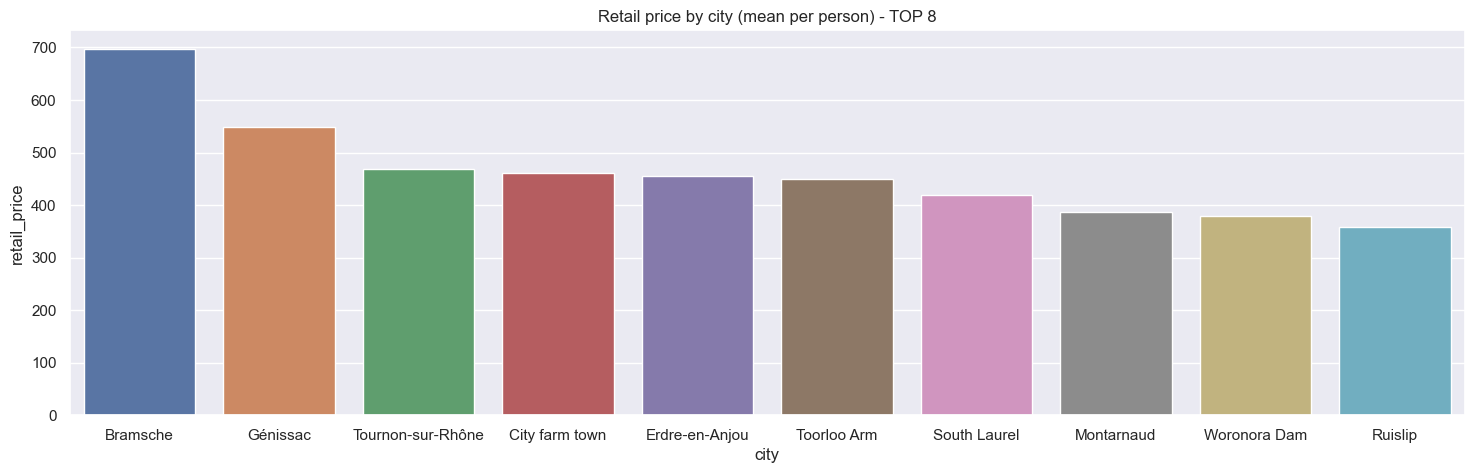

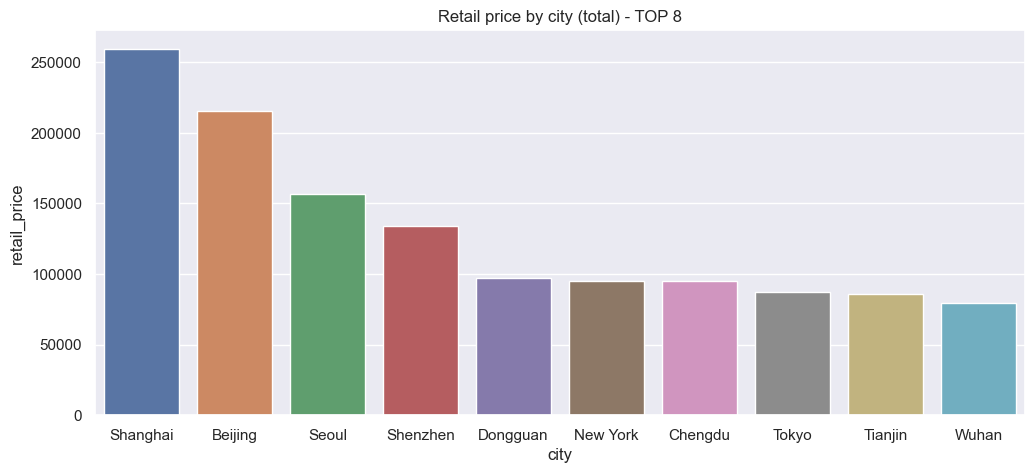

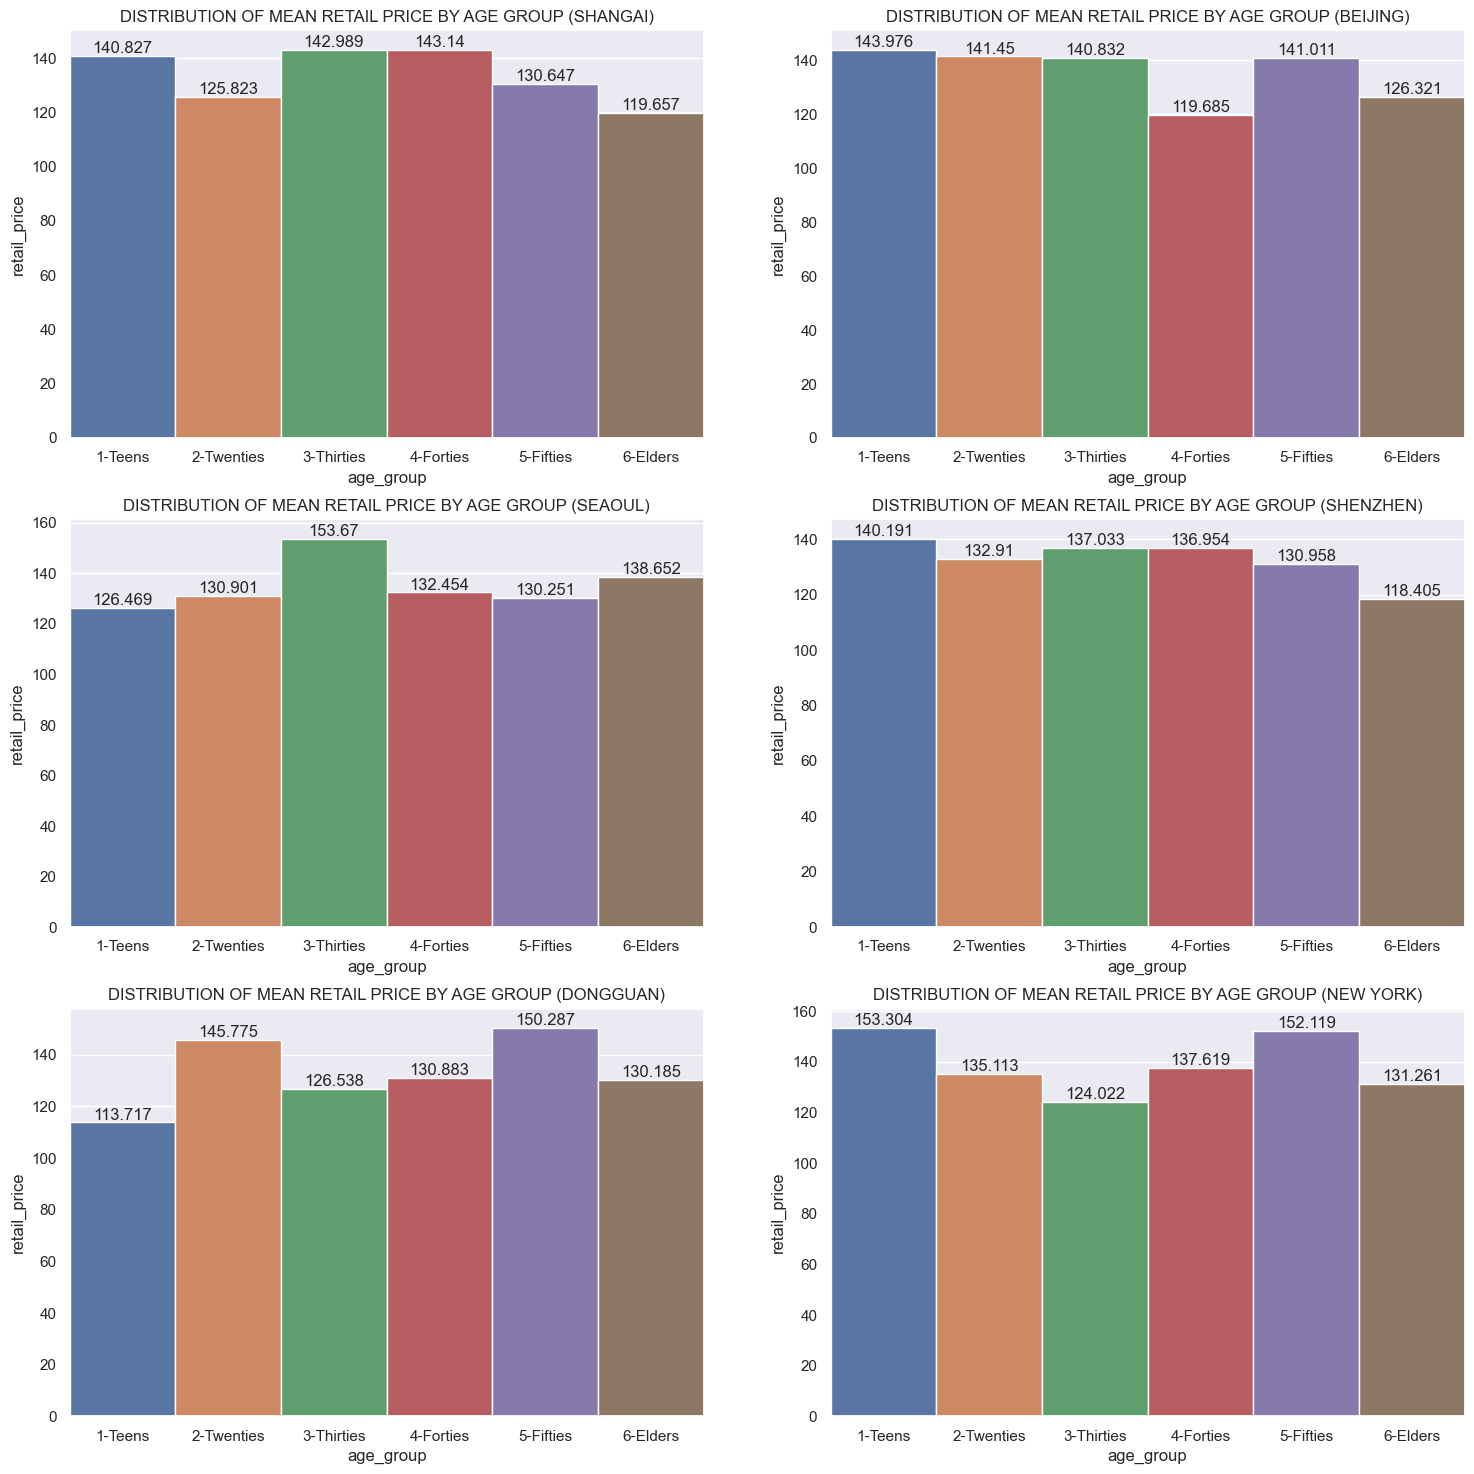

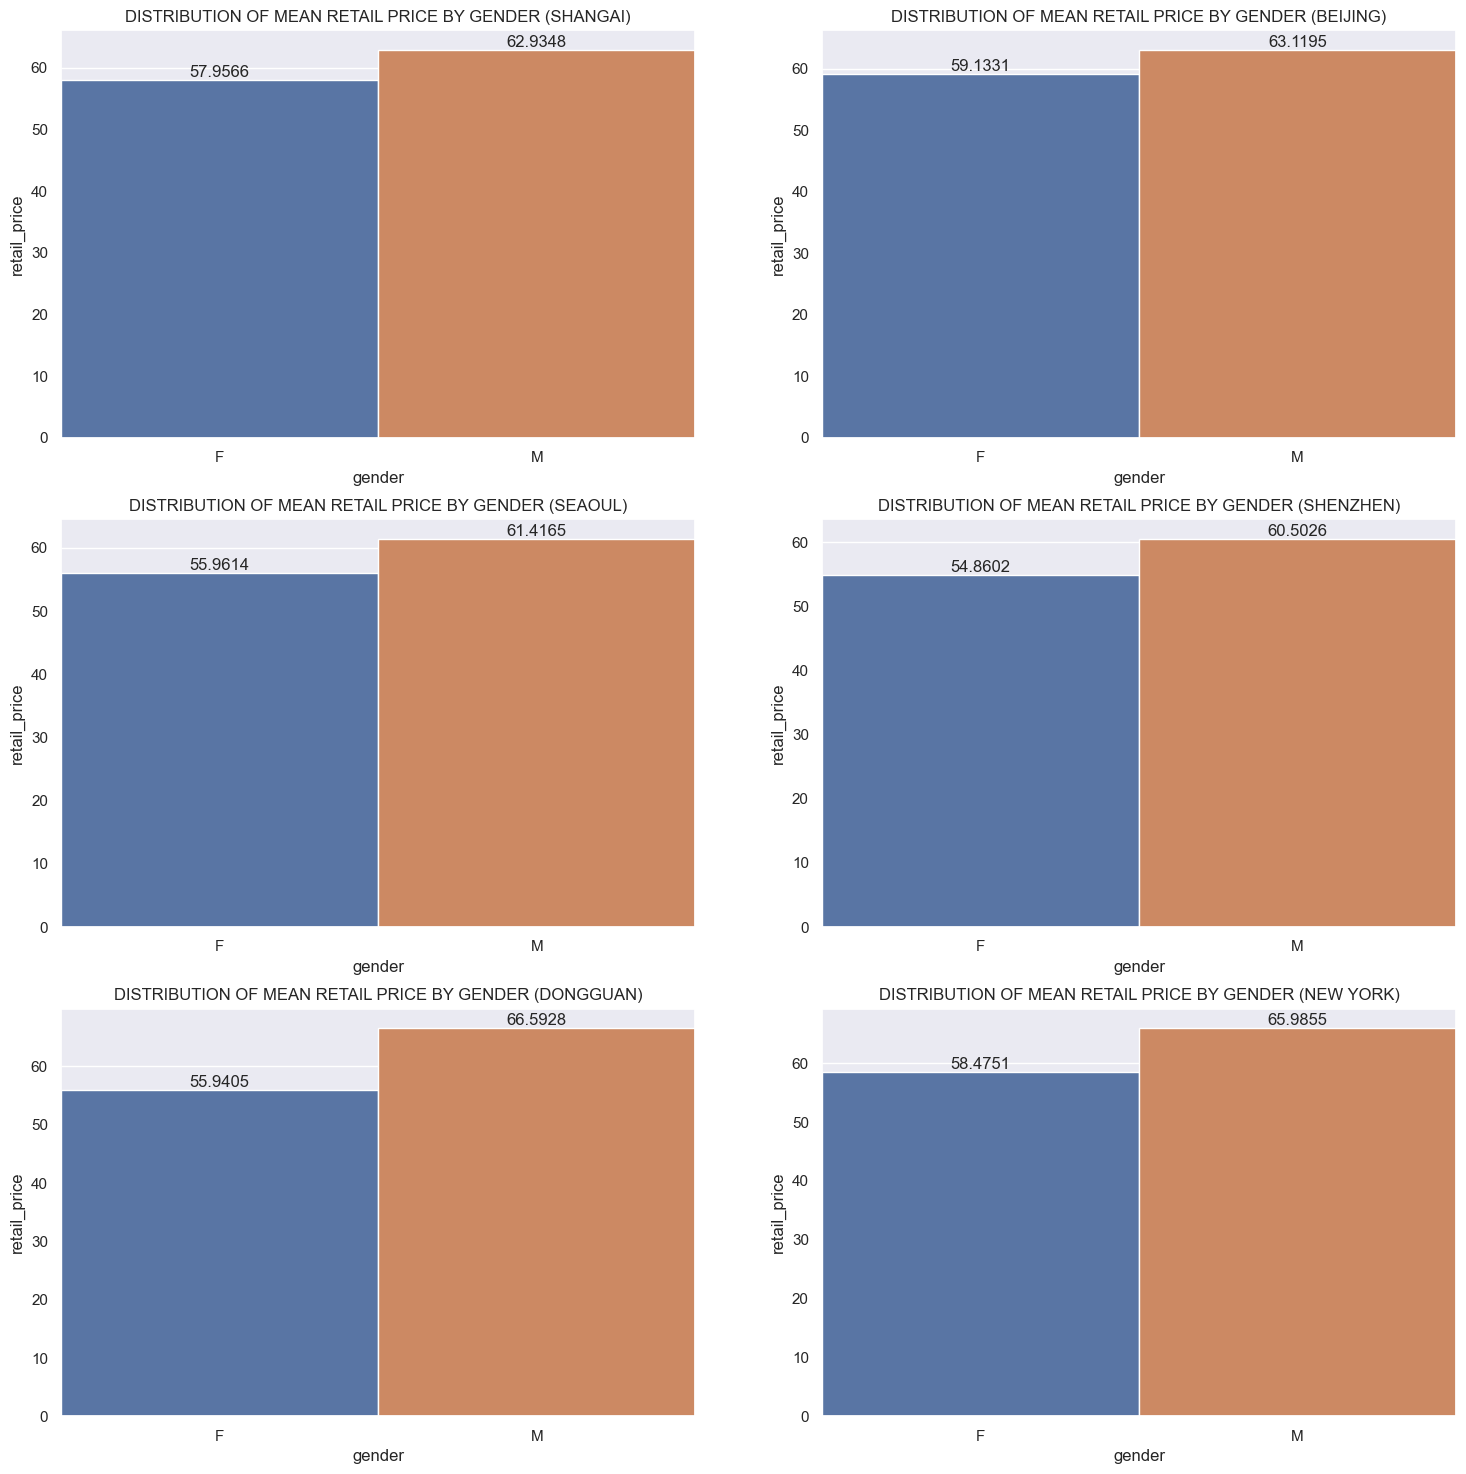

In [375]:
count_14 = 0

products_users_clean = pd.merge(products_users, users, on='user_id', how='inner')

products_users_clean = products_users_clean[["user_id","name_y","id","category","brand","retail_price","city","age_group","costumer_time","gender","order_id"]]
products_users_clean.rename(columns={"name_y": "user_name"}, inplace=True)

avg_retail_price_products_by_user = products_users_clean[["user_id","city","user_name","retail_price","order_id","costumer_time","age_group"]].groupby(["user_id"],as_index=False).agg({'user_name': 'max','city': 'max' ,'retail_price': 'mean', 'order_id': 'count', 'costumer_time':'max', 'age_group': 'max'}).sort_values(["retail_price"], ascending=False)
avg_retail_price_products_by_user.rename(columns={"order_id": "num_of_products"}, inplace=True)

sum_retail_price_products_by_user = products_users_clean[["user_id","city","user_name","retail_price","order_id","costumer_time","age_group"]].groupby(["user_id"],as_index=False).agg({'user_name': 'max','city': 'max' ,'retail_price': 'sum', 'order_id': 'count', 'costumer_time':'max', 'age_group': 'max'}).sort_values(["retail_price"], ascending=False)
sum_retail_price_products_by_user.rename(columns={"order_id": "num_of_products"}, inplace=True)

avg_retail_price_products_by_city = avg_retail_price_products_by_user[["city","retail_price","num_of_products"]].groupby(["city"],as_index=False).agg({'retail_price': 'mean', 'num_of_products': 'sum'}).sort_values(["retail_price"], ascending=False)
sum_retail_price_products_by_city = sum_retail_price_products_by_user[["city","retail_price","num_of_products"]].groupby(["city"],as_index=False).agg({'retail_price': 'sum', 'num_of_products': 'sum'}).sort_values(["retail_price"], ascending=False)

avg_retail_price_products_by_user_gender = products_users_clean[["user_id","city","user_name","retail_price","order_id","costumer_time","gender"]].groupby(["user_id"],as_index=False).agg({'user_name': 'max','city': 'max' ,'retail_price': 'mean', 'order_id': 'count', 'costumer_time':'max', 'gender': 'max'}).sort_values(["retail_price"], ascending=False)
avg_retail_price_products_by_user_gender.rename(columns={"order_id": "num_of_products"}, inplace=True)

#Plot the mean retail price per person for the city with more than 4% Total Population
count_14+=1
fig = plt.figure(count_14)
fig.set(figheight=5,figwidth=18)
x = sns.barplot(avg_retail_price_products_by_city.head(10), x="city", y="retail_price")
x.set_title("Retail price by city (mean per person) - TOP 8")

count_14+=1
fig = plt.figure(count_14)
fig.set(figheight=5,figwidth=12)
x = sns.barplot(sum_retail_price_products_by_city.head(10), x="city", y="retail_price")
x.set_title("Retail price by city (total) - TOP 8")

sum_retail_price_products_by_user_sh = sum_retail_price_products_by_user[sum_retail_price_products_by_user["city"]=="Shanghai"][["age_group","retail_price","num_of_products"]].groupby(["age_group"],as_index=False).agg({'retail_price': 'mean', 'num_of_products': 'sum'}).sort_values(["age_group"], ascending=True)
sum_retail_price_products_by_user_be = sum_retail_price_products_by_user[sum_retail_price_products_by_user["city"]=="Beijing"][["age_group","retail_price","num_of_products"]].groupby(["age_group"],as_index=False).agg({'retail_price': 'mean', 'num_of_products': 'sum'}).sort_values(["age_group"], ascending=True)
sum_retail_price_products_by_user_se = sum_retail_price_products_by_user[sum_retail_price_products_by_user["city"]=="Seoul"][["age_group","retail_price","num_of_products"]].groupby(["age_group"],as_index=False).agg({'retail_price': 'mean', 'num_of_products': 'sum'}).sort_values(["age_group"], ascending=True)
sum_retail_price_products_by_user_sz = sum_retail_price_products_by_user[sum_retail_price_products_by_user["city"]=="Shenzhen"][["age_group","retail_price","num_of_products"]].groupby(["age_group"],as_index=False).agg({'retail_price': 'mean', 'num_of_products': 'sum'}).sort_values(["age_group"], ascending=True)
avg_retail_price_products_by_user_gu = sum_retail_price_products_by_user[sum_retail_price_products_by_user["city"]=="Dongguan"][["age_group","retail_price","num_of_products"]].groupby(["age_group"],as_index=False).agg({'retail_price': 'mean', 'num_of_products': 'sum'}).sort_values(["age_group"], ascending=True)
avg_retail_price_products_by_user_ny = sum_retail_price_products_by_user[sum_retail_price_products_by_user["city"]=="New York"][["age_group","retail_price","num_of_products"]].groupby(["age_group"],as_index=False).agg({'retail_price': 'mean', 'num_of_products': 'sum'}).sort_values(["age_group"], ascending=True)

#set seaborn plotting aesthetics as default
sns.set()

#define plotting region (1 row, 2 columns)
fig, axes = plt.subplots(3, 2)
fig.set(figheight=18,figwidth=18)

#create boxplot in each subplot
x1 = sns.barplot(sum_retail_price_products_by_user_sh, x="age_group", y="retail_price", ax=axes[0,0], width=1)
x1.set_title("DISTRIBUTION OF MEAN RETAIL PRICE BY AGE GROUP (SHANGAI)")
for i in x1.containers:
    x1.bar_label(i,)
x2 = sns.barplot(sum_retail_price_products_by_user_be, x="age_group", y="retail_price", ax=axes[0,1], width=1)
x2.set_title("DISTRIBUTION OF MEAN RETAIL PRICE BY AGE GROUP (BEIJING)")
for i in x2.containers:
    x2.bar_label(i,)
x4 = sns.barplot(sum_retail_price_products_by_user_se, x="age_group", y="retail_price", ax=axes[1,0], width=1)
x4.set_title("DISTRIBUTION OF MEAN RETAIL PRICE BY AGE GROUP (SEAOUL)")
for i in x4.containers:
    x4.bar_label(i,)
x5 = sns.barplot(sum_retail_price_products_by_user_sz, x="age_group", y="retail_price", ax=axes[1,1], width=1)
x5.set_title("DISTRIBUTION OF MEAN RETAIL PRICE BY AGE GROUP (SHENZHEN)")
for i in x5.containers:
    x5.bar_label(i,)
x6 =sns.barplot(avg_retail_price_products_by_user_gu, x="age_group", y="retail_price", ax=axes[2,0], width=1)
x6.set_title("DISTRIBUTION OF MEAN RETAIL PRICE BY AGE GROUP (DONGGUAN)")
for i in x6.containers:
    x6.bar_label(i,)
x7 =sns.barplot(avg_retail_price_products_by_user_ny, x="age_group", y="retail_price", ax=axes[2,1], width=1)
x7.set_title("DISTRIBUTION OF MEAN RETAIL PRICE BY AGE GROUP (NEW YORK)")
for i in x7.containers:
    x7.bar_label(i,)

plt.show()

sum_retail_price_products_by_user_sh_gender = avg_retail_price_products_by_user_gender[avg_retail_price_products_by_user_gender["city"]=="Shanghai"][["gender","retail_price","num_of_products"]].groupby(["gender"],as_index=False).agg({'retail_price': 'mean', 'num_of_products': 'sum'}).sort_values(["gender"], ascending=True)
sum_retail_price_products_by_user_be_gender = avg_retail_price_products_by_user_gender[avg_retail_price_products_by_user_gender["city"]=="Beijing"][["gender","retail_price","num_of_products"]].groupby(["gender"],as_index=False).agg({'retail_price': 'mean', 'num_of_products': 'sum'}).sort_values(["gender"], ascending=True)
sum_retail_price_products_by_user_se_gender = avg_retail_price_products_by_user_gender[avg_retail_price_products_by_user_gender["city"]=="Seoul"][["gender","retail_price","num_of_products"]].groupby(["gender"],as_index=False).agg({'retail_price': 'mean', 'num_of_products': 'sum'}).sort_values(["gender"], ascending=True)
sum_retail_price_products_by_user_sz_gender = avg_retail_price_products_by_user_gender[avg_retail_price_products_by_user_gender["city"]=="Shenzhen"][["gender","retail_price","num_of_products"]].groupby(["gender"],as_index=False).agg({'retail_price': 'mean', 'num_of_products': 'sum'}).sort_values(["gender"], ascending=True)
avg_retail_price_products_by_user_gu_gender = avg_retail_price_products_by_user_gender[avg_retail_price_products_by_user_gender["city"]=="Dongguan"][["gender","retail_price","num_of_products"]].groupby(["gender"],as_index=False).agg({'retail_price': 'mean', 'num_of_products': 'sum'}).sort_values(["gender"], ascending=True)
avg_retail_price_products_by_user_ny_gender = avg_retail_price_products_by_user_gender[avg_retail_price_products_by_user_gender["city"]=="New York"][["gender","retail_price","num_of_products"]].groupby(["gender"],as_index=False).agg({'retail_price': 'mean', 'num_of_products': 'sum'}).sort_values(["gender"], ascending=True)

#set seaborn plotting aesthetics as default
sns.set()

#define plotting region (1 row, 2 columns)
fig, axes = plt.subplots(3, 2)
fig.set(figheight=18,figwidth=18)

#create boxplot in each subplot
x1 = sns.barplot(sum_retail_price_products_by_user_sh_gender, x="gender", y="retail_price", ax=axes[0,0], width=1)
x1.set_title("DISTRIBUTION OF MEAN RETAIL PRICE BY GENDER (SHANGAI)")
for i in x1.containers:
    x1.bar_label(i,)
x2 = sns.barplot(sum_retail_price_products_by_user_be_gender, x="gender", y="retail_price", ax=axes[0,1], width=1)
x2.set_title("DISTRIBUTION OF MEAN RETAIL PRICE BY GENDER (BEIJING)")
for i in x2.containers:
    x2.bar_label(i,)
x4 = sns.barplot(sum_retail_price_products_by_user_se_gender, x="gender", y="retail_price", ax=axes[1,0], width=1)
x4.set_title("DISTRIBUTION OF MEAN RETAIL PRICE BY GENDER (SEAOUL)")
for i in x4.containers:
    x4.bar_label(i,)
x5 = sns.barplot(sum_retail_price_products_by_user_sz_gender, x="gender", y="retail_price", ax=axes[1,1], width=1)
x5.set_title("DISTRIBUTION OF MEAN RETAIL PRICE BY GENDER (SHENZHEN)")
for i in x5.containers:
    x5.bar_label(i,)
x6 =sns.barplot(avg_retail_price_products_by_user_gu_gender, x="gender", y="retail_price", ax=axes[2,0], width=1)
x6.set_title("DISTRIBUTION OF MEAN RETAIL PRICE BY GENDER (DONGGUAN)")
for i in x6.containers:
    x6.bar_label(i,)
x7 =sns.barplot(avg_retail_price_products_by_user_ny_gender, x="gender", y="retail_price", ax=axes[2,1], width=1)
x7.set_title("DISTRIBUTION OF MEAN RETAIL PRICE BY GENDER (NEW YORK)")
for i in x7.containers:
    x7.bar_label(i,)

plt.show()

# 15. What happens to the total retail price if we double the sales of Calvin Klein, Carhartt, Diesel, True Religion and 7 for All Mankind?

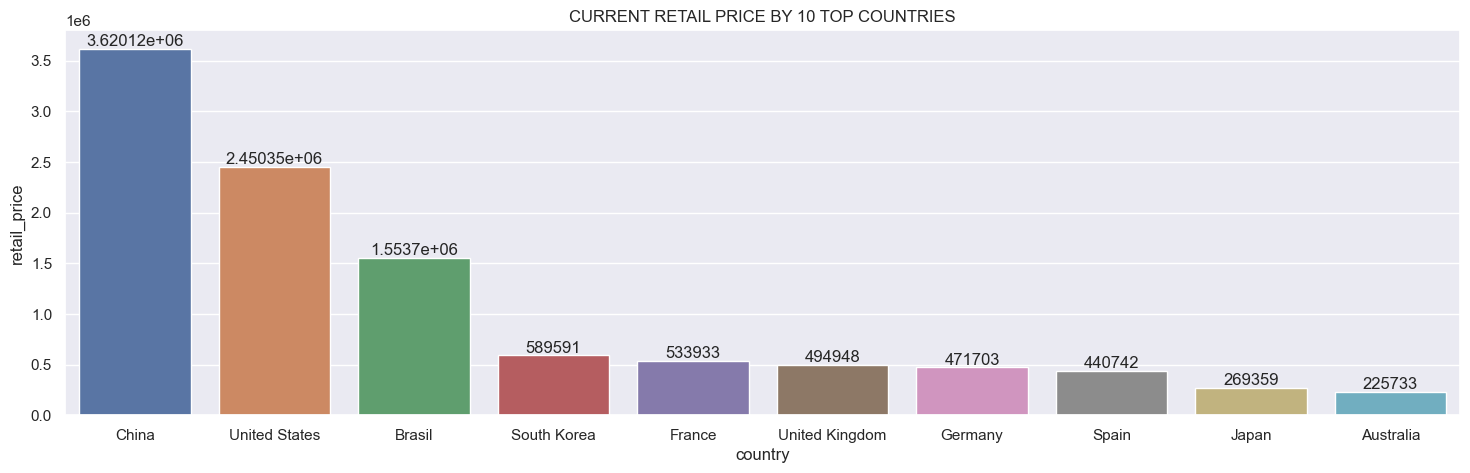

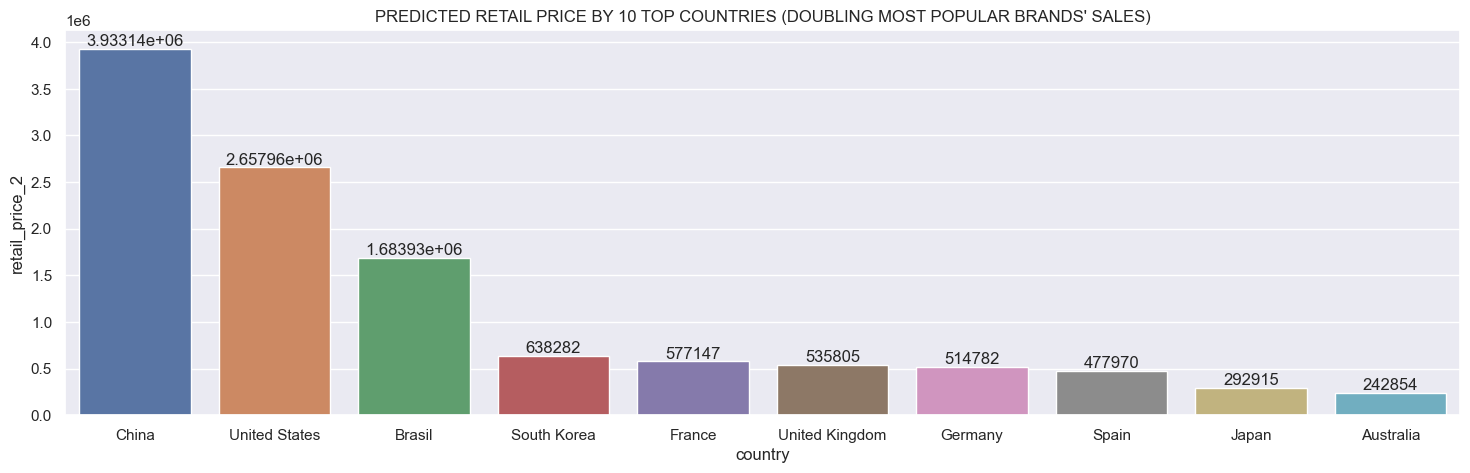

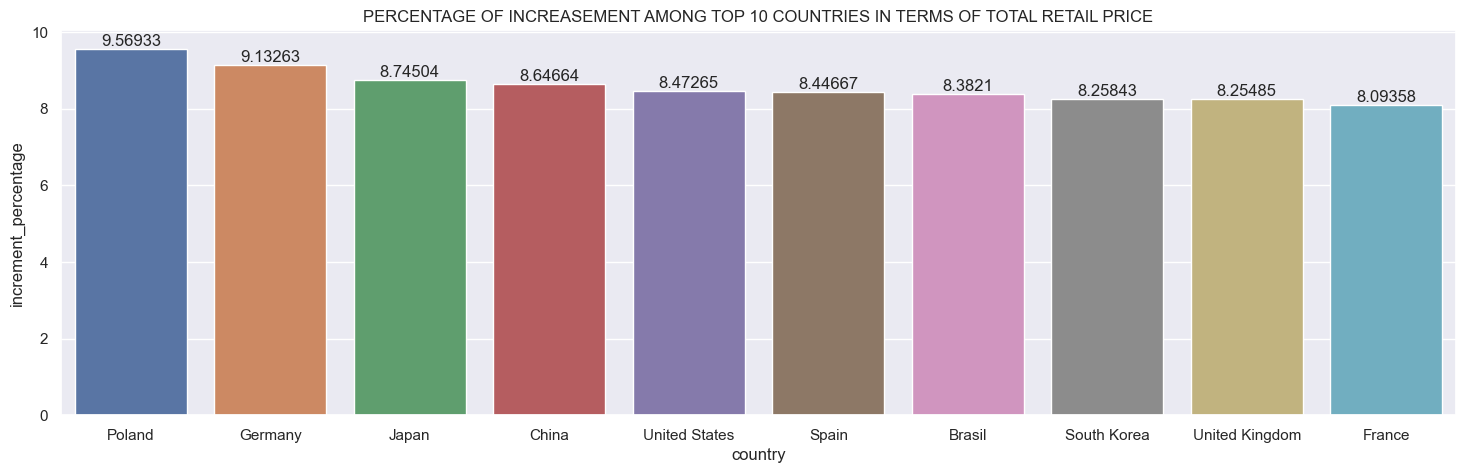

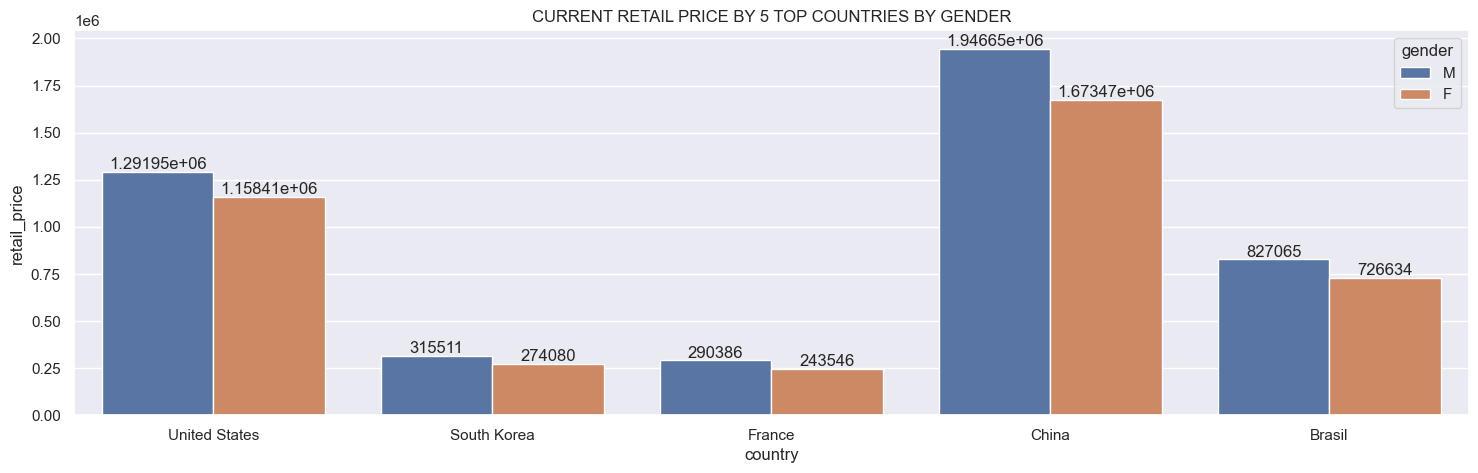

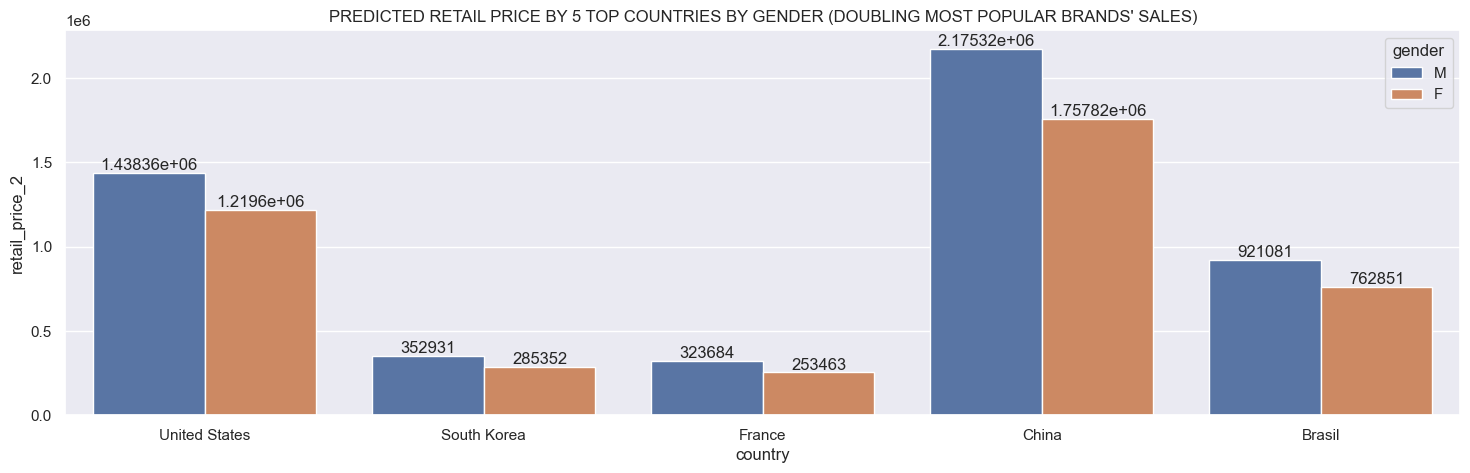

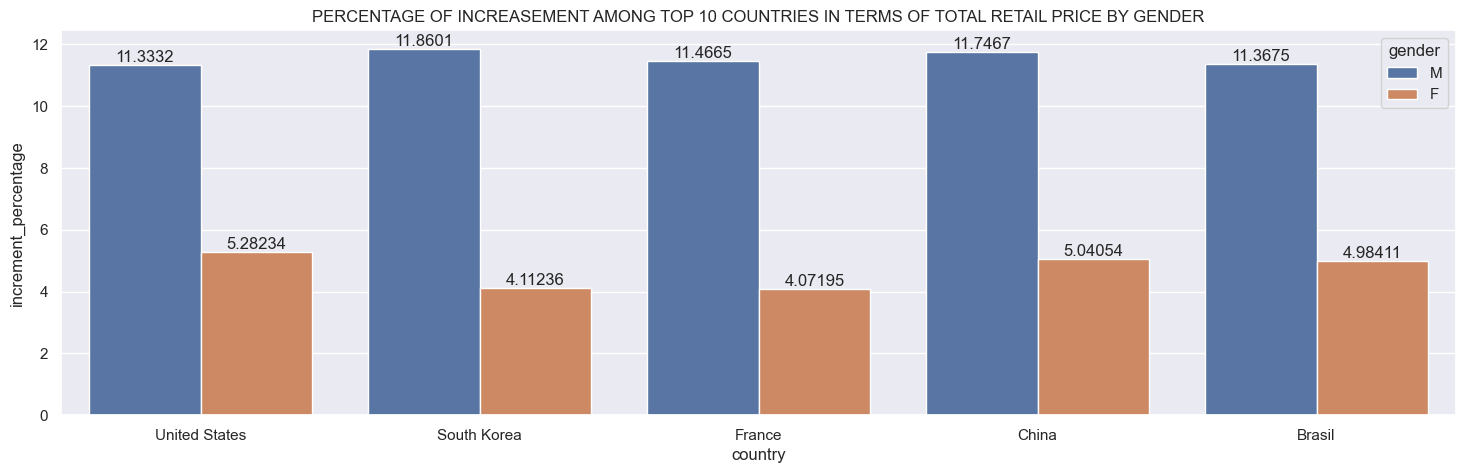

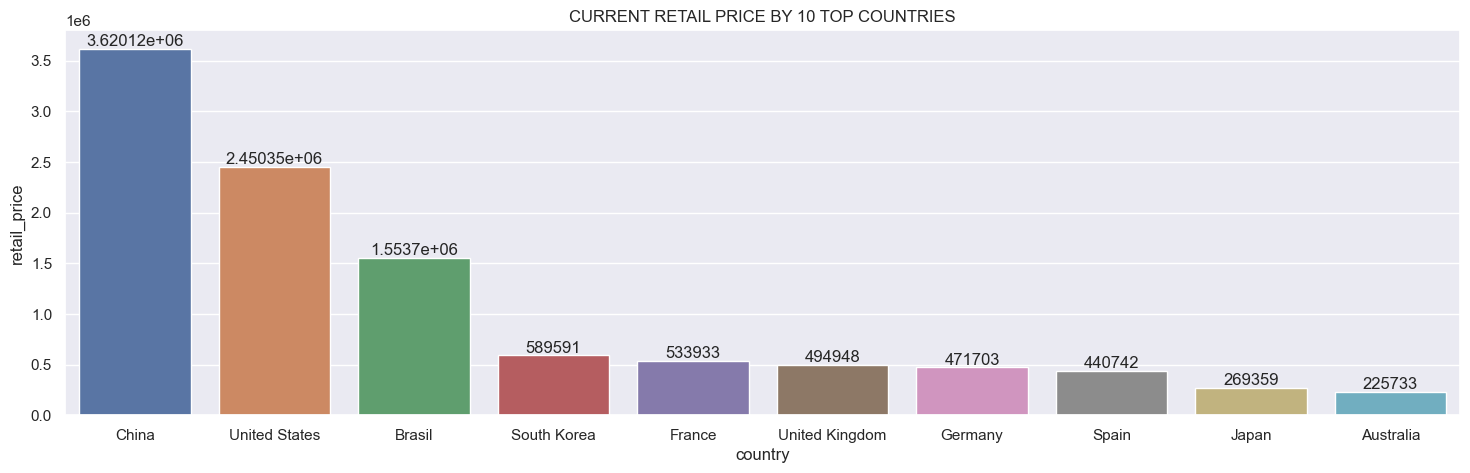

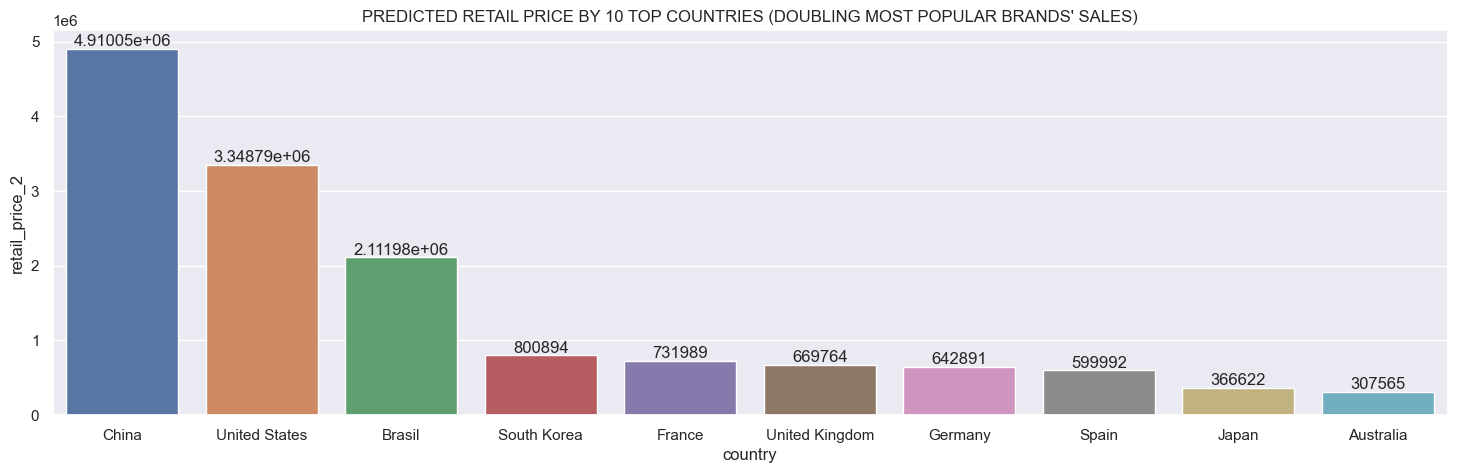

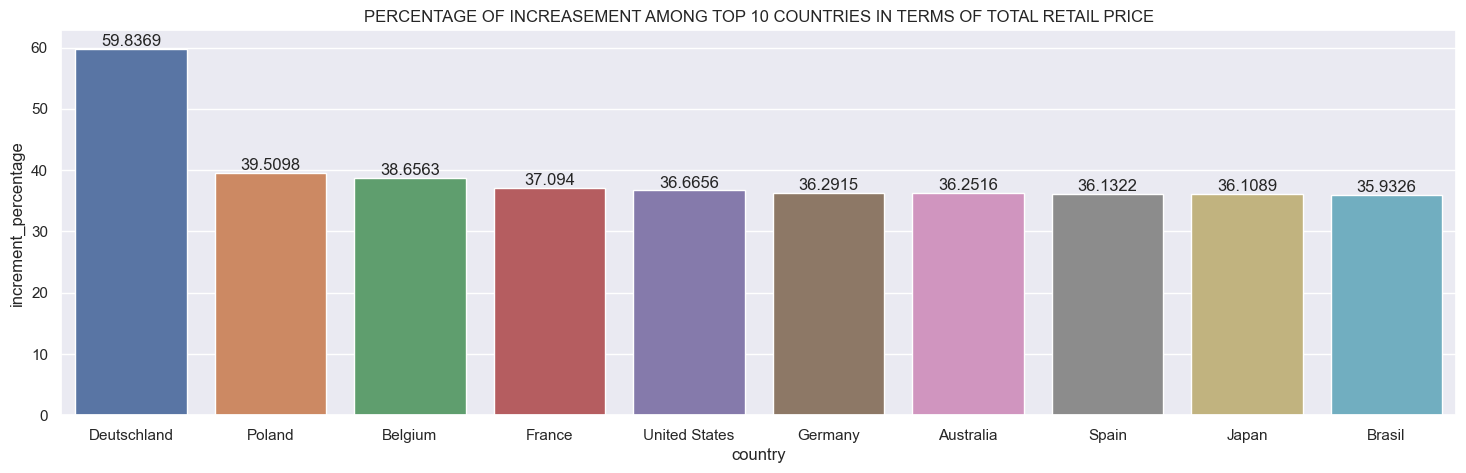

In [404]:
count_15 = 0

# USA: Calvin Klein 46106.91, Carhartt 44481.32, Diesel 41965.20
# CHINA: Calvin Klein 67841.21, True Religion 65870.56, Diesel  65027.07
# BRASIL: True Religion  28911.58, Calvin Klein 27747.98, 7 For All Mankind 25725.37
# FRANCE: 7 For All Mankind 9634.13, Diesel 9255.42,  Carhartt 9006.45
# GERMANY: Calvin Klein 9865.88, Diesel 9799.60, True Religion 8521.74
# UNITED KINGDOM: Calvin Klein  10649.82, Diesel 9291.67, 7 For All Mankind 7491.18

products_users_clean_15 = pd.merge(products_users, users, on='user_id', how='inner')

products_users_clean_15 = products_users_clean_15[["user_id","name_y","id","category","brand","retail_price","country","age","costumer_time","gender","order_id"]]
products_users_clean_15.rename(columns={"name_y": "user_name"}, inplace=True)

conditions = [products_users_clean_15["brand"].isin(["Calvin Klein","Carhartt","Diesel","True Religion","7 For All Mankind"]), ~products_users_clean_15["brand"].isin(["Calvin Klein","Carhartt","Diesel","True Religion","7 For All Mankind"])]
genders = [2,1]
products_users_clean_15["num_of_products_increment"] = np.select(conditions, genders)

conditions = [products_users_clean_15["brand"].isin(["Calvin Klein","Carhartt","Diesel","True Religion","7 For All Mankind"]), ~products_users_clean_15["brand"].isin(["Calvin Klein","Carhartt","Diesel","True Religion","7 For All Mankind"])]
genders = [products_users_clean_15["retail_price"]*2,products_users_clean_15["retail_price"]]
products_users_clean_15["retail_price_2"] = np.select(conditions, genders)

data_model_15 = products_users_clean_15[["user_id","user_name","retail_price","retail_price_2","age","costumer_time","gender","country","num_of_products_increment"]].groupby(["user_id"],as_index=False).agg({'user_name': 'max','retail_price': 'sum','retail_price_2': 'sum','age': 'max','costumer_time': 'max','gender': 'max','country': 'max','num_of_products_increment': 'sum'}).sort_values(["user_id"], ascending=False)
data_model_15.rename(columns={"order_id": "num_of_products"}, inplace=True)

data_model_15_country = data_model_15[["country","retail_price","retail_price_2"]].groupby(["country"],as_index=False).agg({'retail_price': 'sum', 'retail_price_2': 'sum'}).sort_values(["country"], ascending=False)
data_model_15_country["increment_percentage"]=(data_model_15_country["retail_price_2"]-data_model_15_country["retail_price"])/data_model_15_country["retail_price"]*100

count_14+=1
fig = plt.figure(count_14)
fig.set(figheight=5,figwidth=18)
x = sns.barplot(data_model_15_country.sort_values("retail_price", ascending=False).head(10), x="country", y="retail_price")
x.set_title("CURRENT RETAIL PRICE BY 10 TOP COUNTRIES")
for i in x.containers:
    x.bar_label(i,)

count_14+=1
fig = plt.figure(count_14)
fig.set(figheight=5,figwidth=18)
x = sns.barplot(data_model_15_country.sort_values("retail_price_2", ascending=False).head(10), x="country", y="retail_price_2")
x.set_title("PREDICTED RETAIL PRICE BY 10 TOP COUNTRIES (DOUBLING MOST POPULAR BRANDS' SALES)")
for i in x.containers:
    x.bar_label(i,)

count_14+=1
fig = plt.figure(count_14)
fig.set(figheight=5,figwidth=18)
x = sns.barplot(data_model_15_country.sort_values("increment_percentage", ascending=False).head(10), x="country", y="increment_percentage")
x.set_title("PERCENTAGE OF INCREASEMENT AMONG TOP 10 COUNTRIES IN TERMS OF TOTAL RETAIL PRICE")
for i in x.containers:
    x.bar_label(i,)

data_model_15_genders = data_model_15[["country","gender","retail_price","retail_price_2"]].groupby(["country","gender"],as_index=False).agg({'retail_price': 'sum', 'retail_price_2': 'sum'}).sort_values(["country","gender"], ascending=False)
data_model_15_genders["increment_percentage"]=(data_model_15_genders["retail_price_2"]-data_model_15_genders["retail_price"])/data_model_15_genders["retail_price"]*100

count_14+=1
fig = plt.figure(count_14)
fig.set(figheight=5,figwidth=18)
x = sns.barplot(data_model_15_genders[data_model_15_genders["country"].isin(["China","United States","Brasil","South Korea","France"])], x="country", y="retail_price",hue="gender")
x.set_title("CURRENT RETAIL PRICE BY 5 TOP COUNTRIES BY GENDER")
for i in x.containers:
    x.bar_label(i,)

count_14+=1
fig = plt.figure(count_14)
fig.set(figheight=5,figwidth=18)
x = sns.barplot(data_model_15_genders[data_model_15_genders["country"].isin(["China","United States","Brasil","South Korea","France"])], x="country", y="retail_price_2",hue="gender")
x.set_title("PREDICTED RETAIL PRICE BY 5 TOP COUNTRIES BY GENDER (DOUBLING MOST POPULAR BRANDS' SALES)")
for i in x.containers:
    x.bar_label(i,)

count_14+=1
fig = plt.figure(count_14)
fig.set(figheight=5,figwidth=18)
x = sns.barplot(data_model_15_genders[data_model_15_genders["country"].isin(["China","United States","Brasil","South Korea","France"])], x="country", y="increment_percentage",hue="gender")
x.set_title("PERCENTAGE OF INCREASEMENT AMONG TOP 5COUNTRIES IN TERMS OF TOTAL RETAIL PRICE BY GENDER")
for i in x.containers:
    x.bar_label(i,)

products_users_clean_15_1 = pd.merge(products_users, users, on='user_id', how='inner')

products_users_clean_15_1 = products_users_clean_15[["user_id","id","category","brand","retail_price","country","gender","order_id"]]
conditions = [(products_users_clean_15_1.gender=="F") & (products_users_clean_15_1.category.isin(["Intimates","Dresses","Pants","Outerwear & Coats"])), (products_users_clean_15_1.gender=="M") & (products_users_clean_15_1.category.isin(["Underwear","Suits & Sport Coats","Jeans","Outerwear & Coats"]))]
products_users_clean_15_1["num_of_prd_2"] = np.select(conditions, [2,2])
products_users_clean_15_1["num_of_prd_2"] = np.select([products_users_clean_15_1["num_of_prd_2"]==0,products_users_clean_15_1["num_of_prd_2"]!=0], [1,2])
conditions = [(products_users_clean_15_1.gender=="F") & (products_users_clean_15_1.category.isin(["Intimates","Dresses","Pants","Outerwear & Coats"])), (products_users_clean_15_1.gender=="M") & (products_users_clean_15_1.category.isin(["Underwear","Suits & Sport Coats","Jeans","Outerwear & Coats"])), ~((products_users_clean_15_1.gender=="F") & (products_users_clean_15_1.category.isin(["Intimates","Dresses","Pants","Outerwear & Coats"]))) & ~((products_users_clean_15_1.gender=="M") & (products_users_clean_15_1.category.isin(["Underwear","Suits & Sport Coats","Jeans","Outerwear & Coats"])))]
genders = [products_users_clean_15_1["retail_price"]*2,products_users_clean_15_1["retail_price"]*2,products_users_clean_15_1["retail_price"]]
products_users_clean_15_1["retail_price_2"] = np.select(conditions, genders)

data_model_15_1 = products_users_clean_15_1[["user_id","retail_price","retail_price_2","gender","country","num_of_prd_2"]].groupby(["user_id"],as_index=False).agg({'retail_price': 'sum','retail_price_2': 'sum','gender': 'max','country': 'max','num_of_prd_2': 'sum'}).sort_values(["user_id"], ascending=False)
data_model_15_1.rename(columns={"order_id": "num_of_products"}, inplace=True)

data_model_15_1_country = data_model_15_1[["country","retail_price","retail_price_2"]].groupby(["country"],as_index=False).agg({'retail_price': 'sum', 'retail_price_2': 'sum'}).sort_values(["country"], ascending=False)
data_model_15_1_country["increment_percentage"]=(data_model_15_1_country["retail_price_2"]-data_model_15_1_country["retail_price"])/data_model_15_1_country["retail_price"]*100

data_model_15_1_genders = data_model_15_1[["country","gender","retail_price","retail_price_2"]].groupby(["country","gender"],as_index=False).agg({'retail_price': 'sum', 'retail_price_2': 'sum'}).sort_values(["country","gender"], ascending=False)
data_model_15_1_genders["increment_percentage"]=(data_model_15_1_genders["retail_price_2"]-data_model_15_1_genders["retail_price"])/data_model_15_1_genders["retail_price"]*100

count_14+=1
fig = plt.figure(count_14)
fig.set(figheight=5,figwidth=18)
x = sns.barplot(data_model_15_1_country.sort_values("retail_price", ascending=False).head(10), x="country", y="retail_price")
x.set_title("CURRENT RETAIL PRICE BY 10 TOP COUNTRIES")
for i in x.containers:
    x.bar_label(i,)

count_14+=1
fig = plt.figure(count_14)
fig.set(figheight=5,figwidth=18)
x = sns.barplot(data_model_15_1_country.sort_values("retail_price_2", ascending=False).head(10), x="country", y="retail_price_2")
x.set_title("PREDICTED RETAIL PRICE BY 10 TOP COUNTRIES (DOUBLING MOST POPULAR BRANDS' SALES)")
for i in x.containers:
    x.bar_label(i,)

count_14+=1
fig = plt.figure(count_14)
fig.set(figheight=5,figwidth=18)
x = sns.barplot(data_model_15_1_country.sort_values("increment_percentage", ascending=False).head(10), x="country", y="increment_percentage")
x.set_title("PERCENTAGE OF INCREASEMENT AMONG TOP 10 COUNTRIES IN TERMS OF TOTAL INCREMENT PERCENTAGE")
for i in x.containers:
    x.bar_label(i,)

count_14+=1
fig = plt.figure(count_14)
fig.set(figheight=5,figwidth=18)
x = sns.barplot(data_model_15_1_genders[data_model_15_1_genders["country"].isin(["China","United States","Brasil","South Korea","France"])], x="country", y="retail_price",hue="gender")
x.set_title("CURRENT RETAIL PRICE BY 5 TOP COUNTRIES BY GENDER")
for i in x.containers:
    x.bar_label(i,)

count_14+=1
fig = plt.figure(count_14)
fig.set(figheight=5,figwidth=18)
x = sns.barplot(data_model_15_1_genders[data_model_15_1_genders["country"].isin(["China","United States","Brasil","South Korea","France"])], x="country", y="retail_price_2",hue="gender")
x.set_title("PREDICTED RETAIL PRICE BY 5 TOP COUNTRIES BY GENDER (DOUBLING MOST POPULAR PRODUCTS CATEGORY SALES)")
for i in x.containers:
    x.bar_label(i,)

count_14+=1
fig = plt.figure(count_14)
fig.set(figheight=5,figwidth=18)
x = sns.barplot(data_model_15_1_genders[data_model_15_1_genders["country"].isin(["China","United States","Brasil","South Korea","France"])], x="country", y="increment_percentage",hue="gender")
x.set_title("PERCENTAGE OF INCREASEMENT AMONG TOP 5 COUNTRIES IN TERMS OF TOTAL RETAIL PRICE BY GENDER")
for i in x.containers:
    x.bar_label(i,)